In [ ]:
# prompt: open Files in the dataset directory: ['data_with_path.csv', 'Dysarthria and Non Dysarthria']

# The relevant files identified are 'data_with_path.csv' and 'Dysarthria and Non Dysarthria'.
# We can open the CSV file using pandas.
import pandas as pd

# Define the name of the CSV file
csv_file_to_open = 'data_with_path.csv'

# Construct the full path to the CSV file
full_csv_file_path = os.path.join(path, csv_file_to_open)

# Check if the CSV file exists before trying to open it
if os.path.exists(full_csv_file_path):
    try:
        # Open and read the CSV file into a pandas DataFrame
        df = pd.read_csv(full_csv_file_path)
        print(f"Content of {csv_file_to_open} (first 5 rows):\n")
        print(df.head())
        print("\nDataFrame Info:")
        df.info()
    except Exception as e:
        print(f"Error opening or reading CSV file {csv_file_to_open}: {e}")
else:
    print(f"CSV file not found: {full_csv_file_path}")

# The directory 'Dysarthria and Non Dysarthria' likely contains audio files.
# We can list the files within this directory.
audio_dir_name = 'Dysarthria and Non Dysarthria'
full_audio_dir_path = os.path.join(path, audio_dir_name)

# Check if the audio directory exists
if os.path.isdir(full_audio_dir_path):
    print(f"\nFiles in directory: {audio_dir_name}")
    try:
        # List files in the audio directory
        audio_files = os.listdir(full_audio_dir_path)
        print(audio_files[:10]) # Print the first 10 files
        print(f"...and {len(audio_files)} more files.")
    except Exception as e:
        print(f"Error listing files in directory {audio_dir_name}: {e}")
else:
    print(f"Directory not found: {full_audio_dir_path}")

# To open and process the actual audio files within 'Dysarthria and Non Dysarthria',
# you would typically need a library like `librosa` or `scipy.io.wavfile`.
# For example:
# !pip install librosa
# import librosa
# # Assuming 'some_audio_file.wav' is one of the files in the directory
# example_audio_file = os.path.join(full_audio_dir_path, 'some_audio_file.wav')
# if os.path.exists(example_audio_file):
#     y, sr = librosa.load(example_audio_file)
#     print(f"Loaded audio file: {example_audio_file}")
#     print(f"Shape of audio data: {y.shape}")
#     print(f"Sampling rate: {sr}")
# else:
#      print(f"Example audio file not found: {example_audio_file}")

Content of data_with_path.csv (first 5 rows):

   Gender Is_dysarthria                                           Wav_path  \
0  Female            No  /kaggle/input/dysarthria-and-nondysarthria-spe...   
1  Female            No  /kaggle/input/dysarthria-and-nondysarthria-spe...   
2  Female            No  /kaggle/input/dysarthria-and-nondysarthria-spe...   
3  Female            No  /kaggle/input/dysarthria-and-nondysarthria-spe...   
4  Female            No  /kaggle/input/dysarthria-and-nondysarthria-spe...   

                                            Txt_path  \
0  /kaggle/input/dysarthria-and-nondysarthria-spe...   
1  /kaggle/input/dysarthria-and-nondysarthria-spe...   
2  /kaggle/input/dysarthria-and-nondysarthria-spe...   
3  /kaggle/input/dysarthria-and-nondysarthria-spe...   
4  /kaggle/input/dysarthria-and-nondysarthria-spe...   

                                     Prompts  
0                [say 'Ah-P-Eee' repeatedly]  
1                [say 'Ah-P-Eee' repeatedly]  
2  [re

In [ ]:
from IPython.display import Audio, display
import os
import pandas as pd

# Assuming df is already defined and contains a 'Wav_path' column

# Check if 'Wav_path' column exists and DataFrame is not empty
if 'df' in globals() and 'Wav_path' in df.columns and not df.empty:
    # Use the paths directly from the DataFrame
    df['full_wav_path'] = df['Wav_path']

    # Check if the full file path exists
    df['file_exists'] = df['full_wav_path'].apply(lambda x: os.path.exists(x) if x else False)

    # Preview path corrections
    print(df[['Wav_path', 'full_wav_path', 'file_exists']].head())

    # Attempt to play the first available audio file
    if df['file_exists'].any():
        first_valid_audio = df[df['file_exists']].iloc[0]['full_wav_path']
        print(f"\nPlaying first available audio file: {first_valid_audio}")
        try:
            display(Audio(first_valid_audio))
        except Exception as e:
            print(f"Error playing audio for {first_valid_audio}: {e}")
    else:
        print("No valid audio files found at the specified paths.")

else:
    print("DataFrame 'df' is not defined, empty, or does not contain a 'Wav_path' column.")

                                            Wav_path  \
0  /kaggle/input/dysarthria-and-nondysarthria-spe...   
1  /kaggle/input/dysarthria-and-nondysarthria-spe...   
2  /kaggle/input/dysarthria-and-nondysarthria-spe...   
3  /kaggle/input/dysarthria-and-nondysarthria-spe...   
4  /kaggle/input/dysarthria-and-nondysarthria-spe...   

                                       full_wav_path  file_exists  
0  /kaggle/input/dysarthria-and-nondysarthria-spe...         True  
1  /kaggle/input/dysarthria-and-nondysarthria-spe...         True  
2  /kaggle/input/dysarthria-and-nondysarthria-spe...         True  
3  /kaggle/input/dysarthria-and-nondysarthria-spe...         True  
4  /kaggle/input/dysarthria-and-nondysarthria-spe...         True  

Playing first available audio file: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC01/Session1/Wav/0001.wav


In [ ]:
import os
import kagglehub

# Re-run the download command to get the latest path information
path = kagglehub.dataset_download("poojag718/dysarthria-and-nondysarthria-speech-dataset")
print("Path to dataset files from kagglehub:", path)

# List files in the downloaded directory to understand the structure
files_in_download_path = os.listdir(path)
print("Files in the downloaded dataset directory:", files_in_download_path)

# Check inside the 'Dysarthria and Non Dysarthria' directory if it exists
audio_dir_name = 'Dysarthria and Non Dysarthria'
full_audio_dir_path = os.path.join(path, audio_dir_name)

if os.path.isdir(full_audio_dir_path):
    print(f"\nFiles in directory: {audio_dir_name}")
    try:
        # List files in the audio directory
        audio_files_in_subdir = os.listdir(full_audio_dir_path)
        print(audio_files_in_subdir[:10]) # Print the first 10 files
        print(f"...and {len(audio_files_in_subdir)} more files.")
    except Exception as e:
        print(f"Error listing files in directory {audio_dir_name}: {e}")
else:
    print(f"Directory not found: {full_audio_dir_path}")

Path to dataset files from kagglehub: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset
Files in the downloaded dataset directory: ['data_with_path.csv', 'Dysarthria and Non Dysarthria']

Files in directory: Dysarthria and Non Dysarthria
['Dataset']
...and 1 more files.


In [ ]:
import whisper
import os
import pandas as pd
from tqdm import tqdm

# Load Whisper model
asr_model = whisper.load_model("base")

# Add Transcription column if not present
if 'Transcription' not in df.columns:
    df['Transcription'] = None

# Prepare log file
log_file = "transcription_log.txt"
with open(log_file, "w", encoding="utf-8") as log:
    log.write("Transcription Log\n")
    log.write("=================\n\n")

    # Process each file
    for i in tqdm(df.index):
        try:
            path = df.loc[i, 'Wav_path']
            prompt = df.loc[i, 'Prompts']  # Get the prompt

            if os.path.exists(path):
                # Transcribe
                result = asr_model.transcribe(path)
                transcript = result.get('text', '').strip()
                df.loc[i, 'Transcription'] = transcript if transcript else "[Empty transcript]"

                message = (
                    f"✅ Row {i}\n"
                    f"🗣️ Prompt: {prompt}\n"
                    f"📝 Transcription: {transcript}\n"
                )
            else:
                df.loc[i, 'Transcription'] = "[Missing file]"
                message = (
                    f"⚠️ Row {i}\n"
                    f"🗣️ Prompt: {prompt}\n"
                    f"🚫 File not found: {path}\n"
                )

        except Exception as e:
            df.loc[i, 'Transcription'] = f"[Error: {str(e)}]"
            prompt = df.loc[i, 'Prompts']
            message = (
                f"❌ Row {i}\n"
                f"🗣️ Prompt: {prompt}\n"
                f"🚫 Error: {str(e)}\n"
            )

        # Print and log
        print(message)
        log.write(message + "\n")


  0%|          | 1/8214 [00:04<10:13:58,  4.49s/it]

✅ Row 0
🗣️ Prompt: [say 'Ah-P-Eee' repeatedly]
📝 Transcription: rpe ap ap ap ap ap ap ap ap ap ap ap



  0%|          | 2/8214 [00:12<14:50:21,  6.51s/it]

✅ Row 1
🗣️ Prompt: [say 'Ah-P-Eee' repeatedly]
📝 Transcription: 



  0%|          | 3/8214 [00:12<8:17:13,  3.63s/it] 

✅ Row 2
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



  0%|          | 5/8214 [00:13<3:30:57,  1.54s/it]

✅ Row 3
🗣️ Prompt: [say 'Eee-P-Ah' repeatedly]
📝 Transcription: 一拍一拍一拍一拍一拍

✅ Row 4
🗣️ Prompt: dug
📝 Transcription: Doug.



  0%|          | 6/8214 [00:13<2:30:01,  1.10s/it]

✅ Row 5
🗣️ Prompt: dark
📝 Transcription: dark



  0%|          | 7/8214 [00:13<1:50:29,  1.24it/s]

✅ Row 6
🗣️ Prompt: pat
📝 Transcription: Pat.



  0%|          | 9/8214 [00:13<1:07:00,  2.04it/s]

✅ Row 7
🗣️ Prompt: spark
📝 Transcription: Spark

✅ Row 8
🗣️ Prompt: sip
📝 Transcription: Sit.



  0%|          | 10/8214 [00:14<54:30,  2.51it/s] 

✅ Row 9
🗣️ Prompt: farm
📝 Transcription: Farm.



  0%|          | 11/8214 [00:14<1:00:45,  2.25it/s]

✅ Row 10
🗣️ Prompt: rave
📝 Transcription: Love Babe



  0%|          | 12/8214 [00:14<52:27,  2.61it/s]  

✅ Row 11
🗣️ Prompt: no
📝 Transcription: No.



  0%|          | 13/8214 [00:15<47:02,  2.91it/s]

✅ Row 12
🗣️ Prompt: fair
📝 Transcription: Fair.



  0%|          | 14/8214 [00:15<1:04:23,  2.12it/s]

✅ Row 13
🗣️ Prompt: rate
📝 Transcription: Great..



  0%|          | 15/8214 [00:16<1:08:33,  1.99it/s]

✅ Row 14
🗣️ Prompt: When he speaks, his voice is just a bit cracked and quivers a trifle.
📝 Transcription: When he speaks, his voice is just a bit cracked and quiver is a trifle.



  0%|          | 16/8214 [00:17<1:22:25,  1.66it/s]

✅ Row 15
🗣️ Prompt: the
📝 Transcription: в歐



  0%|          | 17/8214 [00:18<1:50:48,  1.23it/s]

✅ Row 16
🗣️ Prompt: grow
📝 Transcription: C-oded. Grrrr Your Glassesdin bld Your Glasses D<|en|> Your Glasses D Your Glasses Pura Priper Pura

✅ Row 17
🗣️ Prompt: corn
📝 Transcription: Come on.



  0%|          | 19/8214 [00:19<1:07:58,  2.01it/s]

✅ Row 18
🗣️ Prompt: storm
📝 Transcription: Storm



  0%|          | 21/8214 [00:19<1:02:03,  2.20it/s]

✅ Row 19
🗣️ Prompt: bubble
📝 Transcription: NO Babel

✅ Row 20
🗣️ Prompt: warm
📝 Transcription: Warm.



  0%|          | 22/8214 [00:20<51:18,  2.66it/s]  

✅ Row 21
🗣️ Prompt: yes
📝 Transcription: Yes.



  0%|          | 23/8214 [00:20<1:00:16,  2.26it/s]

✅ Row 22
🗣️ Prompt: input/images/story_starters_15.jpg
📝 Transcription: I see a child sitting in a corner on a stool facing the wall. There's a box of toys behind him and a table with a family photo and books on it.



  0%|          | 25/8214 [00:21<43:19,  3.15it/s]

✅ Row 23
🗣️ Prompt: swarm
📝 Transcription: This warm.

✅ Row 24
🗣️ Prompt: [say 'Ah' for 5 seconds]
📝 Transcription: Yeah.



  0%|          | 27/8214 [00:21<36:37,  3.73it/s]

✅ Row 25
🗣️ Prompt: The quick brown fox jumps over the lazy dog.
📝 Transcription: The quick brown fox jumps over the lazy dog.

✅ Row 26
🗣️ Prompt: [say 'OA' as in cOAt in a very low pitch]
📝 Transcription: 



  0%|          | 28/8214 [00:21<34:26,  3.96it/s]

✅ Row 27
🗣️ Prompt: form
📝 Transcription: Form.



  0%|          | 30/8214 [00:22<40:42,  3.35it/s]

✅ Row 28
🗣️ Prompt: bit
📝 Transcription: met up

✅ Row 29
🗣️ Prompt: feet
📝 Transcription: feet



  0%|          | 32/8214 [00:23<34:01,  4.01it/s]

✅ Row 30
🗣️ Prompt: chair
📝 Transcription: Chair

✅ Row 31
🗣️ Prompt: left
📝 Transcription: Left



  0%|          | 34/8214 [00:23<33:10,  4.11it/s]

✅ Row 32
🗣️ Prompt: giving those who observe him a pronounced feeling of the utmost respect.
📝 Transcription: giving those who observe him a pronounced feeling of the utmost respect.

✅ Row 33
🗣️ Prompt: tip
📝 Transcription: Tipped.



  0%|          | 35/8214 [00:23<31:20,  4.35it/s]

✅ Row 34
🗣️ Prompt: trouble
📝 Transcription: Trouble.



  0%|          | 37/8214 [00:24<31:33,  4.32it/s]

✅ Row 35
🗣️ Prompt: Don't ask me to carry an oily rag like that.
📝 Transcription: Don't ask me to carry an oily ride like that.

✅ Row 36
🗣️ Prompt: warm
📝 Transcription: Warm



  0%|          | 38/8214 [00:24<29:49,  4.57it/s]

✅ Row 37
🗣️ Prompt: feet
📝 Transcription: feet



  0%|          | 39/8214 [00:24<30:53,  4.41it/s]

✅ Row 38
🗣️ Prompt: lead [as in "I will lead you"]
📝 Transcription: Lead.



  0%|          | 40/8214 [00:24<33:04,  4.12it/s]

✅ Row 39
🗣️ Prompt: Well, he is nearly ninety-three years old; 
📝 Transcription: Well, he is nearly 93 years old.



  0%|          | 41/8214 [00:25<31:36,  4.31it/s]

✅ Row 40
🗣️ Prompt: weed
📝 Transcription: Weed.



  1%|          | 43/8214 [00:26<43:53,  3.10it/s]

✅ Row 41
🗣️ Prompt: bug
📝 Transcription: dem ermodus

✅ Row 42
🗣️ Prompt: read [as in "I can read"]
📝 Transcription: Read.



  1%|          | 44/8214 [00:26<57:35,  2.36it/s]

✅ Row 43
🗣️ Prompt: stubble
📝 Transcription: You're goodMusic Stabol



  1%|          | 45/8214 [00:27<1:03:18,  2.15it/s]

✅ Row 44
🗣️ Prompt: swore
📝 Transcription: War?



  1%|          | 46/8214 [00:27<56:00,  2.43it/s]  

✅ Row 45
🗣️ Prompt: We have often urged him to walk more and smoke less, 
📝 Transcription: We have often urged him to walk more and smoke less.



  1%|          | 47/8214 [00:27<50:07,  2.72it/s]

✅ Row 46
🗣️ Prompt: A long, flowing beard clings to his chin, 
📝 Transcription: a long flowing beard clings to his chin.



  1%|          | 48/8214 [00:28<1:08:40,  1.98it/s]

✅ Row 47
🗣️ Prompt: feed
📝 Transcription: Me.... Feed!?



  1%|          | 49/8214 [00:28<58:17,  2.33it/s]  

✅ Row 48
🗣️ Prompt: air
📝 Transcription: air



  1%|          | 50/8214 [00:29<1:19:08,  1.72it/s]

✅ Row 49
🗣️ Prompt: jagged
📝 Transcription: GI unser r когда employed je



  1%|          | 51/8214 [00:30<1:07:26,  2.02it/s]

✅ Row 50
🗣️ Prompt: goat
📝 Transcription: Goat



  1%|          | 52/8214 [00:30<1:16:18,  1.78it/s]

✅ Row 51
🗣️ Prompt: store
📝 Transcription: store



  1%|          | 53/8214 [00:31<1:07:02,  2.03it/s]

✅ Row 52
🗣️ Prompt: raid
📝 Transcription: Raid.



  1%|          | 54/8214 [00:31<59:51,  2.27it/s]  

✅ Row 53
🗣️ Prompt: You wished to know all about my grandfather.
📝 Transcription: You wish to know all about my grandfather.



  1%|          | 55/8214 [00:31<52:43,  2.58it/s]

✅ Row 54
🗣️ Prompt: sticks
📝 Transcription: 



  1%|          | 56/8214 [00:31<48:13,  2.82it/s]

✅ Row 55
🗣️ Prompt: rage
📝 Transcription: RAID



  1%|          | 57/8214 [00:32<55:22,  2.46it/s]

✅ Row 56
🗣️ Prompt: beta
📝 Transcription: beverage



  1%|          | 58/8214 [00:32<48:21,  2.81it/s]

✅ Row 57
🗣️ Prompt: trace
📝 Transcription: Trace.

✅ Row 58
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



  1%|          | 60/8214 [00:33<36:54,  3.68it/s]

✅ Row 59
🗣️ Prompt: hair
📝 Transcription: here



  1%|          | 62/8214 [00:33<34:48,  3.90it/s]

✅ Row 60
🗣️ Prompt: Except in the winter when the ooze or snow or ice prevents,
📝 Transcription: Accept in the winter when the ooze or snow or ice prevents.

✅ Row 61
🗣️ Prompt: rain
📝 Transcription: Rain.



  1%|          | 63/8214 [00:33<32:24,  4.19it/s]

✅ Row 62
🗣️ Prompt: down
📝 Transcription: Down.



  1%|          | 64/8214 [00:34<50:00,  2.72it/s]

✅ Row 63
🗣️ Prompt: beat
📝 Transcription: Exhaust beat beeping



  1%|          | 66/8214 [00:35<47:00,  2.89it/s]

✅ Row 64
🗣️ Prompt: double
📝 Transcription: Double.

✅ Row 65
🗣️ Prompt: alpha
📝 Transcription: Alpha



  1%|          | 67/8214 [00:35<53:48,  2.52it/s]

✅ Row 66
🗣️ Prompt: knew
📝 Transcription: new



  1%|          | 68/8214 [00:36<57:36,  2.36it/s]

✅ Row 67
🗣️ Prompt: trade
📝 Transcription: Trad-



  1%|          | 69/8214 [00:36<1:00:14,  2.25it/s]

✅ Row 68
🗣️ Prompt: beat
📝 Transcription: Beat…



  1%|          | 70/8214 [00:37<1:02:12,  2.18it/s]

✅ Row 69
🗣️ Prompt: fee
📝 Transcription: kop makran



  1%|          | 71/8214 [00:37<1:06:13,  2.05it/s]

✅ Row 70
🗣️ Prompt: rake
📝 Transcription: Break.



  1%|          | 73/8214 [00:38<47:43,  2.84it/s]

✅ Row 71
🗣️ Prompt: he dresses himself in an ancient black frock coat, 
📝 Transcription: He dresses himself in an ancient black frock coat.

✅ Row 72
🗣️ Prompt: park
📝 Transcription: Park



  1%|          | 74/8214 [00:38<56:17,  2.41it/s]

✅ Row 73
🗣️ Prompt: stick
📝 Transcription: Step.



  1%|          | 75/8214 [00:39<49:45,  2.73it/s]

✅ Row 74
🗣️ Prompt: but he always answers, "Banana oil!" 
📝 Transcription: But he always answers bananas.



  1%|          | 76/8214 [00:40<1:53:51,  1.19it/s]

✅ Row 75
🗣️ Prompt: xxx

📝 Transcription: 



  1%|          | 77/8214 [00:41<1:31:00,  1.49it/s]

✅ Row 76
🗣️ Prompt: but he always answers, "Banana oil!" 
📝 Transcription: But he always answers banana oil.



  1%|          | 78/8214 [00:41<1:16:06,  1.78it/s]

✅ Row 77
🗣️ Prompt: dagger
📝 Transcription: Dagger.



  1%|          | 79/8214 [00:41<1:05:11,  2.08it/s]

✅ Row 78
🗣️ Prompt: horn
📝 Transcription: Corn



  1%|          | 80/8214 [00:42<1:12:34,  1.87it/s]

✅ Row 79
🗣️ Prompt: input/images/kitchen.jpg
📝 Transcription: I'm looking at a kitchen scene with a mother and two children. The sink is overflowing and the kids are looking in a cappee jar.



  1%|          | 81/8214 [00:42<1:02:43,  2.16it/s]

✅ Row 80
🗣️ Prompt: ship
📝 Transcription: Shit.



  1%|          | 82/8214 [00:43<55:35,  2.44it/s]  

✅ Row 81
🗣️ Prompt: race
📝 Transcription: Race.



  1%|          | 83/8214 [00:43<52:39,  2.57it/s]

✅ Row 82
🗣️ Prompt: know
📝 Transcription: No.



  1%|          | 84/8214 [00:43<51:55,  2.61it/s]

✅ Row 83
🗣️ Prompt: usually minus several buttons; 
📝 Transcription: usually minus several buttons.



  1%|          | 85/8214 [00:44<50:09,  2.70it/s]

✅ Row 84
🗣️ Prompt: usually minus several buttons; 
📝 Transcription: usually minus several buttons.



  1%|          | 86/8214 [00:44<48:15,  2.81it/s]

✅ Row 85
🗣️ Prompt: for
📝 Transcription: 4



  1%|          | 87/8214 [00:45<55:03,  2.46it/s]

✅ Row 86
🗣️ Prompt: knew
📝 Transcription: know



  1%|          | 89/8214 [00:45<42:13,  3.21it/s]

✅ Row 87
🗣️ Prompt: torn
📝 Transcription: Torn.

✅ Row 88
🗣️ Prompt: sip
📝 Transcription: Sit.



  1%|          | 91/8214 [00:46<39:15,  3.45it/s]

✅ Row 89
🗣️ Prompt: Twice each day he plays skillfully and with zest upon our small organ.
📝 Transcription: Twice each day he plays skillfully and with zest upon our small organ.

✅ Row 90
🗣️ Prompt: go
📝 Transcription: Go.



  1%|          | 93/8214 [00:46<41:47,  3.24it/s]

✅ Row 91
🗣️ Prompt: jacket
📝 Transcription: jacket

✅ Row 92
🗣️ Prompt: up
📝 Transcription: Up.



  1%|          | 95/8214 [00:47<44:12,  3.06it/s]

✅ Row 93
🗣️ Prompt: chair
📝 Transcription: Wait, Here..

✅ Row 94
🗣️ Prompt: glow
📝 Transcription: glow



  1%|          | 97/8214 [00:48<44:32,  3.04it/s]

✅ Row 95
🗣️ Prompt: knee
📝 Transcription: 理想

✅ Row 96
🗣️ Prompt: storm
📝 Transcription: Storm.



  1%|          | 98/8214 [00:48<38:44,  3.49it/s]

✅ Row 97
🗣️ Prompt: born
📝 Transcription: Born.

✅ Row 98
🗣️ Prompt: bat
📝 Transcription: But...



  1%|          | 101/8214 [00:49<38:27,  3.52it/s]

✅ Row 99
🗣️ Prompt: sip
📝 Transcription: set

✅ Row 100
🗣️ Prompt: two
📝 Transcription: 2



  1%|          | 102/8214 [00:49<40:11,  3.36it/s]

✅ Row 101
🗣️ Prompt: She had your dark suit in greasy wash water all year.
📝 Transcription: She had your dark suit and greasy wash water all year.



  1%|▏         | 103/8214 [01:01<8:49:31,  3.92s/it]

✅ Row 102
🗣️ Prompt: [say 'Eee' in a very high pitch]
📝 Transcription: Foi ver



  1%|▏         | 105/8214 [01:06<6:43:15,  2.98s/it]

✅ Row 103
🗣️ Prompt: [say 'Eee' in a very high pitch]
📝 Transcription: yeah

✅ Row 104
🗣️ Prompt: train
📝 Transcription: Train.



  1%|▏         | 106/8214 [01:07<5:13:27,  2.32s/it]

✅ Row 105
🗣️ Prompt: trait
📝 Transcription: and communicate lamb, what's written here applause. Diet,



  1%|▏         | 107/8214 [01:07<3:50:32,  1.71s/it]

✅ Row 106
🗣️ Prompt: gadget
📝 Transcription: Gadget.



  1%|▏         | 108/8214 [01:08<2:54:03,  1.29s/it]

✅ Row 107
🗣️ Prompt: floor
📝 Transcription: Floor.



  1%|▏         | 109/8214 [01:08<2:14:32,  1.00it/s]

✅ Row 108
🗣️ Prompt: right
📝 Transcription: Right.



  1%|▏         | 110/8214 [01:09<2:05:33,  1.08it/s]

✅ Row 109
🗣️ Prompt: air
📝 Transcription: Air.



  1%|▏         | 111/8214 [01:09<1:42:15,  1.32it/s]

✅ Row 110
🗣️ Prompt: yet he still thinks as swiftly as ever.
📝 Transcription: Yet he still thinks as swiftly as ever.



  1%|▏         | 112/8214 [01:10<1:23:33,  1.62it/s]

✅ Row 111
🗣️ Prompt: slip
📝 Transcription: Slip.



  1%|▏         | 113/8214 [01:10<1:20:59,  1.67it/s]

✅ Row 112
🗣️ Prompt: he slowly takes a short walk in the open air each day.
📝 Transcription: He slowly takes a short walk in the open air each day.



  1%|▏         | 114/8214 [01:10<1:08:10,  1.98it/s]

✅ Row 113
🗣️ Prompt: Grandfather likes to be modern in his language.
📝 Transcription: grandfather likes to be modern in his language.



  1%|▏         | 115/8214 [01:11<1:10:25,  1.92it/s]

✅ Row 114
🗣️ Prompt: share
📝 Transcription: Share.



  1%|▏         | 116/8214 [01:11<59:21,  2.27it/s]  

✅ Row 115
🗣️ Prompt: swarm
📝 Transcription: Swarm.



  1%|▏         | 118/8214 [01:12<50:51,  2.65it/s]  

✅ Row 116
🗣️ Prompt: feed
📝 Transcription: Feed.

✅ Row 117
🗣️ Prompt: car
📝 Transcription: Car



  1%|▏         | 119/8214 [01:12<45:24,  2.97it/s]

✅ Row 118
🗣️ Prompt: range
📝 Transcription: Range.



  1%|▏         | 121/8214 [01:13<44:34,  3.03it/s]

✅ Row 119
🗣️ Prompt: tear [as in "tear up that paper"]
📝 Transcription: tear

✅ Row 120
🗣️ Prompt: sheet
📝 Transcription: Sheet.



  1%|▏         | 123/8214 [01:13<35:18,  3.82it/s]

✅ Row 121
🗣️ Prompt: one
📝 Transcription: One.

✅ Row 122
🗣️ Prompt: [say 'Ah' for 5 seconds]
📝 Transcription: 



  2%|▏         | 124/8214 [01:14<45:28,  2.96it/s]

✅ Row 123
🗣️ Prompt: read [as in "I can read"]
📝 Transcription: love



  2%|▏         | 126/8214 [01:14<36:24,  3.70it/s]

✅ Row 124
🗣️ Prompt: meat
📝 Transcription: Meet.

✅ Row 125
🗣️ Prompt: rock
📝 Transcription: Rock.



  2%|▏         | 127/8214 [01:16<1:34:45,  1.42it/s]

✅ Row 126
🗣️ Prompt: thigh
📝 Transcription: ... Seoul Because of the obvious



  2%|▏         | 128/8214 [01:16<1:24:21,  1.60it/s]

✅ Row 127
🗣️ Prompt: pot
📝 Transcription: Part



  2%|▏         | 129/8214 [01:17<1:22:04,  1.64it/s]

✅ Row 128
🗣️ Prompt: steer
📝 Transcription: Dear...



  2%|▏         | 130/8214 [01:17<1:10:08,  1.92it/s]

✅ Row 129
🗣️ Prompt: Mother sews yellow gingham aprons.
📝 Transcription: Mother So is yellow gengum aprons.



  2%|▏         | 131/8214 [01:18<1:11:18,  1.89it/s]

✅ Row 130
🗣️ Prompt: write
📝 Transcription: Right. Right.



  2%|▏         | 132/8214 [01:18<1:11:09,  1.89it/s]

✅ Row 131
🗣️ Prompt: air
📝 Transcription: Air…



  2%|▏         | 134/8214 [01:19<49:45,  2.71it/s]

✅ Row 132
🗣️ Prompt: He will allow a rare lie. 
📝 Transcription: He will allow a rare lie.

✅ Row 133
🗣️ Prompt: wish
📝 Transcription: Wish.



  2%|▏         | 136/8214 [01:19<45:18,  2.97it/s]

✅ Row 134
🗣️ Prompt: prior
📝 Transcription: prior

✅ Row 135
🗣️ Prompt: slay
📝 Transcription: Slay.



  2%|▏         | 137/8214 [01:20<39:04,  3.45it/s]

✅ Row 136
🗣️ Prompt: boot
📝 Transcription: boot



  2%|▏         | 138/8214 [01:20<47:16,  2.85it/s]

✅ Row 137
🗣️ Prompt: hear
📝 Transcription: here



  2%|▏         | 139/8214 [01:20<49:34,  2.71it/s]

✅ Row 138
🗣️ Prompt: Nothing is as offensive as innocence. 
📝 Transcription: Nothing is as offensive as innocence.



  2%|▏         | 140/8214 [01:21<48:47,  2.76it/s]

✅ Row 139
🗣️ Prompt: We gathered shells on the beach.
📝 Transcription: We gathered shells on the beach.



  2%|▏         | 141/8214 [01:21<43:53,  3.07it/s]

✅ Row 140
🗣️ Prompt: rocks
📝 Transcription: rocks



  2%|▏         | 142/8214 [01:21<41:30,  3.24it/s]

✅ Row 141
🗣️ Prompt: delta
📝 Transcription: Delta.



  2%|▏         | 143/8214 [01:22<40:16,  3.34it/s]

✅ Row 142
🗣️ Prompt: play
📝 Transcription: Play.



  2%|▏         | 144/8214 [01:22<42:46,  3.14it/s]

✅ Row 143
🗣️ Prompt: ate
📝 Transcription: 8



  2%|▏         | 145/8214 [01:22<41:34,  3.23it/s]

✅ Row 144
🗣️ Prompt: whoop
📝 Transcription: whoop



  2%|▏         | 146/8214 [01:22<39:00,  3.45it/s]

✅ Row 145
🗣️ Prompt: sleep
📝 Transcription: Fleet



  2%|▏         | 147/8214 [01:23<42:25,  3.17it/s]

✅ Row 146
🗣️ Prompt: galore
📝 Transcription: Go lower.



  2%|▏         | 148/8214 [01:23<42:57,  3.13it/s]

✅ Row 147
🗣️ Prompt: yes
📝 Transcription: Yes.



  2%|▏         | 149/8214 [01:23<39:49,  3.37it/s]

✅ Row 148
🗣️ Prompt: know
📝 Transcription: No.



  2%|▏         | 150/8214 [01:24<37:56,  3.54it/s]

✅ Row 149
🗣️ Prompt: Their house is grey and white.
📝 Transcription: Their house is gray and white.



  2%|▏         | 152/8214 [01:24<33:36,  4.00it/s]

✅ Row 150
🗣️ Prompt: ate
📝 Transcription: 8

✅ Row 151
🗣️ Prompt: sigh
📝 Transcription: Sorry.



  2%|▏         | 153/8214 [01:25<46:23,  2.90it/s]

✅ Row 152
🗣️ Prompt: sigh
📝 Transcription: Adriatic Inspector Saia



  2%|▏         | 155/8214 [01:25<47:13,  2.84it/s]

✅ Row 153
🗣️ Prompt: urgent
📝 Transcription: urgent

✅ Row 154
🗣️ Prompt: deer
📝 Transcription: Dear.



  2%|▏         | 156/8214 [01:26<40:38,  3.30it/s]

✅ Row 155
🗣️ Prompt: white
📝 Transcription: Wait.



  2%|▏         | 157/8214 [01:26<38:28,  3.49it/s]

✅ Row 156
🗣️ Prompt: I just try to do my best.
📝 Transcription: I just try to do my best.



  2%|▏         | 159/8214 [01:26<32:55,  4.08it/s]

✅ Row 157
🗣️ Prompt: coupe
📝 Transcription: Coup.

✅ Row 158
🗣️ Prompt: troop
📝 Transcription: Troop.



  2%|▏         | 160/8214 [01:27<31:37,  4.24it/s]

✅ Row 159
🗣️ Prompt: slip
📝 Transcription: Slip.



  2%|▏         | 161/8214 [01:27<34:54,  3.84it/s]

✅ Row 160
🗣️ Prompt: Two other cases also were under advisement. 
📝 Transcription: two other cases also were under advisement.



  2%|▏         | 162/8214 [01:27<46:33,  2.88it/s]

✅ Row 161
🗣️ Prompt: suit
📝 Transcription: Suit.



  2%|▏         | 163/8214 [01:28<53:19,  2.52it/s]

✅ Row 162
🗣️ Prompt: jungle
📝 Transcription: John go.



 13%|█▎        | 1036/8214 [01:28<00:07, 1008.88it/s]

✅ Row 163
🗣️ Prompt: group
📝 Transcription: group

⚠️ Row 164
🗣️ Prompt: [say 'Pah-Tah-Kah' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC02/Session3/Wav/0001.wav

⚠️ Row 165
🗣️ Prompt: [say 'Eee-P-Ah' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC02/Session3/Wav/0002.wav

⚠️ Row 166
🗣️ Prompt: [relax your mouth in its normal position]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC02/Session3/Wav/0003.wav

⚠️ Row 167
🗣️ Prompt: [say 'Ah-P-Eee' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC02/Session3/Wav/0004.wav

⚠️ Row 168
🗣️ Prompt: [say 'Ah-P-Eee' repeatedly]
🚫 File not found: /kaggle/

 14%|█▍        | 1167/8214 [01:46<03:12, 36.59it/s]  

✅ Row 1166
🗣️ Prompt: [say 'Eee-P-Ah' repeatedly]
📝 Transcription: 



 14%|█▍        | 1168/8214 [01:47<03:22, 34.75it/s]

✅ Row 1167
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: She

✅ Row 1168
🗣️ Prompt: born
📝 Transcription: Born.

✅ Row 1169
🗣️ Prompt: tear [as in "tear up that paper"]
📝 Transcription: tear

✅ Row 1170
🗣️ Prompt: no
📝 Transcription: No.

✅ Row 1171
🗣️ Prompt: train
📝 Transcription: Train.

✅ Row 1172
🗣️ Prompt: rain
📝 Transcription: Brain.

✅ Row 1173
🗣️ Prompt: rate
📝 Transcription: right

✅ Row 1174
🗣️ Prompt: [say 'OA' as in cOAt in a very low pitch]
📝 Transcription: OOOOOOOooo

✅ Row 1175
🗣️ Prompt: feed
📝 Transcription: Feed.

✅ Row 1176
🗣️ Prompt: park
📝 Transcription: Park

✅ Row 1177
🗣️ Prompt: down
📝 Transcription: Down.

✅ Row 1178
🗣️ Prompt: store
📝 Transcription: Store

✅ Row 1179
🗣️ Prompt: pat
📝 Transcription: Pack.

✅ Row 1180
🗣️ Prompt: chair
📝 Transcription: Chair

✅ Row 1181
🗣️ Prompt: knew
📝 Transcription: neu

✅ Row 1182
🗣️ Prompt: rage
📝 Transcription: Rage.

✅ Row 1183
🗣️ Prompt: rage
📝 Transcription: Rage.

✅ Row 1184
🗣️ Prompt: sip
📝 Tra

 15%|█▍        | 1212/8214 [01:59<07:01, 16.60it/s]

✅ Row 1211
🗣️ Prompt: stubble
📝 Transcription: Still bump stuck



 15%|█▍        | 1213/8214 [02:00<07:10, 16.27it/s]

✅ Row 1212
🗣️ Prompt: Well, he is nearly ninety-three years old; 
📝 Transcription: Well, he is nearly 93 years old.

✅ Row 1213
🗣️ Prompt: dug
📝 Transcription: Doug

✅ Row 1214
🗣️ Prompt: beat
📝 Transcription: Beat

✅ Row 1215
🗣️ Prompt: sheet
📝 Transcription: Shit!

✅ Row 1216
🗣️ Prompt: usually minus several buttons; 
📝 Transcription: Usually, minus several buttons.

✅ Row 1217
🗣️ Prompt: When he speaks, his voice is just a bit cracked and quivers a trifle.
📝 Transcription: When he speaks, his voice is just a bit cracked and quivers a trifle.

✅ Row 1218
🗣️ Prompt: When he speaks, his voice is just a bit cracked and quivers a trifle.
📝 Transcription: When he speaks, his voice is just a bit cracked and quivers a trifle.

✅ Row 1219
🗣️ Prompt: slip
📝 Transcription: Slip.

✅ Row 1220
🗣️ Prompt: right
📝 Transcription: Right.

✅ Row 1221
🗣️ Prompt: torn
📝 Transcription: Point

✅ Row 1222
🗣️ Prompt: You wished to know all about my grandfather.
📝 Transcription: You wish to know all about my

 15%|█▍        | 1213/8214 [02:19<07:10, 16.27it/s]

✅ Row 1279
🗣️ Prompt: [say 'Ah' for 5 seconds]
📝 Transcription: 



 16%|█▌        | 1281/8214 [02:19<14:21,  8.05it/s]

✅ Row 1280
🗣️ Prompt: We have often urged him to walk more and smoke less, 
📝 Transcription: We have often heard urged him to walk more and smoke less.



 16%|█▌        | 1282/8214 [02:20<14:27,  7.99it/s]

✅ Row 1281
🗣️ Prompt: We have often urged him to walk more and smoke less, 
📝 Transcription: We have often urged him to walk more and smoke less.

✅ Row 1282
🗣️ Prompt: for
📝 Transcription: 4

✅ Row 1283
🗣️ Prompt: trace
📝 Transcription: Trace

✅ Row 1284
🗣️ Prompt: floor
📝 Transcription: Floor.

✅ Row 1285
🗣️ Prompt: meat
📝 Transcription: Meet.

✅ Row 1286
🗣️ Prompt: hair
📝 Transcription: Here.

✅ Row 1287
🗣️ Prompt: input/images/story_starters_15.jpg
📝 Transcription: The little boy is sitting in this jewel in the corner of the room holding a teddy bear.

✅ Row 1288
🗣️ Prompt: warm
📝 Transcription: Warm

✅ Row 1289
🗣️ Prompt: one
📝 Transcription: One.

✅ Row 1290
🗣️ Prompt: he dresses himself in an ancient black frock coat, 
📝 Transcription: He dresses himself in an ancient black frog coat.

✅ Row 1291
🗣️ Prompt: floor
📝 Transcription: Thor

✅ Row 1292
🗣️ Prompt: floor
📝 Transcription: Floor.

✅ Row 1293
🗣️ Prompt: cheer
📝 Transcription: Dear You

✅ Row 1294
🗣️ Prompt: bear
📝 Transcri

 16%|█▋        | 1351/8214 [02:39<20:55,  5.47it/s]

✅ Row 1350
🗣️ Prompt: Where were you while we were away? 
📝 Transcription: Where were you while we were away?



 16%|█▋        | 1352/8214 [02:40<21:00,  5.44it/s]

✅ Row 1351
🗣️ Prompt: knew
📝 Transcription: New.

✅ Row 1352
🗣️ Prompt: prior
📝 Transcription: Prior.

✅ Row 1353
🗣️ Prompt: Are your grades higher or lower than Nancy's? 
📝 Transcription: Are your grades higher or lower than Nantes?

✅ Row 1354
🗣️ Prompt: sigh
📝 Transcription: Bye.

✅ Row 1355
🗣️ Prompt: tie
📝 Transcription: Hi

✅ Row 1356
🗣️ Prompt: boot
📝 Transcription: But

✅ Row 1357
🗣️ Prompt: know
📝 Transcription: No.

✅ Row 1358
🗣️ Prompt: write
📝 Transcription: Right.

✅ Row 1359
🗣️ Prompt: snoop
📝 Transcription: Snoop.

✅ Row 1360
🗣️ Prompt: sigh
📝 Transcription: Sai

✅ Row 1361
🗣️ Prompt: You're used to being on the field.
📝 Transcription: You're used to being on the field.

✅ Row 1362
🗣️ Prompt: wish
📝 Transcription: Wish.

✅ Row 1363
🗣️ Prompt: lip
📝 Transcription: Lip. ???

✅ Row 1364
🗣️ Prompt: near
📝 Transcription: Near.

✅ Row 1365
🗣️ Prompt: xxx

📝 Transcription: 

✅ Row 1366
🗣️ Prompt: xxx

📝 Transcription: Yep.

✅ Row 1367
🗣️ Prompt: xxx

📝 Transcription: Let's go.


 17%|█▋        | 1407/8214 [02:55<24:59,  4.54it/s]

✅ Row 1406
🗣️ Prompt: Their house is grey and white.
📝 Transcription: The house is grey and white.



 17%|█▋        | 1408/8214 [02:56<25:24,  4.46it/s]

✅ Row 1407
🗣️ Prompt: peer
📝 Transcription: Pierre

✅ Row 1408
🗣️ Prompt: xxx

📝 Transcription: How do you pronounce that?

✅ Row 1409
🗣️ Prompt: briar
📝 Transcription: Breyer

✅ Row 1410
🗣️ Prompt: Will Robin wear a yellow lily? 
📝 Transcription: We'll rob him where are yellow and lily.

✅ Row 1411
🗣️ Prompt: bad
📝 Transcription: Bad.

✅ Row 1412
🗣️ Prompt: three
📝 Transcription: Three.

✅ Row 1413
🗣️ Prompt: pot
📝 Transcription: part part

✅ Row 1414
🗣️ Prompt: pot
📝 Transcription: PART

✅ Row 1415
🗣️ Prompt: pile
📝 Transcription: 봐요

✅ Row 1416
🗣️ Prompt: pat
📝 Transcription: Pat.

✅ Row 1417
🗣️ Prompt: suit
📝 Transcription: Soup.

✅ Row 1418
🗣️ Prompt: The islands are sparsely populated.
📝 Transcription: The islands are sparsely populated.

✅ Row 1419
🗣️ Prompt: loop
📝 Transcription: loop

✅ Row 1420
🗣️ Prompt: side
📝 Transcription: one

✅ Row 1421
🗣️ Prompt: single
📝 Transcription: 세ง

✅ Row 1422
🗣️ Prompt: witch
📝 Transcription: which

✅ Row 1423
🗣️ Prompt: no
📝 Transcription: No

 18%|█▊        | 1446/8214 [03:08<29:00,  3.89it/s]

✅ Row 1445
🗣️ Prompt: thorn
📝 Transcription: Sorn.



 18%|█▊        | 1447/8214 [03:09<29:16,  3.85it/s]

✅ Row 1446
🗣️ Prompt: If you are losing water, replace it immediately.
📝 Transcription: If you're losing water, we'll place it immediately.

✅ Row 1447
🗣️ Prompt: seven
📝 Transcription: 7

✅ Row 1448
🗣️ Prompt: spain
📝 Transcription: Spain

✅ Row 1449
🗣️ Prompt: Students watched as he got out.
📝 Transcription: Students watch as he got out.

✅ Row 1450
🗣️ Prompt: sergeant
📝 Transcription: Sergeant

✅ Row 1451
🗣️ Prompt: hotel
📝 Transcription: Hotel

✅ Row 1452
🗣️ Prompt: written
📝 Transcription: written

✅ Row 1453
🗣️ Prompt: The dolphins swam around our boat.
📝 Transcription: The dolphins so I'm around our boat.

✅ Row 1454
🗣️ Prompt: lima
📝 Transcription: ライマー

✅ Row 1455
🗣️ Prompt: hat
📝 Transcription: HAT

✅ Row 1456
🗣️ Prompt: take
📝 Transcription: Take.

✅ Row 1457
🗣️ Prompt: leak
📝 Transcription: Leak

✅ Row 1458
🗣️ Prompt: lair
📝 Transcription: There.

✅ Row 1459
🗣️ Prompt: He wrapped the package hastily.
📝 Transcription: He wraps the package hastily.

✅ Row 1460
🗣️ Prompt: He w

 18%|█▊        | 1474/8214 [03:16<30:06,  3.73it/s]

✅ Row 1473
🗣️ Prompt: hark
📝 Transcription: E haciou millions of customer

✅ Row 1474
🗣️ Prompt: bitten
📝 Transcription: Beten.

✅ Row 1475
🗣️ Prompt: Both injuries were to the same leg.
📝 Transcription: Both injuries were to the same leg.

✅ Row 1476
🗣️ Prompt: bit
📝 Transcription: bit.

✅ Row 1477
🗣️ Prompt: papa
📝 Transcription: 바빠

✅ Row 1478
🗣️ Prompt: fat
📝 Transcription: Fat

✅ Row 1479
🗣️ Prompt: hum
📝 Transcription: Hum.

✅ Row 1480
🗣️ Prompt: start
📝 Transcription: Stark

✅ Row 1481
🗣️ Prompt: Aluminum silverware can often be flimsy.
📝 Transcription: Illuminum software can often be flimsy.

✅ Row 1482
🗣️ Prompt: Aluminum silverware can often be flimsy.
📝 Transcription: Illuminum silverware can often be slimsy.

✅ Row 1483
🗣️ Prompt: Aluminum silverware can often be flimsy.
📝 Transcription: Aluminum silverware can often be flimsy.

✅ Row 1484
🗣️ Prompt: Swing your arm as high as you can.
📝 Transcription: Swing your arm as high as you can.

✅ Row 1485
🗣️ Prompt: A roll of wire 

 18%|█▊        | 1493/8214 [03:22<31:36,  3.54it/s]

✅ Row 1492
🗣️ Prompt: leak
📝 Transcription: beams knee

✅ Row 1493
🗣️ Prompt: It was a good win for us.
📝 Transcription: It was a good win for us.

✅ Row 1494
🗣️ Prompt: It was a good win for us.
📝 Transcription: It was a good one for us.

✅ Row 1495
🗣️ Prompt: Alimony harms a divorced man's wealth.
📝 Transcription: Alamony harms a divorce man's wealth.

✅ Row 1496
🗣️ Prompt: and
📝 Transcription: and

✅ Row 1497
🗣️ Prompt: much
📝 Transcription: Much.

✅ Row 1498
🗣️ Prompt: league
📝 Transcription: Лик!

✅ Row 1499
🗣️ Prompt: split

📝 Transcription: split

✅ Row 1500
🗣️ Prompt: spit
📝 Transcription: Spit!

✅ Row 1501
🗣️ Prompt: brawn
📝 Transcription: brawn

✅ Row 1502
🗣️ Prompt: barn
📝 Transcription: Bye!

✅ Row 1503
🗣️ Prompt: lick
📝 Transcription: like

✅ Row 1504
🗣️ Prompt: The job provides many benefits.
📝 Transcription: The job provides many benefits.

✅ Row 1505
🗣️ Prompt: The museum hires musicians every evening.
📝 Transcription: The museum hires musicians every evening.



 18%|█▊        | 1507/8214 [03:26<31:20,  3.57it/s]

✅ Row 1506
🗣️ Prompt: xxx

📝 Transcription: He further proposed grants of unspecified sums of experience.

✅ Row 1507
🗣️ Prompt: xxx

📝 Transcription: 

✅ Row 1508
🗣️ Prompt: He further proposed grants of an unspecified sum for experimental hospitals.
📝 Transcription: He further proposed grants of an unspecified sum for experimental hospitals.

✅ Row 1509
🗣️ Prompt: vat
📝 Transcription: That.

✅ Row 1510
🗣️ Prompt: heart
📝 Transcription: Heart

✅ Row 1511
🗣️ Prompt: top
📝 Transcription: Top

✅ Row 1512
🗣️ Prompt: sell
📝 Transcription: So...

✅ Row 1513
🗣️ Prompt: reek
📝 Transcription: rich

✅ Row 1514
🗣️ Prompt: hem
📝 Transcription: Ham

✅ Row 1515
🗣️ Prompt: There is a treehouse up above.
📝 Transcription: There is a tree house up above.



 18%|█▊        | 1517/8214 [03:29<31:53,  3.50it/s]

✅ Row 1516
🗣️ Prompt: This is a period of transition for me.
📝 Transcription: This is a period of transition for me.

✅ Row 1517
🗣️ Prompt: six
📝 Transcription: 6

✅ Row 1518
🗣️ Prompt: This is not a program of socialized medicine.
📝 Transcription: This is not a program of socialized medicine.

✅ Row 1519
🗣️ Prompt: This is not a program of socialized medicine.
📝 Transcription: This is not a program of socialized medicine.

✅ Row 1520
🗣️ Prompt: witty
📝 Transcription: онise

✅ Row 1521
🗣️ Prompt: nine
📝 Transcription: Nein.

✅ Row 1522
🗣️ Prompt: foxtrot
📝 Transcription: Fox Trot



 19%|█▊        | 1524/8214 [03:32<32:24,  3.44it/s]

✅ Row 1523
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 

✅ Row 1524
🗣️ Prompt: quebec
📝 Transcription: Go back.

✅ Row 1525
🗣️ Prompt: sign
📝 Transcription: Fine.

✅ Row 1526
🗣️ Prompt: golf
📝 Transcription: Go.

✅ Row 1527
🗣️ Prompt: sitting
📝 Transcription: C-手



 19%|█▊        | 1529/8214 [03:33<33:37,  3.31it/s]

✅ Row 1528
🗣️ Prompt: loyal
📝 Transcription: Hello, y'all.

✅ Row 1529
🗣️ Prompt: mush
📝 Transcription: ...mush!

✅ Row 1530
🗣️ Prompt: Night after night, they received annoying phone calls.
📝 Transcription: Night after night they received annoying phone calls.

✅ Row 1531
🗣️ Prompt: dart
📝 Transcription: dirt



 19%|█▊        | 1533/8214 [03:36<37:08,  3.00it/s]

✅ Row 1532
🗣️ Prompt: The books are very expensive.
📝 Transcription: The books are very expensive.

✅ Row 1533
🗣️ Prompt: him
📝 Transcription: Him.

✅ Row 1534
🗣️ Prompt: mitten
📝 Transcription: Mitten.



 19%|█▊        | 1536/8214 [03:37<36:24,  3.06it/s]

✅ Row 1535
🗣️ Prompt: She wore warm, fleecy, woolen overalls.
📝 Transcription: She wore warm, sleazy, woven overalls.

✅ Row 1536
🗣️ Prompt: It also provides for funds to clear slums and help colleges build dormitories.
📝 Transcription: It also provides for funds to clear slums and help college build dormitories.



 19%|█▊        | 1538/8214 [03:37<37:03,  3.00it/s]

✅ Row 1537
🗣️ Prompt: It also provides for funds to clear slums and help colleges build dormitories.
📝 Transcription: college. It also provides for funds to clear slums and help colleges build dormitories.



 19%|█▊        | 1540/8214 [03:38<35:03,  3.17it/s]

✅ Row 1538
🗣️ Prompt: tell
📝 Transcription: Tell.

✅ Row 1539
🗣️ Prompt: cake
📝 Transcription: cake



 19%|█▉        | 1542/8214 [03:38<32:51,  3.39it/s]

✅ Row 1540
🗣️ Prompt: echo
📝 Transcription: Echo

✅ Row 1541
🗣️ Prompt: at
📝 Transcription: at



 19%|█▉        | 1543/8214 [03:39<35:22,  3.14it/s]

✅ Row 1542
🗣️ Prompt: shy
📝 Transcription: Shy.



 19%|█▉        | 1544/8214 [03:39<39:54,  2.79it/s]

✅ Row 1543
🗣️ Prompt: bloat
📝 Transcription: Wow, mee that is scary.

✅ Row 1544
🗣️ Prompt: seed
📝 Transcription: Seed.



 19%|█▉        | 1546/8214 [03:40<34:40,  3.21it/s]

✅ Row 1545
🗣️ Prompt: brought
📝 Transcription: Brought.



 19%|█▉        | 1548/8214 [03:40<30:19,  3.66it/s]

✅ Row 1546
🗣️ Prompt: I have had my bell rung.
📝 Transcription: I have had my ball run.

✅ Row 1547
🗣️ Prompt: darn
📝 Transcription: Done!



 19%|█▉        | 1550/8214 [03:41<28:46,  3.86it/s]

✅ Row 1548
🗣️ Prompt: I expect we'll bounce back this week.
📝 Transcription: I expect we'll bounce back this week.

✅ Row 1549
🗣️ Prompt: november
📝 Transcription: November



 19%|█▉        | 1552/8214 [03:41<24:49,  4.47it/s]

✅ Row 1550
🗣️ Prompt: juliet
📝 Transcription: Do it!

✅ Row 1551
🗣️ Prompt: thought
📝 Transcription: thought



 19%|█▉        | 1554/8214 [03:41<23:02,  4.82it/s]

✅ Row 1552
🗣️ Prompt: cart
📝 Transcription: Cart.

✅ Row 1553
🗣️ Prompt: park
📝 Transcription: Park



 19%|█▉        | 1556/8214 [03:42<22:44,  4.88it/s]

✅ Row 1554
🗣️ Prompt: seeds
📝 Transcription: Feet

✅ Row 1555
🗣️ Prompt: city
📝 Transcription: city



 19%|█▉        | 1558/8214 [03:42<24:17,  4.57it/s]

✅ Row 1556
🗣️ Prompt: Carl lives in a lively home. 
📝 Transcription: Carl lives in a lively home.

✅ Row 1557
🗣️ Prompt: oscar
📝 Transcription: Oscar



 19%|█▉        | 1559/8214 [03:42<23:34,  4.71it/s]

✅ Row 1558
🗣️ Prompt: mike
📝 Transcription: Mike



 19%|█▉        | 1560/8214 [03:43<25:17,  4.39it/s]

✅ Row 1559
🗣️ Prompt: The little schoolhouse stood empty.
📝 Transcription: The little school host did empty.



 19%|█▉        | 1561/8214 [03:43<25:34,  4.34it/s]

✅ Row 1560
🗣️ Prompt: witch
📝 Transcription: which



 19%|█▉        | 1562/8214 [03:43<26:15,  4.22it/s]

✅ Row 1561
🗣️ Prompt: side
📝 Transcription: Side



 19%|█▉        | 1564/8214 [03:44<32:24,  3.42it/s]

✅ Row 1562
🗣️ Prompt: spark
📝 Transcription: Spuck。

✅ Row 1563
🗣️ Prompt: pretty
📝 Transcription: Pretty.



 19%|█▉        | 1565/8214 [03:44<33:25,  3.32it/s]

✅ Row 1564
🗣️ Prompt: The misguided souls have lost their way.
📝 Transcription: The misguided souls have lost their way.



 19%|█▉        | 1567/8214 [03:45<34:13,  3.24it/s]

✅ Row 1565
🗣️ Prompt: blow
📝 Transcription: ... Blue.

✅ Row 1566
🗣️ Prompt: him
📝 Transcription: Him.



 19%|█▉        | 1568/8214 [03:45<30:23,  3.64it/s]

✅ Row 1567
🗣️ Prompt: no
📝 Transcription: No.



 23%|██▎       | 1862/8214 [03:45<00:15, 398.45it/s]

✅ Row 1568
🗣️ Prompt: kilo

📝 Transcription: Kilo

⚠️ Row 1569
🗣️ Prompt: The hotel owner struggled.

🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC03/Session2/Wav/0001.wav

⚠️ Row 1570
🗣️ Prompt: The hotel owner shrugged.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC03/Session2/Wav/0002.wav

⚠️ Row 1571
🗣️ Prompt: litter

🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC03/Session2/Wav/0003.wav

⚠️ Row 1572
🗣️ Prompt: bitter
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC03/Session2/Wav/0004.wav

⚠️ Row 1573
🗣️ Prompt: Although always alone, we survive.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-datase

 24%|██▍       | 1960/8214 [03:46<00:21, 290.51it/s]

✅ Row 1959
🗣️ Prompt: This, he added, brought about petty jealousies and petty personal grievances.
📝 Transcription: This he added brought about petty jealousies and petty personal grievances.

✅ Row 1960
🗣️ Prompt: hatch
📝 Transcription: Hatch.

✅ Row 1961
🗣️ Prompt: pet
📝 Transcription: Pet.

✅ Row 1962
🗣️ Prompt: row
📝 Transcription: Row.

✅ Row 1963
🗣️ Prompt: feet
📝 Transcription: feet.

✅ Row 1964
🗣️ Prompt: lax
📝 Transcription: Lacks.

✅ Row 1965
🗣️ Prompt: ease
📝 Transcription: ease

✅ Row 1966
🗣️ Prompt: see
📝 Transcription: C

✅ Row 1967
🗣️ Prompt: cat
📝 Transcription: Cat.

✅ Row 1968
🗣️ Prompt: rakes
📝 Transcription: Rakes.

✅ Row 1969
🗣️ Prompt: fell
📝 Transcription: spell

✅ Row 1970
🗣️ Prompt: aid
📝 Transcription: 8

✅ Row 1971
🗣️ Prompt: had
📝 Transcription: had

✅ Row 1972
🗣️ Prompt: We all sat down and relaxed.
📝 Transcription: We all sat down and relaxed.

✅ Row 1973
🗣️ Prompt: bunch
📝 Transcription: Bunch.

✅ Row 1974
🗣️ Prompt: [relax your mouth in its normal posit

 24%|██▍       | 2010/8214 [03:59<05:30, 18.77it/s] 

✅ Row 2009
🗣️ Prompt: chap
📝 Transcription: CHAP



 24%|██▍       | 2011/8214 [04:00<05:36, 18.41it/s]

✅ Row 2010
🗣️ Prompt: is
📝 Transcription: is

✅ Row 2011
🗣️ Prompt: hat
📝 Transcription: hat

✅ Row 2012
🗣️ Prompt: tall
📝 Transcription: Tawal

✅ Row 2013
🗣️ Prompt: The eastern coast is a place for pure pleasure and excitement.
📝 Transcription: The eastern coast is placed for a pure pleasure and excitement.

✅ Row 2014
🗣️ Prompt: The plot is laced with mysterious incidents.
📝 Transcription: The plot is laced with mysterious incidents.

✅ Row 2015
🗣️ Prompt: hail
📝 Transcription: Hail.

✅ Row 2016
🗣️ Prompt: hall
📝 Transcription: Hull

✅ Row 2017
🗣️ Prompt: I had no desire to change my ways.
📝 Transcription: I had no desire to change my ways.

✅ Row 2018
🗣️ Prompt: dug
📝 Transcription: Doug

✅ Row 2019
🗣️ Prompt: ease
📝 Transcription: Guezz

✅ Row 2020
🗣️ Prompt: seat
📝 Transcription: seat

✅ Row 2021
🗣️ Prompt: reap
📝 Transcription: Reap.

✅ Row 2022
🗣️ Prompt: punch
📝 Transcription: punch

✅ Row 2023
🗣️ Prompt: chop
📝 Transcription: Chop!

✅ Row 2024
🗣️ Prompt: We experience distres

 25%|██▌       | 2059/8214 [04:12<11:19,  9.06it/s]

✅ Row 2058
🗣️ Prompt: fat
📝 Transcription: Fat



 25%|██▌       | 2060/8214 [04:12<11:26,  8.96it/s]

✅ Row 2059
🗣️ Prompt: lit
📝 Transcription: Let

✅ Row 2060
🗣️ Prompt: fill
📝 Transcription: Fill

✅ Row 2061
🗣️ Prompt: The job also covers a number of other items.
📝 Transcription: The job also covers a number of other items.

✅ Row 2062
🗣️ Prompt: Academic aptitude guarantees your diploma.
📝 Transcription: Academic aptitude guarantees your diploma.

✅ Row 2063
🗣️ Prompt: knock
📝 Transcription: Knock.

✅ Row 2064
🗣️ Prompt: Even a simple vocabulary contains symbols.
📝 Transcription: Even a simple vocabulary contains symbols.

✅ Row 2065
🗣️ Prompt: heat
📝 Transcription: Heat

✅ Row 2066
🗣️ Prompt: is
📝 Transcription: is

✅ Row 2067
🗣️ Prompt: wax
📝 Transcription: wax

✅ Row 2068
🗣️ Prompt: dial
📝 Transcription: Dial

✅ Row 2069
🗣️ Prompt: blend
📝 Transcription: Blend.

✅ Row 2070
🗣️ Prompt: seed
📝 Transcription: Seer.

✅ Row 2071
🗣️ Prompt: Now I'm living exactly as I choose.
📝 Transcription: Now I'm living exactly as I choose.

✅ Row 2072
🗣️ Prompt: take
📝 Transcription: Take

✅ Row 2

 25%|██▌       | 2094/8214 [04:21<15:24,  6.62it/s]

✅ Row 2093
🗣️ Prompt: Last year's gas shortage caused steep price increases.
📝 Transcription: Last year's gas shortage caused steep price increases.

✅ Row 2094
🗣️ Prompt: hold
📝 Transcription: Hold

✅ Row 2095
🗣️ Prompt: bed
📝 Transcription: Bad

✅ Row 2096
🗣️ Prompt: The family requests that flowers be omitted.
📝 Transcription: The family requests that flowers be omitted.

✅ Row 2097
🗣️ Prompt: input/images/story_starters_5.jpg
📝 Transcription: The bear is in the lake catching a fish.

✅ Row 2098
🗣️ Prompt: was
📝 Transcription: was.

✅ Row 2099
🗣️ Prompt: was
📝 Transcription: was

✅ Row 2100
🗣️ Prompt: tip
📝 Transcription: Tip

✅ Row 2101
🗣️ Prompt: corn
📝 Transcription: Corn

✅ Row 2102
🗣️ Prompt: wives
📝 Transcription: Waves.

✅ Row 2103
🗣️ Prompt: wax
📝 Transcription: wax.

✅ Row 2104
🗣️ Prompt: He can't abide mistakes in his own game.
📝 Transcription: He can't abide mistakes in his own game.

✅ Row 2105
🗣️ Prompt: dash
📝 Transcription: Dash.

✅ Row 2106
🗣️ Prompt: row
📝 Transcrip

 26%|██▌       | 2118/8214 [04:27<17:36,  5.77it/s]

✅ Row 2117
🗣️ Prompt: ache
📝 Transcription: Eek

✅ Row 2118
🗣️ Prompt: hail
📝 Transcription: Hail.

✅ Row 2119
🗣️ Prompt: Regular attendance is seldom required.
📝 Transcription: Regular attendance is seldom required.

✅ Row 2120
🗣️ Prompt: blow
📝 Transcription: Blow.

✅ Row 2121
🗣️ Prompt: sink
📝 Transcription: Think.

✅ Row 2122
🗣️ Prompt: We've done it in the past.
📝 Transcription: We've done it in the past.

✅ Row 2123
🗣️ Prompt: eyes
📝 Transcription: Eyes.

✅ Row 2124
🗣️ Prompt: We're all disappointed with our start.
📝 Transcription: We're all disappointed with our start.

✅ Row 2125
🗣️ Prompt: cake
📝 Transcription: cake

✅ Row 2126
🗣️ Prompt: fork
📝 Transcription: Fork.

✅ Row 2127
🗣️ Prompt: Did you eat yet?
📝 Transcription: Did you eat yet?

✅ Row 2128
🗣️ Prompt: Continental drift is a geological theory.
📝 Transcription: Continental drift is geological theory.

✅ Row 2129
🗣️ Prompt: Eat your raisins outdoors on the porch steps.
📝 Transcription: Eat your raisins outdoor on the po

 26%|██▌       | 2135/8214 [04:31<19:01,  5.33it/s]

✅ Row 2134
🗣️ Prompt: pant
📝 Transcription: Pant.

✅ Row 2135
🗣️ Prompt: When you are through, write a clean report.
📝 Transcription: When you are through, write a clean report.

✅ Row 2136
🗣️ Prompt: hold
📝 Transcription: Hold.

✅ Row 2137
🗣️ Prompt: hat
📝 Transcription: Hat.

✅ Row 2138
🗣️ Prompt: hall
📝 Transcription: Hello?

✅ Row 2139
🗣️ Prompt: It was a huge part of my life.
📝 Transcription: It was a huge part of my life.

✅ Row 2140
🗣️ Prompt: It was time to go up myself.
📝 Transcription: It was time to go up myself.

✅ Row 2141
🗣️ Prompt: pad
📝 Transcription: Todd

✅ Row 2142
🗣️ Prompt: seed
📝 Transcription: Seed

✅ Row 2143
🗣️ Prompt: We got drenched from the uninterrupted rain.
📝 Transcription: We got drenched from the uninterpreted rain. Oh.

✅ Row 2144
🗣️ Prompt: We got drenched from the uninterrupted rain.
📝 Transcription: We got drenched from the un...

✅ Row 2145
🗣️ Prompt: We got drenched from the uninterrupted rain.
📝 Transcription: We got drenched for the uninterrupte

 26%|██▌       | 2147/8214 [04:35<20:45,  4.87it/s]

✅ Row 2146
🗣️ Prompt: wise
📝 Transcription: .... WINE!

✅ Row 2147
🗣️ Prompt: wart
📝 Transcription: What?

✅ Row 2148
🗣️ Prompt: ship
📝 Transcription: ship

✅ Row 2149
🗣️ Prompt: She will order the wine.
📝 Transcription: She will order the wine.

✅ Row 2150
🗣️ Prompt: The new highway is straight and empty.
📝 Transcription: The new highway is straight and empty.

✅ Row 2151
🗣️ Prompt: The snow blew into large drifts.
📝 Transcription: The snow blew into large drifts.

✅ Row 2152
🗣️ Prompt: docks
📝 Transcription: Docs.

✅ Row 2153
🗣️ Prompt: hid
📝 Transcription: Head.



 26%|██▌       | 2156/8214 [04:37<20:58,  4.82it/s]

✅ Row 2154
🗣️ Prompt: pad
📝 Transcription: Pad.

✅ Row 2155
🗣️ Prompt: wine
📝 Transcription: wine

✅ Row 2156
🗣️ Prompt: pink
📝 Transcription: pink

✅ Row 2157
🗣️ Prompt: fold
📝 Transcription: Fold.

✅ Row 2158
🗣️ Prompt: We knew we weren't doing well.
📝 Transcription: We knew we weren't doing well.

✅ Row 2159
🗣️ Prompt: You have to expect a few bad calls.
📝 Transcription: You have to expect a few bad calls.

✅ Row 2160
🗣️ Prompt: hall
📝 Transcription: How all?



 26%|██▋       | 2162/8214 [04:38<21:23,  4.71it/s]

✅ Row 2161
🗣️ Prompt: pat
📝 Transcription: Pat.

✅ Row 2162
🗣️ Prompt: weep
📝 Transcription: Weep.

✅ Row 2163
🗣️ Prompt: A few may be hard to find.
📝 Transcription: A few may be hard to find.

✅ Row 2164
🗣️ Prompt: tort
📝 Transcription: Total

✅ Row 2165
🗣️ Prompt: "Cable confirmation", it said translated.
📝 Transcription: cable confirmation is set translated



 26%|██▋       | 2167/8214 [04:53<54:35,  1.85it/s]

✅ Row 2166
🗣️ Prompt: [say Ah-P-Eee repeatedly]

📝 Transcription: Up here, up here, up here, up here, up, up here, up here, uh, Up here, up here, up here, up here, up here...



 26%|██▋       | 2168/8214 [04:57<1:06:17,  1.52it/s]

✅ Row 2167
🗣️ Prompt: [say Ah-P-Eee repeatedly]

📝 Transcription: a p a p p a p a p a p a p a Balini

✅ Row 2168
🗣️ Prompt: [say Pah-Tah-Kah repeatedly]

📝 Transcription: Urgent incorrect manipulationasive 09 Ethics



 26%|██▋       | 2171/8214 [04:58<1:05:27,  1.54it/s]

✅ Row 2169
🗣️ Prompt: [say Eee-P-Ah repeatedly]

📝 Transcription: 镎,镎镎,镎镎

✅ Row 2170
🗣️ Prompt: [relax your mouth in its normal position]

📝 Transcription: 

✅ Row 2171
🗣️ Prompt: stick

📝 Transcription: Slick.

✅ Row 2172
🗣️ Prompt: tear [as in tear up that paper]

📝 Transcription: 네



 26%|██▋       | 2174/8214 [05:00<1:04:51,  1.55it/s]

✅ Row 2173
🗣️ Prompt: Except in the winter when the ooze or snow or ice prevents,

📝 Transcription: and stuff and hence, re-use, or progress.

✅ Row 2174
🗣️ Prompt: pat

📝 Transcription: But...



 26%|██▋       | 2176/8214 [05:01<58:55,  1.71it/s]  

✅ Row 2175
🗣️ Prompt: up

📝 Transcription: Up.

✅ Row 2176
🗣️ Prompt: meat

📝 Transcription: みんなへ



 27%|██▋       | 2178/8214 [05:07<1:36:54,  1.04it/s]

✅ Row 2177
🗣️ Prompt: meat

📝 Transcription: 빨리



 27%|██▋       | 2179/8214 [05:07<1:30:01,  1.12it/s]

✅ Row 2178
🗣️ Prompt: know

📝 Transcription: No.



 27%|██▋       | 2180/8214 [05:08<1:25:41,  1.17it/s]

✅ Row 2179
🗣️ Prompt: he slowly takes a short walk in the open air each day.

📝 Transcription: He slowly kicks a slight walk and they'll be angry again.



 27%|██▋       | 2181/8214 [05:08<1:20:30,  1.25it/s]

✅ Row 2180
🗣️ Prompt: air

📝 Transcription: Yo



 27%|██▋       | 2183/8214 [05:09<1:04:53,  1.55it/s]

✅ Row 2181
🗣️ Prompt: swarm

📝 Transcription: Swım.

✅ Row 2182
🗣️ Prompt: double

📝 Transcription: double



 27%|██▋       | 2184/8214 [05:09<54:49,  1.83it/s]  

✅ Row 2183
🗣️ Prompt: no

📝 Transcription: No.



 27%|██▋       | 2185/8214 [05:10<54:06,  1.86it/s]

✅ Row 2184
🗣️ Prompt: storm

📝 Transcription: camera



 27%|██▋       | 2186/8214 [05:10<1:02:42,  1.60it/s]

✅ Row 2185
🗣️ Prompt: Usually minus several buttons.
📝 Transcription: all handsome That



 27%|██▋       | 2187/8214 [05:11<1:01:16,  1.64it/s]

✅ Row 2186
🗣️ Prompt: dug

📝 Transcription: Regarding the defonating



 27%|██▋       | 2189/8214 [05:11<42:29,  2.36it/s]

✅ Row 2187
🗣️ Prompt: You wished to know all about my grandfather.

📝 Transcription: and whispering all about my grandfathers.

✅ Row 2188
🗣️ Prompt: [say OA as in cOAt in a very low pitch]

📝 Transcription: Oh



 27%|██▋       | 2190/8214 [05:12<37:32,  2.67it/s]

✅ Row 2189
🗣️ Prompt: knee

📝 Transcription: Liii



 27%|██▋       | 2192/8214 [05:12<29:50,  3.36it/s]

✅ Row 2190
🗣️ Prompt: feet

📝 Transcription: B

✅ Row 2191
🗣️ Prompt: train

📝 Transcription: Okay.



 27%|██▋       | 2193/8214 [05:12<28:59,  3.46it/s]

✅ Row 2192
🗣️ Prompt: but he always answers, Banana oil!

📝 Transcription: He always answers me.



 27%|██▋       | 2195/8214 [05:13<25:32,  3.93it/s]

✅ Row 2193
🗣️ Prompt: but he always answers, Banana oil!

📝 Transcription: But he always ends to be around.

✅ Row 2194
🗣️ Prompt: beat

📝 Transcription: B



 27%|██▋       | 2196/8214 [05:14<50:19,  1.99it/s]

✅ Row 2195
🗣️ Prompt: The quick brown fox jumps over the lazy dog.

📝 Transcription: The quick-perfect game Hyper 비밍



 27%|██▋       | 2197/8214 [05:15<1:06:46,  1.50it/s]

✅ Row 2196
🗣️ Prompt: The quick brown fox jumps over the lazy dog.

📝 Transcription: but quickly I unpacked and almostilated.



 27%|██▋       | 2198/8214 [05:16<1:23:51,  1.20it/s]

✅ Row 2197
🗣️ Prompt: She had your dark suit in greasy wash water all year.

📝 Transcription: See! His leg piece is smothered by a bit brisk look



 27%|██▋       | 2199/8214 [05:17<1:13:18,  1.37it/s]

✅ Row 2198
🗣️ Prompt: car

📝 Transcription: Oh.



 27%|██▋       | 2200/8214 [05:17<1:06:35,  1.51it/s]

✅ Row 2199
🗣️ Prompt: feet

📝 Transcription: J one or two Oh



 27%|██▋       | 2201/8214 [05:23<3:30:32,  2.10s/it]

✅ Row 2200
🗣️ Prompt: giving those who observe him a pronounced feeling of the utmost respect.

📝 Transcription: Мы нам разогЛимаем, что живём к виновской. Ох.alles.



 27%|██▋       | 2202/8214 [05:23<2:36:48,  1.56s/it]

✅ Row 2201
🗣️ Prompt: We have often urged him to walk more and smoke less,

📝 Transcription: We have a lot to do in computer work with slow and slow class.



 27%|██▋       | 2203/8214 [05:24<2:05:51,  1.26s/it]

✅ Row 2202
🗣️ Prompt: rake

📝 Transcription: Where are all of these?



 27%|██▋       | 2204/8214 [05:24<1:44:08,  1.04s/it]

✅ Row 2203
🗣️ Prompt: [say Eee in a very high pitch]

📝 Transcription: Ehh



 27%|██▋       | 2205/8214 [05:25<1:28:26,  1.13it/s]

✅ Row 2204
🗣️ Prompt: swore

📝 Transcription: slolly



 27%|██▋       | 2206/8214 [05:25<1:15:52,  1.32it/s]

✅ Row 2205
🗣️ Prompt: rave

📝 Transcription: Way.



 27%|██▋       | 2208/8214 [05:25<47:43,  2.10it/s]  

✅ Row 2206
🗣️ Prompt: rave

📝 Transcription: Bye.

✅ Row 2207
🗣️ Prompt: for

📝 Transcription: 4



 27%|██▋       | 2209/8214 [05:26<48:52,  2.05it/s]

✅ Row 2208
🗣️ Prompt: sip

📝 Transcription: That..



 27%|██▋       | 2210/8214 [05:26<40:50,  2.45it/s]

✅ Row 2209
🗣️ Prompt: grow

📝 Transcription: Well

✅ Row 2210
🗣️ Prompt: bit

📝 Transcription: 뱉!



 27%|██▋       | 2213/8214 [05:27<33:23,  2.99it/s]

✅ Row 2211
🗣️ Prompt: chair

📝 Transcription: Thank you!

✅ Row 2212
🗣️ Prompt: one

📝 Transcription: One.



 27%|██▋       | 2214/8214 [05:28<38:08,  2.62it/s]

✅ Row 2213
🗣️ Prompt: fair

📝 Transcription: third



 27%|██▋       | 2215/8214 [05:28<51:17,  1.95it/s]

✅ Row 2214
🗣️ Prompt: two

📝 Transcription: Okay we're going to take a mustache. Okay? Here we come.



 27%|██▋       | 2217/8214 [05:29<34:54,  2.86it/s]

✅ Row 2215
🗣️ Prompt: beta

📝 Transcription: ¡Bien!

✅ Row 2216
🗣️ Prompt: rage

📝 Transcription: Wait.



 27%|██▋       | 2219/8214 [05:29<26:27,  3.78it/s]

✅ Row 2217
🗣️ Prompt: spark

📝 Transcription: Mark

✅ Row 2218
🗣️ Prompt: swarm

📝 Transcription: form



 27%|██▋       | 2221/8214 [05:30<22:21,  4.47it/s]

✅ Row 2219
🗣️ Prompt: beat

📝 Transcription: me

✅ Row 2220
🗣️ Prompt: race

📝 Transcription: Yes



 27%|██▋       | 2223/8214 [05:30<29:35,  3.37it/s]

✅ Row 2221
🗣️ Prompt: the

📝 Transcription: zuscieurs

✅ Row 2222
🗣️ Prompt: the

📝 Transcription: The



 27%|██▋       | 2224/8214 [05:31<27:24,  3.64it/s]

✅ Row 2223
🗣️ Prompt: form

📝 Transcription: Boom



 27%|██▋       | 2225/8214 [05:31<43:22,  2.30it/s]

✅ Row 2224
🗣️ Prompt: dark

📝 Transcription: DNike!



 27%|██▋       | 2226/8214 [05:32<38:45,  2.57it/s]

✅ Row 2225
🗣️ Prompt: sip

📝 Transcription: So...



 27%|██▋       | 2227/8214 [05:32<35:20,  2.82it/s]

✅ Row 2226
🗣️ Prompt: farm

📝 Transcription: Boom.



 27%|██▋       | 2228/8214 [05:32<33:31,  2.98it/s]

✅ Row 2227
🗣️ Prompt: raid

📝 Transcription: Weeg.



 27%|██▋       | 2229/8214 [05:32<31:21,  3.18it/s]

✅ Row 2228
🗣️ Prompt: fee

📝 Transcription: See?



 27%|██▋       | 2231/8214 [05:33<25:45,  3.87it/s]

✅ Row 2229
🗣️ Prompt: weed

📝 Transcription: We...

❌ Row 2230
🗣️ Prompt: [relax your mouth in its normal position]

🚫 Error: Failed to load audio: ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --

 27%|██▋       | 2232/8214 [05:33<23:22,  4.27it/s]

❌ Row 2231
🗣️ Prompt: [relax your mouth in its normal position]

🚫 Error: Failed to load audio: ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --en

 27%|██▋       | 2233/8214 [05:33<24:16,  4.11it/s]

✅ Row 2232
🗣️ Prompt: bat

📝 Transcription: But



 27%|██▋       | 2234/8214 [05:34<26:20,  3.78it/s]

✅ Row 2233
🗣️ Prompt: horn

📝 Transcription: Horn.



 27%|██▋       | 2235/8214 [05:34<39:24,  2.53it/s]

✅ Row 2234
🗣️ Prompt: jagged

📝 Transcription: ikke9



 27%|██▋       | 2237/8214 [05:35<32:22,  3.08it/s]

✅ Row 2235
🗣️ Prompt: sheet

📝 Transcription: See

✅ Row 2236
🗣️ Prompt: chair

📝 Transcription: Yeah



 27%|██▋       | 2239/8214 [05:35<26:19,  3.78it/s]

✅ Row 2237
🗣️ Prompt: bubble

📝 Transcription: Buh-oh.

✅ Row 2238
🗣️ Prompt: warm

📝 Transcription: Warm



 27%|██▋       | 2240/8214 [05:36<35:47,  2.78it/s]

✅ Row 2239
🗣️ Prompt: ship

📝 Transcription: S water lamp



 27%|██▋       | 2241/8214 [05:37<52:14,  1.91it/s]

✅ Row 2240
🗣️ Prompt: input/images/kitchen.jpg

📝 Transcription: they dont let the kicking clean it up



 27%|██▋       | 2242/8214 [05:37<43:51,  2.27it/s]

✅ Row 2241
🗣️ Prompt: input/images/kitchen.jpg

📝 Transcription: People are teaching clean up.



 27%|██▋       | 2244/8214 [05:38<38:09,  2.61it/s]

✅ Row 2242
🗣️ Prompt: air

📝 Transcription: Urr.

✅ Row 2243
🗣️ Prompt: hair

📝 Transcription: Who?



 27%|██▋       | 2245/8214 [05:38<32:13,  3.09it/s]

✅ Row 2244
🗣️ Prompt: share

📝 Transcription: So...



 27%|██▋       | 2246/8214 [05:39<44:12,  2.25it/s]

✅ Row 2245
🗣️ Prompt: rate

📝 Transcription: At least you can show yourself… simplicity and pride with God! Notice how much one is left for the same!



 27%|██▋       | 2247/8214 [05:39<38:12,  2.60it/s]

✅ Row 2246
🗣️ Prompt: goat

📝 Transcription: Go!



 27%|██▋       | 2248/8214 [05:40<44:39,  2.23it/s]

✅ Row 2247
🗣️ Prompt: trace

📝 Transcription: JO mnie ik.



 27%|██▋       | 2249/8214 [05:40<47:41,  2.08it/s]

✅ Row 2248
🗣️ Prompt: sip

📝 Transcription: skip



 27%|██▋       | 2250/8214 [05:40<40:11,  2.47it/s]

✅ Row 2249
🗣️ Prompt: go

📝 Transcription: Go!



 27%|██▋       | 2251/8214 [05:41<44:12,  2.25it/s]

✅ Row 2250
🗣️ Prompt: alpha

📝 Transcription: OPPA



 27%|██▋       | 2252/8214 [05:41<46:53,  2.12it/s]

✅ Row 2251
🗣️ Prompt: left

📝 Transcription: Let



 27%|██▋       | 2254/8214 [05:42<40:25,  2.46it/s]

✅ Row 2252
🗣️ Prompt: sticks

📝 Transcription: 조이불로

✅ Row 2253
🗣️ Prompt: trouble

📝 Transcription: クラム



 27%|██▋       | 2255/8214 [05:43<54:02,  1.84it/s]

✅ Row 2254
🗣️ Prompt: dagger

📝 Transcription: Nyr er den blø信.



 27%|██▋       | 2256/8214 [05:44<55:17,  1.80it/s]

✅ Row 2255
🗣️ Prompt: read [as in I can read]

📝 Transcription: Wink.



 27%|██▋       | 2257/8214 [05:44<48:47,  2.03it/s]

✅ Row 2256
🗣️ Prompt: A long, flowing beard clings to his chin,

📝 Transcription: Along for me, a clinking king.



 27%|██▋       | 2258/8214 [05:44<44:36,  2.23it/s]

✅ Row 2257
🗣️ Prompt: slip

📝 Transcription: Swipe.



 28%|██▊       | 2259/8214 [05:45<39:07,  2.54it/s]

✅ Row 2258
🗣️ Prompt: glow

📝 Transcription: bro



 28%|██▊       | 2261/8214 [05:50<2:20:53,  1.42s/it]

✅ Row 2259
🗣️ Prompt: [say Ah for 5 seconds]

📝 Transcription: Umm....

✅ Row 2260
🗣️ Prompt: trade

📝 Transcription: Okay.



 28%|██▊       | 2263/8214 [05:51<1:18:59,  1.26it/s]

✅ Row 2261
🗣️ Prompt: range

📝 Transcription: Link.

✅ Row 2262
🗣️ Prompt: stubble

📝 Transcription: Ficamos!



 28%|██▊       | 2265/8214 [05:51<54:16,  1.83it/s]  

✅ Row 2263
🗣️ Prompt: floor

📝 Transcription: keep watching

✅ Row 2264
🗣️ Prompt: bug

📝 Transcription: Mug.



 28%|██▊       | 2266/8214 [05:52<43:50,  2.26it/s]

✅ Row 2265
🗣️ Prompt: bug

📝 Transcription: Mug.



 28%|██▊       | 2267/8214 [05:52<47:54,  2.07it/s]

✅ Row 2266
🗣️ Prompt: lead [as in I will lead you]

📝 Transcription: okay



 28%|██▊       | 2268/8214 [05:53<1:12:24,  1.37it/s]

✅ Row 2267
🗣️ Prompt: yet he still thinks as swiftly as ever.

📝 Transcription: Я сглескиваю просмываю ав abreкурт музыочек



 28%|██▊       | 2269/8214 [05:59<3:49:43,  2.32s/it]

✅ Row 2268
🗣️ Prompt: yet he still thinks as swiftly as ever.

📝 Transcription: Air yard unsere faelf blood



 28%|██▊       | 2270/8214 [06:00<2:58:06,  1.80s/it]

✅ Row 2269
🗣️ Prompt: yet he still thinks as swiftly as ever.

📝 Transcription: Yeah, he's building so quickly as ever.



 28%|██▊       | 2271/8214 [06:01<2:22:44,  1.44s/it]

✅ Row 2270
🗣️ Prompt: read [as in I can read]

📝 Transcription: yes



 28%|██▊       | 2272/8214 [06:01<2:00:08,  1.21s/it]

✅ Row 2271
🗣️ Prompt: jacket

📝 Transcription: Geica



 28%|██▊       | 2274/8214 [06:02<1:14:24,  1.33it/s]

✅ Row 2272
🗣️ Prompt: born

📝 Transcription: bon

✅ Row 2273
🗣️ Prompt: warm

📝 Transcription: One.



 28%|██▊       | 2275/8214 [06:02<58:25,  1.69it/s]  

✅ Row 2274
🗣️ Prompt: corn

📝 Transcription: Horn.



 28%|██▊       | 2277/8214 [06:03<43:29,  2.27it/s]

✅ Row 2275
🗣️ Prompt: right

📝 Transcription: Right

✅ Row 2276
🗣️ Prompt: knew

📝 Transcription: new



 28%|██▊       | 2278/8214 [06:03<38:43,  2.55it/s]

✅ Row 2277
🗣️ Prompt: Well, he is nearly ninety three years old
📝 Transcription: Well, he's new and I need to go.



 28%|██▊       | 2279/8214 [06:04<47:18,  2.09it/s]

✅ Row 2278
🗣️ Prompt: feed

📝 Transcription: На... А



 28%|██▊       | 2280/8214 [06:04<52:20,  1.89it/s]

✅ Row 2279
🗣️ Prompt: Twice each day he plays skillfully and with zest upon our small organ.

📝 Transcription: Why are you in here? You place a spillboard and woodrest upon a small organ.



 28%|██▊       | 2281/8214 [06:05<54:23,  1.82it/s]

✅ Row 2280
🗣️ Prompt: feed

📝 Transcription: Lister,



 28%|██▊       | 2282/8214 [06:05<44:29,  2.22it/s]

✅ Row 2281
🗣️ Prompt: knew

📝 Transcription: new



 28%|██▊       | 2283/8214 [06:06<44:56,  2.20it/s]

✅ Row 2282
🗣️ Prompt: rain

📝 Transcription: doing



 28%|██▊       | 2284/8214 [06:07<55:49,  1.77it/s]

✅ Row 2283
🗣️ Prompt: [say Ah for 5 seconds]

📝 Transcription: O' 컨 nin t



 28%|██▊       | 2286/8214 [06:07<44:09,  2.24it/s]

✅ Row 2284
🗣️ Prompt: park

📝 Transcription: Peng.

✅ Row 2285
🗣️ Prompt: tip

📝 Transcription: Kips.



 28%|██▊       | 2287/8214 [06:08<37:07,  2.66it/s]

✅ Row 2286
🗣️ Prompt: down

📝 Transcription: Go!



 28%|██▊       | 2288/8214 [06:08<47:45,  2.07it/s]

✅ Row 2287
🗣️ Prompt: gadget

📝 Transcription: 元



 28%|██▊       | 2289/8214 [06:09<52:34,  1.88it/s]

✅ Row 2288
🗣️ Prompt: store

📝 Transcription: Just Empire. All of us are in simply.



 28%|██▊       | 2290/8214 [06:10<1:08:59,  1.43it/s]

✅ Row 2289
🗣️ Prompt: he dresses himself in an ancient black frock coat,

📝 Transcription: He breathes himself in linking Black hero's



 28%|██▊       | 2291/8214 [06:11<1:30:10,  1.09it/s]

✅ Row 2290
🗣️ Prompt: input/images/story_starters_15.jpg

📝 Transcription: pounds



 28%|██▊       | 2292/8214 [06:12<1:13:03,  1.35it/s]

✅ Row 2291
🗣️ Prompt: storm

📝 Transcription: No. Sorry.



 28%|██▊       | 2293/8214 [06:12<58:34,  1.68it/s]  

✅ Row 2292
🗣️ Prompt: storm

📝 Transcription: Snow.



 28%|██▊       | 2294/8214 [06:13<1:22:22,  1.20it/s]

✅ Row 2293
🗣️ Prompt: Grandfather likes to be modern in his language.

📝 Transcription: Drug polylor to be a Singering language



 28%|██▊       | 2295/8214 [06:14<1:14:54,  1.32it/s]

✅ Row 2294
🗣️ Prompt: torn

📝 Transcription: här auch



 28%|██▊       | 2296/8214 [06:15<1:35:30,  1.03it/s]

✅ Row 2295
🗣️ Prompt: When he speaks, his voice is just a bit cracked and quivers a trifle.

📝 Transcription: when you speak them words and your head and frameless as Sahmat.



 28%|██▊       | 2297/8214 [06:16<1:21:17,  1.21it/s]

✅ Row 2296
🗣️ Prompt: trait

📝 Transcription: Pleaaay!



 28%|██▊       | 2298/8214 [06:16<1:11:17,  1.38it/s]

✅ Row 2297
🗣️ Prompt: yes

📝 Transcription: Yes



 28%|██▊       | 2299/8214 [06:26<5:29:12,  3.34s/it]

✅ Row 2298
🗣️ Prompt: [say Ah-P-Eee repeatedly]

📝 Transcription: P. I. P. I. P. I. P. I. c d P R p R P. I. P. I. P I. P R P. P. poner . P R sign decisions.



 28%|██▊       | 2300/8214 [06:33<7:32:07,  4.59s/it]

✅ Row 2299
🗣️ Prompt: [say Eee-P-Ah repeatedly]

📝 Transcription: いっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱ いっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱいっぱい



 28%|██▊       | 2301/8214 [06:34<5:22:45,  3.27s/it]

✅ Row 2300
🗣️ Prompt: [relax your mouth in its normal position]

📝 Transcription: 



 28%|██▊       | 2303/8214 [06:43<5:50:20,  3.56s/it]

✅ Row 2301
🗣️ Prompt: [say Pah-Tah-Kah repeatedly]

📝 Transcription: I need to be tough watching stories in parallel. I feel like this move is not going to make me move.

✅ Row 2302
🗣️ Prompt: beta

📝 Transcription: beta



 28%|██▊       | 2305/8214 [06:44<3:09:38,  1.93s/it]

✅ Row 2303
🗣️ Prompt: stubble

📝 Transcription: Several

✅ Row 2304
🗣️ Prompt: stubble

📝 Transcription: Step up.



 28%|██▊       | 2306/8214 [06:44<2:18:23,  1.41s/it]

✅ Row 2305
🗣️ Prompt: trace

📝 Transcription: Trace

✅ Row 2306
🗣️ Prompt: goat

📝 Transcription: Goat!



 28%|██▊       | 2308/8214 [06:44<1:17:34,  1.27it/s]

✅ Row 2307
🗣️ Prompt: form

📝 Transcription: for



 28%|██▊       | 2309/8214 [06:44<1:02:59,  1.56it/s]

✅ Row 2308
🗣️ Prompt: She had your dark suit in greasy wash water all year.

📝 Transcription: She had your dark suit in greasy washwater all year.



 28%|██▊       | 2311/8214 [06:45<42:31,  2.31it/s]

✅ Row 2309
🗣️ Prompt: Well, he is nearly ninety-three years old.
📝 Transcription: while he's nearly 93 years old.

✅ Row 2310
🗣️ Prompt: knew

📝 Transcription: new



 28%|██▊       | 2313/8214 [06:45<31:41,  3.10it/s]

✅ Row 2311
🗣️ Prompt: sip

📝 Transcription: So

✅ Row 2312
🗣️ Prompt: alpha

📝 Transcription: Alpha.



 28%|██▊       | 2314/8214 [06:46<28:16,  3.48it/s]

✅ Row 2313
🗣️ Prompt: swarm

📝 Transcription: Swarm.



 28%|██▊       | 2316/8214 [06:46<23:52,  4.12it/s]

✅ Row 2314
🗣️ Prompt: jacket

📝 Transcription: Jacket.

✅ Row 2315
🗣️ Prompt: rate

📝 Transcription: Great!



 28%|██▊       | 2318/8214 [06:47<35:02,  2.80it/s]

✅ Row 2316
🗣️ Prompt: [say Ah for 5 seconds]

📝 Transcription: I subscribe

✅ Row 2317
🗣️ Prompt: tear [as in tear up that paper]

📝 Transcription: There



 28%|██▊       | 2319/8214 [06:47<30:45,  3.19it/s]

✅ Row 2318
🗣️ Prompt: trade

📝 Transcription: Trade.



 28%|██▊       | 2320/8214 [06:47<27:59,  3.51it/s]

✅ Row 2319
🗣️ Prompt: for

📝 Transcription: Флопа.



 28%|██▊       | 2321/8214 [06:48<31:43,  3.10it/s]

✅ Row 2320
🗣️ Prompt: input/images/kitchen.jpg

📝 Transcription: I see a kitchen and people are not really being safe in the kitchen falling off stools.



 28%|██▊       | 2322/8214 [06:48<33:43,  2.91it/s]

✅ Row 2321
🗣️ Prompt: Twice each day he plays skillfully and with zest upon our little organ.

📝 Transcription: Christ each day he plays skillsfully and with this upon our little organ.



 28%|██▊       | 2324/8214 [06:49<28:49,  3.41it/s]

✅ Row 2322
🗣️ Prompt: Twice each day he plays skillfully and with zest upon our small organ.

📝 Transcription: Twice each day he plays skillfully and was zest upon our small organ.

✅ Row 2323
🗣️ Prompt: grow

📝 Transcription: Girl.



 28%|██▊       | 2325/8214 [06:49<26:56,  3.64it/s]

✅ Row 2324
🗣️ Prompt: know

📝 Transcription: No.



 28%|██▊       | 2326/8214 [06:49<32:20,  3.03it/s]

✅ Row 2325
🗣️ Prompt: We have often urged him to walk more and smoke less,

📝 Transcription: We have often urge him to walk more and smoke less.



 28%|██▊       | 2327/8214 [06:50<46:00,  2.13it/s]

✅ Row 2326
🗣️ Prompt: [say Ah for 5 seconds]

📝 Transcription: It's sung a...



 28%|██▊       | 2328/8214 [06:51<44:40,  2.20it/s]

✅ Row 2327
🗣️ Prompt: Except in the winter when the ozone or snow or ice prevents.
📝 Transcription: except in the winter when the ozone or snow or ice prevents.



 28%|██▊       | 2329/8214 [06:51<44:53,  2.19it/s]

✅ Row 2328
🗣️ Prompt: Except in the winter when the ooze or snow or ice prevents,

📝 Transcription: except in the winter when the oots or snow or eyes prevent.



 28%|██▊       | 2330/8214 [06:51<40:03,  2.45it/s]

✅ Row 2329
🗣️ Prompt: fair

📝 Transcription: Fair.



 28%|██▊       | 2331/8214 [06:52<39:45,  2.47it/s]

✅ Row 2330
🗣️ Prompt: weed

📝 Transcription: Wait.



 28%|██▊       | 2333/8214 [06:53<40:12,  2.44it/s]

✅ Row 2331
🗣️ Prompt: spark

📝 Transcription: Spirk.

✅ Row 2332
🗣️ Prompt: read [as in I can read]

📝 Transcription: Read.



 28%|██▊       | 2334/8214 [06:53<44:27,  2.20it/s]

✅ Row 2333
🗣️ Prompt: hair

📝 Transcription: sure to put it right here.



 28%|██▊       | 2335/8214 [06:54<39:37,  2.47it/s]

✅ Row 2334
🗣️ Prompt: A long, flowing beard clings to his chin,

📝 Transcription: a long flowing beer clings to his chin.



 28%|██▊       | 2337/8214 [06:54<30:04,  3.26it/s]

✅ Row 2335
🗣️ Prompt: air

📝 Transcription: air.

✅ Row 2336
🗣️ Prompt: chair

📝 Transcription: true



 28%|██▊       | 2339/8214 [06:55<25:47,  3.80it/s]

✅ Row 2337
🗣️ Prompt: sip

📝 Transcription: So...

✅ Row 2338
🗣️ Prompt: two

📝 Transcription: two



 28%|██▊       | 2340/8214 [06:55<23:47,  4.12it/s]

✅ Row 2339
🗣️ Prompt: lead [as in I will lead you]

📝 Transcription: Lead.



 29%|██▊       | 2341/8214 [06:55<22:38,  4.32it/s]

✅ Row 2340
🗣️ Prompt: right

📝 Transcription: Right.



 29%|██▊       | 2342/8214 [06:55<23:03,  4.24it/s]

✅ Row 2341
🗣️ Prompt: sheet

📝 Transcription: shoot



 29%|██▊       | 2343/8214 [06:56<32:19,  3.03it/s]

✅ Row 2342
🗣️ Prompt: ship

📝 Transcription: Ship.



 29%|██▊       | 2344/8214 [06:56<36:37,  2.67it/s]

✅ Row 2343
🗣️ Prompt: bag
📝 Transcription: BIG



 29%|██▊       | 2345/8214 [06:57<41:06,  2.38it/s]

✅ Row 2344
🗣️ Prompt: bug

📝 Transcription: Byk



 29%|██▊       | 2347/8214 [06:58<37:40,  2.60it/s]

✅ Row 2345
🗣️ Prompt: park

📝 Transcription: Park

✅ Row 2346
🗣️ Prompt: yes

📝 Transcription: Yes



 29%|██▊       | 2348/8214 [06:58<32:08,  3.04it/s]

✅ Row 2347
🗣️ Prompt: feet

📝 Transcription: feet



 29%|██▊       | 2349/8214 [06:58<29:23,  3.33it/s]

✅ Row 2348
🗣️ Prompt: rage

📝 Transcription: Rage. Rage.



 29%|██▊       | 2350/8214 [06:58<27:48,  3.51it/s]

✅ Row 2349
🗣️ Prompt: feed

📝 Transcription: free



 29%|██▊       | 2352/8214 [06:59<24:41,  3.96it/s]

✅ Row 2350
🗣️ Prompt: You wished to know all about my grandfather.

📝 Transcription: You wish to know all about my grandfather?

✅ Row 2351
🗣️ Prompt: bat

📝 Transcription: But



 29%|██▊       | 2353/8214 [06:59<25:25,  3.84it/s]

✅ Row 2352
🗣️ Prompt: Grandfather likes to be modern in his language.

📝 Transcription: grandfather likes to remodern and its language.



 29%|██▊       | 2354/8214 [06:59<34:00,  2.87it/s]

✅ Row 2353
🗣️ Prompt: stick

📝 Transcription: It's stuck.



 29%|██▊       | 2355/8214 [07:01<1:03:04,  1.55it/s]

✅ Row 2354
🗣️ Prompt: train

📝 Transcription: You know they call me them. His eyes fell. His blood ansporeheart. His eyes fell. His heart was crying. His eyes cryheart. Hisí sight when he felt his heart feel acabou. His hands've entered because of carried after due motion. his face has opened will become more and more.



 29%|██▊       | 2356/8214 [07:01<1:00:13,  1.62it/s]

✅ Row 2355
🗣️ Prompt: horn

📝 Transcription: hhh... ...hoi!



 29%|██▊       | 2357/8214 [07:02<56:21,  1.73it/s]  

✅ Row 2356
🗣️ Prompt: rake

📝 Transcription: break.



 29%|██▊       | 2358/8214 [07:02<55:23,  1.76it/s]

✅ Row 2357
🗣️ Prompt: floor

📝 Transcription: floor



 29%|██▊       | 2359/8214 [07:03<47:26,  2.06it/s]

✅ Row 2358
🗣️ Prompt: dagger

📝 Transcription: Дай-ка.



 29%|██▊       | 2360/8214 [07:03<43:07,  2.26it/s]

✅ Row 2359
🗣️ Prompt: rain

📝 Transcription: Green



 29%|██▊       | 2361/8214 [07:04<56:52,  1.72it/s]

✅ Row 2360
🗣️ Prompt: gadget

📝 Transcription: Já cont 된 tudo.



 29%|██▉       | 2362/8214 [07:04<48:38,  2.01it/s]

✅ Row 2361
🗣️ Prompt: one

📝 Transcription: One



 29%|██▉       | 2363/8214 [07:04<41:22,  2.36it/s]

✅ Row 2362
🗣️ Prompt: rave

📝 Transcription: Wave



 29%|██▉       | 2364/8214 [07:05<36:43,  2.65it/s]

✅ Row 2363
🗣️ Prompt: bubble

📝 Transcription: Bye bye.



 29%|██▉       | 2365/8214 [07:05<33:57,  2.87it/s]

✅ Row 2364
🗣️ Prompt: gnaw
📝 Transcription: Thank you.



 29%|██▉       | 2366/8214 [07:05<31:47,  3.07it/s]

✅ Row 2365
🗣️ Prompt: range

📝 Transcription: Range



 29%|██▉       | 2367/8214 [07:06<30:10,  3.23it/s]

✅ Row 2366
🗣️ Prompt: down

📝 Transcription: Go!



 29%|██▉       | 2368/8214 [07:06<33:13,  2.93it/s]

✅ Row 2367
🗣️ Prompt: giving those who observe him a pronounced feeling of the utmost respect.

📝 Transcription: giving those who observe him, pronounced feeling of the utmost respect.



 29%|██▉       | 2369/8214 [07:06<32:17,  3.02it/s]

✅ Row 2368
🗣️ Prompt: trait

📝 Transcription: Shake



 29%|██▉       | 2371/8214 [07:07<27:36,  3.53it/s]

✅ Row 2369
🗣️ Prompt: he slowly takes a short walk in the open air each day.

📝 Transcription: He slowly takes a short walk in the open air each day.

✅ Row 2370
🗣️ Prompt: knee

📝 Transcription: みー



 29%|██▉       | 2372/8214 [07:07<34:49,  2.80it/s]

✅ Row 2371
🗣️ Prompt: dark

📝 Transcription: Health



 29%|██▉       | 2373/8214 [07:08<32:33,  2.99it/s]

✅ Row 2372
🗣️ Prompt: he dresses himself in an ancient black frock coat,

📝 Transcription: He dresses himself in an ancient black, flag coat.



 29%|██▉       | 2375/8214 [07:08<26:41,  3.65it/s]

✅ Row 2373
🗣️ Prompt: born

📝 Transcription: born

✅ Row 2374
🗣️ Prompt: go

📝 Transcription: Go.



 29%|██▉       | 2376/8214 [07:09<34:41,  2.80it/s]

✅ Row 2375
🗣️ Prompt: bit

📝 Transcription: Facebook



 29%|██▉       | 2377/8214 [07:09<31:05,  3.13it/s]

✅ Row 2376
🗣️ Prompt: race

📝 Transcription: please



 29%|██▉       | 2378/8214 [07:10<53:43,  1.81it/s]

✅ Row 2377
🗣️ Prompt: store

📝 Transcription: κθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθθ Ultimately invest at the limit



 29%|██▉       | 2379/8214 [07:10<44:52,  2.17it/s]

✅ Row 2378
🗣️ Prompt: torn

📝 Transcription: Tor.



 29%|██▉       | 2381/8214 [07:11<33:57,  2.86it/s]

✅ Row 2379
🗣️ Prompt: share

📝 Transcription: 认识

✅ Row 2380
🗣️ Prompt: corn

📝 Transcription: Corn



 29%|██▉       | 2383/8214 [07:11<25:44,  3.77it/s]

✅ Row 2381
🗣️ Prompt: double

📝 Transcription: ¡Taba!

✅ Row 2382
🗣️ Prompt: trouble

📝 Transcription: Trevor



 29%|██▉       | 2385/8214 [07:11<22:15,  4.36it/s]

✅ Row 2383
🗣️ Prompt: sticks

📝 Transcription: Sticks.

✅ Row 2384
🗣️ Prompt: storm

📝 Transcription: Store



 29%|██▉       | 2386/8214 [07:12<32:28,  2.99it/s]

✅ Row 2385
🗣️ Prompt: input/images/story_starters_15.jpg

📝 Transcription: I see a little child sitting on the stool on the right and then a table with a vase, a book and then a basket of stuffed animals underneath.



 29%|██▉       | 2387/8214 [07:12<29:48,  3.26it/s]

✅ Row 2386
🗣️ Prompt: read [as in I can read]

📝 Transcription: Reach



 29%|██▉       | 2389/8214 [07:13<29:36,  3.28it/s]

✅ Row 2387
🗣️ Prompt: jagged

📝 Transcription: 再 admit

✅ Row 2388
🗣️ Prompt: tip

📝 Transcription: Tip



 29%|██▉       | 2391/8214 [07:14<30:52,  3.14it/s]

✅ Row 2389
🗣️ Prompt: swore

📝 Transcription: Herr Türkiye

✅ Row 2390
🗣️ Prompt: car

📝 Transcription: car



 29%|██▉       | 2392/8214 [07:14<37:12,  2.61it/s]

✅ Row 2391
🗣️ Prompt: feet

📝 Transcription: legal oversalt strikes from their peanuts safe



 29%|██▉       | 2393/8214 [07:15<36:33,  2.65it/s]

✅ Row 2392
🗣️ Prompt: When he speaks, his voice is just a bit cracked and quivers a trifle.

📝 Transcription: when he speaks his voice is just a bit cracked and that covers on the truffle.



 29%|██▉       | 2395/8214 [07:15<30:09,  3.22it/s]

✅ Row 2393
🗣️ Prompt: Don't ask me to carry an oily rag like that.
📝 Transcription: Don't ask me to carry an oily rag like that.

✅ Row 2394
🗣️ Prompt: pat

📝 Transcription: Pat.



 29%|██▉       | 2396/8214 [07:15<27:05,  3.58it/s]

✅ Row 2395
🗣️ Prompt: raid

📝 Transcription: RAID



 29%|██▉       | 2397/8214 [07:16<38:31,  2.52it/s]

✅ Row 2396
🗣️ Prompt: slip

📝 Transcription: flip



 29%|██▉       | 2398/8214 [07:16<35:44,  2.71it/s]

✅ Row 2397
🗣️ Prompt: [relax your mouth in its normal position]

📝 Transcription: 



 29%|██▉       | 2399/8214 [07:17<34:15,  2.83it/s]

✅ Row 2398
🗣️ Prompt: [relax your mouth in its normal position]

📝 Transcription: 



 29%|██▉       | 2400/8214 [07:17<33:37,  2.88it/s]

✅ Row 2399
🗣️ Prompt: the

📝 Transcription: So



 29%|██▉       | 2402/8214 [07:27<3:42:27,  2.30s/it]

✅ Row 2400
🗣️ Prompt: [say Eee in a very high pitch]

📝 Transcription: Yoouuh

✅ Row 2401
🗣️ Prompt: beat

📝 Transcription: B



 29%|██▉       | 2404/8214 [07:27<1:58:13,  1.22s/it]

✅ Row 2402
🗣️ Prompt: swarm

📝 Transcription: Swarm.

✅ Row 2403
🗣️ Prompt: beat

📝 Transcription: B



 29%|██▉       | 2405/8214 [07:28<1:30:39,  1.07it/s]

✅ Row 2404
🗣️ Prompt: The quick brown fox jumps over the lazy dog.

📝 Transcription: The quick brown fox jumps over the lazy dog.



 29%|██▉       | 2407/8214 [07:28<55:09,  1.75it/s]  

✅ Row 2405
🗣️ Prompt: air

📝 Transcription: Yeah.

✅ Row 2406
🗣️ Prompt: farm

📝 Transcription: Fine.



 29%|██▉       | 2409/8214 [07:28<36:53,  2.62it/s]

✅ Row 2407
🗣️ Prompt: up

📝 Transcription: Up.

✅ Row 2408
🗣️ Prompt: warm

📝 Transcription: warm



 29%|██▉       | 2410/8214 [07:29<31:09,  3.10it/s]

✅ Row 2409
🗣️ Prompt: left

📝 Transcription: dark



 29%|██▉       | 2411/8214 [07:29<29:51,  3.24it/s]

✅ Row 2410
🗣️ Prompt: sip

📝 Transcription: So...



 29%|██▉       | 2412/8214 [07:29<31:05,  3.11it/s]

✅ Row 2411
🗣️ Prompt: knew

📝 Transcription: No.



 29%|██▉       | 2413/8214 [07:30<32:15,  3.00it/s]

✅ Row 2412
🗣️ Prompt: yet he still thinks as swiftly as ever.

📝 Transcription: Yet he still thinks as swiftly as ever.



 29%|██▉       | 2414/8214 [07:30<32:39,  2.96it/s]

✅ Row 2413
🗣️ Prompt: Usually minus several buttons
📝 Transcription: usually minus several buttons.



 29%|██▉       | 2415/8214 [07:30<31:05,  3.11it/s]

✅ Row 2414
🗣️ Prompt: chair

📝 Transcription: Chair



 29%|██▉       | 2417/8214 [07:36<2:05:48,  1.30s/it]

✅ Row 2415
🗣️ Prompt: no

📝 Transcription: New. New. Yet he still thinks as swiftly as ever. Yet he still thinks as swiftly as ever. Usually minus several buttons. Usually minus several buttons. Chair. No. No. No. One. One. Meet. Meet. But he always answers banana oil. But he always answers banana oil. Can you read that one? How do you pronounce it? Oh. Oh? Like, okay. I know. It's as though you can go. It's lower than you know. Okay. Oh. Oh. Oh. Oh. E. Freed. Fe. Fe. Doug. Doug. Storm. Store. Select. Select. Bad. Bad. No. No. Pat. Pat. Pile. Pile. Bad. Bad. Sheer. Sheer. I looked up and noticed two old men. I looked up and noticed two old men. Both. Both. Suit. Suit. We're. We're. Back. Back. Steer. Steer. Jane may earn more money by working hard. Jane may earn more money by working hard. Just one side got wet. Just one side got wet. Eight. Eight. Eight. Eight. I scrubbed the floor thoroughly. I scrubbed the floor thoroughly. Fruit. Fruit. Sine. Sine. Okay. That's 15.

✅ Row 2416
🗣️ P

 29%|██▉       | 2418/8214 [07:36<1:33:12,  1.04it/s]

✅ Row 2417
🗣️ Prompt: meat

📝 Transcription: Meet



 29%|██▉       | 2419/8214 [07:36<1:12:35,  1.33it/s]

✅ Row 2418
🗣️ Prompt: but he always answers, Banana oil!

📝 Transcription: But he always answers banana oil.



 29%|██▉       | 2420/8214 [07:39<2:11:52,  1.37s/it]

✅ Row 2419
🗣️ Prompt: [say OA as in cOAt in a very low pitch]

📝 Transcription: Oh...



 29%|██▉       | 2422/8214 [07:47<3:50:17,  2.39s/it]

✅ Row 2420
🗣️ Prompt: [say OA as in cOAt in a very low pitch]

📝 Transcription: Oh

✅ Row 2421
🗣️ Prompt: feed

📝 Transcription: Feet



 30%|██▉       | 2424/8214 [07:47<2:04:02,  1.29s/it]

✅ Row 2422
🗣️ Prompt: fee

📝 Transcription: free

✅ Row 2423
🗣️ Prompt: dug

📝 Transcription: Doug.



 30%|██▉       | 2426/8214 [07:48<1:10:09,  1.37it/s]

✅ Row 2424
🗣️ Prompt: storm

📝 Transcription: store

✅ Row 2425
🗣️ Prompt: select

📝 Transcription: Slip



 30%|██▉       | 2428/8214 [07:48<48:50,  1.97it/s]  

✅ Row 2426
🗣️ Prompt: bad

📝 Transcription: 但

✅ Row 2427
🗣️ Prompt: gnaw

📝 Transcription: No.



 30%|██▉       | 2429/8214 [07:49<50:04,  1.93it/s]

✅ Row 2428
🗣️ Prompt: pat

📝 Transcription: 팬



 30%|██▉       | 2430/8214 [07:49<42:12,  2.28it/s]

✅ Row 2429
🗣️ Prompt: pile

📝 Transcription: 탈



 30%|██▉       | 2432/8214 [07:50<37:25,  2.57it/s]

✅ Row 2430
🗣️ Prompt: bad

📝 Transcription: Oh,bud Lahat.

✅ Row 2431
🗣️ Prompt: shear

📝 Transcription: 是



 30%|██▉       | 2434/8214 [07:51<29:58,  3.21it/s]

✅ Row 2432
🗣️ Prompt: I looked up and noticed two old men.

📝 Transcription: I looked up and noticed two old men.

✅ Row 2433
🗣️ Prompt: of

📝 Transcription: Oh



 30%|██▉       | 2436/8214 [07:51<24:01,  4.01it/s]

✅ Row 2434
🗣️ Prompt: suit

📝 Transcription: So...

✅ Row 2435
🗣️ Prompt: we're
📝 Transcription: 뭐야



 30%|██▉       | 2437/8214 [07:51<23:55,  4.02it/s]

✅ Row 2436
🗣️ Prompt: back

📝 Transcription: Back.



 30%|██▉       | 2438/8214 [07:52<29:57,  3.21it/s]

✅ Row 2437
🗣️ Prompt: steer

📝 Transcription: still



 30%|██▉       | 2439/8214 [07:52<28:50,  3.34it/s]

✅ Row 2438
🗣️ Prompt: Jane may earn more money by working hard.

📝 Transcription: Jane may earn more money by working hard.



 30%|██▉       | 2441/8214 [07:52<24:05,  4.00it/s]

✅ Row 2439
🗣️ Prompt: Just one side got wet.

📝 Transcription: just one side got wet.

✅ Row 2440
🗣️ Prompt: ate

📝 Transcription: 8



 30%|██▉       | 2443/8214 [07:53<21:37,  4.45it/s]

✅ Row 2441
🗣️ Prompt: I scrubbed the floors thoroughly.

📝 Transcription: I script this north thoroughly.

✅ Row 2442
🗣️ Prompt: fruit

📝 Transcription: Fruit



 30%|██▉       | 2445/8214 [07:53<20:42,  4.64it/s]

✅ Row 2443
🗣️ Prompt: sigh

📝 Transcription: 4

✅ Row 2444
🗣️ Prompt: troop

📝 Transcription: TOOPE



 30%|██▉       | 2446/8214 [07:53<21:47,  4.41it/s]

✅ Row 2445
🗣️ Prompt: Nothing is as offensive as innocence.

📝 Transcription: Nothing is as offensive as innocence.



 30%|██▉       | 2447/8214 [07:54<21:31,  4.47it/s]

✅ Row 2446
🗣️ Prompt: [relax your mouth in its normal position]

📝 Transcription: 



 30%|██▉       | 2449/8214 [07:54<22:43,  4.23it/s]

✅ Row 2447
🗣️ Prompt: The train approached the depot slowly.

📝 Transcription: The train approached the deep post slowly.

✅ Row 2448
🗣️ Prompt: light

📝 Transcription: Light.



 30%|██▉       | 2451/8214 [07:55<21:30,  4.46it/s]

✅ Row 2449
🗣️ Prompt: This was easy for us.

📝 Transcription: This was easy for us.

✅ Row 2450
🗣️ Prompt: wish

📝 Transcription: Wish



 30%|██▉       | 2452/8214 [07:55<20:36,  4.66it/s]

✅ Row 2451
🗣️ Prompt: shoot

📝 Transcription: shoot



 30%|██▉       | 2453/8214 [07:55<35:08,  2.73it/s]

✅ Row 2452
🗣️ Prompt: prior

📝 Transcription: Good video!



 30%|██▉       | 2454/8214 [07:56<32:16,  2.97it/s]

✅ Row 2453
🗣️ Prompt: witch

📝 Transcription: which



 30%|██▉       | 2455/8214 [07:56<33:20,  2.88it/s]

✅ Row 2454
🗣️ Prompt: I feel I can play this weekend.

📝 Transcription: I feel I can play this weekend.



 30%|██▉       | 2456/8214 [07:56<32:19,  2.97it/s]

✅ Row 2455
🗣️ Prompt: lip

📝 Transcription: Lip.



 30%|██▉       | 2457/8214 [07:57<30:19,  3.16it/s]

✅ Row 2456
🗣️ Prompt: bear

📝 Transcription: Bear



 30%|██▉       | 2458/8214 [07:57<31:53,  3.01it/s]

✅ Row 2457
🗣️ Prompt: coupe

📝 Transcription: Coup.



 30%|██▉       | 2459/8214 [07:58<44:26,  2.16it/s]

✅ Row 2458
🗣️ Prompt: mut

📝 Transcription: Okay. Luke.



 30%|██▉       | 2461/8214 [07:59<43:02,  2.23it/s]

✅ Row 2459
🗣️ Prompt: fate

📝 Transcription: f***ing fake!

✅ Row 2460
🗣️ Prompt: tear [as in tear in my eye]

📝 Transcription: here



 30%|██▉       | 2462/8214 [07:59<35:45,  2.68it/s]

✅ Row 2461
🗣️ Prompt: sigh

📝 Transcription: So...



 30%|██▉       | 2463/8214 [07:59<32:28,  2.95it/s]

✅ Row 2462
🗣️ Prompt: yes

📝 Transcription: Yes.



 30%|██▉       | 2464/8214 [08:00<41:17,  2.32it/s]

✅ Row 2463
🗣️ Prompt: boot

📝 Transcription: Now I will put food into the bag. I like



 30%|███       | 2465/8214 [08:00<37:39,  2.54it/s]

✅ Row 2464
🗣️ Prompt: She is thinner than I am.

📝 Transcription: She's thinner than I am.



 30%|███       | 2466/8214 [08:00<34:00,  2.82it/s]

✅ Row 2465
🗣️ Prompt: Their house is grey and white.

📝 Transcription: their house is grey and white.



 30%|███       | 2467/8214 [08:01<36:52,  2.60it/s]

✅ Row 2466
🗣️ Prompt: toot

📝 Transcription: Truth.



 30%|███       | 2469/8214 [08:01<28:45,  3.33it/s]

✅ Row 2467
🗣️ Prompt: All the big baseball players get traded.

📝 Transcription: All the baseball players get treated.

✅ Row 2468
🗣️ Prompt: write

📝 Transcription: Right.



 30%|███       | 2470/8214 [08:02<25:34,  3.74it/s]

✅ Row 2469
🗣️ Prompt: mere

📝 Transcription: Me.



 30%|███       | 2471/8214 [08:02<30:16,  3.16it/s]

✅ Row 2470
🗣️ Prompt: whoop

📝 Transcription: oop



 30%|███       | 2472/8214 [08:02<30:56,  3.09it/s]

✅ Row 2471
🗣️ Prompt: Why yell or worry over silly items?

📝 Transcription: Why y'all worry over sleigh items?



 30%|███       | 2474/8214 [08:03<25:33,  3.74it/s]

✅ Row 2472
🗣️ Prompt: You're used to being on the field.
📝 Transcription: You're used to being on the field.

✅ Row 2473
🗣️ Prompt: dot

📝 Transcription: dot



 30%|███       | 2475/8214 [08:03<23:25,  4.08it/s]

✅ Row 2474
🗣️ Prompt: error

📝 Transcription: air



 30%|███       | 2476/8214 [08:03<23:24,  4.08it/s]

✅ Row 2475
🗣️ Prompt: tile

📝 Transcription: 타요



 30%|███       | 2478/8214 [08:04<22:40,  4.22it/s]

✅ Row 2476
🗣️ Prompt: He will allow a rare lie.

📝 Transcription: He will allow a wearer to lie.

✅ Row 2477
🗣️ Prompt: pad

📝 Transcription: Pat.



 30%|███       | 2479/8214 [08:04<21:41,  4.41it/s]

✅ Row 2478
🗣️ Prompt: sleep

📝 Transcription: Sweep.



 30%|███       | 2480/8214 [08:04<23:08,  4.13it/s]

✅ Row 2479
🗣️ Prompt: Are your grades higher or lower than Nancy's?
📝 Transcription: Are your grades higher or lower than Nantes?



 30%|███       | 2481/8214 [08:05<32:10,  2.97it/s]

✅ Row 2480
🗣️ Prompt: cycle

📝 Transcription: Thrik.



 30%|███       | 2482/8214 [08:05<30:19,  3.15it/s]

✅ Row 2481
🗣️ Prompt: The humidity is overwhelming there.

📝 Transcription: the humanities overwhelming their.



 30%|███       | 2483/8214 [08:05<30:06,  3.17it/s]

✅ Row 2482
🗣️ Prompt: My sister made the flowered curtains.

📝 Transcription: My sister made the fire cushions.



 30%|███       | 2485/8214 [08:06<24:35,  3.88it/s]

✅ Row 2483
🗣️ Prompt: explore

📝 Transcription: Explore.

✅ Row 2484
🗣️ Prompt: hear

📝 Transcription: here.



 30%|███       | 2486/8214 [08:06<24:45,  3.86it/s]

✅ Row 2485
🗣️ Prompt: One validated acts of school districts.

📝 Transcription: one felony the acts of school districts.



 30%|███       | 2487/8214 [08:06<24:02,  3.97it/s]

✅ Row 2486
🗣️ Prompt: galore

📝 Transcription: Lower



 30%|███       | 2489/8214 [08:07<22:24,  4.26it/s]

✅ Row 2487
🗣️ Prompt: We gathered shells on the beach.

📝 Transcription: We gather shelves on the beach.

✅ Row 2488
🗣️ Prompt: menu

📝 Transcription: Menu



 30%|███       | 2491/8214 [08:07<20:39,  4.62it/s]

✅ Row 2489
🗣️ Prompt: knew

📝 Transcription: No.

✅ Row 2490
🗣️ Prompt: sigh

📝 Transcription: Sorry.



 30%|███       | 2492/8214 [08:07<21:55,  4.35it/s]

✅ Row 2491
🗣️ Prompt: I just try to do my best.

📝 Transcription: I just tried to do my best.



 30%|███       | 2493/8214 [08:08<23:05,  4.13it/s]

✅ Row 2492
🗣️ Prompt: I was conscious all the time.

📝 Transcription: I was conscious all the time.



 30%|███       | 2494/8214 [08:08<25:30,  3.74it/s]

✅ Row 2493
🗣️ Prompt: They carried me off on the stretcher.

📝 Transcription: They carry me off on the stretcher.



 30%|███       | 2495/8214 [08:08<28:03,  3.40it/s]

✅ Row 2494
🗣️ Prompt: sway

📝 Transcription: Sway.



 30%|███       | 2496/8214 [08:09<27:05,  3.52it/s]

✅ Row 2495
🗣️ Prompt: urgent

📝 Transcription: Agent.



 30%|███       | 2497/8214 [08:09<26:57,  3.53it/s]

✅ Row 2496
🗣️ Prompt: tie

📝 Transcription: Todd.



 30%|███       | 2498/8214 [08:09<28:31,  3.34it/s]

✅ Row 2497
🗣️ Prompt: suit

📝 Transcription: Suit



 30%|███       | 2499/8214 [08:10<30:05,  3.16it/s]

✅ Row 2498
🗣️ Prompt: air

📝 Transcription: There.



 30%|███       | 2500/8214 [08:10<29:15,  3.26it/s]

✅ Row 2499
🗣️ Prompt: rocks

📝 Transcription: rocks



 30%|███       | 2501/8214 [08:10<28:04,  3.39it/s]

✅ Row 2500
🗣️ Prompt: bat

📝 Transcription: Back.



 30%|███       | 2502/8214 [08:10<27:09,  3.51it/s]

✅ Row 2501
🗣️ Prompt: ate

📝 Transcription: H.



 30%|███       | 2503/8214 [08:11<27:38,  3.44it/s]

✅ Row 2502
🗣️ Prompt: fear
📝 Transcription: We are.



 30%|███       | 2504/8214 [08:11<30:44,  3.10it/s]

✅ Row 2503
🗣️ Prompt: know
📝 Transcription: Wait, no.



 30%|███       | 2505/8214 [08:12<45:40,  2.08it/s]

✅ Row 2504
🗣️ Prompt: though
📝 Transcription: emocional



 31%|███       | 2507/8214 [08:13<39:09,  2.43it/s]

✅ Row 2505
🗣️ Prompt: droop
📝 Transcription: Duke!

✅ Row 2506
🗣️ Prompt: loop
📝 Transcription: Luke.



 31%|███       | 2508/8214 [08:13<37:11,  2.56it/s]

✅ Row 2507
🗣️ Prompt: If you destroy confidence in banks, you do something to the economy, he said.
📝 Transcription: If you destroy confundance in banks, you do something to the economy.



 31%|███       | 2509/8214 [08:13<35:12,  2.70it/s]

✅ Row 2508
🗣️ Prompt: If you destroy confidence in banks, you do something to the economy, he said.
📝 Transcription: If you destroy confidence in banks, you do something to recover me.



 31%|███       | 2510/8214 [08:14<32:48,  2.90it/s]

✅ Row 2509
🗣️ Prompt: You'd be better off taking a cold shower.
📝 Transcription: You'll be better off taking a cold shower.



 31%|███       | 2511/8214 [08:14<31:05,  3.06it/s]

✅ Row 2510
🗣️ Prompt: cheer
📝 Transcription: Cheers!



 31%|███       | 2512/8214 [08:14<32:34,  2.92it/s]

✅ Row 2511
🗣️ Prompt: input/images/story_starters_17.jpg
📝 Transcription: So um, my mom is gonna get her child to eat vegetables and she doesn't want to.



 31%|███       | 2513/8214 [08:14<28:38,  3.32it/s]

✅ Row 2512
🗣️ Prompt: input/images/story_starters_16.jpg
📝 Transcription: Oh yeah.



 31%|███       | 2514/8214 [08:15<39:01,  2.43it/s]

✅ Row 2513
🗣️ Prompt: rock
📝 Transcription: Rop!



 31%|███       | 2515/8214 [08:15<33:48,  2.81it/s]

✅ Row 2514
🗣️ Prompt: no
📝 Transcription: No.



 31%|███       | 2517/8214 [08:16<26:01,  3.65it/s]

✅ Row 2515
🗣️ Prompt: peer
📝 Transcription: Peer.

✅ Row 2516
🗣️ Prompt: deer
📝 Transcription: Dear



 31%|███       | 2518/8214 [08:16<24:01,  3.95it/s]

✅ Row 2517
🗣️ Prompt: white
📝 Transcription: white



 31%|███       | 2520/8214 [08:16<23:41,  4.01it/s]

✅ Row 2518
🗣️ Prompt: Will Robin wear a yellow lily? 
📝 Transcription: Well Robin, where are you little Lily?

✅ Row 2519
🗣️ Prompt: play
📝 Transcription: Play.



 31%|███       | 2521/8214 [08:17<33:37,  2.82it/s]

✅ Row 2520
🗣️ Prompt: floor
📝 Transcription: him.路 growing



 31%|███       | 2522/8214 [08:17<30:49,  3.08it/s]

✅ Row 2521
🗣️ Prompt: The islands are sparsely populated.
📝 Transcription: The islands are spursely populated.



 31%|███       | 2523/8214 [08:18<28:39,  3.31it/s]

✅ Row 2522
🗣️ Prompt: Bright sunshine shimmers on the ocean. 
📝 Transcription: Right sunshine shimmers under ocean.



 31%|███       | 2525/8214 [08:18<29:30,  3.21it/s]

✅ Row 2523
🗣️ Prompt: jungle
📝 Transcription: Transfer

✅ Row 2524
🗣️ Prompt: single
📝 Transcription: finger



 31%|███       | 2526/8214 [08:19<28:28,  3.33it/s]

✅ Row 2525
🗣️ Prompt: xxx

📝 Transcription: Okay, I feel a bit better right now.



 31%|███       | 2527/8214 [08:19<37:13,  2.55it/s]

✅ Row 2526
🗣️ Prompt: briar
📝 Transcription: Bahier



 31%|███       | 2528/8214 [08:20<38:07,  2.49it/s]

✅ Row 2527
🗣️ Prompt: side
📝 Transcription: side



 31%|███       | 2529/8214 [08:20<32:29,  2.92it/s]

✅ Row 2528
🗣️ Prompt: delta
📝 Transcription: 掉了它



 31%|███       | 2530/8214 [08:20<31:12,  3.04it/s]

✅ Row 2529
🗣️ Prompt: Where were you while we were away? 
📝 Transcription: Where were you while we were away?



 31%|███       | 2531/8214 [08:20<33:05,  2.86it/s]

✅ Row 2530
🗣️ Prompt: Everything went real smooth, the sheriff said. 
📝 Transcription: Everything that reals me is the sharp touch.



 31%|███       | 2532/8214 [08:21<35:05,  2.70it/s]

✅ Row 2531
🗣️ Prompt: pot
📝 Transcription: Pop,



 31%|███       | 2533/8214 [08:21<33:55,  2.79it/s]

✅ Row 2532
🗣️ Prompt: Two other cases also were under advisement. 
📝 Transcription: Two other cases were also were no.



 31%|███       | 2534/8214 [08:21<31:08,  3.04it/s]

✅ Row 2533
🗣️ Prompt: Two other cases also were under advisement. 
📝 Transcription: Two other cases also were under advertisement.



 31%|███       | 2535/8214 [08:22<31:07,  3.04it/s]

✅ Row 2534
🗣️ Prompt: Two other cases were also under advisement.

📝 Transcription: two other cases were also under abysm.



 31%|███       | 2536/8214 [08:23<43:06,  2.19it/s]

✅ Row 2535
🗣️ Prompt: pay
📝 Transcription: Play!



 31%|███       | 2537/8214 [08:23<37:49,  2.50it/s]

✅ Row 2536
🗣️ Prompt: charlie
📝 Transcription: Charlie



 31%|███       | 2538/8214 [08:23<34:24,  2.75it/s]

✅ Row 2537
🗣️ Prompt: thigh
📝 Transcription: Bye.



 31%|███       | 2539/8214 [08:24<37:21,  2.53it/s]

✅ Row 2538
🗣️ Prompt: Both figures would go higher in later years.
📝 Transcription: Both figures would go higher in later years.



 31%|███       | 2540/8214 [08:24<33:39,  2.81it/s]

✅ Row 2539
🗣️ Prompt: much
📝 Transcription: Much.



 31%|███       | 2541/8214 [08:24<31:21,  3.02it/s]

✅ Row 2540
🗣️ Prompt: hate
📝 Transcription: Hope.



 31%|███       | 2542/8214 [08:24<30:32,  3.10it/s]

✅ Row 2541
🗣️ Prompt: three
📝 Transcription: Three.



 31%|███       | 2543/8214 [08:25<43:18,  2.18it/s]

✅ Row 2542
🗣️ Prompt: slip
📝 Transcription: Fipp



 31%|███       | 2544/8214 [08:25<36:36,  2.58it/s]

✅ Row 2543
🗣️ Prompt: slip
📝 Transcription: Flip.



 31%|███       | 2545/8214 [08:26<33:26,  2.83it/s]

✅ Row 2544
🗣️ Prompt: I tried to tell people in the community.
📝 Transcription: I try to tell people in the community.



 31%|███       | 2547/8214 [08:26<33:08,  2.85it/s]

✅ Row 2545
🗣️ Prompt: near
📝 Transcription: Near!

✅ Row 2546
🗣️ Prompt: knot
📝 Transcription: not



 31%|███       | 2548/8214 [08:27<28:48,  3.28it/s]

✅ Row 2547
🗣️ Prompt: sparkle
📝 Transcription: Sparkle.



 31%|███       | 2549/8214 [08:27<26:51,  3.52it/s]

✅ Row 2548
🗣️ Prompt: sprinkle
📝 Transcription: Sprinkle.



 31%|███       | 2551/8214 [08:28<29:25,  3.21it/s]

✅ Row 2549
🗣️ Prompt: group
📝 Transcription: Good.

✅ Row 2550
🗣️ Prompt: slay
📝 Transcription: This way.



 31%|███       | 2552/8214 [08:28<25:58,  3.63it/s]

✅ Row 2551
🗣️ Prompt: root
📝 Transcription: Ruth



 31%|███       | 2553/8214 [08:28<34:19,  2.75it/s]

✅ Row 2552
🗣️ Prompt: snoop
📝 Transcription: Nope



 31%|███       | 2555/8214 [08:29<34:01,  2.77it/s]

✅ Row 2553
🗣️ Prompt: forward
📝 Transcription: It's more of upward..

✅ Row 2554
🗣️ Prompt: four
📝 Transcription: For



 31%|███       | 2556/8214 [08:30<43:27,  2.17it/s]

✅ Row 2555
🗣️ Prompt: Mother sews yellow

📝 Transcription: mother says yellow



 31%|███       | 2558/8214 [08:30<32:58,  2.86it/s]

✅ Row 2556
🗣️ Prompt: Mother sews yellow gingham aprons.
📝 Transcription: Mother shows you give him a prince.

✅ Row 2557
🗣️ Prompt: here
📝 Transcription: Here.



 31%|███       | 2559/8214 [08:31<28:30,  3.31it/s]

✅ Row 2558
🗣️ Prompt: write
📝 Transcription: Right



 31%|███       | 2560/8214 [08:31<27:46,  3.39it/s]

✅ Row 2559
🗣️ Prompt: If you are losing water, replace it immediately.
📝 Transcription: If you're losing water, replace it immediately.



 31%|███       | 2561/8214 [08:31<25:34,  3.68it/s]

✅ Row 2560
🗣️ Prompt: yes
📝 Transcription: Yes.



 31%|███       | 2563/8214 [08:32<22:37,  4.16it/s]

✅ Row 2561
🗣️ Prompt: cart
📝 Transcription: Crouch!

✅ Row 2562
🗣️ Prompt: take
📝 Transcription: Take.



 31%|███       | 2564/8214 [08:32<31:17,  3.01it/s]

✅ Row 2563
🗣️ Prompt: seven
📝 Transcription: بين



 31%|███       | 2565/8214 [08:32<29:53,  3.15it/s]

✅ Row 2564
🗣️ Prompt: Day after day some new episode is reported.
📝 Transcription: See you after the new episode is repartished.



 31%|███       | 2566/8214 [08:33<37:36,  2.50it/s]

✅ Row 2565
🗣️ Prompt: leak
📝 Transcription: Rick…



 31%|███▏      | 2567/8214 [08:33<32:46,  2.87it/s]

✅ Row 2566
🗣️ Prompt: fat
📝 Transcription: back



 31%|███▏      | 2568/8214 [08:34<36:25,  2.58it/s]

✅ Row 2567
🗣️ Prompt: lick
📝 Transcription: like



 31%|███▏      | 2569/8214 [08:35<56:44,  1.66it/s]

✅ Row 2568
🗣️ Prompt: spain
📝 Transcription: Be aware...



 31%|███▏      | 2570/8214 [08:35<59:07,  1.59it/s]

✅ Row 2569
🗣️ Prompt: shy
📝 Transcription: Cicie.. Chie soccer



 31%|███▏      | 2571/8214 [08:36<49:41,  1.89it/s]

✅ Row 2570
🗣️ Prompt: echo
📝 Transcription: Echo



 31%|███▏      | 2572/8214 [08:36<55:32,  1.69it/s]

✅ Row 2571
🗣️ Prompt: fat
📝 Transcription: Pratt?



 31%|███▏      | 2573/8214 [08:37<48:46,  1.93it/s]

✅ Row 2572
🗣️ Prompt: blow
📝 Transcription: Blow.



 31%|███▏      | 2574/8214 [08:37<45:35,  2.06it/s]

✅ Row 2573
🗣️ Prompt: We rode horseback to the farm.
📝 Transcription: We roll host her back to the farm.



 31%|███▏      | 2576/8214 [08:43<2:12:47,  1.41s/it]

✅ Row 2574
🗣️ Prompt: sergeant
📝 Transcription: So suggest

✅ Row 2575
🗣️ Prompt: rich
📝 Transcription: Rich.



 31%|███▏      | 2578/8214 [08:44<1:23:36,  1.12it/s]

✅ Row 2576
🗣️ Prompt: quebec
📝 Transcription: Goodbye. Case removed.Or Prioroke the online

✅ Row 2577
🗣️ Prompt: park
📝 Transcription: Park



 31%|███▏      | 2579/8214 [08:44<1:03:43,  1.47it/s]

✅ Row 2578
🗣️ Prompt: leak
📝 Transcription: week



 31%|███▏      | 2580/8214 [08:44<1:01:06,  1.54it/s]

✅ Row 2579
🗣️ Prompt: written
📝 Transcription: singing



 31%|███▏      | 2581/8214 [08:45<49:00,  1.92it/s]  

✅ Row 2580
🗣️ Prompt: thought
📝 Transcription: It's not.



 31%|███▏      | 2583/8214 [08:45<35:25,  2.65it/s]

✅ Row 2581
🗣️ Prompt: The little schoolhouse stood empty.
📝 Transcription: The little school has said empty.

✅ Row 2582
🗣️ Prompt: him
📝 Transcription: Him.



 31%|███▏      | 2585/8214 [08:46<33:15,  2.82it/s]

✅ Row 2583
🗣️ Prompt: seeds
📝 Transcription: Yeah!

✅ Row 2584
🗣️ Prompt: and
📝 Transcription: And



 31%|███▏      | 2586/8214 [08:46<38:45,  2.42it/s]

✅ Row 2585
🗣️ Prompt: hem
📝 Transcription: no



 32%|███▏      | 2588/8214 [08:47<29:42,  3.16it/s]

✅ Row 2586
🗣️ Prompt: I expect we'll bounce back this week.
📝 Transcription: I expect we'll bounce back this week.

✅ Row 2587
🗣️ Prompt: him
📝 Transcription: Him.



 32%|███▏      | 2589/8214 [08:47<28:50,  3.25it/s]

✅ Row 2588
🗣️ Prompt: Both injuries were to the same leg.
📝 Transcription: Both in reach towards the same leg.



 32%|███▏      | 2590/8214 [08:47<30:52,  3.04it/s]

✅ Row 2589
🗣️ Prompt: part
📝 Transcription: Part



 32%|███▏      | 2591/8214 [08:49<1:03:32,  1.48it/s]

✅ Row 2590
🗣️ Prompt: loyal
📝 Transcription: Ut



 32%|███▏      | 2592/8214 [08:49<55:12,  1.70it/s]  

✅ Row 2591
🗣️ Prompt: oscar
📝 Transcription: Oscar



 32%|███▏      | 2593/8214 [08:50<47:02,  1.99it/s]

✅ Row 2592
🗣️ Prompt: much
📝 Transcription: Much.



 32%|███▏      | 2594/8214 [08:50<51:53,  1.80it/s]

✅ Row 2593
🗣️ Prompt: The box contained three sweaters.
📝 Transcription: The box contained three swimmers.



 32%|███▏      | 2595/8214 [08:51<1:00:05,  1.56it/s]

✅ Row 2594
🗣️ Prompt: golf
📝 Transcription: it's all fun.



 32%|███▏      | 2596/8214 [08:52<1:00:44,  1.54it/s]

✅ Row 2595
🗣️ Prompt: hum
📝 Transcription: Ha haül.



 32%|███▏      | 2597/8214 [08:53<1:02:35,  1.50it/s]

✅ Row 2596
🗣️ Prompt: leak
📝 Transcription: A fraction fish form tail episodes. Wouldn't it be worth hanging up?



 32%|███▏      | 2598/8214 [08:53<56:42,  1.65it/s]  

✅ Row 2597
🗣️ Prompt: seed
📝 Transcription: See



 32%|███▏      | 2599/8214 [08:54<1:00:11,  1.55it/s]

✅ Row 2598
🗣️ Prompt: xxx

📝 Transcription: You did it!



 32%|███▏      | 2600/8214 [08:54<49:07,  1.90it/s]  

✅ Row 2599
🗣️ Prompt: The museum hires musicians every evening.
📝 Transcription: The museum hired musicians every evening.



 32%|███▏      | 2602/8214 [08:54<35:11,  2.66it/s]

✅ Row 2600
🗣️ Prompt: A roll of wire lay near the wall.
📝 Transcription: And you'll know why I blame you, Goma.

✅ Row 2601
🗣️ Prompt: no
📝 Transcription: No.



 32%|███▏      | 2604/8214 [08:55<29:13,  3.20it/s]

✅ Row 2602
🗣️ Prompt: Alimony harms a divorced man's wealth.
📝 Transcription: Alamoni harms a divorce meant wealth.

✅ Row 2603
🗣️ Prompt: mike
📝 Transcription: Mike.



 32%|███▏      | 2605/8214 [08:56<36:24,  2.57it/s]

✅ Row 2604
🗣️ Prompt: city
📝 Transcription: for him.



 32%|███▏      | 2607/8214 [08:56<33:52,  2.76it/s]

✅ Row 2605
🗣️ Prompt: sitting
📝 Transcription: Steady.

✅ Row 2606
🗣️ Prompt: witty
📝 Transcription: Ready.



 32%|███▏      | 2608/8214 [08:57<29:22,  3.18it/s]

✅ Row 2607
🗣️ Prompt: sign
📝 Transcription: Sorry.



 32%|███▏      | 2609/8214 [08:57<35:51,  2.61it/s]

✅ Row 2608
🗣️ Prompt: bit
📝 Transcription: Babe!



 32%|███▏      | 2610/8214 [08:58<43:36,  2.14it/s]

✅ Row 2609
🗣️ Prompt: kitten
📝 Transcription: Kid Sally Kidood



 32%|███▏      | 2611/8214 [08:58<36:20,  2.57it/s]

✅ Row 2610
🗣️ Prompt: hark
📝 Transcription: Hark.



 32%|███▏      | 2612/8214 [08:58<33:26,  2.79it/s]

✅ Row 2611
🗣️ Prompt: brawn
📝 Transcription: Brought the bond.



 32%|███▏      | 2614/8214 [08:59<41:48,  2.23it/s]

✅ Row 2612
🗣️ Prompt: xxx

📝 Transcription: Okay. Give me a sign. Caroline Green is hearing this.

✅ Row 2613
🗣️ Prompt: league
📝 Transcription: 



 32%|███▏      | 2615/8214 [09:00<43:23,  2.15it/s]

✅ Row 2614
🗣️ Prompt: five
📝 Transcription: Plan.



 32%|███▏      | 2616/8214 [09:01<46:27,  2.01it/s]

✅ Row 2615
🗣️ Prompt: eight
📝 Transcription: Потому что сам!



 32%|███▏      | 2618/8214 [09:01<40:07,  2.32it/s]

✅ Row 2616
🗣️ Prompt: liar

📝 Transcription: Weiter.

✅ Row 2617
🗣️ Prompt: lair
📝 Transcription: Yeah



 32%|███▏      | 2619/8214 [09:02<41:03,  2.27it/s]

✅ Row 2618
🗣️ Prompt: Nothing has been done yet to take advantage of the enabling legislation.
📝 Transcription: You don't think I've been done yet to take advantage of the enabling legislation?



 32%|███▏      | 2620/8214 [09:02<39:26,  2.36it/s]

✅ Row 2619
🗣️ Prompt: sigh
📝 Transcription: Bye.



 32%|███▏      | 2621/8214 [09:03<41:38,  2.24it/s]

✅ Row 2620
🗣️ Prompt: fitting
📝 Transcription: Fidding.



 32%|███▏      | 2622/8214 [09:03<37:42,  2.47it/s]

✅ Row 2621
🗣️ Prompt: thorn
📝 Transcription: Thorn.



 32%|███▏      | 2623/8214 [09:03<36:31,  2.55it/s]

✅ Row 2622
🗣️ Prompt: I have had my bell rung.
📝 Transcription: I have had my bell rang.



 32%|███▏      | 2624/8214 [09:04<48:40,  1.91it/s]

✅ Row 2623
🗣️ Prompt: spit
📝 Transcription: it's split.



 32%|███▏      | 2625/8214 [09:04<42:56,  2.17it/s]

✅ Row 2624
🗣️ Prompt: spit
📝 Transcription: Spit!



 32%|███▏      | 2626/8214 [09:05<47:14,  1.97it/s]

✅ Row 2625
🗣️ Prompt: reek
📝 Transcription: Rec



 32%|███▏      | 2628/8214 [09:06<33:24,  2.79it/s]

✅ Row 2626
🗣️ Prompt: nine
📝 Transcription: Nói.

✅ Row 2627
🗣️ Prompt: side
📝 Transcription: Fine.



 32%|███▏      | 2629/8214 [09:06<35:22,  2.63it/s]

✅ Row 2628
🗣️ Prompt: six
📝 Transcription: 6



 32%|███▏      | 2630/8214 [09:06<31:46,  2.93it/s]

✅ Row 2629
🗣️ Prompt: dark
📝 Transcription: Tak



 32%|███▏      | 2631/8214 [09:06<29:41,  3.13it/s]

✅ Row 2630
🗣️ Prompt: The dolphins swam around our boat.
📝 Transcription: To dive and swarm around the boat.



 32%|███▏      | 2632/8214 [09:07<27:40,  3.36it/s]

✅ Row 2631
🗣️ Prompt: The dolphins swam around our boat.
📝 Transcription: The dolphins swarm around our boat.



 32%|███▏      | 2633/8214 [09:07<26:24,  3.52it/s]

✅ Row 2632
🗣️ Prompt: There is a treehouse up above.
📝 Transcription: There is a tree house above.



 32%|███▏      | 2634/8214 [09:07<27:58,  3.32it/s]

✅ Row 2633
🗣️ Prompt: It eventually became a rather proud claim.
📝 Transcription: It eventually became a rather powerful coin.



 32%|███▏      | 2635/8214 [09:08<37:29,  2.48it/s]

✅ Row 2634
🗣️ Prompt: mitten
📝 Transcription: М Можно.



 32%|███▏      | 2636/8214 [09:08<32:07,  2.89it/s]

✅ Row 2635
🗣️ Prompt: barn
📝 Transcription: Bye.



 32%|███▏      | 2637/8214 [09:09<35:56,  2.59it/s]

✅ Row 2636
🗣️ Prompt: pit
📝 Transcription: tan



 32%|███▏      | 2639/8214 [09:09<27:47,  3.34it/s]

✅ Row 2637
🗣️ Prompt: start
📝 Transcription: Stoke.

✅ Row 2638
🗣️ Prompt: hitting
📝 Transcription: Heavy.



 32%|███▏      | 2640/8214 [09:10<34:57,  2.66it/s]

✅ Row 2639
🗣️ Prompt: xxx

📝 Transcription: Maybe



 32%|███▏      | 2641/8214 [09:10<30:53,  3.01it/s]

✅ Row 2640
🗣️ Prompt: hitting
📝 Transcription: Hearing



 32%|███▏      | 2642/8214 [09:10<31:27,  2.95it/s]

✅ Row 2641
🗣️ Prompt: Before Thursday's exam, review every formula.
📝 Transcription: Before Thursday's the ground, if you have a formula.



 32%|███▏      | 2643/8214 [09:11<28:58,  3.20it/s]

✅ Row 2642
🗣️ Prompt: Students watched as he got out.
📝 Transcription: Students walked as he got wet.



 32%|███▏      | 2644/8214 [09:11<27:17,  3.40it/s]

✅ Row 2643
🗣️ Prompt: The books are very expensive.
📝 Transcription: the books are read from expensive.



 32%|███▏      | 2645/8214 [09:11<24:58,  3.72it/s]

✅ Row 2644
🗣️ Prompt: harp
📝 Transcription: HURP



 32%|███▏      | 2646/8214 [09:12<36:42,  2.53it/s]

✅ Row 2645
🗣️ Prompt: foxtrot
📝 Transcription: The Fox noch!



 32%|███▏      | 2647/8214 [09:13<59:17,  1.56it/s]

✅ Row 2646
🗣️ Prompt: foxtrot
📝 Transcription: ЧЧ철 😈



 32%|███▏      | 2648/8214 [09:13<50:55,  1.82it/s]

✅ Row 2647
🗣️ Prompt: The misguided souls have lost their way.
📝 Transcription: The misguided souls have lost their way.



 32%|███▏      | 2649/8214 [09:13<41:35,  2.23it/s]

✅ Row 2648
🗣️ Prompt: knitting
📝 Transcription: nidding



 32%|███▏      | 2650/8214 [09:14<36:09,  2.56it/s]

✅ Row 2649
🗣️ Prompt: Carl lives in a lively home. 
📝 Transcription: Carl lives in a lively home.



 32%|███▏      | 2651/8214 [09:14<40:50,  2.27it/s]

✅ Row 2650
🗣️ Prompt: vat
📝 Transcription: You wet.



 32%|███▏      | 2653/8214 [09:15<29:50,  3.11it/s]

✅ Row 2651
🗣️ Prompt: fill
📝 Transcription: Go!

✅ Row 2652
🗣️ Prompt: tell
📝 Transcription: too



 32%|███▏      | 2654/8214 [09:15<30:28,  3.04it/s]

✅ Row 2653
🗣️ Prompt: It was a good win for us.
📝 Transcription: It was a good win for us.



 32%|███▏      | 2655/8214 [09:15<28:34,  3.24it/s]

✅ Row 2654
🗣️ Prompt: witch
📝 Transcription: Bitch!



 32%|███▏      | 2656/8214 [09:16<28:51,  3.21it/s]

✅ Row 2655
🗣️ Prompt: juliet
📝 Transcription: Juliet.



 32%|███▏      | 2657/8214 [09:16<30:23,  3.05it/s]

✅ Row 2656
🗣️ Prompt: zero
📝 Transcription: See you!



 32%|███▏      | 2658/8214 [09:16<29:03,  3.19it/s]

✅ Row 2657
🗣️ Prompt: pretty
📝 Transcription: 30



 32%|███▏      | 2659/8214 [09:17<28:32,  3.24it/s]

✅ Row 2658
🗣️ Prompt: xxx

📝 Transcription: Swing



 32%|███▏      | 2660/8214 [09:17<31:48,  2.91it/s]

✅ Row 2659
🗣️ Prompt: Swing your arm as high as you can.
📝 Transcription: swing your arms as you can



 32%|███▏      | 2661/8214 [09:17<33:06,  2.79it/s]

✅ Row 2660
🗣️ Prompt: This is not a program of socialized medicine.

📝 Transcription: This is another program of social science medicine.



 32%|███▏      | 2662/8214 [09:18<37:49,  2.45it/s]

✅ Row 2661
🗣️ Prompt: Trespassers can be prosecuted and fined.
📝 Transcription: Trespassage can be persecuted and fined.



 32%|███▏      | 2663/8214 [09:18<34:07,  2.71it/s]

✅ Row 2662
🗣️ Prompt: xxx

📝 Transcription: 



 32%|███▏      | 2665/8214 [09:21<1:07:49,  1.36it/s]

✅ Row 2663
🗣️ Prompt: sitter
📝 Transcription: Alleghge at least

✅ Row 2664
🗣️ Prompt: rock
📝 Transcription: Rock.



 32%|███▏      | 2667/8214 [09:21<49:08,  1.88it/s]  

✅ Row 2665
🗣️ Prompt: shop
📝 Transcription: sharp

✅ Row 2666
🗣️ Prompt: nice
📝 Transcription: Nice.



 32%|███▏      | 2668/8214 [09:22<41:50,  2.21it/s]

✅ Row 2667
🗣️ Prompt: People who value themselves are life's winners.
📝 Transcription: People who value themselves are life's owners.



 32%|███▏      | 2669/8214 [09:22<44:09,  2.09it/s]

✅ Row 2668
🗣️ Prompt: dread
📝 Transcription: Greg.



 33%|███▎      | 2670/8214 [09:23<38:23,  2.41it/s]

✅ Row 2669
🗣️ Prompt: Travel is about the only leisure we have.
📝 Transcription: Travel is about the only leader we have.



 33%|███▎      | 2671/8214 [09:23<42:44,  2.16it/s]

✅ Row 2670
🗣️ Prompt: wicker
📝 Transcription: recur



 33%|███▎      | 2673/8214 [09:24<30:34,  3.02it/s]

✅ Row 2671
🗣️ Prompt: night
📝 Transcription: night

✅ Row 2672
🗣️ Prompt: write
📝 Transcription: Right.



 33%|███▎      | 2674/8214 [09:24<35:48,  2.58it/s]

✅ Row 2673
🗣️ Prompt: geese
📝 Transcription: it's also a



 33%|███▎      | 2675/8214 [09:24<31:04,  2.97it/s]

✅ Row 2674
🗣️ Prompt: blend
📝 Transcription: Blend.



 33%|███▎      | 2676/8214 [09:24<27:24,  3.37it/s]

✅ Row 2675
🗣️ Prompt: blend
📝 Transcription: Blend.



 33%|███▎      | 2677/8214 [09:25<33:54,  2.72it/s]

✅ Row 2676
🗣️ Prompt: sierra
📝 Transcription: Seara!



 33%|███▎      | 2679/8214 [09:26<32:02,  2.88it/s]

✅ Row 2677
🗣️ Prompt: sierra
📝 Transcription: Asia.

✅ Row 2678
🗣️ Prompt: one
📝 Transcription: One.



 33%|███▎      | 2680/8214 [09:26<28:25,  3.24it/s]

✅ Row 2679
🗣️ Prompt: muck
📝 Transcription: マック



 33%|███▎      | 2681/8214 [09:27<37:05,  2.49it/s]

✅ Row 2680
🗣️ Prompt: pit
📝 Transcription: I will tell you guys by yourself here



 33%|███▎      | 2682/8214 [09:27<40:38,  2.27it/s]

✅ Row 2681
🗣️ Prompt: sight
📝 Transcription: Sign it. Sign it.



 33%|███▎      | 2683/8214 [09:27<35:57,  2.56it/s]

✅ Row 2682
🗣️ Prompt: She doesn't like it to have

📝 Transcription: She doesn't like it to have it.



 33%|███▎      | 2684/8214 [09:28<33:11,  2.78it/s]

✅ Row 2683
🗣️ Prompt: She doesn't like to have it hanging around.
📝 Transcription: She doesn't like it to have it hang around.



 33%|███▎      | 2685/8214 [09:28<42:01,  2.19it/s]

✅ Row 2684
🗣️ Prompt: chip
📝 Transcription: Chip!



 33%|███▎      | 2686/8214 [09:29<1:02:25,  1.48it/s]

✅ Row 2685
🗣️ Prompt: White-capped waves covered the entire bay.
📝 Transcription: White capes waist cleverly entirely.



 33%|███▎      | 2687/8214 [09:30<52:11,  1.76it/s]  

✅ Row 2686
🗣️ Prompt: meat
📝 Transcription: Meet.



 33%|███▎      | 2688/8214 [09:30<55:06,  1.67it/s]

✅ Row 2687
🗣️ Prompt: back
📝 Transcription: Back!



 33%|███▎      | 2689/8214 [09:31<46:01,  2.00it/s]

✅ Row 2688
🗣️ Prompt: knot
📝 Transcription: No.



 33%|███▎      | 2690/8214 [09:31<43:50,  2.10it/s]

✅ Row 2689
🗣️ Prompt: xxx

📝 Transcription: 



 33%|███▎      | 2691/8214 [09:31<39:38,  2.32it/s]

✅ Row 2690
🗣️ Prompt: I'm willing to experiment for the first time.
📝 Transcription: I'm willing to experiment for the first time.



 33%|███▎      | 2692/8214 [09:32<44:56,  2.05it/s]

✅ Row 2691
🗣️ Prompt: hold
📝 Transcription: Could I focus on the background?



 33%|███▎      | 2693/8214 [09:32<38:52,  2.37it/s]

✅ Row 2692
🗣️ Prompt: The fish swam across the pond.
📝 Transcription: The fish swam across the pond.



 33%|███▎      | 2695/8214 [09:33<33:26,  2.75it/s]

✅ Row 2693
🗣️ Prompt: quart
📝 Transcription: Claws

✅ Row 2694
🗣️ Prompt: dress
📝 Transcription: Stress.



 33%|███▎      | 2696/8214 [09:33<34:04,  2.70it/s]

✅ Row 2695
🗣️ Prompt: bread
📝 Transcription: But



 33%|███▎      | 2698/8214 [09:34<32:35,  2.82it/s]

✅ Row 2696
🗣️ Prompt: bird

📝 Transcription: Vert.

✅ Row 2697
🗣️ Prompt: bird

📝 Transcription: Bread.



 33%|███▎      | 2699/8214 [09:34<30:12,  3.04it/s]

✅ Row 2698
🗣️ Prompt: Some hotels are available nearby.
📝 Transcription: So my toes are available nearby.



 33%|███▎      | 2701/8214 [09:35<36:09,  2.54it/s]

✅ Row 2699
🗣️ Prompt: spit
📝 Transcription: Thank you, Versailles.

✅ Row 2700
🗣️ Prompt: xxx

📝 Transcription: So



 33%|███▎      | 2703/8214 [09:36<28:02,  3.27it/s]

✅ Row 2701
🗣️ Prompt: Most young rise early every morning.
📝 Transcription: Yos young rides early every morning.

✅ Row 2702
🗣️ Prompt: mill
📝 Transcription: Meu.



 33%|███▎      | 2704/8214 [09:36<26:16,  3.49it/s]

✅ Row 2703
🗣️ Prompt: nice
📝 Transcription: Nice



 33%|███▎      | 2706/8214 [09:37<23:19,  3.93it/s]

✅ Row 2704
🗣️ Prompt: He asked you for a loan.
📝 Transcription: He asked you for a loan.

✅ Row 2705
🗣️ Prompt: fed
📝 Transcription: Fred.



 33%|███▎      | 2707/8214 [09:37<21:43,  4.22it/s]

✅ Row 2706
🗣️ Prompt: nice
📝 Transcription: Nice.



 33%|███▎      | 2708/8214 [09:37<24:59,  3.67it/s]

✅ Row 2707
🗣️ Prompt: It also provides for funds to clear slums and help colleges build dormitories.
📝 Transcription: It also provides funds to close slums and help colleges about downed hollies.



 33%|███▎      | 2709/8214 [09:38<26:38,  3.44it/s]

✅ Row 2708
🗣️ Prompt: In fact our whole defensive unit did a good job.
📝 Transcription: In fact, I hold this fence of unit to the good job.



 33%|███▎      | 2710/8214 [09:38<25:35,  3.58it/s]

✅ Row 2709
🗣️ Prompt: geese
📝 Transcription: Please.



 33%|███▎      | 2711/8214 [09:38<25:07,  3.65it/s]

✅ Row 2710
🗣️ Prompt: Get a calico cat to keep.
📝 Transcription: Get a chemical caps to keep.



 33%|███▎      | 2712/8214 [09:38<24:00,  3.82it/s]

✅ Row 2711
🗣️ Prompt: court
📝 Transcription: Quick!



 33%|███▎      | 2713/8214 [09:39<23:48,  3.85it/s]

✅ Row 2712
🗣️ Prompt: He took me out one day.
📝 Transcription: She took me out one day.



 33%|███▎      | 2715/8214 [09:39<26:36,  3.45it/s]

✅ Row 2713
🗣️ Prompt: rise
📝 Transcription: Run

✅ Row 2714
🗣️ Prompt: shoot
📝 Transcription: shoot



 33%|███▎      | 2716/8214 [09:40<44:39,  2.05it/s]

✅ Row 2715
🗣️ Prompt: The results were very disappointing.
📝 Transcription: The result will operate just the pointing.



 33%|███▎      | 2718/8214 [09:41<32:53,  2.78it/s]

✅ Row 2716
🗣️ Prompt: This is a good place, though small.
📝 Transcription: This is the good place, Dorsumon.

✅ Row 2717
🗣️ Prompt: said
📝 Transcription: said



 33%|███▎      | 2719/8214 [09:41<31:22,  2.92it/s]

✅ Row 2718
🗣️ Prompt: Each one volunteered to jump first.
📝 Transcription: Each one from Territor Jump First.



 33%|███▎      | 2720/8214 [09:41<28:56,  3.16it/s]

✅ Row 2719
🗣️ Prompt: tread
📝 Transcription: Shirt.



 33%|███▎      | 2721/8214 [09:42<36:53,  2.48it/s]

✅ Row 2720
🗣️ Prompt: chair
📝 Transcription: 去



 33%|███▎      | 2722/8214 [09:42<37:14,  2.46it/s]

✅ Row 2721
🗣️ Prompt: fork
📝 Transcription: Fork.



 33%|███▎      | 2723/8214 [09:42<33:44,  2.71it/s]

✅ Row 2722
🗣️ Prompt: cork
📝 Transcription: Correct.



 33%|███▎      | 2724/8214 [09:44<52:39,  1.74it/s]

✅ Row 2723
🗣️ Prompt: Some hotels are available nearby.
📝 Transcription: show hotel with the bouquet



 33%|███▎      | 2725/8214 [09:44<46:40,  1.96it/s]

✅ Row 2724
🗣️ Prompt: rid
📝 Transcription: Right.



 33%|███▎      | 2726/8214 [09:44<43:54,  2.08it/s]

✅ Row 2725
🗣️ Prompt: There was only one decision to be made.
📝 Transcription: There was only one decision to be made.



 33%|███▎      | 2727/8214 [09:45<47:56,  1.91it/s]

✅ Row 2726
🗣️ Prompt: eat
📝 Transcription: Inhale



 33%|███▎      | 2729/8214 [09:45<34:10,  2.68it/s]

✅ Row 2727
🗣️ Prompt: Each one volunteered to jump first.
📝 Transcription: each will volunteer to jump first

✅ Row 2728
🗣️ Prompt: and
📝 Transcription: and



 33%|███▎      | 2730/8214 [09:46<28:58,  3.15it/s]

✅ Row 2729
🗣️ Prompt: sheet
📝 Transcription: She



 33%|███▎      | 2731/8214 [09:46<37:20,  2.45it/s]

✅ Row 2730
🗣️ Prompt: kilo
📝 Transcription: Силом!



 33%|███▎      | 2733/8214 [09:47<27:39,  3.30it/s]

✅ Row 2731
🗣️ Prompt: tort
📝 Transcription: To it.

✅ Row 2732
🗣️ Prompt: bed
📝 Transcription: Burt.



 33%|███▎      | 2734/8214 [09:47<35:41,  2.56it/s]

✅ Row 2733
🗣️ Prompt: walk
📝 Transcription: hero



 33%|███▎      | 2736/8214 [09:48<31:28,  2.90it/s]

✅ Row 2734
🗣️ Prompt: at
📝 Transcription: All right.

✅ Row 2735
🗣️ Prompt: glitter
📝 Transcription: leather



 33%|███▎      | 2737/8214 [09:48<27:27,  3.32it/s]

✅ Row 2736
🗣️ Prompt: hat
📝 Transcription: huh



 33%|███▎      | 2739/8214 [09:49<27:05,  3.37it/s]

✅ Row 2737
🗣️ Prompt: bitter
📝 Transcription: Peter

✅ Row 2738
🗣️ Prompt: three
📝 Transcription: 3



 33%|███▎      | 2740/8214 [09:49<24:24,  3.74it/s]

✅ Row 2739
🗣️ Prompt: snake
📝 Transcription: Snake.



 33%|███▎      | 2742/8214 [09:49<22:07,  4.12it/s]

✅ Row 2740
🗣️ Prompt: sew
📝 Transcription: So...

✅ Row 2741
🗣️ Prompt: chop
📝 Transcription: Ciao.



 33%|███▎      | 2743/8214 [09:50<22:14,  4.10it/s]

✅ Row 2742
🗣️ Prompt: Those musicians harmonize marvelously.
📝 Transcription: Those musicians harmonize marvelously.



 33%|███▎      | 2744/8214 [09:50<21:11,  4.30it/s]

✅ Row 2743
🗣️ Prompt: It was only

📝 Transcription: It was only...



 33%|███▎      | 2745/8214 [09:50<23:59,  3.80it/s]

✅ Row 2744
🗣️ Prompt: There was only one decision to be made.
📝 Transcription: There was only one decision to be made.

✅ Row 2745
🗣️ Prompt: glitter
📝 Transcription: What's there?



 33%|███▎      | 2748/8214 [09:51<25:20,  3.59it/s]

✅ Row 2746
🗣️ Prompt: sip
📝 Transcription: ですね

✅ Row 2747
🗣️ Prompt: neat
📝 Transcription: neat



 33%|███▎      | 2749/8214 [09:52<32:21,  2.81it/s]

✅ Row 2748
🗣️ Prompt: lee
📝 Transcription: Oi-



 33%|███▎      | 2750/8214 [09:52<29:18,  3.11it/s]

✅ Row 2749
🗣️ Prompt: dead
📝 Transcription: Dad!



 34%|███▎      | 2752/8214 [09:52<25:22,  3.59it/s]

✅ Row 2750
🗣️ Prompt: Aluminum silverware can often be flimsy.
📝 Transcription: A little remember, so will I can often be flinty.

✅ Row 2751
🗣️ Prompt: red
📝 Transcription: red



 34%|███▎      | 2753/8214 [09:53<31:04,  2.93it/s]

✅ Row 2752
🗣️ Prompt: zip
📝 Transcription: 끝



 34%|███▎      | 2754/8214 [09:53<27:47,  3.27it/s]

✅ Row 2753
🗣️ Prompt: papa
📝 Transcription: For a path.



 34%|███▎      | 2756/8214 [09:53<22:55,  3.97it/s]

✅ Row 2754
🗣️ Prompt: heart
📝 Transcription: heart

✅ Row 2755
🗣️ Prompt: heart
📝 Transcription: Part



 34%|███▎      | 2757/8214 [09:54<20:53,  4.35it/s]

✅ Row 2756
🗣️ Prompt: four
📝 Transcription: 4



 34%|███▎      | 2759/8214 [09:54<20:25,  4.45it/s]

✅ Row 2757
🗣️ Prompt: There was only one decision to be made.
📝 Transcription: It was only one decision to be made.

✅ Row 2758
🗣️ Prompt: two
📝 Transcription: Two.



 34%|███▎      | 2760/8214 [09:54<22:33,  4.03it/s]

✅ Row 2759
🗣️ Prompt: The hotel owner shrugged.
📝 Transcription: The hotel almost shrugged.



 34%|███▎      | 2761/8214 [09:55<22:03,  4.12it/s]

✅ Row 2760
🗣️ Prompt: sew
📝 Transcription: So...



 34%|███▎      | 2762/8214 [09:55<25:25,  3.57it/s]

✅ Row 2761
🗣️ Prompt: I've kept it with me ever since.
📝 Transcription: I've kept it with me ever since.



 34%|███▎      | 2763/8214 [09:55<29:51,  3.04it/s]

✅ Row 2762
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: One, two, three, four.



 34%|███▎      | 2764/8214 [09:56<28:19,  3.21it/s]

✅ Row 2763
🗣️ Prompt: dice
📝 Transcription: Guys



 34%|███▎      | 2765/8214 [09:56<27:41,  3.28it/s]

✅ Row 2764
🗣️ Prompt: rock
📝 Transcription: Runk.



 34%|███▎      | 2766/8214 [09:57<52:33,  1.73it/s]

✅ Row 2765
🗣️ Prompt: You can ride stagecoach.
📝 Transcription: severe стовед Frage.



 34%|███▎      | 2767/8214 [09:58<57:53,  1.57it/s]

✅ Row 2766
🗣️ Prompt: zulu
📝 Transcription: Tsrumun



 34%|███▎      | 2769/8214 [09:58<39:09,  2.32it/s]

✅ Row 2767
🗣️ Prompt: A good attitude is unbeatable.
📝 Transcription: A good value is unbeatable.

✅ Row 2768
🗣️ Prompt: best
📝 Transcription: best



 34%|███▎      | 2771/8214 [09:59<28:17,  3.21it/s]

✅ Row 2769
🗣️ Prompt: four
📝 Transcription: Four

✅ Row 2770
🗣️ Prompt: nice
📝 Transcription: That nice.



 34%|███▎      | 2772/8214 [09:59<25:09,  3.61it/s]

✅ Row 2771
🗣️ Prompt: shred
📝 Transcription: Sure.



 34%|███▍      | 2773/8214 [10:00<35:05,  2.58it/s]

✅ Row 2772
🗣️ Prompt: cash
📝 Transcription: Her해서 afternoon!



 34%|███▍      | 2774/8214 [10:00<30:09,  3.01it/s]

✅ Row 2773
🗣️ Prompt: goat
📝 Transcription: Goat.



 34%|███▍      | 2776/8214 [10:01<30:40,  2.96it/s]

✅ Row 2774
🗣️ Prompt: goat
📝 Transcription: Good going kick.

✅ Row 2775
🗣️ Prompt: rip
📝 Transcription: Rich.



 34%|███▍      | 2777/8214 [10:01<26:28,  3.42it/s]

✅ Row 2776
🗣️ Prompt: rest
📝 Transcription: rest



 34%|███▍      | 2778/8214 [10:02<38:05,  2.38it/s]

✅ Row 2777
🗣️ Prompt: He is definitely a notch above us.
📝 Transcription: He's definitely, he's definitely in our Chababas.



 34%|███▍      | 2779/8214 [10:02<35:26,  2.56it/s]

✅ Row 2778
🗣️ Prompt: He is definitely a notch above us.
📝 Transcription: He's definitely a natural above us.



 34%|███▍      | 2780/8214 [10:02<32:02,  2.83it/s]

✅ Row 2779
🗣️ Prompt: He is definitely a notch above us.
📝 Transcription: He's definitely a match above us.



 34%|███▍      | 2781/8214 [10:02<28:49,  3.14it/s]

✅ Row 2780
🗣️ Prompt: sort
📝 Transcription: Sure.



 34%|███▍      | 2782/8214 [10:03<26:39,  3.40it/s]

✅ Row 2781
🗣️ Prompt: The pair of shoes was new.
📝 Transcription: The pair shoes was new.



 34%|███▍      | 2783/8214 [10:03<25:35,  3.54it/s]

✅ Row 2782
🗣️ Prompt: Nobody really expects to evacuate.
📝 Transcription: Nobody really expects to evacuate.



 34%|███▍      | 2785/8214 [10:03<23:10,  3.91it/s]

✅ Row 2783
🗣️ Prompt: Nobody really expects to evacuate.
📝 Transcription: Nobody really expects to evacuate.

✅ Row 2784
🗣️ Prompt: bitten
📝 Transcription: button



 34%|███▍      | 2786/8214 [10:04<21:56,  4.12it/s]

✅ Row 2785
🗣️ Prompt: bitten
📝 Transcription: Betten.



 34%|███▍      | 2787/8214 [10:04<21:04,  4.29it/s]

✅ Row 2786
🗣️ Prompt: in
📝 Transcription: Yeah.



 34%|███▍      | 2788/8214 [10:04<21:53,  4.13it/s]

✅ Row 2787
🗣️ Prompt: We selected places where families will be welcome.
📝 Transcription: We selected places where families were welcomed.



 34%|███▍      | 2789/8214 [10:04<20:49,  4.34it/s]

✅ Row 2788
🗣️ Prompt: rock
📝 Transcription: Rock.



 34%|███▍      | 2790/8214 [10:04<20:27,  4.42it/s]

✅ Row 2789
🗣️ Prompt: sink
📝 Transcription: Thank you.



 34%|███▍      | 2792/8214 [10:06<33:58,  2.66it/s]

✅ Row 2790
🗣️ Prompt: The results were very disappointing.
📝 Transcription: Through Meltoroраз disappointing.

✅ Row 2791
🗣️ Prompt: rake
📝 Transcription: Rake.



 34%|███▍      | 2793/8214 [10:06<29:36,  3.05it/s]

✅ Row 2792
🗣️ Prompt: meats
📝 Transcription: mit.



 34%|███▍      | 2794/8214 [10:06<28:10,  3.21it/s]

✅ Row 2793
🗣️ Prompt: The prospects of cupping

📝 Transcription: The prospect of carpet.



 34%|███▍      | 2795/8214 [10:06<28:35,  3.16it/s]

✅ Row 2794
🗣️ Prompt: The prospect of cutting back spending is an unpleasant one for any governor.
📝 Transcription: The prospect of cutting back spending is an unpleasant one for any governor.



 34%|███▍      | 2796/8214 [10:07<28:00,  3.22it/s]

✅ Row 2795
🗣️ Prompt: Etiquette mandates compliance with existing regulations.
📝 Transcription: and a quick mandate compiles what's the existing regulations.



 34%|███▍      | 2797/8214 [10:07<26:47,  3.37it/s]

✅ Row 2796
🗣️ Prompt: Young people participate in athletic activities.
📝 Transcription: and people participate in athletic activities.



 34%|███▍      | 2798/8214 [10:09<1:01:18,  1.47it/s]

✅ Row 2797
🗣️ Prompt: Critical equipment needs proper maintenance.
📝 Transcription: kwyl choil gy founders ni gadgets.



 34%|███▍      | 2799/8214 [10:09<52:56,  1.70it/s]  

✅ Row 2798
🗣️ Prompt: slicker
📝 Transcription: Сука!



 34%|███▍      | 2800/8214 [10:10<57:52,  1.56it/s]

✅ Row 2799
🗣️ Prompt: court
📝 Transcription: quit



 34%|███▍      | 2801/8214 [10:10<48:15,  1.87it/s]

✅ Row 2800
🗣️ Prompt: whisky
📝 Transcription: waski



 34%|███▍      | 2802/8214 [10:11<1:00:58,  1.48it/s]

✅ Row 2801
🗣️ Prompt: whisky
📝 Transcription: un esquí



 34%|███▍      | 2804/8214 [10:11<38:55,  2.32it/s]

✅ Row 2802
🗣️ Prompt: fork
📝 Transcription: Fuck.

✅ Row 2803
🗣️ Prompt: victor
📝 Transcription: Victor



 34%|███▍      | 2805/8214 [10:12<43:05,  2.09it/s]

✅ Row 2804
🗣️ Prompt: bill
📝 Transcription: Bear.



 34%|███▍      | 2807/8214 [10:12<30:53,  2.92it/s]

✅ Row 2805
🗣️ Prompt: left
📝 Transcription: Left

✅ Row 2806
🗣️ Prompt: yes
📝 Transcription: Yes



 34%|███▍      | 2808/8214 [10:13<26:47,  3.36it/s]

✅ Row 2807
🗣️ Prompt: up
📝 Transcription: Up.



 34%|███▍      | 2810/8214 [10:13<23:36,  3.81it/s]

✅ Row 2808
🗣️ Prompt: shoot
📝 Transcription: You

✅ Row 2809
🗣️ Prompt: shoot
📝 Transcription: shoot



 34%|███▍      | 2811/8214 [10:14<32:31,  2.77it/s]

✅ Row 2810
🗣️ Prompt: input/images/story_starters_3.jpg
📝 Transcription: It's a way mouse on a branch bag in the cat. The pal thinks the mouse is in the bag, so he's sticking for the mouse, but he's actually up on the bag.



 34%|███▍      | 2813/8214 [10:14<26:19,  3.42it/s]

✅ Row 2811
🗣️ Prompt: ray
📝 Transcription: Bye. Bye.

✅ Row 2812
🗣️ Prompt: lock
📝 Transcription: Rock.



 34%|███▍      | 2815/8214 [10:15<24:42,  3.64it/s]

✅ Row 2813
🗣️ Prompt: He further proposed grants of an unspecified sum for experimental hospitals.
📝 Transcription: He further proposed grant of an unspecified thumb for experimental hospitals.

✅ Row 2814
🗣️ Prompt: nut
📝 Transcription: No.



 34%|███▍      | 2816/8214 [10:15<23:55,  3.76it/s]

✅ Row 2815
🗣️ Prompt: fork
📝 Transcription: Fork.



 34%|███▍      | 2817/8214 [10:15<22:50,  3.94it/s]

✅ Row 2816
🗣️ Prompt: lend
📝 Transcription: Blend.



 34%|███▍      | 2818/8214 [10:15<22:10,  4.06it/s]

✅ Row 2817
🗣️ Prompt: dress
📝 Transcription: dress



 34%|███▍      | 2820/8214 [10:16<25:33,  3.52it/s]

✅ Row 2818
🗣️ Prompt: brought
📝 Transcription: Bye

✅ Row 2819
🗣️ Prompt: chip
📝 Transcription: Sure.



 34%|███▍      | 2821/8214 [10:16<24:03,  3.74it/s]

✅ Row 2820
🗣️ Prompt: yankee
📝 Transcription: Thank you.



 34%|███▍      | 2822/8214 [10:17<22:32,  3.99it/s]

✅ Row 2821
🗣️ Prompt: sip
📝 Transcription: 



 34%|███▍      | 2824/8214 [10:17<22:57,  3.91it/s]

✅ Row 2822
🗣️ Prompt: Night after night, they received annoying phone calls.
📝 Transcription: No, after 9 they receive a 9 front-off.

✅ Row 2823
🗣️ Prompt: knot
📝 Transcription: No.



 34%|███▍      | 2826/8214 [10:18<26:08,  3.43it/s]

✅ Row 2824
🗣️ Prompt: sing
📝 Transcription: okay

✅ Row 2825
🗣️ Prompt: dart
📝 Transcription: Dirt



 34%|███▍      | 2827/8214 [10:18<23:43,  3.78it/s]

✅ Row 2826
🗣️ Prompt: fed
📝 Transcription: Fred.



 34%|███▍      | 2828/8214 [10:18<22:23,  4.01it/s]

✅ Row 2827
🗣️ Prompt: sin
📝 Transcription: So



 34%|███▍      | 2830/8214 [10:19<20:07,  4.46it/s]

✅ Row 2828
🗣️ Prompt: see
📝 Transcription: See.

✅ Row 2829
🗣️ Prompt: tango
📝 Transcription: Tanger



 34%|███▍      | 2831/8214 [10:19<31:19,  2.86it/s]

✅ Row 2830
🗣️ Prompt: leak
📝 Transcription: They have arrived. They have finally arrived, aboard the turquoise.



 34%|███▍      | 2832/8214 [10:20<33:49,  2.65it/s]

✅ Row 2831
🗣️ Prompt: hill
📝 Transcription: Hé !



 34%|███▍      | 2833/8214 [10:20<30:51,  2.91it/s]

✅ Row 2832
🗣️ Prompt: The wait for work can be very long.
📝 Transcription: So, with the work can be very long.



 35%|███▍      | 2834/8214 [10:20<34:51,  2.57it/s]

✅ Row 2833
🗣️ Prompt: red
📝 Transcription: Yeah



 35%|███▍      | 2835/8214 [10:21<31:06,  2.88it/s]

✅ Row 2834
🗣️ Prompt: You want him to do well.
📝 Transcription: You want him to do well.



 35%|███▍      | 2836/8214 [10:21<28:09,  3.18it/s]

✅ Row 2835
🗣️ Prompt: xxx

📝 Transcription: 



 35%|███▍      | 2837/8214 [10:22<40:53,  2.19it/s]

✅ Row 2836
🗣️ Prompt: select
📝 Transcription: Swat



 35%|███▍      | 2838/8214 [10:22<36:15,  2.47it/s]

✅ Row 2837
🗣️ Prompt: xxx

📝 Transcription: 



 35%|███▍      | 2839/8214 [10:22<33:11,  2.70it/s]

✅ Row 2838
🗣️ Prompt: xxx

📝 Transcription: Thanks.



 35%|███▍      | 2840/8214 [10:23<43:06,  2.08it/s]

✅ Row 2839
🗣️ Prompt: dice
📝 Transcription: nice



 35%|███▍      | 2841/8214 [10:23<37:19,  2.40it/s]

✅ Row 2840
🗣️ Prompt: catch
📝 Transcription: Catch.



 35%|███▍      | 2842/8214 [10:24<34:48,  2.57it/s]

✅ Row 2841
🗣️ Prompt: dread
📝 Transcription: Dread.



 35%|███▍      | 2843/8214 [10:24<38:25,  2.33it/s]

✅ Row 2842
🗣️ Prompt: He played basketball there while working toward a law degree.
📝 Transcription: He played basketballs that were working towards the law degree.



 35%|███▍      | 2844/8214 [10:24<34:55,  2.56it/s]

✅ Row 2843
🗣️ Prompt: Some prefer the traditional steel kind.
📝 Transcription: Some prefer the tradition of steel kind.



 35%|███▍      | 2845/8214 [10:25<32:58,  2.71it/s]

✅ Row 2844
🗣️ Prompt: We bought a brown chair.
📝 Transcription: We bought a burnt hair.



 35%|███▍      | 2846/8214 [10:25<28:54,  3.09it/s]

✅ Row 2845
🗣️ Prompt: goose
📝 Transcription: Goose.



 35%|███▍      | 2847/8214 [10:26<36:39,  2.44it/s]

✅ Row 2846
🗣️ Prompt: goose
📝 Transcription: couse



 35%|███▍      | 2848/8214 [10:26<42:39,  2.10it/s]

✅ Row 2847
🗣️ Prompt: He

📝 Transcription: I can't.



 35%|███▍      | 2849/8214 [10:26<36:35,  2.44it/s]

✅ Row 2848
🗣️ Prompt: He wrapped the package hastily.
📝 Transcription: You wrap the package history.



 35%|███▍      | 2850/8214 [10:27<41:16,  2.17it/s]

✅ Row 2849
🗣️ Prompt: spit
📝 Transcription: the



 35%|███▍      | 2851/8214 [10:27<36:17,  2.46it/s]

✅ Row 2850
🗣️ Prompt: She wore a she

📝 Transcription: Suwara Suu



 35%|███▍      | 2852/8214 [10:28<53:30,  1.67it/s]

✅ Row 2851
🗣️ Prompt: She wore wore fleecy over wooden wool oh
📝 Transcription: She won't worry, my policy of wooden wo...



 35%|███▍      | 2854/8214 [10:29<41:48,  2.14it/s]

✅ Row 2852
🗣️ Prompt: She wore warm, fleecy, woolen overalls.
📝 Transcription: Okay. She were worth leaving one overalls.

✅ Row 2853
🗣️ Prompt: hotel
📝 Transcription: Hotel



 35%|███▍      | 2855/8214 [10:29<35:02,  2.55it/s]

✅ Row 2854
🗣️ Prompt: hotel
📝 Transcription: I'm so.



 35%|███▍      | 2856/8214 [10:30<38:25,  2.32it/s]

✅ Row 2855
🗣️ Prompt: foe
📝 Transcription: So



 35%|███▍      | 2857/8214 [10:30<32:31,  2.75it/s]

✅ Row 2856
🗣️ Prompt: side
📝 Transcription: Садь.



 35%|███▍      | 2859/8214 [10:31<26:28,  3.37it/s]

✅ Row 2857
🗣️ Prompt: Being able to dance can help too.
📝 Transcription: Being able to do that can help too.

✅ Row 2858
🗣️ Prompt: xxx

📝 Transcription: 



 35%|███▍      | 2861/8214 [10:31<23:10,  3.85it/s]

✅ Row 2859
🗣️ Prompt: Help Greg to pick a peck of potatoes.
📝 Transcription: Hope Greg to pick a pack of potatoes.

✅ Row 2860
🗣️ Prompt: no
📝 Transcription: No.



 35%|███▍      | 2863/8214 [10:31<20:25,  4.37it/s]

✅ Row 2861
🗣️ Prompt: wicked
📝 Transcription: Work it.

✅ Row 2862
🗣️ Prompt: uniform
📝 Transcription: Uniform.



 35%|███▍      | 2864/8214 [10:32<19:23,  4.60it/s]

✅ Row 2863
🗣️ Prompt: sheet
📝 Transcription: She



 35%|███▍      | 2866/8214 [10:32<25:43,  3.46it/s]

✅ Row 2864
🗣️ Prompt: lake
📝 Transcription: 非常的 niceass guys etc...

✅ Row 2865
🗣️ Prompt: zip
📝 Transcription: 



 35%|███▍      | 2867/8214 [10:33<24:56,  3.57it/s]

✅ Row 2866
🗣️ Prompt: nest
📝 Transcription: next



 35%|███▍      | 2868/8214 [10:33<23:30,  3.79it/s]

✅ Row 2867
🗣️ Prompt: ride
📝 Transcription: Right.



 35%|███▍      | 2869/8214 [10:33<23:23,  3.81it/s]

✅ Row 2868
🗣️ Prompt: him
📝 Transcription: Him.



 35%|███▍      | 2871/8214 [10:34<22:46,  3.91it/s]

✅ Row 2869
🗣️ Prompt: He further proposed grants of an unspecified sum for experimental hospitals.
📝 Transcription: He further proposed grants of an unspecified thumb for exploring the heart of us.

✅ Row 2870
🗣️ Prompt: sell
📝 Transcription: So



 35%|███▍      | 2872/8214 [10:34<20:50,  4.27it/s]

✅ Row 2871
🗣️ Prompt: spark
📝 Transcription: Spark



 35%|███▍      | 2873/8214 [10:34<21:54,  4.06it/s]

✅ Row 2872
🗣️ Prompt: It's about

📝 Transcription: It's about...



 35%|███▍      | 2874/8214 [10:35<27:34,  3.23it/s]

✅ Row 2873
🗣️ Prompt: input/images/story_starters_22.jpg
📝 Transcription: be outside a doghouse in the spackyard and showing his dog a hammer.



 37%|███▋      | 3074/8214 [10:35<00:21, 236.02it/s]

✅ Row 2874
🗣️ Prompt: Help celebrate your brother's success

📝 Transcription: Help us out by your birthless affair.

⚠️ Row 2875
🗣️ Prompt: shoot
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F04/Session2/Wav/0001.wav

⚠️ Row 2876
🗣️ Prompt: I looked up and noticed two old men.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F04/Session2/Wav/0002.wav

⚠️ Row 2877
🗣️ Prompt: slay
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F04/Session2/Wav/0003.wav

⚠️ Row 2878
🗣️ Prompt: Will Robin wear a yellow lily? 
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F04/Session2/Wav/0004.wav

⚠️ Row 2879
🗣️ Prompt: I was conscious all the time.
🚫 File not found: /kag

 40%|████      | 3297/8214 [10:36<00:14, 349.03it/s]

✅ Row 3296
🗣️ Prompt: The humidity is overwhelming there.
📝 Transcription: The humidity is overwhelming there.

⚠️ Row 3297
🗣️ Prompt: forward
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session1/Wav/0173.wav

✅ Row 3298
🗣️ Prompt: sigh
📝 Transcription: Si

✅ Row 3299
🗣️ Prompt: mut
📝 Transcription: Mart

✅ Row 3300
🗣️ Prompt: back
📝 Transcription: Back.

✅ Row 3301
🗣️ Prompt: no
📝 Transcription: No.

✅ Row 3302
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 

✅ Row 3303
🗣️ Prompt: boot
📝 Transcription: boot

✅ Row 3304
🗣️ Prompt: I looked up and noticed two old men.
📝 Transcription: I looked up and noticed two old men.

✅ Row 3305
🗣️ Prompt: of
📝 Transcription: Oh.

✅ Row 3306
🗣️ Prompt: She is thinner than I am. 
📝 Transcription: She is thinner than I am.

✅ Row 3307
🗣️ Prompt: shear
📝 Transcription: cheer

✅ Row 3308
🗣️ Prompt: Everything went real smooth, the sherif

 40%|████      | 3297/8214 [10:49<00:14, 349.03it/s]

✅ Row 3322
🗣️ Prompt: bad
📝 Transcription: Bad...



 40%|████      | 3324/8214 [10:49<04:13, 19.29it/s] 

✅ Row 3323
🗣️ Prompt: witch
📝 Transcription: which



 40%|████      | 3325/8214 [10:50<04:18, 18.88it/s]

✅ Row 3324
🗣️ Prompt: sprinkle
📝 Transcription: Sprinkle.

✅ Row 3325
🗣️ Prompt: gnaw
📝 Transcription: No.

✅ Row 3326
🗣️ Prompt: sigh
📝 Transcription: so

✅ Row 3327
🗣️ Prompt: menu
📝 Transcription: Menu

✅ Row 3328
🗣️ Prompt: jungle
📝 Transcription: Jungle

✅ Row 3329
🗣️ Prompt: Will Robin wear a yellow lily? 
📝 Transcription: We'll robin' where a yellow lily?

✅ Row 3330
🗣️ Prompt: pat
📝 Transcription: Pat

✅ Row 3331
🗣️ Prompt: tear [as in "tear in my eye"]
📝 Transcription: Here...

✅ Row 3332
🗣️ Prompt: wish
📝 Transcription: Wish.

✅ Row 3333
🗣️ Prompt: bad
📝 Transcription: Bad.

✅ Row 3334
🗣️ Prompt: error
📝 Transcription: Error

✅ Row 3335
🗣️ Prompt: I was conscious all the time.
📝 Transcription: I was conscious all the time.

✅ Row 3336
🗣️ Prompt: Are your grades higher or lower than Nancy's? 
📝 Transcription: Are your grades higher or lower than Nantes?

✅ Row 3337
🗣️ Prompt: briar
📝 Transcription: prior

✅ Row 3338
🗣️ Prompt: Nothing is as offensive as innocence. 
📝 Transcrip

 41%|████      | 3365/8214 [11:02<08:47,  9.19it/s]

✅ Row 3364
🗣️ Prompt: prior
📝 Transcription: Prior.



 41%|████      | 3366/8214 [11:02<08:54,  9.07it/s]

✅ Row 3365
🗣️ Prompt: sleep
📝 Transcription: sleep

✅ Row 3366
🗣️ Prompt: fear
📝 Transcription: Here

✅ Row 3367
🗣️ Prompt: You'd be better off taking a cold shower.
📝 Transcription: You'd be better off taking a cold shower.

✅ Row 3368
🗣️ Prompt: play
📝 Transcription: Play.

✅ Row 3369
🗣️ Prompt: One validated acts of school districts. 
📝 Transcription: 1 validated acts of school districts

✅ Row 3370
🗣️ Prompt: write
📝 Transcription: Right

✅ Row 3371
🗣️ Prompt: deer
📝 Transcription: Dear

✅ Row 3372
🗣️ Prompt: area
📝 Transcription: area

✅ Row 3373
🗣️ Prompt: ate
📝 Transcription: 8

✅ Row 3374
🗣️ Prompt: mere
📝 Transcription: here

✅ Row 3375
🗣️ Prompt: galore
📝 Transcription: Go lower.

✅ Row 3376
🗣️ Prompt: slip
📝 Transcription: Slip.

✅ Row 3377
🗣️ Prompt: It was a good win for us.
📝 Transcription: It was a good win for us.

✅ Row 3378
🗣️ Prompt: take
📝 Transcription: Take.

✅ Row 3379
🗣️ Prompt: mike
📝 Transcription: Mike

✅ Row 3380
🗣️ Prompt: If you are losing water, replace i

 41%|████▏     | 3395/8214 [11:11<12:42,  6.32it/s]

✅ Row 3394
🗣️ Prompt: The box contained three sweaters.
📝 Transcription: The box contained three sweaters.

✅ Row 3395
🗣️ Prompt: yes
📝 Transcription: Yes.

✅ Row 3396
🗣️ Prompt: cake
📝 Transcription: cake

✅ Row 3397
🗣️ Prompt: at
📝 Transcription: Act

✅ Row 3398
🗣️ Prompt: It eventually became a rather proud claim.
📝 Transcription: It eventually became a rather proud claim.

✅ Row 3399
🗣️ Prompt: foxtrot
📝 Transcription: Fox truck

✅ Row 3400
🗣️ Prompt: thorn
📝 Transcription: Thorn

✅ Row 3401
🗣️ Prompt: oscar
📝 Transcription: Oscar

✅ Row 3402
🗣️ Prompt: nine
📝 Transcription: Nein.

✅ Row 3403
🗣️ Prompt: Before Thursday's exam, review every formula.
📝 Transcription: Before Thursday's exam, review every formula.

✅ Row 3404
🗣️ Prompt: hat
📝 Transcription: حت

✅ Row 3405
🗣️ Prompt: leak
📝 Transcription: Уйди.

✅ Row 3406
🗣️ Prompt: him
📝 Transcription: Him.

✅ Row 3407
🗣️ Prompt: pit
📝 Transcription: pitt

✅ Row 3408
🗣️ Prompt: top
📝 Transcription: Top

✅ Row 3409
🗣️ Prompt: witch
📝 T

 42%|████▏     | 3415/8214 [11:16<14:16,  5.60it/s]

✅ Row 3414
🗣️ Prompt: He wrapped the package hastily.
📝 Transcription: Hewrap the package history.

✅ Row 3415
🗣️ Prompt: spit
📝 Transcription: Spit

✅ Row 3416
🗣️ Prompt: Swing your arm as high as you can.
📝 Transcription: Swing your arm as high as you can.

✅ Row 3417
🗣️ Prompt: fill
📝 Transcription: 55 27

✅ Row 3418
🗣️ Prompt: hum
📝 Transcription: HUM

✅ Row 3419
🗣️ Prompt: witty
📝 Transcription: Уйти!

✅ Row 3420
🗣️ Prompt: The little schoolhouse stood empty.
📝 Transcription: The little schoolhouse stood empty.

✅ Row 3421
🗣️ Prompt: reek
📝 Transcription: Rec D

✅ Row 3422
🗣️ Prompt: spain
📝 Transcription: It's been...

✅ Row 3423
🗣️ Prompt: sigh
📝 Transcription: Butidor

✅ Row 3424
🗣️ Prompt: A roll of wire lay near the wall.
📝 Transcription: A roll of wire laying near the wall.

✅ Row 3425
🗣️ Prompt: zero
📝 Transcription: is zero.

✅ Row 3426
🗣️ Prompt: hotel
📝 Transcription: Hotel



 42%|████▏     | 3429/8214 [11:21<16:50,  4.73it/s]

✅ Row 3427
🗣️ Prompt: mitten
📝 Transcription: mitten

✅ Row 3428
🗣️ Prompt: written
📝 Transcription: written

✅ Row 3429
🗣️ Prompt: rich
📝 Transcription: Rich.

✅ Row 3430
🗣️ Prompt: papa
📝 Transcription: Papa

✅ Row 3431
🗣️ Prompt: seven
📝 Transcription: 7

✅ Row 3432
🗣️ Prompt: bitten
📝 Transcription: I pray pulled quote byenthal figures 15 will fight Fool Let us announce Attention Silence Get him Don't miss out

✅ Row 3433
🗣️ Prompt: Alimony harms a divorced man's wealth.
📝 Transcription: Alomony harms a divorced man's wealth.

✅ Row 3434
🗣️ Prompt: park
📝 Transcription: Park

✅ Row 3435
🗣️ Prompt: tell
📝 Transcription: Tau.

✅ Row 3436
🗣️ Prompt: He further proposed grants of an unspecified sum for experimental hospitals.
📝 Transcription: He further proposed grants of an unspecified sum for experimental hospitals.

✅ Row 3437
🗣️ Prompt: harp
📝 Transcription: Harp.



 42%|████▏     | 3439/8214 [11:25<17:57,  4.43it/s]

✅ Row 3438
🗣️ Prompt: Day after day some new episode is reported.
📝 Transcription: Day after day, some new episode is reported.

✅ Row 3439
🗣️ Prompt: lima
📝 Transcription: ワイマー

✅ Row 3440
🗣️ Prompt: heart
📝 Transcription: Cவette. Heart.

✅ Row 3441
🗣️ Prompt: kilo
📝 Transcription: Kilo.

✅ Row 3442
🗣️ Prompt: The job provides many benefits.
📝 Transcription: The job provides many benefits.

✅ Row 3443
🗣️ Prompt: loyal
📝 Transcription: Royal

✅ Row 3444
🗣️ Prompt: eight
📝 Transcription: 8



 42%|████▏     | 3446/8214 [11:27<18:59,  4.19it/s]

✅ Row 3445
🗣️ Prompt: knitting
📝 Transcription: N nottinge!

✅ Row 3446
🗣️ Prompt: seeds
📝 Transcription: Feet

✅ Row 3447
🗣️ Prompt: hem
📝 Transcription: Him.

✅ Row 3448
🗣️ Prompt: dark
📝 Transcription: Dark

✅ Row 3449
🗣️ Prompt: no
📝 Transcription: No.



 42%|████▏     | 3451/8214 [11:31<24:55,  3.18it/s]

✅ Row 3450
🗣️ Prompt: hill
📝 Transcription: Hill.

✅ Row 3451
🗣️ Prompt: The museum hires musicians every evening.
📝 Transcription: The museum hires musicians every evening.

✅ Row 3452
🗣️ Prompt: thought
📝 Transcription: мерик. sorry



 42%|████▏     | 3455/8214 [11:34<27:28,  2.89it/s]

✅ Row 3453
🗣️ Prompt: When all else fails, use force.
📝 Transcription: When all else fails, use force.

⚠️ Row 3454
🗣️ Prompt: echo
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session2/Wav/0001.wav

⚠️ Row 3455
🗣️ Prompt: much
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session2/Wav/0002.wav

⚠️ Row 3456
🗣️ Prompt: him
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session2/Wav/0003.wav

⚠️ Row 3457
🗣️ Prompt: hark
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session2/Wav/0004.wav

⚠️ Row 3458
🗣️ Prompt: sitting
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/

 43%|████▎     | 3560/8214 [11:34<05:13, 14.83it/s]

✅ Row 3559
🗣️ Prompt: sitter
📝 Transcription: CITTER

✅ Row 3560
🗣️ Prompt: He really crucified him; he nailed it for a yard loss.
📝 Transcription: He near, he really crucified him, he nailed it for a yard loss.

⚠️ Row 3561
🗣️ Prompt: He really crucified him; he nailed it for a yard loss.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session2/Wav/0110.wav

⚠️ Row 3562
🗣️ Prompt: Please open the window quickly.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session2/Wav/0111.wav

⚠️ Row 3563
🗣️ Prompt: He took me out one day.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session2/Wav/0112.wav

✅ Row 3564
🗣️ Prompt: no
📝 Transcription: No.

⚠️ Row 3565
🗣️ Prompt: witch
🚫 File not found: /kaggle/input/dysarthria-an

 44%|████▎     | 3574/8214 [11:37<06:29, 11.91it/s]

✅ Row 3573
🗣️ Prompt: Although always alone, we survive.
📝 Transcription: Although always alone we survive.

✅ Row 3574
🗣️ Prompt: The pair of shoes was new.
📝 Transcription: The pair of shoes was new.

✅ Row 3575
🗣️ Prompt: fork
📝 Transcription: fork

✅ Row 3576
🗣️ Prompt: lock
📝 Transcription: Lock.

✅ Row 3577
🗣️ Prompt: sheet
📝 Transcription: Shit!

✅ Row 3578
🗣️ Prompt: sing
📝 Transcription: Sing.

✅ Row 3579
🗣️ Prompt: The prospect of cutting back spending is an unpleasant one for any governor.
📝 Transcription: The prospect of cutting back spending is an unpleasant one for any governor.

✅ Row 3580
🗣️ Prompt: victor
📝 Transcription: Victor

✅ Row 3581
🗣️ Prompt: sin
📝 Transcription: sin

✅ Row 3582
🗣️ Prompt: sit
📝 Transcription: Sit.



 44%|████▎     | 3584/8214 [11:39<08:00,  9.63it/s]

✅ Row 3583
🗣️ Prompt: Then we'd really have someplace to go.
📝 Transcription: Then we'd really have some place to go.

✅ Row 3584
🗣️ Prompt: Ned
📝 Transcription: Ned

✅ Row 3585
🗣️ Prompt: litter
📝 Transcription: Litter

✅ Row 3586
🗣️ Prompt: glitter
📝 Transcription: Glitter

✅ Row 3587
🗣️ Prompt: spit
📝 Transcription: Spit.

✅ Row 3588
🗣️ Prompt: People who value themselves are life's winners.
📝 Transcription: People who value themselves are life-swimmers.

✅ Row 3589
🗣️ Prompt: bread
📝 Transcription: Bread



 44%|████▎     | 3591/8214 [11:41<09:06,  8.46it/s]

✅ Row 3590
🗣️ Prompt: slicker
📝 Transcription: Slicker.

✅ Row 3591
🗣️ Prompt: sin
📝 Transcription: Sin.

✅ Row 3592
🗣️ Prompt: romeo
📝 Transcription: Romeo

✅ Row 3593
🗣️ Prompt: input/images/story_starters_26.jpg
📝 Transcription: A woman giving flowers to a sick man.

✅ Row 3594
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 44%|████▍     | 3596/8214 [11:42<10:35,  7.26it/s]

✅ Row 3595
🗣️ Prompt: tango
📝 Transcription: Tango.

✅ Row 3596
🗣️ Prompt: him
📝 Transcription: Him.

✅ Row 3597
🗣️ Prompt: said
📝 Transcription: said

✅ Row 3598
🗣️ Prompt: White-capped waves covered the entire bay.
📝 Transcription: White cap twaves covered the entire bay.



 44%|████▍     | 3600/8214 [11:44<12:10,  6.31it/s]

✅ Row 3599
🗣️ Prompt: nice
📝 Transcription: Nice!

✅ Row 3600
🗣️ Prompt: nice
📝 Transcription: Nice!



 44%|████▍     | 3603/8214 [11:45<13:00,  5.91it/s]

✅ Row 3601
🗣️ Prompt: He is definitely a notch above us.
📝 Transcription: He is definitely a natuobovus.

✅ Row 3602
🗣️ Prompt: sicker
📝 Transcription: SICKER



 44%|████▍     | 3605/8214 [11:45<14:05,  5.45it/s]

✅ Row 3603
🗣️ Prompt: knot
📝 Transcription: Nacht

✅ Row 3604
🗣️ Prompt: best
📝 Transcription: Best

✅ Row 3605
🗣️ Prompt: Those musicians harmonize marvelously.
📝 Transcription: Those musicians harmonize marvelously.



 44%|████▍     | 3607/8214 [11:46<14:37,  5.25it/s]

✅ Row 3606
🗣️ Prompt: Nobody really expects to evacuate.
📝 Transcription: Nobody really expects to evacuate.

✅ Row 3607
🗣️ Prompt: Nobody really expects to evacuate.
📝 Transcription: Nobody really expects to evacuate.



 44%|████▍     | 3609/8214 [11:46<15:17,  5.02it/s]

✅ Row 3608
🗣️ Prompt: flicker
📝 Transcription: Flicker.



 44%|████▍     | 3611/8214 [11:47<15:24,  4.98it/s]

✅ Row 3609
🗣️ Prompt: dice
📝 Transcription: Dice.

✅ Row 3610
🗣️ Prompt: walk
📝 Transcription: Walk.



 44%|████▍     | 3612/8214 [11:47<15:38,  4.90it/s]

✅ Row 3611
🗣️ Prompt: wicked
📝 Transcription: wicked



 44%|████▍     | 3613/8214 [11:47<16:27,  4.66it/s]

✅ Row 3612
🗣️ Prompt: right
📝 Transcription: Right.



 44%|████▍     | 3615/8214 [11:48<16:04,  4.77it/s]

✅ Row 3613
🗣️ Prompt: sell
📝 Transcription: cell

✅ Row 3614
🗣️ Prompt: liquor
📝 Transcription: liquor



 44%|████▍     | 3616/8214 [11:48<16:12,  4.73it/s]

✅ Row 3615
🗣️ Prompt: chip
📝 Transcription: Chip.



 44%|████▍     | 3617/8214 [11:48<16:25,  4.67it/s]

✅ Row 3616
🗣️ Prompt: rock
📝 Transcription: Rock.



 44%|████▍     | 3618/8214 [11:48<18:03,  4.24it/s]

✅ Row 3617
🗣️ Prompt: We bought a brown chair.
📝 Transcription: We bought a brown chair.



 44%|████▍     | 3620/8214 [11:49<17:00,  4.50it/s]

✅ Row 3618
🗣️ Prompt: yankee
📝 Transcription: やんき

✅ Row 3619
🗣️ Prompt: hand
📝 Transcription: hand



 44%|████▍     | 3621/8214 [11:49<16:30,  4.64it/s]

✅ Row 3620
🗣️ Prompt: and
📝 Transcription: and



 44%|████▍     | 3622/8214 [11:49<17:22,  4.40it/s]

✅ Row 3621
🗣️ Prompt: Did dad do academic bidding?
📝 Transcription: Did that do academic bidding?



 44%|████▍     | 3623/8214 [11:49<18:52,  4.05it/s]

✅ Row 3622
🗣️ Prompt: I've kept it with me ever since.
📝 Transcription: I've kept it with me ever since.



 44%|████▍     | 3624/8214 [11:50<20:46,  3.68it/s]

✅ Row 3623
🗣️ Prompt: Stimulating discussions keep students' attention.
📝 Transcription: Stimulating discussions keeps students attention.



 44%|████▍     | 3625/8214 [11:50<19:12,  3.98it/s]

✅ Row 3624
🗣️ Prompt: muck
📝 Transcription: Mac



 44%|████▍     | 3626/8214 [11:50<20:40,  3.70it/s]

✅ Row 3625
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 44%|████▍     | 3628/8214 [11:51<18:59,  4.03it/s]

✅ Row 3626
🗣️ Prompt: I scream to warm up my voice.
📝 Transcription: I scream to warm up my voice.

✅ Row 3627
🗣️ Prompt: said
📝 Transcription: said



 44%|████▍     | 3629/8214 [11:51<18:01,  4.24it/s]

✅ Row 3628
🗣️ Prompt: rid
📝 Transcription: Red



 44%|████▍     | 3630/8214 [11:51<18:25,  4.15it/s]

✅ Row 3629
🗣️ Prompt: Do they make any money?
📝 Transcription: Do they make any money?



 44%|████▍     | 3631/8214 [11:51<18:07,  4.22it/s]

✅ Row 3630
🗣️ Prompt: fed
📝 Transcription: Fed.



 44%|████▍     | 3633/8214 [11:52<22:09,  3.45it/s]

✅ Row 3631
🗣️ Prompt: night
📝 Transcription: night

✅ Row 3632
🗣️ Prompt: bill
📝 Transcription: Bill



 44%|████▍     | 3634/8214 [11:53<27:20,  2.79it/s]

✅ Row 3633
🗣️ Prompt: ray
📝 Transcription: Ray.



 44%|████▍     | 3636/8214 [11:53<21:46,  3.50it/s]

✅ Row 3634
🗣️ Prompt: tug
📝 Transcription: Tug.

✅ Row 3635
🗣️ Prompt: blend
📝 Transcription: Blend.



 44%|████▍     | 3638/8214 [11:54<18:21,  4.15it/s]

✅ Row 3636
🗣️ Prompt: heat
📝 Transcription: Heat.

✅ Row 3637
🗣️ Prompt: beat
📝 Transcription: beat



 44%|████▍     | 3639/8214 [11:54<18:18,  4.16it/s]

✅ Row 3638
🗣️ Prompt: lake
📝 Transcription: Lake



 44%|████▍     | 3640/8214 [11:54<18:33,  4.11it/s]

✅ Row 3639
🗣️ Prompt: leak
📝 Transcription: Лик.



 44%|████▍     | 3641/8214 [11:54<19:45,  3.86it/s]

✅ Row 3640
🗣️ Prompt: sew
📝 Transcription: so



 44%|████▍     | 3642/8214 [11:55<20:33,  3.71it/s]

✅ Row 3641
🗣️ Prompt: thread
📝 Transcription: thread



 44%|████▍     | 3643/8214 [11:55<22:25,  3.40it/s]

✅ Row 3642
🗣️ Prompt: A quick touchdown resulted.
📝 Transcription: A quick touch down resulted.



 44%|████▍     | 3644/8214 [11:55<25:51,  2.95it/s]

✅ Row 3643
🗣️ Prompt: I think I'm full of this stuff.
📝 Transcription: I think I'm full of this stuff.



 44%|████▍     | 3645/8214 [11:56<23:57,  3.18it/s]

✅ Row 3644
🗣️ Prompt: sew
📝 Transcription: so



 44%|████▍     | 3646/8214 [11:56<25:24,  3.00it/s]

✅ Row 3645
🗣️ Prompt: Coconut cream pie makes a nice dessert.
📝 Transcription: Coconut cream pie makes a nice dessert.



 44%|████▍     | 3647/8214 [11:56<25:57,  2.93it/s]

✅ Row 3646
🗣️ Prompt: sport
📝 Transcription: Sport.



 44%|████▍     | 3648/8214 [11:57<39:28,  1.93it/s]

✅ Row 3647
🗣️ Prompt: eat
📝 Transcription: ...et!



 44%|████▍     | 3649/8214 [11:58<32:23,  2.35it/s]

✅ Row 3648
🗣️ Prompt: bend
📝 Transcription: Bend.



 44%|████▍     | 3650/8214 [11:58<28:10,  2.70it/s]

✅ Row 3649
🗣️ Prompt: quart
📝 Transcription: Court.



 44%|████▍     | 3651/8214 [11:58<24:42,  3.08it/s]

✅ Row 3650
🗣️ Prompt: ride
📝 Transcription: Ride!



 44%|████▍     | 3652/8214 [11:58<22:22,  3.40it/s]

✅ Row 3651
🗣️ Prompt: tort
📝 Transcription: Tort.



 44%|████▍     | 3653/8214 [11:58<20:26,  3.72it/s]

✅ Row 3652
🗣️ Prompt: sort
📝 Transcription: Sort.



 44%|████▍     | 3654/8214 [11:59<19:19,  3.93it/s]

✅ Row 3653
🗣️ Prompt: shin
📝 Transcription: Shin



 45%|████▍     | 3656/8214 [11:59<17:45,  4.28it/s]

✅ Row 3654
🗣️ Prompt: bill
📝 Transcription: Bill

✅ Row 3655
🗣️ Prompt: bill
📝 Transcription: Bill



 45%|████▍     | 3658/8214 [12:00<17:20,  4.38it/s]

✅ Row 3656
🗣️ Prompt: eat
📝 Transcription: İt.

✅ Row 3657
🗣️ Prompt: rake
📝 Transcription: REC



 45%|████▍     | 3659/8214 [12:00<17:27,  4.35it/s]

✅ Row 3658
🗣️ Prompt: dill
📝 Transcription: Dill



 45%|████▍     | 3660/8214 [12:00<18:21,  4.13it/s]

✅ Row 3659
🗣️ Prompt: Young people participate in athletic activities.
📝 Transcription: Young people participate in athletic activities.



 45%|████▍     | 3661/8214 [12:00<18:22,  4.13it/s]

✅ Row 3660
🗣️ Prompt: geese
📝 Transcription: Geese.



 45%|████▍     | 3663/8214 [12:01<21:50,  3.47it/s]

✅ Row 3661
🗣️ Prompt: sketch
📝 Transcription: sketch

✅ Row 3662
🗣️ Prompt: fort
📝 Transcription: Fort.



 45%|████▍     | 3665/8214 [12:02<19:10,  3.95it/s]

✅ Row 3663
🗣️ Prompt: sheep
📝 Transcription: Sheep.

✅ Row 3664
🗣️ Prompt: tear [as in "tear in my eye"]
📝 Transcription: Tear



 45%|████▍     | 3666/8214 [12:02<17:45,  4.27it/s]

✅ Row 3665
🗣️ Prompt: sew
📝 Transcription: so



 45%|████▍     | 3667/8214 [12:02<17:28,  4.34it/s]

✅ Row 3666
🗣️ Prompt: weep
📝 Transcription: Weep.



 45%|████▍     | 3668/8214 [12:02<16:57,  4.47it/s]

✅ Row 3667
🗣️ Prompt: wise
📝 Transcription: Why?



 45%|████▍     | 3669/8214 [12:02<17:27,  4.34it/s]

✅ Row 3668
🗣️ Prompt: dread
📝 Transcription: Dread.



 45%|████▍     | 3670/8214 [12:03<17:46,  4.26it/s]

✅ Row 3669
🗣️ Prompt: I called two different painters.
📝 Transcription: I call two different painters.



 45%|████▍     | 3671/8214 [12:03<17:29,  4.33it/s]

✅ Row 3670
🗣️ Prompt: boot
📝 Transcription: Бут



 45%|████▍     | 3672/8214 [12:03<16:57,  4.46it/s]

✅ Row 3671
🗣️ Prompt: meat
📝 Transcription: Мит



 45%|████▍     | 3673/8214 [12:03<18:57,  3.99it/s]

✅ Row 3672
🗣️ Prompt: Barb's gold bracelet was a graduation present.
📝 Transcription: Barb's gold bracelet with a graduation present.

✅ Row 3673
🗣️ Prompt: he
📝 Transcription: He.



 45%|████▍     | 3675/8214 [12:04<17:15,  4.39it/s]

✅ Row 3674
🗣️ Prompt: blend
📝 Transcription: Blend.



 45%|████▍     | 3676/8214 [12:04<17:09,  4.41it/s]

✅ Row 3675
🗣️ Prompt: forward
📝 Transcription: Forward



 45%|████▍     | 3678/8214 [12:04<16:52,  4.48it/s]

✅ Row 3676
🗣️ Prompt: dug
📝 Transcription: Doug.

✅ Row 3677
🗣️ Prompt: see
📝 Transcription: See



 45%|████▍     | 3680/8214 [12:05<15:51,  4.76it/s]

✅ Row 3678
🗣️ Prompt: menu
📝 Transcription: Menu

✅ Row 3679
🗣️ Prompt: mill
📝 Transcription: Mill



 45%|████▍     | 3681/8214 [12:05<16:12,  4.66it/s]

✅ Row 3680
🗣️ Prompt: hold
📝 Transcription: Hold.



 45%|████▍     | 3682/8214 [12:06<27:52,  2.71it/s]

✅ Row 3681
🗣️ Prompt: cakes
📝 Transcription: Can you open the container and see the signal?ASE



 45%|████▍     | 3683/8214 [12:06<24:14,  3.11it/s]

✅ Row 3682
🗣️ Prompt: in
📝 Transcription: in.



 45%|████▍     | 3685/8214 [12:06<20:00,  3.77it/s]

✅ Row 3683
🗣️ Prompt: yes
📝 Transcription: Yes.

✅ Row 3684
🗣️ Prompt: yes
📝 Transcription: Yes.



 45%|████▍     | 3686/8214 [12:07<18:27,  4.09it/s]

✅ Row 3685
🗣️ Prompt: cheer
📝 Transcription: Cheer!



 45%|████▍     | 3687/8214 [12:07<18:46,  4.02it/s]

✅ Row 3686
🗣️ Prompt: The fish swam across the pond.
📝 Transcription: The fish swam across the pond.



 45%|████▍     | 3688/8214 [12:07<20:24,  3.70it/s]

✅ Row 3687
🗣️ Prompt: Trespassers can be prosecuted and fined.
📝 Transcription: Trespassers can be prosecuted and fined.



 45%|████▍     | 3689/8214 [12:08<21:47,  3.46it/s]

✅ Row 3688
🗣️ Prompt: input/images/story_starters_31.jpg
📝 Transcription: A man painting while a skunk approaches.



 45%|████▍     | 3690/8214 [12:08<24:23,  3.09it/s]

✅ Row 3689
🗣️ Prompt: ship
📝 Transcription: ship



 45%|████▍     | 3691/8214 [12:08<23:52,  3.16it/s]

✅ Row 3690
🗣️ Prompt: air
📝 Transcription: air



 45%|████▍     | 3692/8214 [12:09<26:08,  2.88it/s]

✅ Row 3691
🗣️ Prompt: He played basketball there while working toward a law degree.
📝 Transcription: He played basketball there while working toward a law degree.



 45%|████▍     | 3693/8214 [12:09<27:00,  2.79it/s]

✅ Row 3692
🗣️ Prompt: shoot
📝 Transcription: Shoot.



 45%|████▍     | 3694/8214 [12:10<28:50,  2.61it/s]

✅ Row 3693
🗣️ Prompt: In fact our whole defensive unit did a good job.
📝 Transcription: In fact, our whole defensive unit did a good job.



 45%|████▍     | 3695/8214 [12:10<29:50,  2.52it/s]

✅ Row 3694
🗣️ Prompt: toe
📝 Transcription: There we'll take a wedding trip later.



 45%|████▍     | 3696/8214 [12:10<29:25,  2.56it/s]

✅ Row 3695
🗣️ Prompt: old
📝 Transcription: old



 45%|████▌     | 3697/8214 [12:11<27:26,  2.74it/s]

✅ Row 3696
🗣️ Prompt: old
📝 Transcription: old



 45%|████▌     | 3698/8214 [12:11<31:15,  2.41it/s]

✅ Row 3697
🗣️ Prompt: sight
📝 Transcription: Sight



 45%|████▌     | 3700/8214 [12:12<22:58,  3.28it/s]

✅ Row 3698
🗣️ Prompt: rake
📝 Transcription: REC

✅ Row 3699
🗣️ Prompt: rake
📝 Transcription: Rec



 45%|████▌     | 3701/8214 [12:12<20:40,  3.64it/s]

✅ Row 3700
🗣️ Prompt: much
📝 Transcription: Much.



 45%|████▌     | 3702/8214 [12:12<20:01,  3.75it/s]

✅ Row 3701
🗣️ Prompt: no
📝 Transcription: No.



 45%|████▌     | 3703/8214 [12:13<25:08,  2.99it/s]

✅ Row 3702
🗣️ Prompt: gill
📝 Transcription: Kill



 45%|████▌     | 3704/8214 [12:13<23:08,  3.25it/s]

✅ Row 3703
🗣️ Prompt: Life is short and precious.
📝 Transcription: Life is short and precious.



 45%|████▌     | 3706/8214 [12:13<19:18,  3.89it/s]

✅ Row 3704
🗣️ Prompt: coat
📝 Transcription: Code.

✅ Row 3705
🗣️ Prompt: chair
📝 Transcription: Chair



 45%|████▌     | 3707/8214 [12:13<20:44,  3.62it/s]

✅ Row 3706
🗣️ Prompt: Etiquette mandates compliance with existing regulations.
📝 Transcription: EDIKIT mandates compliance with existing regulations.



 45%|████▌     | 3708/8214 [12:14<27:25,  2.74it/s]

✅ Row 3707
🗣️ Prompt: goose
📝 Transcription: COOOSE



 45%|████▌     | 3709/8214 [12:15<29:44,  2.52it/s]

✅ Row 3708
🗣️ Prompt: foe
📝 Transcription: default



 45%|████▌     | 3710/8214 [12:15<32:11,  2.33it/s]

✅ Row 3709
🗣️ Prompt: shot
📝 Transcription: Shit



 45%|████▌     | 3711/8214 [12:15<28:01,  2.68it/s]

✅ Row 3710
🗣️ Prompt: gas
📝 Transcription: guess



 45%|████▌     | 3713/8214 [12:16<22:18,  3.36it/s]

✅ Row 3711
🗣️ Prompt: Suddenly my reflexes are gone.
📝 Transcription: Suddenly my reflexes are gone.

✅ Row 3712
🗣️ Prompt: shred
📝 Transcription: Tread.



 45%|████▌     | 3714/8214 [12:16<20:07,  3.73it/s]

✅ Row 3713
🗣️ Prompt: bread
📝 Transcription: Bread



 45%|████▌     | 3715/8214 [12:16<19:49,  3.78it/s]

✅ Row 3714
🗣️ Prompt: three
📝 Transcription: Three



 45%|████▌     | 3716/8214 [12:16<20:21,  3.68it/s]

✅ Row 3715
🗣️ Prompt: Critical equipment needs proper maintenance.
📝 Transcription: Critical equipment needs proper maintenance.



 45%|████▌     | 3718/8214 [12:17<18:29,  4.05it/s]

✅ Row 3716
🗣️ Prompt: There was only one decision to be made.
📝 Transcription: There was only one decision to be made.

✅ Row 3717
🗣️ Prompt: side
📝 Transcription: side



 45%|████▌     | 3719/8214 [12:17<17:41,  4.23it/s]

✅ Row 3718
🗣️ Prompt: sheet
📝 Transcription: Shit!



 45%|████▌     | 3720/8214 [12:17<17:32,  4.27it/s]

✅ Row 3719
🗣️ Prompt: reap
📝 Transcription: Reep.



 45%|████▌     | 3721/8214 [12:18<20:05,  3.73it/s]

✅ Row 3720
🗣️ Prompt: input/images/story_starters_3.jpg
📝 Transcription: a cat sitting beside a box with a rat on top of it.



 45%|████▌     | 3722/8214 [12:18<19:54,  3.76it/s]

✅ Row 3721
🗣️ Prompt: write
📝 Transcription: Right.



 45%|████▌     | 3723/8214 [12:18<18:32,  4.04it/s]

✅ Row 3722
🗣️ Prompt: show
📝 Transcription: show



 45%|████▌     | 3724/8214 [12:18<17:52,  4.19it/s]

✅ Row 3723
🗣️ Prompt: catch
📝 Transcription: Catch.



 45%|████▌     | 3725/8214 [12:19<17:11,  4.35it/s]

✅ Row 3724
🗣️ Prompt: fork
📝 Transcription: fork



 45%|████▌     | 3726/8214 [12:19<19:01,  3.93it/s]

✅ Row 3725
🗣️ Prompt: Biblical scholars argue history.
📝 Transcription: Piblical scholars argue history.



 45%|████▌     | 3727/8214 [12:19<20:06,  3.72it/s]

✅ Row 3726
🗣️ Prompt: The results were very disappointing.
📝 Transcription: The results were very disappointing.



 45%|████▌     | 3728/8214 [12:20<19:49,  3.77it/s]

✅ Row 3727
🗣️ Prompt: The results were very disappointing.
📝 Transcription: The results were very disappointing.



 45%|████▌     | 3729/8214 [12:20<19:22,  3.86it/s]

✅ Row 3728
🗣️ Prompt: meats
📝 Transcription: Mietz.

✅ Row 3729
🗣️ Prompt: snake
📝 Transcription: snake



 45%|████▌     | 3731/8214 [12:20<18:12,  4.10it/s]

✅ Row 3730
🗣️ Prompt: short
📝 Transcription: short



 45%|████▌     | 3732/8214 [12:20<17:27,  4.28it/s]

✅ Row 3731
🗣️ Prompt: geese
📝 Transcription: 10



 45%|████▌     | 3733/8214 [12:21<26:12,  2.85it/s]

✅ Row 3732
🗣️ Prompt: port
📝 Transcription: report



 45%|████▌     | 3734/8214 [12:21<26:12,  2.85it/s]

✅ Row 3733
🗣️ Prompt: snort
📝 Transcription: snort



 45%|████▌     | 3735/8214 [12:22<24:57,  2.99it/s]

✅ Row 3734
🗣️ Prompt: chop
📝 Transcription: chop



 45%|████▌     | 3736/8214 [12:22<26:52,  2.78it/s]

✅ Row 3735
🗣️ Prompt: That's what life is really all about.
📝 Transcription: That's what life is really all about.



 45%|████▌     | 3737/8214 [12:22<27:44,  2.69it/s]

✅ Row 3736
🗣️ Prompt: She doesn't like to have it hanging around.
📝 Transcription: She doesn't like to have it hanging around.



 46%|████▌     | 3738/8214 [12:23<26:22,  2.83it/s]

✅ Row 3737
🗣️ Prompt: nice
📝 Transcription: Nice!



 46%|████▌     | 3739/8214 [12:23<25:32,  2.92it/s]

✅ Row 3738
🗣️ Prompt: cake
📝 Transcription: cake



 46%|████▌     | 3740/8214 [12:24<26:55,  2.77it/s]

✅ Row 3739
🗣️ Prompt: Who knows what you'll discover about yourself.
📝 Transcription: Who knows what you'll discover about yourself?



 46%|████▌     | 3741/8214 [12:24<26:45,  2.79it/s]

✅ Row 3740
🗣️ Prompt: bill
📝 Transcription: Bill



 46%|████▌     | 3742/8214 [12:24<26:00,  2.87it/s]

✅ Row 3741
🗣️ Prompt: rip
📝 Transcription: RIP.



 46%|████▌     | 3743/8214 [12:24<23:00,  3.24it/s]

✅ Row 3742
🗣️ Prompt: lend
📝 Transcription: Blend.



 46%|████▌     | 3744/8214 [12:25<21:53,  3.40it/s]

✅ Row 3743
🗣️ Prompt: The four brothers looked identical.
📝 Transcription: The four brothers looked identical.



 46%|████▌     | 3745/8214 [12:25<21:09,  3.52it/s]

✅ Row 3744
🗣️ Prompt: shop
📝 Transcription: Shop



 46%|████▌     | 3746/8214 [12:25<20:49,  3.58it/s]

✅ Row 3745
🗣️ Prompt: Help celebrate your brother's success.
📝 Transcription: Help celebrate your brother's success.



 46%|████▌     | 3747/8214 [12:25<19:41,  3.78it/s]

✅ Row 3746
🗣️ Prompt: cork
📝 Transcription: Cork.



 46%|████▌     | 3748/8214 [12:26<18:37,  4.00it/s]

✅ Row 3747
🗣️ Prompt: cork
📝 Transcription: Cork.



 46%|████▌     | 3749/8214 [12:26<20:24,  3.65it/s]

✅ Row 3748
🗣️ Prompt: He asked you for a loan.
📝 Transcription: He asked you for a loan.



 46%|████▌     | 3751/8214 [12:26<18:35,  4.00it/s]

✅ Row 3749
🗣️ Prompt: threat
📝 Transcription: Thread.

✅ Row 3750
🗣️ Prompt: four
📝 Transcription: 4



 46%|████▌     | 3752/8214 [12:27<26:06,  2.85it/s]

✅ Row 3751
🗣️ Prompt: lip
📝 Transcription: TINE MATE



 46%|████▌     | 3754/8214 [12:27<20:52,  3.56it/s]

✅ Row 3752
🗣️ Prompt: stretch
📝 Transcription: Stretch

✅ Row 3753
🗣️ Prompt: dead
📝 Transcription: dead



 46%|████▌     | 3755/8214 [12:28<19:08,  3.88it/s]

✅ Row 3754
🗣️ Prompt: cash
📝 Transcription: Cash.



 46%|████▌     | 3756/8214 [12:28<19:22,  3.84it/s]

✅ Row 3755
🗣️ Prompt: Only the most accomplished artists obtain popularity.
📝 Transcription: only the most accomplished artists obtain popularity.



 46%|████▌     | 3757/8214 [12:28<19:23,  3.83it/s]

✅ Row 3756
🗣️ Prompt: court
📝 Transcription: Court.



 46%|████▌     | 3758/8214 [12:28<19:38,  3.78it/s]

✅ Row 3757
🗣️ Prompt: The little girls cut lacy valentines.
📝 Transcription: The little girls cut Lacey Valentine's.



 46%|████▌     | 3760/8214 [12:29<17:48,  4.17it/s]

✅ Row 3758
🗣️ Prompt: Some prefer the traditional steel kind.
📝 Transcription: Some prefer the traditional steel kind.

✅ Row 3759
🗣️ Prompt: rise
📝 Transcription: Rise.



 46%|████▌     | 3761/8214 [12:29<18:47,  3.95it/s]

✅ Row 3760
🗣️ Prompt: We selected places where families will be welcome.
📝 Transcription: We selected places where families will be welcome.



 46%|████▌     | 3762/8214 [12:30<24:38,  3.01it/s]

✅ Row 3761
🗣️ Prompt: steak
📝 Transcription: STAKE.



 46%|████▌     | 3763/8214 [12:30<24:11,  3.07it/s]

✅ Row 3762
🗣️ Prompt: There is definitely some ligament damage in his knee.
📝 Transcription: There is definitely some ligament damage in his knee.



 46%|████▌     | 3765/8214 [12:31<20:58,  3.53it/s]

✅ Row 3763
🗣️ Prompt: Don't do Charlie's dirty dishes.
📝 Transcription: Don't do Charlie's dirty dishes.

✅ Row 3764
🗣️ Prompt: sin
📝 Transcription: sin



 46%|████▌     | 3767/8214 [12:31<17:46,  4.17it/s]

✅ Row 3765
🗣️ Prompt: read
📝 Transcription: Read.

✅ Row 3766
🗣️ Prompt: red
📝 Transcription: Red.



 46%|████▌     | 3769/8214 [12:31<17:02,  4.35it/s]

✅ Row 3767
🗣️ Prompt: select
📝 Transcription: Select

✅ Row 3768
🗣️ Prompt: goat
📝 Transcription: Goat



 46%|████▌     | 3770/8214 [12:32<16:22,  4.52it/s]

✅ Row 3769
🗣️ Prompt: lee
📝 Transcription: Lee



 46%|████▌     | 3771/8214 [12:32<16:00,  4.63it/s]

✅ Row 3770
🗣️ Prompt: back
📝 Transcription: Back.



 46%|████▌     | 3772/8214 [12:32<15:59,  4.63it/s]

✅ Row 3771
🗣️ Prompt: shed
📝 Transcription: Shed



 46%|████▌     | 3773/8214 [12:32<16:21,  4.53it/s]

✅ Row 3772
🗣️ Prompt: pork
📝 Transcription: Port.



 46%|████▌     | 3774/8214 [12:33<18:14,  4.06it/s]

✅ Row 3773
🗣️ Prompt: input/images/story_starters_31r.jpg
📝 Transcription: a coach teaching two children how to throw a baseball.



 46%|████▌     | 3775/8214 [12:33<19:47,  3.74it/s]

✅ Row 3774
🗣️ Prompt: I loved every minute of it.
📝 Transcription: I loved every minute of it.



 46%|████▌     | 3776/8214 [12:33<19:48,  3.73it/s]

✅ Row 3775
🗣️ Prompt: We have a big house.
📝 Transcription: We have a big house.



 46%|████▌     | 3778/8214 [12:34<17:47,  4.15it/s]

✅ Row 3776
🗣️ Prompt: six
📝 Transcription: 6

✅ Row 3777
🗣️ Prompt: member
📝 Transcription: member



 46%|████▌     | 3780/8214 [12:34<16:19,  4.53it/s]

✅ Row 3778
🗣️ Prompt: knife
📝 Transcription: knife

✅ Row 3779
🗣️ Prompt: four
📝 Transcription: 4



 46%|████▌     | 3781/8214 [12:34<22:00,  3.36it/s]

✅ Row 3780
🗣️ Prompt: zero
📝 Transcription: 0.



 46%|████▌     | 3782/8214 [12:35<21:43,  3.40it/s]

✅ Row 3781
🗣️ Prompt: forks
📝 Transcription: Forks.



 46%|████▌     | 3783/8214 [12:35<21:27,  3.44it/s]

✅ Row 3782
🗣️ Prompt: sender
📝 Transcription: Sender



 46%|████▌     | 3784/8214 [12:36<25:35,  2.88it/s]

✅ Row 3783
🗣️ Prompt: A fire in straw makes a quick blaze.
📝 Transcription: A fire and straw makes a quick blaze.



 46%|████▌     | 3785/8214 [12:36<23:59,  3.08it/s]

✅ Row 3784
🗣️ Prompt: timber
📝 Transcription: Timber



 46%|████▌     | 3786/8214 [12:36<22:43,  3.25it/s]

✅ Row 3785
🗣️ Prompt: five
📝 Transcription: 5



 46%|████▌     | 3787/8214 [12:36<24:37,  3.00it/s]

✅ Row 3786
🗣️ Prompt: She suggested we all have dinner together.
📝 Transcription: She suggested we all have dinner together.



 46%|████▌     | 3788/8214 [12:37<23:29,  3.14it/s]

✅ Row 3787
🗣️ Prompt: eight
📝 Transcription: 8



 46%|████▌     | 3789/8214 [12:37<24:20,  3.03it/s]

✅ Row 3788
🗣️ Prompt: feet
📝 Transcription: Fitt.



 46%|████▌     | 3790/8214 [12:37<24:20,  3.03it/s]

✅ Row 3789
🗣️ Prompt: beef
📝 Transcription: Beef



 46%|████▌     | 3791/8214 [12:38<23:32,  3.13it/s]

✅ Row 3790
🗣️ Prompt: geese
📝 Transcription: Geese



 46%|████▌     | 3792/8214 [12:38<23:30,  3.14it/s]

✅ Row 3791
🗣️ Prompt: Those people are much quicker than I am.
📝 Transcription: Those people are much quicker than I am.



 46%|████▌     | 3793/8214 [12:38<21:38,  3.41it/s]

✅ Row 3792
🗣️ Prompt: seven
📝 Transcription: 7



 46%|████▌     | 3794/8214 [12:39<21:21,  3.45it/s]

✅ Row 3793
🗣️ Prompt: They will take a wedding trip together.

📝 Transcription: They will take a wedding trip together.



 46%|████▌     | 3795/8214 [12:39<20:48,  3.54it/s]

✅ Row 3794
🗣️ Prompt: They will take a wedding trip later.
📝 Transcription: They will take a wedding trip later.



 46%|████▌     | 3796/8214 [12:39<20:39,  3.56it/s]

✅ Row 3795
🗣️ Prompt: Her classical performance gained critical acclaim.
📝 Transcription: Her classical performance gained critical acclaim.



 46%|████▌     | 3797/8214 [12:39<22:05,  3.33it/s]

✅ Row 3796
🗣️ Prompt: Catastrophic economic cutbacks neglect the poor.
📝 Transcription: Catastrophic economic cutbacks neglect the poor.



 46%|████▋     | 3799/8214 [12:40<18:46,  3.92it/s]

✅ Row 3797
🗣️ Prompt: reap
📝 Transcription: Reep.

✅ Row 3798
🗣️ Prompt: it
📝 Transcription: It



 46%|████▋     | 3800/8214 [12:40<17:46,  4.14it/s]

✅ Row 3799
🗣️ Prompt: five
📝 Transcription: 5



 46%|████▋     | 3801/8214 [12:40<19:23,  3.79it/s]

✅ Row 3800
🗣️ Prompt: Her dark hair is combed casually.
📝 Transcription: Her dark hair is combed casually.



 46%|████▋     | 3802/8214 [12:41<20:16,  3.63it/s]

✅ Row 3801
🗣️ Prompt: That pickpocket was caught red-handed.
📝 Transcription: That pick pocket was caught red-handed.



 46%|████▋     | 3804/8214 [12:41<18:09,  4.05it/s]

✅ Row 3802
🗣️ Prompt: Gold can be found anywhere.
📝 Transcription: Gold can be found anywhere.

✅ Row 3803
🗣️ Prompt: meat
📝 Transcription: Нет.



 46%|████▋     | 3805/8214 [12:41<17:11,  4.28it/s]

✅ Row 3804
🗣️ Prompt: three
📝 Transcription: Three



 46%|████▋     | 3806/8214 [12:42<18:16,  4.02it/s]

✅ Row 3805
🗣️ Prompt: It was very popular with our fans.
📝 Transcription: It was very popular with our fans.



 46%|████▋     | 3807/8214 [12:42<18:36,  3.95it/s]

✅ Row 3806
🗣️ Prompt: renter
📝 Transcription: Renter



 46%|████▋     | 3808/8214 [12:42<18:56,  3.88it/s]

✅ Row 3807
🗣️ Prompt: Mom strongly dislikes appetizers.
📝 Transcription: Mom strongly dislikes appetizers.



 46%|████▋     | 3809/8214 [12:43<22:33,  3.25it/s]

✅ Row 3808
🗣️ Prompt: So, if anybody solicits by phone, make sure you mail the dough to the above.
📝 Transcription: So, if anybody solicits by phone, make sure you mail the dough to the above.



 46%|████▋     | 3810/8214 [12:43<22:31,  3.26it/s]

✅ Row 3809
🗣️ Prompt: Grandmother outgrew her upbringing in petticoats.
📝 Transcription: Grandmother outgrew her upbringing in petty coats.



 46%|████▋     | 3812/8214 [12:43<20:23,  3.60it/s]

✅ Row 3810
🗣️ Prompt: The golfing fathers ruled in his favor.
📝 Transcription: The golfing father is ruled in his favor.

✅ Row 3811
🗣️ Prompt: one
📝 Transcription: 1



 46%|████▋     | 3813/8214 [12:44<21:08,  3.47it/s]

✅ Row 3812
🗣️ Prompt: coat
📝 Transcription: Coat

⚠️ Row 3813
🗣️ Prompt: tea
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session3/Wav/0001.wav

⚠️ Row 3814
🗣️ Prompt: fork
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session3/Wav/0002.wav

⚠️ Row 3815
🗣️ Prompt: Worse luck was still to come.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session3/Wav/0003.wav

⚠️ Row 3816
🗣️ Prompt: Addition and subtraction are learned skills.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session3/Wav/0004.wav

⚠️ Row 3817
🗣️ Prompt: code
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dys

 48%|████▊     | 3978/8214 [12:44<00:24, 171.46it/s]

✅ Row 3977
🗣️ Prompt: I had no desire to change my ways.
📝 Transcription: I had no desire to change my ways.

⚠️ Row 3978
🗣️ Prompt: Be prepared for odd behavior from friends.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session3/Wav/0166.wav

⚠️ Row 3979
🗣️ Prompt: is
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session3/Wav/0167.wav

⚠️ Row 3980
🗣️ Prompt: cash
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session3/Wav/0168.wav

⚠️ Row 3981
🗣️ Prompt: We are the largest of the four states.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC01/Session3/Wav/0169.wav

⚠️ Row 3982
🗣️ Prompt: We are the largest of the four states

 49%|████▊     | 3995/8214 [12:48<02:13, 31.64it/s] 

✅ Row 3994
🗣️ Prompt: pit
📝 Transcription: P zu

✅ Row 3995
🗣️ Prompt: The structures housing the apartments are of masonry and frame construction.
📝 Transcription: The structures housing the apartments are of masonry and frame construction.

✅ Row 3996
🗣️ Prompt: fill
📝 Transcription: Phil

✅ Row 3997
🗣️ Prompt: duck
📝 Transcription: Duck requests inquietingож

✅ Row 3998
🗣️ Prompt: tile
📝 Transcription: Tile

✅ Row 3999
🗣️ Prompt: Any contributions will be greatly appreciated.
📝 Transcription: Any contributions will be greatly appreciated.

✅ Row 4000
🗣️ Prompt: lies
📝 Transcription: wise

✅ Row 4001
🗣️ Prompt: Even a simple vocabulary contains symbols.
📝 Transcription: Even a simple vocabulary contains symbols.

✅ Row 4002
🗣️ Prompt: The eastern coast is a place for pure pleasure and excitement.
📝 Transcription: The Eastern Coast is a place for pure pleasure and excitement.

✅ Row 4003
🗣️ Prompt: The plot is laced with mysterious incidents.
📝 Transcription: The plot is laced with my

 49%|████▉     | 4007/8214 [12:53<05:22, 13.05it/s]

✅ Row 4006
🗣️ Prompt: hail
📝 Transcription: Hill

✅ Row 4007
🗣️ Prompt: tile
📝 Transcription: 타요

✅ Row 4008
🗣️ Prompt: had
📝 Transcription: Head

✅ Row 4009
🗣️ Prompt: punch
📝 Transcription: Punch.

✅ Row 4010
🗣️ Prompt: reap
📝 Transcription: Reep.

✅ Row 4011
🗣️ Prompt: aid
📝 Transcription: 8

✅ Row 4012
🗣️ Prompt: at
📝 Transcription: At

✅ Row 4013
🗣️ Prompt: munch
📝 Transcription: Munch.

✅ Row 4014
🗣️ Prompt: Chocolate and roses never fail as a romantic gift.
📝 Transcription: Chocolate and roses never fail as a romantic gift.



 49%|████▉     | 4016/8214 [12:55<06:27, 10.82it/s]

✅ Row 4015
🗣️ Prompt: add
📝 Transcription: Add

✅ Row 4016
🗣️ Prompt: low
📝 Transcription: S

✅ Row 4017
🗣️ Prompt: steak
📝 Transcription: !

✅ Row 4018
🗣️ Prompt: add
📝 Transcription: Add

✅ Row 4019
🗣️ Prompt: input/images/story_starters_37.jpg
📝 Transcription: A man talking on the cell phone while his car overheats, he is standing on the road.

✅ Row 4020
🗣️ Prompt: lit
📝 Transcription: М性 살아 pipeline



 49%|████▉     | 4022/8214 [12:58<08:52,  7.87it/s]

✅ Row 4021
🗣️ Prompt: hat
📝 Transcription: from you

✅ Row 4022
🗣️ Prompt: are
📝 Transcription: R.

✅ Row 4023
🗣️ Prompt: harm
📝 Transcription: harm

✅ Row 4024
🗣️ Prompt: hat
📝 Transcription: Huhhhuh

✅ Row 4025
🗣️ Prompt: feet
📝 Transcription: feet



 49%|████▉     | 4027/8214 [12:59<09:53,  7.06it/s]

✅ Row 4026
🗣️ Prompt: It was a great meeting.
📝 Transcription: It was a great meeting.

✅ Row 4027
🗣️ Prompt: rip
📝 Transcription: rip

✅ Row 4028
🗣️ Prompt: end
📝 Transcription: and

✅ Row 4029
🗣️ Prompt: We experience distress and frustration obtaining our degrees.
📝 Transcription: We experience distress and frustration obtaining our degrees.



 49%|████▉     | 4031/8214 [13:00<10:36,  6.57it/s]

✅ Row 4030
🗣️ Prompt: Academic aptitude guarantees your diploma.
📝 Transcription: Academic aptitude guarantees you the POMA.

✅ Row 4031
🗣️ Prompt: blow
📝 Transcription: Hello?

✅ Row 4032
🗣️ Prompt: We're all disappointed with our start.
📝 Transcription: We're all disappointed with our start.



 49%|████▉     | 4034/8214 [13:01<11:19,  6.15it/s]

✅ Row 4033
🗣️ Prompt: Continental drift is a geological theory.
📝 Transcription: Continental Drift is a geological theory.

✅ Row 4034
🗣️ Prompt: feed
📝 Transcription: feet



 49%|████▉     | 4036/8214 [13:01<12:18,  5.66it/s]

✅ Row 4035
🗣️ Prompt: sail
📝 Transcription: Fê-lo.

✅ Row 4036
🗣️ Prompt: cold
📝 Transcription: Cold.



 49%|████▉     | 4038/8214 [13:02<14:39,  4.75it/s]

✅ Row 4037
🗣️ Prompt: bow [as in "bow and arrow"]
📝 Transcription: Bo



 49%|████▉     | 4039/8214 [13:03<17:25,  3.99it/s]

✅ Row 4038
🗣️ Prompt: bad
📝 Transcription: DOWN



 49%|████▉     | 4040/8214 [13:03<17:40,  3.94it/s]

✅ Row 4039
🗣️ Prompt: wives
📝 Transcription: Wives.



 49%|████▉     | 4041/8214 [13:04<18:53,  3.68it/s]

✅ Row 4040
🗣️ Prompt: The family requests that flowers be omitted.
📝 Transcription: The family requests that flowers be omitted.



 49%|████▉     | 4042/8214 [13:04<20:01,  3.47it/s]

✅ Row 4041
🗣️ Prompt: ache
📝 Transcription: 1



 49%|████▉     | 4043/8214 [13:04<19:45,  3.52it/s]

✅ Row 4042
🗣️ Prompt: leak
📝 Transcription: Лик.



 49%|████▉     | 4044/8214 [13:05<23:43,  2.93it/s]

✅ Row 4043
🗣️ Prompt: wide
📝 Transcription: Wid



 49%|████▉     | 4045/8214 [13:05<22:43,  3.06it/s]

✅ Row 4044
🗣️ Prompt: pat
📝 Transcription: Pat.



 49%|████▉     | 4046/8214 [13:05<21:51,  3.18it/s]

✅ Row 4045
🗣️ Prompt: The snow blew into large drifts.
📝 Transcription: The snow blew into a large drift.



 49%|████▉     | 4048/8214 [13:06<18:17,  3.80it/s]

✅ Row 4046
🗣️ Prompt: tail
📝 Transcription: Tail

✅ Row 4047
🗣️ Prompt: farm
📝 Transcription: farm



 49%|████▉     | 4049/8214 [13:06<17:02,  4.07it/s]

✅ Row 4048
🗣️ Prompt: corn
📝 Transcription: Corn



 49%|████▉     | 4050/8214 [13:07<22:02,  3.15it/s]

✅ Row 4049
🗣️ Prompt: docks
📝 Transcription: Dark



 49%|████▉     | 4051/8214 [13:07<22:22,  3.10it/s]

✅ Row 4050
🗣️ Prompt: Handle it any way you have to.
📝 Transcription: Handle it anywhere you have to.



 49%|████▉     | 4052/8214 [13:07<22:25,  3.09it/s]

✅ Row 4051
🗣️ Prompt: Handle it any way you have to.
📝 Transcription: Handle it any way you have to.



 49%|████▉     | 4053/8214 [13:07<20:23,  3.40it/s]

✅ Row 4052
🗣️ Prompt: wax
📝 Transcription: Wax.



 49%|████▉     | 4054/8214 [13:08<19:10,  3.62it/s]

✅ Row 4053
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 49%|████▉     | 4055/8214 [13:08<23:36,  2.94it/s]

✅ Row 4054
🗣️ Prompt: hall
📝 Transcription: Hold...



 49%|████▉     | 4056/8214 [13:08<20:56,  3.31it/s]

✅ Row 4055
🗣️ Prompt: sink
📝 Transcription: Cięk!



 49%|████▉     | 4057/8214 [13:11<1:12:45,  1.05s/it]

✅ Row 4056
🗣️ Prompt: heat
📝 Transcription: Hi.



 49%|████▉     | 4059/8214 [13:12<43:19,  1.60it/s]

✅ Row 4057
🗣️ Prompt: He noted the fact carefully.
📝 Transcription: He noted the fact carefully.

✅ Row 4058
🗣️ Prompt: horn
📝 Transcription: Horn.



 49%|████▉     | 4060/8214 [13:12<42:57,  1.61it/s]

✅ Row 4059
🗣️ Prompt: waste
📝 Transcription: ..



 49%|████▉     | 4061/8214 [13:12<34:40,  2.00it/s]

✅ Row 4060
🗣️ Prompt: weep
📝 Transcription: Weep.



 49%|████▉     | 4062/8214 [13:13<28:29,  2.43it/s]

✅ Row 4061
🗣️ Prompt: pad
📝 Transcription: PAD



 49%|████▉     | 4063/8214 [13:13<25:37,  2.70it/s]

✅ Row 4062
🗣️ Prompt: sink
📝 Transcription: Fink.



 49%|████▉     | 4065/8214 [13:13<20:58,  3.30it/s]

✅ Row 4063
🗣️ Prompt: Challenge each general's intelligence.
📝 Transcription: Challenge each general's intelligence.

✅ Row 4064
🗣️ Prompt: cake
📝 Transcription: cake



 50%|████▉     | 4067/8214 [13:14<17:17,  4.00it/s]

✅ Row 4065
🗣️ Prompt: tip
📝 Transcription: Tip

✅ Row 4066
🗣️ Prompt: ink
📝 Transcription: Ink.



 50%|████▉     | 4068/8214 [13:14<19:25,  3.56it/s]

✅ Row 4067
🗣️ Prompt: Eat your raisins outdoors on the porch steps.
📝 Transcription: Eat your reasoned outdoors on the porch steps.



 50%|████▉     | 4069/8214 [13:14<19:38,  3.52it/s]

✅ Row 4068
🗣️ Prompt: torn
📝 Transcription: Torn.



 50%|████▉     | 4070/8214 [13:15<19:12,  3.60it/s]

✅ Row 4069
🗣️ Prompt: eyes
📝 Transcription: eyes



 50%|████▉     | 4071/8214 [13:15<19:30,  3.54it/s]

✅ Row 4070
🗣️ Prompt: pad
📝 Transcription: PIG



 50%|████▉     | 4072/8214 [13:15<19:27,  3.55it/s]

✅ Row 4071
🗣️ Prompt: hall
📝 Transcription: Oh



 50%|████▉     | 4073/8214 [13:16<19:50,  3.48it/s]

✅ Row 4072
🗣️ Prompt: wise
📝 Transcription: Why?



 50%|████▉     | 4074/8214 [13:16<20:58,  3.29it/s]

✅ Row 4073
🗣️ Prompt: form
📝 Transcription: Form



 50%|████▉     | 4075/8214 [13:17<29:03,  2.37it/s]

✅ Row 4074
🗣️ Prompt: dock
📝 Transcription: ...dock.



 50%|████▉     | 4076/8214 [13:17<27:05,  2.55it/s]

✅ Row 4075
🗣️ Prompt: hand
📝 Transcription: hand



 50%|████▉     | 4077/8214 [13:17<26:03,  2.65it/s]

✅ Row 4076
🗣️ Prompt: Did you eat yet?
📝 Transcription: Did you eat yet?



 50%|████▉     | 4078/8214 [13:18<24:22,  2.83it/s]

✅ Row 4077
🗣️ Prompt: why
📝 Transcription: Why?



 50%|████▉     | 4079/8214 [13:18<24:27,  2.82it/s]

✅ Row 4078
🗣️ Prompt: win
📝 Transcription: When?



 50%|████▉     | 4080/8214 [13:18<23:04,  2.99it/s]

✅ Row 4079
🗣️ Prompt: It was time to go up myself.
📝 Transcription: It was time to go up myself.



 50%|████▉     | 4081/8214 [13:18<20:26,  3.37it/s]

✅ Row 4080
🗣️ Prompt: tall
📝 Transcription: Tall.



 50%|████▉     | 4082/8214 [13:19<27:33,  2.50it/s]

✅ Row 4081
🗣️ Prompt: term
📝 Transcription: Birch Cut Call, Term,



 50%|████▉     | 4083/8214 [13:19<23:29,  2.93it/s]

✅ Row 4082
🗣️ Prompt: whip
📝 Transcription: with



 50%|████▉     | 4085/8214 [13:20<18:29,  3.72it/s]

✅ Row 4083
🗣️ Prompt: hash
📝 Transcription: Hush.

✅ Row 4084
🗣️ Prompt: was
📝 Transcription: was



 50%|████▉     | 4086/8214 [13:20<17:00,  4.04it/s]

✅ Row 4085
🗣️ Prompt: hail
📝 Transcription: Hail!



 50%|████▉     | 4087/8214 [13:20<18:04,  3.81it/s]

✅ Row 4086
🗣️ Prompt: Regular attendance is seldom required.
📝 Transcription: Regular attendance is seldom required.



 50%|████▉     | 4089/8214 [13:21<16:34,  4.15it/s]

✅ Row 4087
🗣️ Prompt: The store serves meals every day.
📝 Transcription: The store serves meals every day.

✅ Row 4088
🗣️ Prompt: short
📝 Transcription: short



 50%|████▉     | 4090/8214 [13:21<15:41,  4.38it/s]

✅ Row 4089
🗣️ Prompt: hall
📝 Transcription: Oh



 50%|████▉     | 4091/8214 [13:21<15:20,  4.48it/s]

✅ Row 4090
🗣️ Prompt: hate
📝 Transcription: Eat.



 50%|████▉     | 4092/8214 [13:21<18:25,  3.73it/s]

✅ Row 4091
🗣️ Prompt: input/images/story_starters_5.jpg
📝 Transcription: An animal eating a fish out of snow, it looks cold and white.



 50%|████▉     | 4093/8214 [13:22<18:23,  3.74it/s]

✅ Row 4092
🗣️ Prompt: There is such a program.
📝 Transcription: There is such a program.



 50%|████▉     | 4094/8214 [13:23<36:23,  1.89it/s]

✅ Row 4093
🗣️ Prompt: had
📝 Transcription: Now熱.İ Have Sベ HAD HAD Sベ HAD HAD Sベ HADA HADA VIVAS HAD HAD HAD



 50%|████▉     | 4095/8214 [13:23<34:19,  2.00it/s]

✅ Row 4094
🗣️ Prompt: input/images/story_starters_46.jpg
📝 Transcription: two kids feeding a rooster they're sitting on a sandy place with another kid looking on



 50%|████▉     | 4097/8214 [13:24<24:44,  2.77it/s]

✅ Row 4095
🗣️ Prompt: Both cars were slightly damaged.
📝 Transcription: Both cars were slightly damaged.

✅ Row 4096
🗣️ Prompt: rise
📝 Transcription: Rise.



 50%|████▉     | 4098/8214 [13:24<21:19,  3.22it/s]

✅ Row 4097
🗣️ Prompt: owe
📝 Transcription: Oh



 50%|████▉     | 4099/8214 [13:24<21:30,  3.19it/s]

✅ Row 4098
🗣️ Prompt: We knew we weren't doing well.
📝 Transcription: We knew we weren't doing well.



 50%|████▉     | 4100/8214 [13:25<19:30,  3.51it/s]

✅ Row 4099
🗣️ Prompt: row
📝 Transcription: Row.



 50%|████▉     | 4101/8214 [13:25<18:00,  3.81it/s]

✅ Row 4100
🗣️ Prompt: hail
📝 Transcription: Hail!



 50%|████▉     | 4102/8214 [13:25<18:32,  3.69it/s]

✅ Row 4101
🗣️ Prompt: Upgrade your status to reflect your wealth.
📝 Transcription: Upgrade your status to reflect your wealth.



 50%|████▉     | 4103/8214 [13:26<25:33,  2.68it/s]

✅ Row 4102
🗣️ Prompt: harm
📝 Transcription: Harm.



 50%|████▉     | 4104/8214 [13:26<23:05,  2.97it/s]

✅ Row 4103
🗣️ Prompt: hold
📝 Transcription: Hold.



 50%|████▉     | 4105/8214 [13:26<22:35,  3.03it/s]

✅ Row 4104
🗣️ Prompt: They'll never fit me again.
📝 Transcription: They'll never fit me again.



 50%|████▉     | 4106/8214 [13:26<20:48,  3.29it/s]

✅ Row 4105
🗣️ Prompt: dash
📝 Transcription: Дашь.



 50%|█████     | 4107/8214 [13:27<19:00,  3.60it/s]

✅ Row 4106
🗣️ Prompt: hat
📝 Transcription: Hi.



 50%|█████     | 4108/8214 [13:27<18:41,  3.66it/s]

✅ Row 4107
🗣️ Prompt: A few may be hard to find.
📝 Transcription: A few may be hard to find.



 50%|█████     | 4110/8214 [13:28<20:51,  3.28it/s]

✅ Row 4108
🗣️ Prompt: fold
📝 Transcription: Fold.

✅ Row 4109
🗣️ Prompt: that
📝 Transcription: that



 50%|█████     | 4111/8214 [13:28<29:21,  2.33it/s]

✅ Row 4110
🗣️ Prompt: seed
📝 Transcription: feed



 50%|█████     | 4112/8214 [13:29<26:26,  2.59it/s]

✅ Row 4111
🗣️ Prompt: pant
📝 Transcription: paint



 50%|█████     | 4113/8214 [13:29<33:39,  2.03it/s]

✅ Row 4112
🗣️ Prompt: had
📝 Transcription: Head



 50%|█████     | 4114/8214 [13:30<33:21,  2.05it/s]

✅ Row 4113
🗣️ Prompt: It was a huge part of my life.
📝 Transcription: It was a huge part of my life.



 50%|█████     | 4115/8214 [13:30<30:13,  2.26it/s]

✅ Row 4114
🗣️ Prompt: tort
📝 Transcription: TORT



 50%|█████     | 4116/8214 [13:30<26:43,  2.55it/s]

✅ Row 4115
🗣️ Prompt: burn
📝 Transcription: Burn.



 50%|█████     | 4117/8214 [13:31<30:48,  2.22it/s]

✅ Row 4116
🗣️ Prompt: The staff deserves a lot of credit working down here under real obstacles.
📝 Transcription: The staff deserves a lot of credit working down here under real obstacles.



 50%|█████     | 4118/8214 [13:31<28:06,  2.43it/s]

✅ Row 4117
🗣️ Prompt: She will order the wine.
📝 Transcription: She will order the wine.



 50%|█████     | 4119/8214 [13:32<32:04,  2.13it/s]

✅ Row 4118
🗣️ Prompt: hid
📝 Transcription: HID



 50%|█████     | 4120/8214 [13:32<27:34,  2.48it/s]

✅ Row 4119
🗣️ Prompt: born
📝 Transcription: Born.



 50%|█████     | 4122/8214 [13:33<21:36,  3.16it/s]

✅ Row 4120
🗣️ Prompt: The new highway is straight and empty.
📝 Transcription: The new highway is straight and empty.

✅ Row 4121
🗣️ Prompt: low
📝 Transcription: Low.



 50%|█████     | 4123/8214 [13:33<19:33,  3.49it/s]

✅ Row 4122
🗣️ Prompt: Luke
📝 Transcription: Luke.



 50%|█████     | 4124/8214 [13:33<18:36,  3.66it/s]

✅ Row 4123
🗣️ Prompt: "Cable confirmation", it said translated.
📝 Transcription: cable confirmation it said translated



 50%|█████     | 4125/8214 [13:34<24:02,  2.83it/s]

✅ Row 4124
🗣️ Prompt: wack
📝 Transcription: wack



 50%|█████     | 4126/8214 [13:34<22:36,  3.01it/s]

✅ Row 4125
🗣️ Prompt: court
📝 Transcription: Court.



 50%|█████     | 4127/8214 [13:34<19:57,  3.41it/s]

✅ Row 4126
🗣️ Prompt: weave
📝 Transcription: Уив!



 50%|█████     | 4128/8214 [13:34<19:52,  3.43it/s]

✅ Row 4127
🗣️ Prompt: Last year's gas shortage caused steep price increases.
📝 Transcription: Last year's gas shortage caused deep price increases.



 50%|█████     | 4129/8214 [13:35<20:19,  3.35it/s]

✅ Row 4128
🗣️ Prompt: We've done it in the past.
📝 Transcription: We've done it in the past.



 50%|█████     | 4130/8214 [13:35<18:46,  3.63it/s]

✅ Row 4129
🗣️ Prompt: fork
📝 Transcription: Fork



 50%|█████     | 4131/8214 [13:35<18:01,  3.78it/s]

✅ Row 4130
🗣️ Prompt: blow
📝 Transcription: Blow.



 50%|█████     | 4132/8214 [13:36<18:09,  3.75it/s]

✅ Row 4131
🗣️ Prompt: When you are through, write a clean report.
📝 Transcription: When you are through, write a clean report.



 50%|█████     | 4133/8214 [13:36<18:13,  3.73it/s]

✅ Row 4132
🗣️ Prompt: They received all the things they needed.
📝 Transcription: They received all the things they needed.



 50%|█████     | 4134/8214 [13:36<17:00,  4.00it/s]

✅ Row 4133
🗣️ Prompt: hold
📝 Transcription: Hold.



 50%|█████     | 4135/8214 [13:36<17:05,  3.98it/s]

✅ Row 4134
🗣️ Prompt: all
📝 Transcription: Oh



 50%|█████     | 4137/8214 [13:37<19:00,  3.57it/s]

✅ Row 4135
🗣️ Prompt: ball
📝 Transcription: 뭐

✅ Row 4136
🗣️ Prompt: ship
📝 Transcription: Shit.



 50%|█████     | 4138/8214 [13:37<24:22,  2.79it/s]

✅ Row 4137
🗣️ Prompt: wart
📝 Transcription: Woret…



 50%|█████     | 4139/8214 [13:38<27:55,  2.43it/s]

✅ Row 4138
🗣️ Prompt: bed
📝 Transcription: bed



 50%|█████     | 4140/8214 [13:38<25:40,  2.64it/s]

✅ Row 4139
🗣️ Prompt: He took heart and played.
📝 Transcription: He took heart and played.



 50%|█████     | 4141/8214 [13:39<27:27,  2.47it/s]

✅ Row 4140
🗣️ Prompt: sort
📝 Transcription: Sort



 50%|█████     | 4142/8214 [13:39<24:00,  2.83it/s]

✅ Row 4141
🗣️ Prompt: Spring Street is straight ahead.
📝 Transcription: Spring Street is straight ahead.



 50%|█████     | 4144/8214 [13:39<18:45,  3.62it/s]

✅ Row 4142
🗣️ Prompt: cork
📝 Transcription: Cork.

✅ Row 4143
🗣️ Prompt: pink
📝 Transcription: pink



 50%|█████     | 4145/8214 [13:40<18:38,  3.64it/s]

✅ Row 4144
🗣️ Prompt: Porcupines resemble sea urchins.
📝 Transcription: 4 coupons resemble sea urchins.



 50%|█████     | 4146/8214 [13:40<19:05,  3.55it/s]

✅ Row 4145
🗣️ Prompt: wipe
📝 Transcription: Why?



 50%|█████     | 4147/8214 [13:40<19:17,  3.52it/s]

✅ Row 4146
🗣️ Prompt: He can't abide mistakes in his own game.
📝 Transcription: He can't abide mistakes in his own game.



 51%|█████     | 4149/8214 [13:41<17:14,  3.93it/s]

✅ Row 4147
🗣️ Prompt: You have to expect a few bad calls.
📝 Transcription: You have to expect a few bad calls.

✅ Row 4148
🗣️ Prompt: with
📝 Transcription: with



 51%|█████     | 4150/8214 [13:41<17:13,  3.93it/s]

✅ Row 4149
🗣️ Prompt: wine
📝 Transcription: Why?



 51%|█████     | 4151/8214 [13:41<19:16,  3.51it/s]

✅ Row 4150
🗣️ Prompt: We got drenched from the uninterrupted rain.
📝 Transcription: We got drenched from the uninterrupted rain.



 51%|█████     | 4152/8214 [13:42<26:56,  2.51it/s]

✅ Row 4151
🗣️ Prompt: ladle
📝 Transcription: little



 51%|█████     | 4153/8214 [13:42<25:05,  2.70it/s]

✅ Row 4152
🗣️ Prompt: map
📝 Transcription: Nah.



 51%|█████     | 4154/8214 [13:43<23:48,  2.84it/s]

✅ Row 4153
🗣️ Prompt: ban
📝 Transcription: Ben.



 51%|█████     | 4155/8214 [13:43<23:44,  2.85it/s]

✅ Row 4154
🗣️ Prompt: reach
📝 Transcription: Reach.



 51%|█████     | 4156/8214 [13:43<22:29,  3.01it/s]

✅ Row 4155
🗣️ Prompt: big
📝 Transcription: big.



 51%|█████     | 4157/8214 [13:44<32:50,  2.06it/s]

✅ Row 4156
🗣️ Prompt: feel
📝 Transcription: Pio!



 51%|█████     | 4158/8214 [13:44<30:53,  2.19it/s]

✅ Row 4157
🗣️ Prompt: seat
📝 Transcription: FIT



 51%|█████     | 4159/8214 [13:45<28:50,  2.34it/s]

✅ Row 4158
🗣️ Prompt: Bagpipes and bongos are musical instruments.
📝 Transcription: Backpipes and bongos are musical instruments.



 51%|█████     | 4160/8214 [13:45<24:48,  2.72it/s]

✅ Row 4159
🗣️ Prompt: bash
📝 Transcription: BASH!



 51%|█████     | 4161/8214 [13:46<27:42,  2.44it/s]

✅ Row 4160
🗣️ Prompt: hall
📝 Transcription: Hold



 51%|█████     | 4162/8214 [13:46<24:56,  2.71it/s]

✅ Row 4161
🗣️ Prompt: gable
📝 Transcription: Gable.



 51%|█████     | 4164/8214 [13:46<21:19,  3.17it/s]

✅ Row 4162
🗣️ Prompt: boat
📝 Transcription: Boat

✅ Row 4163
🗣️ Prompt: street
📝 Transcription: Street.



 51%|█████     | 4165/8214 [13:47<19:11,  3.52it/s]

✅ Row 4164
🗣️ Prompt: fold
📝 Transcription: Full



 51%|█████     | 4166/8214 [13:47<18:31,  3.64it/s]

✅ Row 4165
🗣️ Prompt: bank
📝 Transcription: bank



 51%|█████     | 4167/8214 [13:47<18:03,  3.74it/s]

✅ Row 4166
🗣️ Prompt: preach
📝 Transcription: preach



 51%|█████     | 4168/8214 [13:47<17:44,  3.80it/s]

✅ Row 4167
🗣️ Prompt: pace
📝 Transcription: Peace.



 51%|█████     | 4169/8214 [13:48<23:27,  2.87it/s]

✅ Row 4168
🗣️ Prompt: fell
📝 Transcription: πάo



 51%|█████     | 4170/8214 [13:48<21:37,  3.12it/s]

✅ Row 4169
🗣️ Prompt: spray
📝 Transcription: Spray.



 51%|█████     | 4171/8214 [13:49<22:55,  2.94it/s]

✅ Row 4170
🗣️ Prompt: input/images/story_starters_58.jpg
📝 Transcription: A man holding jars of lightning while a woman in the background tries to wrestle with the lightning.



 51%|█████     | 4172/8214 [13:49<22:11,  3.04it/s]

✅ Row 4171
🗣️ Prompt: Young and old also got together.
📝 Transcription: Jørgen kan alt og så godt tilgade.



 51%|█████     | 4173/8214 [13:49<20:36,  3.27it/s]

✅ Row 4172
🗣️ Prompt: She makes other trips for pleasure.
📝 Transcription: She makes other trips for pleasure.



 51%|█████     | 4174/8214 [13:50<25:34,  2.63it/s]

✅ Row 4173
🗣️ Prompt: pain
📝 Transcription: Pinn Anh



 51%|█████     | 4175/8214 [13:50<22:32,  2.99it/s]

✅ Row 4174
🗣️ Prompt: phone
📝 Transcription: Paul



 51%|█████     | 4176/8214 [13:50<26:46,  2.51it/s]

✅ Row 4175
🗣️ Prompt: mat
📝 Transcription: Matt



 51%|█████     | 4178/8214 [13:51<20:49,  3.23it/s]

✅ Row 4176
🗣️ Prompt: We got married right here.
📝 Transcription: We got married right here.

✅ Row 4177
🗣️ Prompt: peach
📝 Transcription: Peach.



 51%|█████     | 4179/8214 [13:51<21:14,  3.17it/s]

✅ Row 4178
🗣️ Prompt: I soon found myself muttering to the walls.
📝 Transcription: I soon found myself muttering to the walls.



 51%|█████     | 4180/8214 [13:51<18:58,  3.54it/s]

✅ Row 4179
🗣️ Prompt: fall
📝 Transcription: Fall.



 51%|█████     | 4182/8214 [13:52<21:52,  3.07it/s]

✅ Row 4180
🗣️ Prompt: teach
📝 Transcription: te Efendi Fe�e

✅ Row 4181
🗣️ Prompt: page
📝 Transcription: Page.



 51%|█████     | 4183/8214 [13:52<19:43,  3.41it/s]

✅ Row 4182
🗣️ Prompt: able
📝 Transcription: Able.



 51%|█████     | 4184/8214 [13:53<24:50,  2.70it/s]

✅ Row 4183
🗣️ Prompt: bull
📝 Transcription: Bull



 51%|█████     | 4185/8214 [13:53<23:39,  2.84it/s]

✅ Row 4184
🗣️ Prompt: We must be ready for any needed sacrifice.
📝 Transcription: We must be ready for any needed sacrifice.



 51%|█████     | 4186/8214 [13:54<26:13,  2.56it/s]

✅ Row 4185
🗣️ Prompt: final
📝 Transcription: Final



 51%|█████     | 4187/8214 [13:54<28:28,  2.36it/s]

✅ Row 4186
🗣️ Prompt: tall
📝 Transcription: 頭



 51%|█████     | 4188/8214 [13:56<52:02,  1.29it/s]

✅ Row 4187
🗣️ Prompt: fable
📝 Transcription: P, p, p, p, tips p. The snores are broken. I am pedying. A applications portal is on. What kind of new teachers revives in winter the容易 likely. PRESENTIREN THIS D is so frequencies so pioneering linking



 51%|█████     | 4189/8214 [13:56<41:59,  1.60it/s]

✅ Row 4188
🗣️ Prompt: fool
📝 Transcription: Cool.



 51%|█████     | 4190/8214 [13:57<44:04,  1.52it/s]

✅ Row 4189
🗣️ Prompt: bat
📝 Transcription: Dad



 51%|█████     | 4191/8214 [13:57<36:21,  1.84it/s]

✅ Row 4190
🗣️ Prompt: ball
📝 Transcription: Ball



 51%|█████     | 4192/8214 [13:58<31:34,  2.12it/s]

✅ Row 4191
🗣️ Prompt: screech
📝 Transcription: Switch.



 51%|█████     | 4193/8214 [13:58<30:41,  2.18it/s]

✅ Row 4192
🗣️ Prompt: crawl
📝 Transcription: Crawl



 51%|█████     | 4194/8214 [13:58<30:09,  2.22it/s]

✅ Row 4193
🗣️ Prompt: They make gin saws and deal in parts, supplies and some used gin machinery.
📝 Transcription: They make jeans haze and deal in parts supplies and some use-gen machinery.



 51%|█████     | 4195/8214 [13:59<26:42,  2.51it/s]

✅ Row 4194
🗣️ Prompt: I like them because they are practical.
📝 Transcription: I like them because they are practical.



 51%|█████     | 4196/8214 [13:59<23:02,  2.91it/s]

✅ Row 4195
🗣️ Prompt: fall
📝 Transcription: Paul



 51%|█████     | 4197/8214 [13:59<23:18,  2.87it/s]

✅ Row 4196
🗣️ Prompt: Can you paint a room or a portrait?
📝 Transcription: Can you paint a room or a portrait?



 51%|█████     | 4198/8214 [13:59<20:48,  3.22it/s]

✅ Row 4197
🗣️ Prompt: funnel
📝 Transcription: Pono



 51%|█████     | 4199/8214 [14:00<18:50,  3.55it/s]

✅ Row 4198
🗣️ Prompt: sprain
📝 Transcription: Spring.



 51%|█████     | 4200/8214 [14:00<17:17,  3.87it/s]

✅ Row 4199
🗣️ Prompt: full
📝 Transcription: Oh



 51%|█████     | 4201/8214 [14:00<17:36,  3.80it/s]

✅ Row 4200
🗣️ Prompt: sat
📝 Transcription: That



 51%|█████     | 4202/8214 [14:00<16:38,  4.02it/s]

✅ Row 4201
🗣️ Prompt: each
📝 Transcription: each



 51%|█████     | 4203/8214 [14:01<16:03,  4.16it/s]

✅ Row 4202
🗣️ Prompt: sold
📝 Transcription: Sold.



 51%|█████     | 4204/8214 [14:01<15:18,  4.37it/s]

✅ Row 4203
🗣️ Prompt: panel
📝 Transcription: panel



 51%|█████     | 4205/8214 [14:01<16:11,  4.13it/s]

✅ Row 4204
🗣️ Prompt: It looked like an accordion.
📝 Transcription: It looked like an accordion.



 51%|█████     | 4206/8214 [14:01<15:39,  4.26it/s]

✅ Row 4205
🗣️ Prompt: table
📝 Transcription: table



 51%|█████     | 4207/8214 [14:02<16:55,  3.95it/s]

✅ Row 4206
🗣️ Prompt: Old telephone booths aren't easy to find.
📝 Transcription: All telephone booths aren't easy to find.



 51%|█████     | 4209/8214 [14:02<17:01,  3.92it/s]

✅ Row 4207
🗣️ Prompt: Only two seemed really appealing to me.
📝 Transcription: Only two steamed really appealing to me.

✅ Row 4208
🗣️ Prompt: ramp
📝 Transcription: ramp



 51%|█████▏    | 4210/8214 [14:03<22:30,  2.96it/s]

✅ Row 4209
🗣️ Prompt: bat
📝 Transcription: BAD



 51%|█████▏    | 4211/8214 [14:03<20:40,  3.23it/s]

✅ Row 4210
🗣️ Prompt: wall
📝 Transcription: Wow



 51%|█████▏    | 4212/8214 [14:03<20:41,  3.22it/s]

✅ Row 4211
🗣️ Prompt: It fell out of his pocket.
📝 Transcription: It fell out of his pocket.



 51%|█████▏    | 4214/8214 [14:04<17:36,  3.78it/s]

✅ Row 4212
🗣️ Prompt: We just sat there giggling.
📝 Transcription: We just had their giggling.

✅ Row 4213
🗣️ Prompt: mall
📝 Transcription: Mo



 51%|█████▏    | 4215/8214 [14:04<21:39,  3.08it/s]

✅ Row 4214
🗣️ Prompt: pull
📝 Transcription: Bow



 51%|█████▏    | 4216/8214 [14:04<22:44,  2.93it/s]

✅ Row 4215
🗣️ Prompt: Hiring the wife for one's company may win her tax-aided retirement income.
📝 Transcription: Hiring the wife for one's company may win her tax-eated retirement income.



 51%|█████▏    | 4217/8214 [14:05<26:58,  2.47it/s]

✅ Row 4216
🗣️ Prompt: beat
📝 Transcription: Pete.



 51%|█████▏    | 4218/8214 [14:05<23:50,  2.79it/s]

✅ Row 4217
🗣️ Prompt: shawl
📝 Transcription: So



 51%|█████▏    | 4219/8214 [14:06<21:17,  3.13it/s]

✅ Row 4218
🗣️ Prompt: boot
📝 Transcription: BOOT!



 51%|█████▏    | 4221/8214 [14:06<18:07,  3.67it/s]

✅ Row 4219
🗣️ Prompt: Fill that canteen with fresh spring water.
📝 Transcription: Fill that canteen with fresh spring water.

✅ Row 4220
🗣️ Prompt: soul
📝 Transcription: So



 51%|█████▏    | 4222/8214 [14:06<17:45,  3.75it/s]

✅ Row 4221
🗣️ Prompt: rattle
📝 Transcription: Rallow



 51%|█████▏    | 4224/8214 [14:07<16:16,  4.09it/s]

✅ Row 4222
🗣️ Prompt: It's impossible to deal with bureaucracy.
📝 Transcription: It's impossible to deal with bureaucracy.

✅ Row 4223
🗣️ Prompt: all
📝 Transcription: Oh



 51%|█████▏    | 4225/8214 [14:07<16:20,  4.07it/s]

✅ Row 4224
🗣️ Prompt: She was not seriously injured.
📝 Transcription: She was not seriously injured.



 51%|█████▏    | 4226/8214 [14:07<20:58,  3.17it/s]

✅ Row 4225
🗣️ Prompt: it
📝 Transcription: 20



 51%|█████▏    | 4227/8214 [14:08<20:12,  3.29it/s]

✅ Row 4226
🗣️ Prompt: I saw him a few weeks later.
📝 Transcription: I saw him a few weeks later.



 51%|█████▏    | 4228/8214 [14:08<20:52,  3.18it/s]

✅ Row 4227
🗣️ Prompt: So he hides the mayonnaise.
📝 Transcription: So he hides the manies.



 51%|█████▏    | 4229/8214 [14:08<20:11,  3.29it/s]

✅ Row 4228
🗣️ Prompt: space
📝 Transcription: Peace.



 51%|█████▏    | 4230/8214 [14:09<19:21,  3.43it/s]

✅ Row 4229
🗣️ Prompt: paint
📝 Transcription: paint



 52%|█████▏    | 4231/8214 [14:09<21:47,  3.05it/s]

✅ Row 4230
🗣️ Prompt: pole
📝 Transcription: Paul



 52%|█████▏    | 4232/8214 [14:09<23:43,  2.80it/s]

✅ Row 4231
🗣️ Prompt: Cliff's display was misplaced on the screen.
📝 Transcription: Cliffs display was misplaced on the screen.

⚠️ Row 4232
🗣️ Prompt: [say 'Eee-P-Ah' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC02/Session1/Wav/0001.wav

⚠️ Row 4233
🗣️ Prompt: [say 'Pah-Tah-Kah' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC02/Session1/Wav/0002.wav

⚠️ Row 4234
🗣️ Prompt: [relax your mouth in its normal position]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC02/Session1/Wav/0003.wav

⚠️ Row 4235
🗣️ Prompt: [say 'Ah-P-Eee' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC02/Session1/Wav/0004.wav

⚠️

 53%|█████▎    | 4370/8214 [14:10<00:38, 99.07it/s]

✅ Row 4369
🗣️ Prompt: input/images/story_starters_17.jpg
📝 Transcription: A little girl doesn't want to eat her vegetables.

⚠️ Row 4370
🗣️ Prompt: pile
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC02/Session1/Wav/0139.wav

✅ Row 4371
🗣️ Prompt: urgent
📝 Transcription: cùng? beggedem. 4 termos viagragem it wię ej eu yeter dqi bay ap CT teكر exh Essa é a maior

✅ Row 4372
🗣️ Prompt: The islands are sparsely populated.
📝 Transcription: The islands are sparsely populated.

✅ Row 4373
🗣️ Prompt: three
📝 Transcription: 3

✅ Row 4374
🗣️ Prompt: group
📝 Transcription: group

✅ Row 4375
🗣️ Prompt: know
📝 Transcription: Yeah.

✅ Row 4376
🗣️ Prompt: We gathered shells on the beach.
📝 Transcription: We gathered shows on the beach.



 53%|█████▎    | 4378/8214 [14:13<02:34, 24.86it/s]

✅ Row 4377
🗣️ Prompt: I just try to do my best.
📝 Transcription: I just tried to do my best.

✅ Row 4378
🗣️ Prompt: back
📝 Transcription: Back.

✅ Row 4379
🗣️ Prompt: play
📝 Transcription: Play.

✅ Row 4380
🗣️ Prompt: suit
📝 Transcription: Soon.

✅ Row 4381
🗣️ Prompt: whoop
📝 Transcription: good

✅ Row 4382
🗣️ Prompt: much
📝 Transcription: much



 53%|█████▎    | 4384/8214 [14:15<03:57, 16.14it/s]

✅ Row 4383
🗣️ Prompt: forward
📝 Transcription: Forward.

✅ Row 4384
🗣️ Prompt: near
📝 Transcription: The near

✅ Row 4385
🗣️ Prompt: rock
📝 Transcription: Rock.



 53%|█████▎    | 4388/8214 [14:16<04:48, 13.26it/s]

✅ Row 4386
🗣️ Prompt: sprinkle
📝 Transcription: Sprinkle

✅ Row 4387
🗣️ Prompt: area
📝 Transcription: area

✅ Row 4388
🗣️ Prompt: Jane may earn more money by working hard. 
📝 Transcription: Jane may earn more money by working hard.



 53%|█████▎    | 4391/8214 [14:17<05:35, 11.38it/s]

✅ Row 4389
🗣️ Prompt: You're used to being on the field.
📝 Transcription: We're used to being on the field.

✅ Row 4390
🗣️ Prompt: loop
📝 Transcription: loot

✅ Row 4391
🗣️ Prompt: menu
📝 Transcription: Menu

✅ Row 4392
🗣️ Prompt: Both figures would go higher in later years.
📝 Transcription: Both figures would go higher in meter years.



 53%|█████▎    | 4394/8214 [14:18<06:36,  9.64it/s]

✅ Row 4393
🗣️ Prompt: I was conscious all the time.
📝 Transcription: I was conscious all the time.



 54%|█████▎    | 4396/8214 [14:18<07:12,  8.83it/s]

✅ Row 4394
🗣️ Prompt: This was easy for us. 
📝 Transcription: This was easy for us.

✅ Row 4395
🗣️ Prompt: jungle
📝 Transcription: 정국

✅ Row 4396
🗣️ Prompt: fate
📝 Transcription: Feet



 54%|█████▎    | 4398/8214 [14:19<08:16,  7.69it/s]

✅ Row 4397
🗣️ Prompt: witch
📝 Transcription: which



 54%|█████▎    | 4399/8214 [14:19<09:46,  6.50it/s]

✅ Row 4398
🗣️ Prompt: sigh
📝 Transcription: Zap...



 54%|█████▎    | 4400/8214 [14:20<10:05,  6.30it/s]

✅ Row 4399
🗣️ Prompt: ate
📝 Transcription: EIT!



 54%|█████▎    | 4401/8214 [14:20<10:48,  5.88it/s]

✅ Row 4400
🗣️ Prompt: select
📝 Transcription: Select



 54%|█████▎    | 4403/8214 [14:20<12:11,  5.21it/s]

✅ Row 4401
🗣️ Prompt: You'd be better off taking a cold shower.
📝 Transcription: You'd be better off taking a cold shower.

✅ Row 4402
🗣️ Prompt: knot
📝 Transcription: night



 54%|█████▎    | 4404/8214 [14:21<18:52,  3.37it/s]

✅ Row 4403
🗣️ Prompt: tie
📝 Transcription: NEIGHBORES NEIGHBORES NEIGHBORES NEIGHBORES



 54%|█████▎    | 4405/8214 [14:22<24:47,  2.56it/s]

✅ Row 4404
🗣️ Prompt: sway
📝 Transcription: Swaaai



 54%|█████▎    | 4406/8214 [14:22<24:08,  2.63it/s]

✅ Row 4405
🗣️ Prompt: write
📝 Transcription: Right.



 54%|█████▎    | 4407/8214 [14:23<22:39,  2.80it/s]

✅ Row 4406
🗣️ Prompt: sleep
📝 Transcription: sleep



 54%|█████▎    | 4408/8214 [14:23<21:12,  2.99it/s]

✅ Row 4407
🗣️ Prompt: boot
📝 Transcription: boot



 54%|█████▎    | 4409/8214 [14:23<22:10,  2.86it/s]

✅ Row 4408
🗣️ Prompt: The train approached the depot slowly.
📝 Transcription: The train approached the depot slowly.



 54%|█████▎    | 4410/8214 [14:24<22:27,  2.82it/s]

✅ Row 4409
🗣️ Prompt: He will allow a rare lie. 
📝 Transcription: He will allow a rare life.



 54%|█████▎    | 4411/8214 [14:24<24:32,  2.58it/s]

✅ Row 4410
🗣️ Prompt: All the big baseball players get traded.
📝 Transcription: All of the big beast ball players get treated.



 54%|█████▎    | 4412/8214 [14:24<22:56,  2.76it/s]

✅ Row 4411
🗣️ Prompt: rocks
📝 Transcription: rocks



 54%|█████▎    | 4413/8214 [14:25<32:00,  1.98it/s]

✅ Row 4412
🗣️ Prompt: deer
📝 Transcription: ...Deer.



 54%|█████▎    | 4414/8214 [14:26<31:50,  1.99it/s]

✅ Row 4413
🗣️ Prompt: mere
📝 Transcription: Mir



 54%|█████▎    | 4415/8214 [14:26<36:38,  1.73it/s]

✅ Row 4414
🗣️ Prompt: slip
📝 Transcription: Lips continued Walt Disney Brought to you by



 54%|█████▍    | 4417/8214 [14:27<24:32,  2.58it/s]

✅ Row 4415
🗣️ Prompt: write
📝 Transcription: Right.

✅ Row 4416
🗣️ Prompt: thigh
📝 Transcription: Zeit



 54%|█████▍    | 4418/8214 [14:27<21:12,  2.98it/s]

✅ Row 4417
🗣️ Prompt: hear
📝 Transcription: Here.



 54%|█████▍    | 4419/8214 [14:27<19:11,  3.30it/s]

✅ Row 4418
🗣️ Prompt: galore
📝 Transcription: Good Lord.



 54%|█████▍    | 4420/8214 [14:28<24:55,  2.54it/s]

✅ Row 4419
🗣️ Prompt: light
📝 Transcription: Он беженев.



 54%|█████▍    | 4421/8214 [14:28<22:20,  2.83it/s]

✅ Row 4420
🗣️ Prompt: fear
📝 Transcription: Fear.



 54%|█████▍    | 4422/8214 [14:28<19:49,  3.19it/s]

✅ Row 4421
🗣️ Prompt: wish
📝 Transcription: Wish.



 54%|█████▍    | 4423/8214 [14:29<22:58,  2.75it/s]

✅ Row 4422
🗣️ Prompt: pad
📝 Transcription: Fed



 54%|█████▍    | 4424/8214 [14:29<26:25,  2.39it/s]

✅ Row 4423
🗣️ Prompt: pad

📝 Transcription: Tan



 54%|█████▍    | 4425/8214 [14:30<22:43,  2.78it/s]

✅ Row 4424
🗣️ Prompt: snoop
📝 Transcription: Snoop.



 54%|█████▍    | 4426/8214 [14:30<20:38,  3.06it/s]

✅ Row 4425
🗣️ Prompt: coupe
📝 Transcription: Cool.



 54%|█████▍    | 4427/8214 [14:30<20:23,  3.10it/s]

✅ Row 4426
🗣️ Prompt: Bright sunshine shimmers on the ocean. 
📝 Transcription: Bright sunshine shimmers on the ocean.



 54%|█████▍    | 4428/8214 [14:30<18:30,  3.41it/s]

✅ Row 4427
🗣️ Prompt: gnaw
📝 Transcription: No.



 54%|█████▍    | 4429/8214 [14:31<16:48,  3.75it/s]

✅ Row 4428
🗣️ Prompt: ate
📝 Transcription: Eat.



 54%|█████▍    | 4430/8214 [14:31<22:35,  2.79it/s]

✅ Row 4429
🗣️ Prompt: shear
📝 Transcription: Yeah



 54%|█████▍    | 4432/8214 [14:32<22:39,  2.78it/s]

✅ Row 4430
🗣️ Prompt: sigh
📝 Transcription: później

✅ Row 4431
🗣️ Prompt: cycle
📝 Transcription: 最高



 54%|█████▍    | 4433/8214 [14:33<24:52,  2.53it/s]

✅ Row 4432
🗣️ Prompt: pay
📝 Transcription: okay



 54%|█████▍    | 4434/8214 [14:33<32:59,  1.91it/s]

✅ Row 4433
🗣️ Prompt: root
📝 Transcription: Want a good new house. Bruce. Levon inonos deleted my videos



 54%|█████▍    | 4436/8214 [14:34<22:43,  2.77it/s]

✅ Row 4434
🗣️ Prompt: tear [as in "tear in my eye"]
📝 Transcription: Here.

✅ Row 4435
🗣️ Prompt: bad
📝 Transcription: Bad.



 54%|█████▍    | 4437/8214 [14:34<19:33,  3.22it/s]

✅ Row 4436
🗣️ Prompt: hate
📝 Transcription: 8



 54%|█████▍    | 4438/8214 [14:34<23:41,  2.66it/s]

✅ Row 4437
🗣️ Prompt: dot
📝 Transcription: alright



 54%|█████▍    | 4439/8214 [14:35<20:25,  3.08it/s]

✅ Row 4438
🗣️ Prompt: fruit
📝 Transcription: Fruit



 54%|█████▍    | 4440/8214 [14:35<18:10,  3.46it/s]

✅ Row 4439
🗣️ Prompt: troop
📝 Transcription: Troop



 54%|█████▍    | 4441/8214 [14:35<19:56,  3.15it/s]

✅ Row 4440
🗣️ Prompt: Where were you while we were away? 
📝 Transcription: Where were you while you were away?



 54%|█████▍    | 4442/8214 [14:36<20:35,  3.05it/s]

✅ Row 4441
🗣️ Prompt: The humidity is overwhelming there.
📝 Transcription: The humidity is overwhelming there.



 54%|█████▍    | 4443/8214 [14:36<21:31,  2.92it/s]

✅ Row 4442
🗣️ Prompt: knew
📝 Transcription: New



 54%|█████▍    | 4444/8214 [14:36<20:32,  3.06it/s]

✅ Row 4443
🗣️ Prompt: floor
📝 Transcription: Floor



 54%|█████▍    | 4445/8214 [14:37<22:36,  2.78it/s]

✅ Row 4444
🗣️ Prompt: I tried to tell people in the community.
📝 Transcription: I tried to tell people in the community.



 54%|█████▍    | 4446/8214 [14:38<38:32,  1.63it/s]

✅ Row 4445
🗣️ Prompt: delta
📝 Transcription: Ттânу sponsored Тк топ



 54%|█████▍    | 4447/8214 [14:38<34:47,  1.80it/s]

✅ Row 4446
🗣️ Prompt: slip
📝 Transcription: Sleep.



 54%|█████▍    | 4448/8214 [14:39<28:41,  2.19it/s]

✅ Row 4447
🗣️ Prompt: mut
📝 Transcription: What?



 54%|█████▍    | 4449/8214 [14:39<24:30,  2.56it/s]

✅ Row 4448
🗣️ Prompt: briar
📝 Transcription: Brrryer



 54%|█████▍    | 4450/8214 [14:39<21:02,  2.98it/s]

✅ Row 4449
🗣️ Prompt: pat
📝 Transcription: Cut.



 54%|█████▍    | 4452/8214 [14:40<20:40,  3.03it/s]

✅ Row 4450
🗣️ Prompt: bear
📝 Transcription: Their

✅ Row 4451
🗣️ Prompt: bad
📝 Transcription: Bad.



 54%|█████▍    | 4453/8214 [14:40<20:14,  3.10it/s]

✅ Row 4452
🗣️ Prompt: Their house is grey and white.
📝 Transcription: The house is grey and white.



 54%|█████▍    | 4455/8214 [14:41<19:52,  3.15it/s]

✅ Row 4453
🗣️ Prompt: pot
📝 Transcription: heart

✅ Row 4454
🗣️ Prompt: error
📝 Transcription: Error



 54%|█████▍    | 4456/8214 [14:41<19:03,  3.29it/s]

✅ Row 4455
🗣️ Prompt: bat
📝 Transcription: But...



 54%|█████▍    | 4458/8214 [14:41<16:14,  3.85it/s]

✅ Row 4456
🗣️ Prompt: One validated acts of school districts. 
📝 Transcription: One validated acts of school districts.

✅ Row 4457
🗣️ Prompt: shoot
📝 Transcription: shoot



 54%|█████▍    | 4459/8214 [14:42<16:03,  3.90it/s]

✅ Row 4458
🗣️ Prompt: I scrubbed the floors thoroughly.
📝 Transcription: I scrubbed the floor thoroughly.



 54%|█████▍    | 4460/8214 [14:42<17:48,  3.51it/s]

✅ Row 4459
🗣️ Prompt: Will Robin wear a yellow lily? 
📝 Transcription: We'll robbing where a yellow lily.



 54%|█████▍    | 4461/8214 [14:42<17:26,  3.59it/s]

✅ Row 4460
🗣️ Prompt: side
📝 Transcription: Side



 54%|█████▍    | 4462/8214 [14:42<16:07,  3.88it/s]

✅ Row 4461
🗣️ Prompt: explore
📝 Transcription: Explore



 54%|█████▍    | 4463/8214 [14:43<16:42,  3.74it/s]

✅ Row 4462
🗣️ Prompt: I looked up and noticed two old men.
📝 Transcription: I looked up and noticed two old men.



 54%|█████▍    | 4464/8214 [14:43<15:59,  3.91it/s]

✅ Row 4463
🗣️ Prompt: steer
📝 Transcription: Steer



 54%|█████▍    | 4465/8214 [14:43<16:46,  3.72it/s]

✅ Row 4464
🗣️ Prompt: Nothing is as offensive as innocence. 
📝 Transcription: Nothing is offensive as innocent.



 54%|█████▍    | 4466/8214 [14:44<16:31,  3.78it/s]

✅ Row 4465
🗣️ Prompt: Nothing is offensive as innocense.

📝 Transcription: Nothing is offensive as innocence.



 54%|█████▍    | 4467/8214 [14:44<17:04,  3.66it/s]

✅ Row 4466
🗣️ Prompt: I feel I can play this weekend.
📝 Transcription: I feel like I'm pleased as we can.



 54%|█████▍    | 4468/8214 [14:44<16:11,  3.85it/s]

✅ Row 4467
🗣️ Prompt: here
📝 Transcription: Here.



 54%|█████▍    | 4469/8214 [14:44<16:14,  3.84it/s]

✅ Row 4468
🗣️ Prompt: prior
📝 Transcription: Prior.



 54%|█████▍    | 4470/8214 [14:45<15:16,  4.08it/s]

✅ Row 4469
🗣️ Prompt: yes
📝 Transcription: Yes.



 54%|█████▍    | 4471/8214 [14:45<16:14,  3.84it/s]

✅ Row 4470
🗣️ Prompt: Mother sews yellow gingham aprons.
📝 Transcription: Mother's Souls Yellow Gingram Eprings



 54%|█████▍    | 4472/8214 [14:45<18:00,  3.46it/s]

✅ Row 4471
🗣️ Prompt: Mother sews yellow gingham aprons.
📝 Transcription: Маленш со зелоги ингам и принц.



 54%|█████▍    | 4473/8214 [14:45<16:43,  3.73it/s]

✅ Row 4472
🗣️ Prompt: we're
📝 Transcription: Weird.



 54%|█████▍    | 4474/8214 [14:46<15:32,  4.01it/s]

✅ Row 4473
🗣️ Prompt: charlie
📝 Transcription: Charlie



 54%|█████▍    | 4475/8214 [14:46<15:57,  3.90it/s]

✅ Row 4474
🗣️ Prompt: air
📝 Transcription: Here.



 54%|█████▍    | 4476/8214 [14:46<17:27,  3.57it/s]

✅ Row 4475
🗣️ Prompt: She is thinner than I am. 
📝 Transcription: She is thinner than I am.



 55%|█████▍    | 4477/8214 [14:46<16:15,  3.83it/s]

✅ Row 4476
🗣️ Prompt: sigh
📝 Transcription: サイ



 55%|█████▍    | 4478/8214 [14:47<15:11,  4.10it/s]

✅ Row 4477
🗣️ Prompt: no
📝 Transcription: No.



 55%|█████▍    | 4479/8214 [14:52<1:57:36,  1.89s/it]

✅ Row 4478
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 55%|█████▍    | 4480/8214 [14:53<1:28:36,  1.42s/it]

✅ Row 4479
🗣️ Prompt: of
📝 Transcription: Oh



 55%|█████▍    | 4481/8214 [14:53<1:05:55,  1.06s/it]

✅ Row 4480
🗣️ Prompt: tile
📝 Transcription: 다요



 55%|█████▍    | 4482/8214 [14:53<52:29,  1.18it/s]  

✅ Row 4481
🗣️ Prompt: They carried me off on the stretcher.
📝 Transcription: They carried me off on the stretcher.



 55%|█████▍    | 4483/8214 [14:54<42:02,  1.48it/s]

✅ Row 4482
🗣️ Prompt: My sister made the flowered curtains.
📝 Transcription: My sister made the flowered curtains.



 55%|█████▍    | 4484/8214 [14:54<35:28,  1.75it/s]

✅ Row 4483
🗣️ Prompt: If you destroy confidence in banks, you do something to the economy, he said.
📝 Transcription: If you destroy confidence in banks, you do something the economy he said.



 55%|█████▍    | 4485/8214 [14:54<31:19,  1.98it/s]

✅ Row 4484
🗣️ Prompt: If you destroy confidence in banks, you do something to the economy, he said.
📝 Transcription: If you destroy confidence in banks, you do something to the economy he said.



 55%|█████▍    | 4486/8214 [14:54<26:05,  2.38it/s]

✅ Row 4485
🗣️ Prompt: suit
📝 Transcription: Soon.



 55%|█████▍    | 4487/8214 [14:55<22:40,  2.74it/s]

✅ Row 4486
🗣️ Prompt: shy
📝 Transcription: Shai.



 55%|█████▍    | 4488/8214 [14:55<20:34,  3.02it/s]

✅ Row 4487
🗣️ Prompt: shy
📝 Transcription: Bye.



 55%|█████▍    | 4489/8214 [14:55<18:18,  3.39it/s]

✅ Row 4488
🗣️ Prompt: rich
📝 Transcription: Rich.



 55%|█████▍    | 4490/8214 [14:56<22:39,  2.74it/s]

✅ Row 4489
🗣️ Prompt: pit
📝 Transcription: Recruit



 55%|█████▍    | 4491/8214 [14:56<20:54,  2.97it/s]

✅ Row 4490
🗣️ Prompt: It was a good win for us.
📝 Transcription: It was a good win for us.



 55%|█████▍    | 4492/8214 [14:56<21:52,  2.84it/s]

✅ Row 4491
🗣️ Prompt: fat
📝 Transcription: Fat



 55%|█████▍    | 4493/8214 [14:57<19:12,  3.23it/s]

✅ Row 4492
🗣️ Prompt: eight
📝 Transcription: E



 55%|█████▍    | 4494/8214 [14:57<19:28,  3.18it/s]

✅ Row 4493
🗣️ Prompt: He further proposed grants of an unspecified sum for experimental hospitals.
📝 Transcription: He further proposed grants of an onyx on, okay sorry.



 55%|█████▍    | 4495/8214 [14:57<20:00,  3.10it/s]

✅ Row 4494
🗣️ Prompt: He further proposed grants of an unspecified sum for experimental hospitals.
📝 Transcription: He further proposed grants of an unspecified sum for experimental hospitals.



 55%|█████▍    | 4496/8214 [14:57<18:38,  3.32it/s]

✅ Row 4495
🗣️ Prompt: The books are very expensive.
📝 Transcription: The books are very expensive.



 55%|█████▍    | 4497/8214 [14:58<17:02,  3.64it/s]

✅ Row 4496
🗣️ Prompt: leak
📝 Transcription: leak



 55%|█████▍    | 4498/8214 [14:58<17:23,  3.56it/s]

✅ Row 4497
🗣️ Prompt: A roll of wire lay near the wall.
📝 Transcription: Roll of wire near the wall.



 55%|█████▍    | 4500/8214 [14:58<15:42,  3.94it/s]

✅ Row 4498
🗣️ Prompt: seed
📝 Transcription: Seed

✅ Row 4499
🗣️ Prompt: top
📝 Transcription: Top



 55%|█████▍    | 4501/8214 [14:59<16:36,  3.73it/s]

✅ Row 4500
🗣️ Prompt: If you are losing water, replace it immediately.
📝 Transcription: If you are losing water, replace it immediately.



 55%|█████▍    | 4502/8214 [14:59<15:59,  3.87it/s]

✅ Row 4501
🗣️ Prompt: mike
📝 Transcription: Майк.



 55%|█████▍    | 4503/8214 [14:59<16:11,  3.82it/s]

✅ Row 4502
🗣️ Prompt: seven
📝 Transcription: Serving



 55%|█████▍    | 4504/8214 [15:00<16:13,  3.81it/s]

✅ Row 4503
🗣️ Prompt: Alfalfa is healthy for you.
📝 Transcription: Our sofa is healthy for you.



 55%|█████▍    | 4505/8214 [15:00<15:34,  3.97it/s]

✅ Row 4504
🗣️ Prompt: sergeant
📝 Transcription: surgeon



 55%|█████▍    | 4506/8214 [15:00<16:16,  3.80it/s]

✅ Row 4505
🗣️ Prompt: This is a period of transition for me.
📝 Transcription: This is a period of transition for me.



 55%|█████▍    | 4507/8214 [15:00<15:13,  4.06it/s]

✅ Row 4506
🗣️ Prompt: quebec
📝 Transcription: Quebec



 55%|█████▍    | 4508/8214 [15:00<14:59,  4.12it/s]

✅ Row 4507
🗣️ Prompt: take
📝 Transcription: Take.



 55%|█████▍    | 4509/8214 [15:01<16:48,  3.68it/s]

✅ Row 4508
🗣️ Prompt: The museum hires musicians every evening.
📝 Transcription: The museum hires musicians every evening.



 55%|█████▍    | 4510/8214 [15:01<15:44,  3.92it/s]

✅ Row 4509
🗣️ Prompt: sitting
📝 Transcription: Sitting



 55%|█████▍    | 4511/8214 [15:01<15:43,  3.92it/s]

✅ Row 4510
🗣️ Prompt: zero
📝 Transcription: 0



 55%|█████▍    | 4512/8214 [15:01<14:47,  4.17it/s]

✅ Row 4511
🗣️ Prompt: at
📝 Transcription: At



 55%|█████▍    | 4513/8214 [15:02<18:20,  3.36it/s]

✅ Row 4512
🗣️ Prompt: I expect we'll bounce back this week.
📝 Transcription: I expect we'll bounce back this week.



 55%|█████▍    | 4514/8214 [15:02<19:41,  3.13it/s]

✅ Row 4513
🗣️ Prompt: nine
📝 Transcription: 9



 55%|█████▍    | 4515/8214 [15:03<19:15,  3.20it/s]

✅ Row 4514
🗣️ Prompt: lair
📝 Transcription: Lair



 55%|█████▍    | 4516/8214 [15:03<19:17,  3.19it/s]

✅ Row 4515
🗣️ Prompt: spark
📝 Transcription: Spark



 55%|█████▍    | 4517/8214 [15:03<20:47,  2.96it/s]

✅ Row 4516
🗣️ Prompt: It eventually became a rather proud claim.
📝 Transcription: It eventually became a rather proud claim.



 55%|█████▌    | 4518/8214 [15:04<21:26,  2.87it/s]

✅ Row 4517
🗣️ Prompt: It eventually became a rather proud claim.
📝 Transcription: It eventually became a rather proud claim.



 55%|█████▌    | 4519/8214 [15:04<24:07,  2.55it/s]

✅ Row 4518
🗣️ Prompt: Night after night, they received annoying phone calls.
📝 Transcription: Night after night, they received annoying phone calls.



 55%|█████▌    | 4520/8214 [15:05<24:42,  2.49it/s]

✅ Row 4519
🗣️ Prompt: Day after day some new episode is reported.
📝 Transcription: The after day some new episode is reported.



 55%|█████▌    | 4521/8214 [15:05<24:57,  2.47it/s]

✅ Row 4520
🗣️ Prompt: reek
📝 Transcription: Reek



 55%|█████▌    | 4522/8214 [15:05<21:42,  2.84it/s]

✅ Row 4521
🗣️ Prompt: city
📝 Transcription: CD



 55%|█████▌    | 4523/8214 [15:06<20:49,  2.95it/s]

✅ Row 4522
🗣️ Prompt: golf
📝 Transcription: Go!



 55%|█████▌    | 4524/8214 [15:06<18:20,  3.35it/s]

✅ Row 4523
🗣️ Prompt: park
📝 Transcription: Park



 55%|█████▌    | 4526/8214 [15:07<20:44,  2.96it/s]

✅ Row 4524
🗣️ Prompt: echo
📝 Transcription: Like i do

✅ Row 4525
🗣️ Prompt: six
📝 Transcription: 6



 55%|█████▌    | 4527/8214 [15:07<19:31,  3.15it/s]

✅ Row 4526
🗣️ Prompt: bloat
📝 Transcription: Bloop.



 55%|█████▌    | 4528/8214 [15:07<17:38,  3.48it/s]

✅ Row 4527
🗣️ Prompt: hat
📝 Transcription: Hi.



 55%|█████▌    | 4529/8214 [15:07<17:09,  3.58it/s]

✅ Row 4528
🗣️ Prompt: and
📝 Transcription: And



 55%|█████▌    | 4530/8214 [15:08<16:09,  3.80it/s]

✅ Row 4529
🗣️ Prompt: leak
📝 Transcription: Уйди.



 55%|█████▌    | 4532/8214 [15:08<14:32,  4.22it/s]

✅ Row 4530
🗣️ Prompt: league
📝 Transcription: Урег!

✅ Row 4531
🗣️ Prompt: cake
📝 Transcription: cake



 55%|█████▌    | 4533/8214 [15:08<15:03,  4.07it/s]

✅ Row 4532
🗣️ Prompt: barn
📝 Transcription: Barn.



 55%|█████▌    | 4534/8214 [15:09<15:54,  3.86it/s]

✅ Row 4533
🗣️ Prompt: The misguided souls have lost their way.
📝 Transcription: The misguided swords have lost their way.



 55%|█████▌    | 4535/8214 [15:09<20:44,  2.96it/s]

✅ Row 4534
🗣️ Prompt: hill
📝 Transcription: Hello?



 55%|█████▌    | 4536/8214 [15:09<20:00,  3.06it/s]

✅ Row 4535
🗣️ Prompt: There is a treehouse up above.
📝 Transcription: There is a tree house up above.



 55%|█████▌    | 4538/8214 [15:10<16:35,  3.69it/s]

✅ Row 4536
🗣️ Prompt: lick
📝 Transcription: Рык.

✅ Row 4537
🗣️ Prompt: hark
📝 Transcription: heart



 55%|█████▌    | 4539/8214 [15:10<16:08,  3.79it/s]

✅ Row 4538
🗣️ Prompt: him
📝 Transcription: Him.



 55%|█████▌    | 4540/8214 [15:10<15:28,  3.96it/s]

✅ Row 4539
🗣️ Prompt: no
📝 Transcription: No.



 55%|█████▌    | 4541/8214 [15:11<21:04,  2.90it/s]

✅ Row 4540
🗣️ Prompt: hitting
📝 Transcription: healing



 55%|█████▌    | 4542/8214 [15:12<27:52,  2.20it/s]

✅ Row 4541
🗣️ Prompt: brawn
📝 Transcription: species. Run!



 55%|█████▌    | 4543/8214 [15:12<35:17,  1.73it/s]

✅ Row 4542
🗣️ Prompt: foxtrot
📝 Transcription: F não ou. Watch this! I´m not going to to beat my Xbox One next time! Why don´t you try?

✅ Row 4543
🗣️ Prompt: sigh
📝 Transcription: Say.



 55%|█████▌    | 4545/8214 [15:13<24:49,  2.46it/s]

✅ Row 4544
🗣️ Prompt: lima
📝 Transcription: Лайма



 55%|█████▌    | 4546/8214 [15:13<24:53,  2.46it/s]

✅ Row 4545
🗣️ Prompt: It also provides for funds to clear slums and help colleges build dormitories.
📝 Transcription: It also provides for funds to clear slums and help college build dormitories.



 55%|█████▌    | 4548/8214 [15:14<20:22,  3.00it/s]

✅ Row 4546
🗣️ Prompt: It also provides for funds to clear slums and help colleges build dormitories.
📝 Transcription: It also provides for funds to clear slums and help colleges build dormitories.

✅ Row 4547
🗣️ Prompt: papa
📝 Transcription: Papa



 55%|█████▌    | 4549/8214 [15:14<20:27,  2.99it/s]

✅ Row 4548
🗣️ Prompt: Swing your arm as high as you can.
📝 Transcription: Swing your arm as high as you can.



 55%|█████▌    | 4550/8214 [15:14<18:53,  3.23it/s]

✅ Row 4549
🗣️ Prompt: hotel
📝 Transcription: Who's that?



 55%|█████▌    | 4551/8214 [15:15<18:47,  3.25it/s]

✅ Row 4550
🗣️ Prompt: input/images/story_starters_22.jpg
📝 Transcription: A little boy has just built his dog a doghouse.



 55%|█████▌    | 4552/8214 [15:15<17:56,  3.40it/s]

✅ Row 4551
🗣️ Prompt: The dolphins swam around our boat.
📝 Transcription: The dolphins swim around our boat.



 55%|█████▌    | 4553/8214 [15:15<17:51,  3.42it/s]

✅ Row 4552
🗣️ Prompt: november
📝 Transcription: November



 55%|█████▌    | 4554/8214 [15:16<18:22,  3.32it/s]

✅ Row 4553
🗣️ Prompt: bit
📝 Transcription: Битт!



 55%|█████▌    | 4555/8214 [15:16<24:48,  2.46it/s]

✅ Row 4554
🗣️ Prompt: blow
📝 Transcription: Blow.



 55%|█████▌    | 4556/8214 [15:17<23:08,  2.63it/s]

✅ Row 4555
🗣️ Prompt: tell
📝 Transcription: TOW



 55%|█████▌    | 4557/8214 [15:17<22:58,  2.65it/s]

✅ Row 4556
🗣️ Prompt: written
📝 Transcription: written



 55%|█████▌    | 4558/8214 [15:17<21:05,  2.89it/s]

✅ Row 4557
🗣️ Prompt: thought
📝 Transcription: So



 56%|█████▌    | 4559/8214 [15:17<19:54,  3.06it/s]

✅ Row 4558
🗣️ Prompt: fill
📝 Transcription: Phil



 56%|█████▌    | 4560/8214 [15:18<19:50,  3.07it/s]

✅ Row 4559
🗣️ Prompt: witch
📝 Transcription: which



 56%|█████▌    | 4561/8214 [15:19<28:28,  2.14it/s]

✅ Row 4560
🗣️ Prompt: hum
📝 Transcription: On



 56%|█████▌    | 4562/8214 [15:19<31:42,  1.92it/s]

✅ Row 4561
🗣️ Prompt: harp
📝 Transcription: harp



 56%|█████▌    | 4563/8214 [15:19<26:05,  2.33it/s]

✅ Row 4562
🗣️ Prompt: pitting
📝 Transcription: Pilling



 56%|█████▌    | 4564/8214 [15:20<23:09,  2.63it/s]

✅ Row 4563
🗣️ Prompt: I have had my bell rung.
📝 Transcription: I have had my dough wrong.



 56%|█████▌    | 4565/8214 [15:20<20:52,  2.91it/s]

✅ Row 4564
🗣️ Prompt: Carl lives in a lively home. 
📝 Transcription: Carl lives in a lively home.



 56%|█████▌    | 4567/8214 [15:20<16:55,  3.59it/s]

✅ Row 4565
🗣️ Prompt: at
📝 Transcription: at

✅ Row 4566
🗣️ Prompt: five
📝 Transcription: 5



 56%|█████▌    | 4568/8214 [15:21<15:29,  3.92it/s]

✅ Row 4567
🗣️ Prompt: five

📝 Transcription: 5



 56%|█████▌    | 4569/8214 [15:21<16:57,  3.58it/s]

✅ Row 4568
🗣️ Prompt: spain
📝 Transcription: Spain



 56%|█████▌    | 4570/8214 [15:21<16:28,  3.69it/s]

✅ Row 4569
🗣️ Prompt: chop
📝 Transcription: chop



 56%|█████▌    | 4572/8214 [15:22<15:06,  4.02it/s]

✅ Row 4570
🗣️ Prompt: When all else fails, use force.
📝 Transcription: When all else fails, use force.

✅ Row 4571
🗣️ Prompt: yes
📝 Transcription: Yes.



 56%|█████▌    | 4573/8214 [15:22<14:23,  4.22it/s]

✅ Row 4572
🗣️ Prompt: pretty
📝 Transcription: Pretty



 56%|█████▌    | 4575/8214 [15:22<14:53,  4.07it/s]

✅ Row 4573
🗣️ Prompt: oscar
📝 Transcription: Oscar. What's that? Oscar.

✅ Row 4574
🗣️ Prompt: oscar
📝 Transcription: Oscar



 56%|█████▌    | 4577/8214 [15:23<14:51,  4.08it/s]

✅ Row 4575
🗣️ Prompt: bitten
📝 Transcription: Bitten.

✅ Row 4576
🗣️ Prompt: dark
📝 Transcription: Dark



 56%|█████▌    | 4579/8214 [15:24<17:26,  3.47it/s]

✅ Row 4577
🗣️ Prompt: brought
📝 Transcription: ari

✅ Row 4578
🗣️ Prompt: fat
📝 Transcription: FAT



 56%|█████▌    | 4580/8214 [15:24<16:30,  3.67it/s]

✅ Row 4579
🗣️ Prompt: thorn
📝 Transcription: It's torn.



 56%|█████▌    | 4582/8214 [15:24<14:45,  4.10it/s]

✅ Row 4580
🗣️ Prompt: spit
📝 Transcription: Spit!

✅ Row 4581
🗣️ Prompt: sell
📝 Transcription: So



 56%|█████▌    | 4583/8214 [15:25<13:55,  4.35it/s]

✅ Row 4582
🗣️ Prompt: fitting
📝 Transcription: Feeling



 56%|█████▌    | 4584/8214 [15:25<13:39,  4.43it/s]

✅ Row 4583
🗣️ Prompt: mush
📝 Transcription: Мощь.



 56%|█████▌    | 4586/8214 [15:25<12:53,  4.69it/s]

✅ Row 4584
🗣️ Prompt: him
📝 Transcription: Him.

✅ Row 4585
🗣️ Prompt: vat
📝 Transcription: That



 56%|█████▌    | 4587/8214 [15:25<12:46,  4.73it/s]

✅ Row 4586
🗣️ Prompt: heart
📝 Transcription: Heart



 56%|█████▌    | 4588/8214 [15:26<13:54,  4.35it/s]

✅ Row 4587
🗣️ Prompt: We rode horseback to the farm.
📝 Transcription: We rode horseback to the farm.



 56%|█████▌    | 4589/8214 [15:26<23:31,  2.57it/s]

✅ Row 4588
🗣️ Prompt: loyal
📝 Transcription: identally 드셀으로itute 커데



 56%|█████▌    | 4590/8214 [15:27<20:22,  2.96it/s]

✅ Row 4589
🗣️ Prompt: start
📝 Transcription: Start!



 56%|█████▌    | 4591/8214 [15:27<20:13,  2.98it/s]

✅ Row 4590
🗣️ Prompt: Nothing has been done yet to take advantage of the enabling legislation.
📝 Transcription: Nothing has been done yet to take advantage of the enabling legislation.



 56%|█████▌    | 4592/8214 [15:27<19:00,  3.18it/s]

✅ Row 4591
🗣️ Prompt: hem
📝 Transcription: Him.



 56%|█████▌    | 4593/8214 [15:27<18:03,  3.34it/s]

✅ Row 4592
🗣️ Prompt: The little schoolhouse stood empty.
📝 Transcription: The little schoolhouse stood empty.



 56%|█████▌    | 4595/8214 [15:28<15:36,  3.86it/s]

✅ Row 4593
🗣️ Prompt: Both injuries were to the same leg.
📝 Transcription: Both injuries were to the same leg.

✅ Row 4594
🗣️ Prompt: leak
📝 Transcription: week



 56%|█████▌    | 4596/8214 [15:28<15:10,  3.97it/s]

✅ Row 4595
🗣️ Prompt: kitten
📝 Transcription: Kitten.



 56%|█████▌    | 4597/8214 [15:28<14:53,  4.05it/s]

✅ Row 4596
🗣️ Prompt: much
📝 Transcription: Матч!



 56%|█████▌    | 4598/8214 [15:29<14:13,  4.24it/s]

✅ Row 4597
🗣️ Prompt: seeds
📝 Transcription: CID



 56%|█████▌    | 4599/8214 [15:29<18:22,  3.28it/s]

✅ Row 4598
🗣️ Prompt: She wore warm, fleecy, woolen overalls.
📝 Transcription: She wore one fleecy worn overalls.



 56%|█████▌    | 4600/8214 [15:29<18:16,  3.30it/s]

✅ Row 4599
🗣️ Prompt: kilo
📝 Transcription: Kilo



 56%|█████▌    | 4601/8214 [15:30<17:51,  3.37it/s]

✅ Row 4600
🗣️ Prompt: mitten
📝 Transcription: Mitten.



 56%|█████▌    | 4602/8214 [15:30<21:30,  2.80it/s]

✅ Row 4601
🗣️ Prompt: The box contained three sweaters.
📝 Transcription: The box contains three sweaters.



 56%|█████▌    | 4603/8214 [15:33<1:10:46,  1.18s/it]

✅ Row 4602
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 56%|█████▌    | 4604/8214 [15:33<53:42,  1.12it/s]  

✅ Row 4603
🗣️ Prompt: darn
📝 Transcription: Darn.



 56%|█████▌    | 4606/8214 [15:34<32:26,  1.85it/s]

✅ Row 4604
🗣️ Prompt: cart
📝 Transcription: Cut!

✅ Row 4605
🗣️ Prompt: juliet
📝 Transcription: Juliet



 56%|█████▌    | 4607/8214 [15:34<28:47,  2.09it/s]

✅ Row 4606
🗣️ Prompt: pit
📝 Transcription: Pit



 56%|█████▌    | 4608/8214 [15:35<25:39,  2.34it/s]

✅ Row 4607
🗣️ Prompt: Alimony harms a divorced man's wealth.
📝 Transcription: Alamoni harms a divorced man's wealth.



 56%|█████▌    | 4609/8214 [15:35<24:22,  2.47it/s]

✅ Row 4608
🗣️ Prompt: Aluminum silverware can often be flimsy.
📝 Transcription: Aluminum Silverware can often deflims you.



 56%|█████▌    | 4610/8214 [15:35<21:43,  2.77it/s]

✅ Row 4609
🗣️ Prompt: He wrapped the package hastily.
📝 Transcription: You route the package hastily.



 56%|█████▌    | 4611/8214 [15:35<20:27,  2.94it/s]

✅ Row 4610
🗣️ Prompt: The job provides many benefits.
📝 Transcription: The job provides many benefits.



 56%|█████▌    | 4612/8214 [15:36<19:05,  3.14it/s]

✅ Row 4611
🗣️ Prompt: Before Thursday's exam, review every formula.
📝 Transcription: Before Thursday's exam review every formula.



 56%|█████▌    | 4614/8214 [15:37<22:17,  2.69it/s]

✅ Row 4612
🗣️ Prompt: dart
📝 Transcription: Und Schnitt. ist jetzt Hannah 15. Flynn letzte, SLR

✅ Row 4613
🗣️ Prompt: side
📝 Transcription: Side



 56%|█████▌    | 4615/8214 [15:37<20:34,  2.92it/s]

✅ Row 4614
🗣️ Prompt: This is not a program of socialized medicine.
📝 Transcription: This is not a program of socialized medicine.



 56%|█████▌    | 4616/8214 [15:37<19:05,  3.14it/s]

✅ Row 4615
🗣️ Prompt: Students watched as he got out.
📝 Transcription: Students watched as he got out.



 56%|█████▌    | 4617/8214 [15:37<18:35,  3.22it/s]

✅ Row 4616
🗣️ Prompt: witty
📝 Transcription: Weedy



 56%|█████▌    | 4618/8214 [15:38<20:49,  2.88it/s]

✅ Row 4617
🗣️ Prompt: knitting
📝 Transcription: Needing



 56%|█████▌    | 4619/8214 [15:38<23:51,  2.51it/s]

✅ Row 4618
🗣️ Prompt: part
📝 Transcription: plate



 56%|█████▌    | 4620/8214 [15:39<20:51,  2.87it/s]

✅ Row 4619
🗣️ Prompt: sign
📝 Transcription: Sein.



 56%|█████▋    | 4622/8214 [15:39<16:54,  3.54it/s]

✅ Row 4620
🗣️ Prompt: sip
📝 Transcription: SIP!

✅ Row 4621
🗣️ Prompt: bed
📝 Transcription: bed



 56%|█████▋    | 4623/8214 [15:39<16:20,  3.66it/s]

✅ Row 4622
🗣️ Prompt: sit
📝 Transcription: せい



 56%|█████▋    | 4625/8214 [15:40<15:16,  3.91it/s]

✅ Row 4623
🗣️ Prompt: Help Greg to pick a peck of potatoes.
📝 Transcription: Help Greg to pick a pack of potatoes.

✅ Row 4624
🗣️ Prompt: Ned
📝 Transcription: 넷



 56%|█████▋    | 4626/8214 [15:40<15:40,  3.81it/s]

✅ Row 4625
🗣️ Prompt: Then we'd really have someplace to go.
📝 Transcription: Then we really have some place to go.



 56%|█████▋    | 4627/8214 [15:40<16:11,  3.69it/s]

✅ Row 4626
🗣️ Prompt: Please open the window quickly.
📝 Transcription: Please open the window quickly.



 56%|█████▋    | 4628/8214 [15:41<17:16,  3.46it/s]

✅ Row 4627
🗣️ Prompt: It's fun to roast marshmallows on a gas burner.
📝 Transcription: It's fun to roast marshmallows on a gas burner.



 56%|█████▋    | 4629/8214 [15:41<16:04,  3.72it/s]

✅ Row 4628
🗣️ Prompt: bitter
📝 Transcription: Did it?



 56%|█████▋    | 4631/8214 [15:42<15:35,  3.83it/s]

✅ Row 4629
🗣️ Prompt: People who value themselves are life's winners.
📝 Transcription: People who value themselves are life's winners.

✅ Row 4630
🗣️ Prompt: best
📝 Transcription: Best



 56%|█████▋    | 4632/8214 [15:42<14:52,  4.01it/s]

✅ Row 4631
🗣️ Prompt: sierra
📝 Transcription: Sierra



 56%|█████▋    | 4633/8214 [15:42<14:28,  4.12it/s]

✅ Row 4632
🗣️ Prompt: whisky
📝 Transcription: Уиски



 56%|█████▋    | 4634/8214 [15:42<18:34,  3.21it/s]

✅ Row 4633
🗣️ Prompt: Travel is about the only leisure we have.
📝 Transcription: Travel, it's about the only leisure we have.



 56%|█████▋    | 4635/8214 [15:43<20:15,  2.95it/s]

✅ Row 4634
🗣️ Prompt: Those musicians harmonize marvelously.
📝 Transcription: Those musicians harmonized marvellously.



 56%|█████▋    | 4636/8214 [15:44<30:55,  1.93it/s]

✅ Row 4635
🗣️ Prompt: fork
📝 Transcription: ... ... Worldmade two. It works.



 56%|█████▋    | 4637/8214 [15:44<28:17,  2.11it/s]

✅ Row 4636
🗣️ Prompt: nice
📝 Transcription: Nice!



 56%|█████▋    | 4638/8214 [15:45<40:54,  1.46it/s]

✅ Row 4637
🗣️ Prompt: zulu
📝 Transcription: insanэл



 56%|█████▋    | 4639/8214 [15:46<32:45,  1.82it/s]

✅ Row 4638
🗣️ Prompt: wicked
📝 Transcription: Wekin.



 56%|█████▋    | 4640/8214 [15:46<37:16,  1.60it/s]

✅ Row 4639
🗣️ Prompt: slicker
📝 Transcription: Стукра!



 57%|█████▋    | 4642/8214 [15:47<25:04,  2.37it/s]

✅ Row 4640
🗣️ Prompt: The pair of shoes was new.
📝 Transcription: The pair of shoes was new.

✅ Row 4641
🗣️ Prompt: up
📝 Transcription: Up.



 57%|█████▋    | 4643/8214 [15:47<21:35,  2.76it/s]

✅ Row 4642
🗣️ Prompt: shoot
📝 Transcription: Shoot!



 57%|█████▋    | 4644/8214 [15:48<25:38,  2.32it/s]

✅ Row 4643
🗣️ Prompt: neat
📝 Transcription: не мешlya устал



 57%|█████▋    | 4645/8214 [15:48<24:10,  2.46it/s]

✅ Row 4644
🗣️ Prompt: The wait for work can be very long.
📝 Transcription: The weight for work can be very long.



 57%|█████▋    | 4647/8214 [15:49<23:07,  2.57it/s]

✅ Row 4645
🗣️ Prompt: ham
📝 Transcription: Ham

✅ Row 4646
🗣️ Prompt: one
📝 Transcription: 1



 57%|█████▋    | 4648/8214 [15:49<20:06,  2.95it/s]

✅ Row 4647
🗣️ Prompt: wit
📝 Transcription: with



 57%|█████▋    | 4650/8214 [15:49<16:17,  3.64it/s]

✅ Row 4648
🗣️ Prompt: hand
📝 Transcription: and

✅ Row 4649
🗣️ Prompt: nest
📝 Transcription: NEST



 57%|█████▋    | 4651/8214 [15:50<15:09,  3.92it/s]

✅ Row 4650
🗣️ Prompt: nut
📝 Transcription: Not.



 57%|█████▋    | 4652/8214 [15:50<15:08,  3.92it/s]

✅ Row 4651
🗣️ Prompt: Each one volunteered to jump first.
📝 Transcription: Each one volunteered to jump first.



 57%|█████▋    | 4654/8214 [15:51<17:58,  3.30it/s]

✅ Row 4652
🗣️ Prompt: shell
📝 Transcription: Sh dels

✅ Row 4653
🗣️ Prompt: rock
📝 Transcription: Rock.



 57%|█████▋    | 4656/8214 [15:51<15:17,  3.88it/s]

✅ Row 4654
🗣️ Prompt: tin
📝 Transcription: Team

✅ Row 4655
🗣️ Prompt: knot
📝 Transcription: 9



 57%|█████▋    | 4657/8214 [15:51<15:49,  3.75it/s]

✅ Row 4656
🗣️ Prompt: We have an excellent team.
📝 Transcription: We have an excellent team.



 57%|█████▋    | 4659/8214 [15:52<14:04,  4.21it/s]

✅ Row 4657
🗣️ Prompt: Although always alone, we survive.
📝 Transcription: Although always alone we survive.

✅ Row 4658
🗣️ Prompt: red
📝 Transcription: Red



 57%|█████▋    | 4660/8214 [15:52<14:32,  4.07it/s]

✅ Row 4659
🗣️ Prompt: Some hotels are available nearby.
📝 Transcription: Some hotels are available nearby.



 57%|█████▋    | 4661/8214 [15:52<14:22,  4.12it/s]

✅ Row 4660
🗣️ Prompt: tango
📝 Transcription: 탱글



 57%|█████▋    | 4663/8214 [15:53<16:31,  3.58it/s]

✅ Row 4661
🗣️ Prompt: spit
📝 Transcription: Spit

✅ Row 4662
🗣️ Prompt: left
📝 Transcription: Left



 57%|█████▋    | 4664/8214 [15:53<15:54,  3.72it/s]

✅ Row 4663
🗣️ Prompt: dead
📝 Transcription: dead



 57%|█████▋    | 4665/8214 [15:54<16:02,  3.69it/s]

✅ Row 4664
🗣️ Prompt: This is a good place, though small.
📝 Transcription: This is a good place, so small.



 57%|█████▋    | 4666/8214 [15:54<15:52,  3.72it/s]

✅ Row 4665
🗣️ Prompt: He is definitely a notch above us.
📝 Transcription: He is definitely a notch above us.



 57%|█████▋    | 4667/8214 [15:54<20:45,  2.85it/s]

✅ Row 4666
🗣️ Prompt: rest
📝 Transcription: вер



 57%|█████▋    | 4669/8214 [15:55<17:01,  3.47it/s]

✅ Row 4667
🗣️ Prompt: Being able to dance can help too.
📝 Transcription: Being able to dance can help too.

✅ Row 4668
🗣️ Prompt: sell
📝 Transcription: So



 57%|█████▋    | 4670/8214 [15:55<22:56,  2.57it/s]

✅ Row 4669
🗣️ Prompt: glitter
📝 Transcription: abord



 57%|█████▋    | 4671/8214 [15:56<27:47,  2.12it/s]

✅ Row 4670
🗣️ Prompt: sicker
📝 Transcription: See crew



 57%|█████▋    | 4672/8214 [15:57<28:32,  2.07it/s]

✅ Row 4671
🗣️ Prompt: He really crucified him; he nailed it for a yard loss.
📝 Transcription: He really crucified him. He nailed it for a yard boss.



 57%|█████▋    | 4673/8214 [15:58<50:39,  1.16it/s]

✅ Row 4672
🗣️ Prompt: rock
📝 Transcription: Hang this again. What? Work.



 57%|█████▋    | 4674/8214 [15:59<40:41,  1.45it/s]

✅ Row 4673
🗣️ Prompt: ticker
📝 Transcription: Take care.



 57%|█████▋    | 4675/8214 [15:59<34:02,  1.73it/s]

✅ Row 4674
🗣️ Prompt: You want him to do well.
📝 Transcription: You want him to do well.



 57%|█████▋    | 4676/8214 [15:59<30:01,  1.96it/s]

✅ Row 4675
🗣️ Prompt: Nobody really expects to evacuate.
📝 Transcription: 



 57%|█████▋    | 4677/8214 [16:00<30:08,  1.96it/s]

✅ Row 4676
🗣️ Prompt: lock
📝 Transcription: Lorch.



 57%|█████▋    | 4678/8214 [16:03<1:09:13,  1.17s/it]

✅ Row 4677
🗣️ Prompt: meat
📝 Transcription: staring at me



 57%|█████▋    | 4679/8214 [16:04<1:13:38,  1.25s/it]

✅ Row 4678
🗣️ Prompt: The prospect of cutting back spending is an unpleasant one for any governor.
📝 Transcription: The perception has affected enhance some because of drugs &梁 to any coble.



 57%|█████▋    | 4680/8214 [16:04<55:30,  1.06it/s]  

✅ Row 4679
🗣️ Prompt: romeo
📝 Transcription: Romeo



 57%|█████▋    | 4682/8214 [16:05<36:51,  1.60it/s]

✅ Row 4680
🗣️ Prompt: ship
📝 Transcription: little piece...

✅ Row 4681
🗣️ Prompt: uniform
📝 Transcription: Uniform



 57%|█████▋    | 4684/8214 [16:06<28:15,  2.08it/s]

✅ Row 4682
🗣️ Prompt: wicker
📝 Transcription: ...W eikr

✅ Row 4683
🗣️ Prompt: quicker
📝 Transcription: quicker



 57%|█████▋    | 4685/8214 [16:06<24:13,  2.43it/s]

✅ Row 4684
🗣️ Prompt: two
📝 Transcription: 2



 57%|█████▋    | 4686/8214 [16:06<21:21,  2.75it/s]

✅ Row 4685
🗣️ Prompt: You can ride stagecoach.
📝 Transcription: You can ride the stage.



 57%|█████▋    | 4688/8214 [16:07<16:48,  3.50it/s]

✅ Row 4686
🗣️ Prompt: and
📝 Transcription: End

✅ Row 4687
🗣️ Prompt: him
📝 Transcription: Him.



 57%|█████▋    | 4689/8214 [16:07<16:04,  3.66it/s]

✅ Row 4688
🗣️ Prompt: tread
📝 Transcription: 



 57%|█████▋    | 4690/8214 [16:07<15:14,  3.85it/s]

✅ Row 4689
🗣️ Prompt: zip
📝 Transcription: 



 57%|█████▋    | 4691/8214 [16:07<15:06,  3.89it/s]

✅ Row 4690
🗣️ Prompt: a
📝 Transcription: Oh



 57%|█████▋    | 4692/8214 [16:08<23:53,  2.46it/s]

✅ Row 4691
🗣️ Prompt: chip
📝 Transcription: But it's true, do you? This f candle. Suddenly, you wanna just blame



 57%|█████▋    | 4693/8214 [16:08<21:27,  2.73it/s]

✅ Row 4692
🗣️ Prompt: sheet
📝 Transcription: 



 57%|█████▋    | 4694/8214 [16:09<19:46,  2.97it/s]

✅ Row 4693
🗣️ Prompt: He took me out one day.
📝 Transcription: He took me out one day.



 57%|█████▋    | 4695/8214 [16:10<32:35,  1.80it/s]

✅ Row 4694
🗣️ Prompt: liquor
📝 Transcription: Tikrog



 57%|█████▋    | 4696/8214 [16:10<28:49,  2.03it/s]

✅ Row 4695
🗣️ Prompt: sing
📝 Transcription: 

⚠️ Row 4696
🗣️ Prompt: [say 'Pah-Tah-Kah' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC03/Session1/Wav/0001.wav

⚠️ Row 4697
🗣️ Prompt: [say 'Ah-P-Eee' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC03/Session1/Wav/0002.wav

⚠️ Row 4698
🗣️ Prompt: [relax your mouth in its normal position]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC03/Session1/Wav/0003.wav

⚠️ Row 4699
🗣️ Prompt: [say 'Eee-P-Ah' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC03/Session1/Wav/0004.wav

⚠️ Row 4700
🗣️ Prompt: input/images/kitchen.jpg
🚫 File not found: /kaggle/input/dysar

 59%|█████▉    | 4829/8214 [16:10<00:36, 92.30it/s]

✅ Row 4828
🗣️ Prompt: hear
📝 Transcription: here

✅ Row 4829
🗣️ Prompt: bear
📝 Transcription: there

✅ Row 4830
🗣️ Prompt: fate
📝 Transcription: In taking Braj aspiration, the myselfANSur

✅ Row 4831
🗣️ Prompt: Will Robin wear a yellow lily? 
📝 Transcription: Will Robin wear a yellow lily?

✅ Row 4832
🗣️ Prompt: no
📝 Transcription: No.

✅ Row 4833
🗣️ Prompt: slip
📝 Transcription: 水

✅ Row 4834
🗣️ Prompt: Two other cases also were under advisement. 
📝 Transcription: two other cases also were under advisement.

✅ Row 4835
🗣️ Prompt: group
📝 Transcription: Good.

✅ Row 4836
🗣️ Prompt: Their house is grey and white.
📝 Transcription: Their house is gray and white.

✅ Row 4837
🗣️ Prompt: fear
📝 Transcription: Hear.

✅ Row 4838
🗣️ Prompt: Both figures would go higher in later years.
📝 Transcription: Both figures would go higher in later years.

✅ Row 4839
🗣️ Prompt: jungle
📝 Transcription: Django



 59%|█████▉    | 4842/8214 [16:16<03:15, 17.28it/s]

✅ Row 4840
🗣️ Prompt: dot
📝 Transcription: Da auch.

✅ Row 4841
🗣️ Prompt: suit
📝 Transcription: suit.

✅ Row 4842
🗣️ Prompt: slay
📝 Transcription: Slay.

✅ Row 4843
🗣️ Prompt: pad
📝 Transcription: rieb Pral

✅ Row 4844
🗣️ Prompt: We gathered shells on the beach.
📝 Transcription: We gathered shells on the beach.

✅ Row 4845
🗣️ Prompt: write
📝 Transcription: Right.

✅ Row 4846
🗣️ Prompt: write
📝 Transcription: Right.

✅ Row 4847
🗣️ Prompt: I looked up and noticed two old men.
📝 Transcription: I looked up and noticed two old men.

✅ Row 4848
🗣️ Prompt: troop
📝 Transcription: TOOPE!



 59%|█████▉    | 4851/8214 [16:18<04:34, 12.24it/s]

✅ Row 4849
🗣️ Prompt: If you destroy confidence in banks, you do something to the economy, he said.
📝 Transcription: If you destroy confidence in banks, you do something to the economy, he said.

✅ Row 4850
🗣️ Prompt: ate
📝 Transcription: 8

✅ Row 4851
🗣️ Prompt: bat
📝 Transcription: Bad...

✅ Row 4852
🗣️ Prompt: Bright sunshine shimmers on the ocean. 
📝 Transcription: Right sunshine shimmers on the ocean.

✅ Row 4853
🗣️ Prompt: floor
📝 Transcription: Floor.

✅ Row 4854
🗣️ Prompt: know
📝 Transcription: No.

✅ Row 4855
🗣️ Prompt: tear [as in "tear in my eye"]
📝 Transcription: Tear.



 59%|█████▉    | 4858/8214 [16:20<05:46,  9.69it/s]

✅ Row 4856
🗣️ Prompt: input/images/story_starters_17.jpg
📝 Transcription: child doesn't want to eat his vegetables, and mother is trying to persuade him.

✅ Row 4857
🗣️ Prompt: three
📝 Transcription: Three.

✅ Row 4858
🗣️ Prompt: galore
📝 Transcription: Go lower.

✅ Row 4859
🗣️ Prompt: play
📝 Transcription: playback

✅ Row 4860
🗣️ Prompt: sigh
📝 Transcription: Sorry.

✅ Row 4861
🗣️ Prompt: wish
📝 Transcription: Wish.



 59%|█████▉    | 4863/8214 [16:21<06:42,  8.32it/s]

✅ Row 4862
🗣️ Prompt: You'd be better off taking a cold shower.
📝 Transcription: You'd be better off taking a cold shower.

✅ Row 4863
🗣️ Prompt: They carried me off on the stretcher.
📝 Transcription: They carried me off on the stretcher.

✅ Row 4864
🗣️ Prompt: cycle
📝 Transcription: Cycle

✅ Row 4865
🗣️ Prompt: Jane may earn more money by working hard. 
📝 Transcription: Jane may earn more money by working hard.



 59%|█████▉    | 4867/8214 [16:23<08:46,  6.35it/s]

✅ Row 4866
🗣️ Prompt: single
📝 Transcription: single

✅ Row 4867
🗣️ Prompt: air
📝 Transcription: Here.

✅ Row 4868
🗣️ Prompt: rocks
📝 Transcription: rocks



 59%|█████▉    | 4870/8214 [16:24<09:27,  5.89it/s]

✅ Row 4869
🗣️ Prompt: gnaw
📝 Transcription: No.

✅ Row 4870
🗣️ Prompt: pot
📝 Transcription: part



 59%|█████▉    | 4872/8214 [16:25<10:23,  5.36it/s]

✅ Row 4871
🗣️ Prompt: You're used to being on the field.
📝 Transcription: You're used to being on the field.



 59%|█████▉    | 4874/8214 [16:25<10:37,  5.24it/s]

✅ Row 4872
🗣️ Prompt: white
📝 Transcription: white

✅ Row 4873
🗣️ Prompt: droop
📝 Transcription: Drup

✅ Row 4874
🗣️ Prompt: area
📝 Transcription: area.



 59%|█████▉    | 4877/8214 [16:27<12:10,  4.57it/s]

✅ Row 4875
🗣️ Prompt: Everything went real smooth, the sheriff said. 
📝 Transcription: Everything went real smooth this year upset.

✅ Row 4876
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 59%|█████▉    | 4878/8214 [16:27<12:09,  4.57it/s]

✅ Row 4877
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 59%|█████▉    | 4880/8214 [16:27<12:09,  4.57it/s]

✅ Row 4878
🗣️ Prompt: Just one side got wet.
📝 Transcription: just one side cut wet.

✅ Row 4879
🗣️ Prompt: rock
📝 Transcription: Rock.



 59%|█████▉    | 4882/8214 [16:28<11:34,  4.80it/s]

✅ Row 4880
🗣️ Prompt: shoot
📝 Transcription: shoot

✅ Row 4881
🗣️ Prompt: sleep
📝 Transcription: sleep



 59%|█████▉    | 4883/8214 [16:28<12:24,  4.47it/s]

✅ Row 4882
🗣️ Prompt: we're
📝 Transcription: We're...



 59%|█████▉    | 4884/8214 [16:28<17:31,  3.17it/s]

✅ Row 4883
🗣️ Prompt: error
📝 Transcription: Yay, cover.



 59%|█████▉    | 4885/8214 [16:29<15:56,  3.48it/s]

✅ Row 4884
🗣️ Prompt: root
📝 Transcription: Root.



 59%|█████▉    | 4886/8214 [16:29<16:08,  3.44it/s]

✅ Row 4885
🗣️ Prompt: I feel I can play this weekend.
📝 Transcription: I feel like I can play this weekend.



 60%|█████▉    | 4888/8214 [16:30<17:23,  3.19it/s]

✅ Row 4886
🗣️ Prompt: sigh
📝 Transcription: SES

✅ Row 4887
🗣️ Prompt: light
📝 Transcription: light



 60%|█████▉    | 4889/8214 [16:30<15:33,  3.56it/s]

✅ Row 4888
🗣️ Prompt: steer
📝 Transcription: steer



 60%|█████▉    | 4890/8214 [16:30<18:41,  2.96it/s]

✅ Row 4889
🗣️ Prompt: knew
📝 Transcription: new



 60%|█████▉    | 4892/8214 [16:31<19:15,  2.88it/s]

✅ Row 4890
🗣️ Prompt: cheer
📝 Transcription: Cheer!

✅ Row 4891
🗣️ Prompt: tile
📝 Transcription: 타요



 60%|█████▉    | 4893/8214 [16:32<22:12,  2.49it/s]

✅ Row 4892
🗣️ Prompt: sigh
📝 Transcription: ...s crow.



 60%|█████▉    | 4894/8214 [16:32<20:22,  2.71it/s]

✅ Row 4893
🗣️ Prompt: Mother sews yellow gingham aprons.
📝 Transcription: Mother shows yellow, Kingham aprons.



 60%|█████▉    | 4895/8214 [16:32<19:26,  2.85it/s]

✅ Row 4894
🗣️ Prompt: I just try to do my best.
📝 Transcription: I just tried to do my best.



 60%|█████▉    | 4897/8214 [16:33<15:44,  3.51it/s]

✅ Row 4895
🗣️ Prompt: He will allow a rare lie. 
📝 Transcription: He will allow a rare lie.

✅ Row 4896
🗣️ Prompt: slip
📝 Transcription: Slip.



 60%|█████▉    | 4898/8214 [16:33<15:23,  3.59it/s]

✅ Row 4897
🗣️ Prompt: I was conscious all the time.
📝 Transcription: I was conscious all the time.



 60%|█████▉    | 4900/8214 [16:33<13:50,  3.99it/s]

✅ Row 4898
🗣️ Prompt: snoop
📝 Transcription: Snoop.

✅ Row 4899
🗣️ Prompt: knot
📝 Transcription: not



 60%|█████▉    | 4901/8214 [16:34<14:09,  3.90it/s]

✅ Row 4900
🗣️ Prompt: I tried to tell people in the community.
📝 Transcription: I tried to tell people in the community.



 60%|█████▉    | 4902/8214 [16:34<14:33,  3.79it/s]

✅ Row 4901
🗣️ Prompt: Nothing is as offensive as innocence. 
📝 Transcription: Nothing is as offensive as innocence.



 60%|█████▉    | 4903/8214 [16:34<14:31,  3.80it/s]

✅ Row 4902
🗣️ Prompt: peer
📝 Transcription: Peer.



 60%|█████▉    | 4905/8214 [16:35<16:26,  3.35it/s]

✅ Row 4903
🗣️ Prompt: of
📝 Transcription: الУط

✅ Row 4904
🗣️ Prompt: fruit
📝 Transcription: Fruit



 60%|█████▉    | 4906/8214 [16:35<15:34,  3.54it/s]

✅ Row 4905
🗣️ Prompt: loop
📝 Transcription: Loop.



 60%|█████▉    | 4907/8214 [16:36<17:14,  3.20it/s]

✅ Row 4906
🗣️ Prompt: Where were you while we were away? 
📝 Transcription: Where were you while we were away?



 60%|█████▉    | 4908/8214 [16:36<16:42,  3.30it/s]

✅ Row 4907
🗣️ Prompt: here
📝 Transcription: here



 60%|█████▉    | 4909/8214 [16:36<16:40,  3.30it/s]

✅ Row 4908
🗣️ Prompt: prior
📝 Transcription: Prior.



 60%|█████▉    | 4910/8214 [16:36<16:02,  3.43it/s]

✅ Row 4909
🗣️ Prompt: thigh
📝 Transcription: Bye.



 60%|█████▉    | 4911/8214 [16:37<19:56,  2.76it/s]

✅ Row 4910
🗣️ Prompt: All the big baseball players get traded.
📝 Transcription: All the big basket-multi-layers get traded.



 60%|█████▉    | 4912/8214 [16:37<20:40,  2.66it/s]

✅ Row 4911
🗣️ Prompt: All the big baseball players get traded.
📝 Transcription: All the big baseball players get traded.



 60%|█████▉    | 4913/8214 [16:38<19:18,  2.85it/s]

✅ Row 4912
🗣️ Prompt: briar
📝 Transcription: Breyer.



 60%|█████▉    | 4914/8214 [16:38<24:29,  2.25it/s]

✅ Row 4913
🗣️ Prompt: mere
📝 Transcription: Mir



 60%|█████▉    | 4915/8214 [16:39<22:03,  2.49it/s]

✅ Row 4914
🗣️ Prompt: back
📝 Transcription: Back.



 60%|█████▉    | 4916/8214 [16:39<26:43,  2.06it/s]

✅ Row 4915
🗣️ Prompt: coupe
📝 Transcription: Coup



 60%|█████▉    | 4917/8214 [16:40<22:51,  2.40it/s]

✅ Row 4916
🗣️ Prompt: She is thinner than I am. 
📝 Transcription: She's thinner than I am.



 60%|█████▉    | 4919/8214 [16:40<17:44,  3.09it/s]

✅ Row 4917
🗣️ Prompt: Are your grades higher or lower than Nancy's? 
📝 Transcription: Are your grades higher or lower than NINCE's?

✅ Row 4918
🗣️ Prompt: delta
📝 Transcription: Delta.



 60%|█████▉    | 4920/8214 [16:41<21:26,  2.56it/s]

✅ Row 4919
🗣️ Prompt: mut
📝 Transcription: ...mother...



 60%|█████▉    | 4921/8214 [16:41<19:10,  2.86it/s]

✅ Row 4920
🗣️ Prompt: tie
📝 Transcription: Tie.



 60%|█████▉    | 4922/8214 [16:41<18:28,  2.97it/s]

✅ Row 4921
🗣️ Prompt: My sister made the flowered curtains.
📝 Transcription: My sister made the flowered curtains.



 60%|█████▉    | 4923/8214 [16:41<16:37,  3.30it/s]

✅ Row 4922
🗣️ Prompt: pile
📝 Transcription: Pile.



 60%|█████▉    | 4925/8214 [16:42<16:41,  3.29it/s]

✅ Row 4923
🗣️ Prompt: pay
📝 Transcription: Hey.

✅ Row 4924
🗣️ Prompt: charlie
📝 Transcription: Charlie.



 60%|█████▉    | 4926/8214 [16:43<20:06,  2.73it/s]

✅ Row 4925
🗣️ Prompt: near
📝 Transcription: Mirror.



 60%|█████▉    | 4928/8214 [16:43<18:24,  2.98it/s]

✅ Row 4926
🗣️ Prompt: urgent
📝 Transcription: Wij de mundi

✅ Row 4927
🗣️ Prompt: four
📝 Transcription: 4



 60%|██████    | 4930/8214 [16:44<14:24,  3.80it/s]

✅ Row 4928
🗣️ Prompt: menu
📝 Transcription: Menu

✅ Row 4929
🗣️ Prompt: pat
📝 Transcription: Pat.



 60%|██████    | 4932/8214 [16:44<17:35,  3.11it/s]

✅ Row 4930
🗣️ Prompt: though
📝 Transcription: do

✅ Row 4931
🗣️ Prompt: boot
📝 Transcription: boot



 60%|██████    | 4933/8214 [16:45<15:40,  3.49it/s]

✅ Row 4932
🗣️ Prompt: sway
📝 Transcription: Sway.



 60%|██████    | 4934/8214 [16:45<15:14,  3.59it/s]

✅ Row 4933
🗣️ Prompt: The train approached the depot slowly.
📝 Transcription: the train approach the depot slowly.



 60%|██████    | 4935/8214 [16:45<14:53,  3.67it/s]

✅ Row 4934
🗣️ Prompt: much
📝 Transcription: Much.



 60%|██████    | 4936/8214 [16:45<13:53,  3.93it/s]

✅ Row 4935
🗣️ Prompt: shear
📝 Transcription: Sheer.



 60%|██████    | 4937/8214 [16:46<13:45,  3.97it/s]

✅ Row 4936
🗣️ Prompt: explore
📝 Transcription: Explore.



 60%|██████    | 4938/8214 [16:46<13:48,  3.95it/s]

✅ Row 4937
🗣️ Prompt: suit
📝 Transcription: suit



 60%|██████    | 4939/8214 [16:46<13:09,  4.15it/s]

✅ Row 4938
🗣️ Prompt: toot
📝 Transcription: Toot.



 60%|██████    | 4940/8214 [16:46<12:39,  4.31it/s]

✅ Row 4939
🗣️ Prompt: forward
📝 Transcription: Forward.



 60%|██████    | 4941/8214 [16:47<12:42,  4.29it/s]

✅ Row 4940
🗣️ Prompt: yes
📝 Transcription: Yes.



 60%|██████    | 4942/8214 [16:47<14:03,  3.88it/s]

✅ Row 4941
🗣️ Prompt: I scrubbed the floors thoroughly.
📝 Transcription: I scrubbed the floors thoroughly.



 60%|██████    | 4943/8214 [16:47<13:22,  4.08it/s]

✅ Row 4942
🗣️ Prompt: bad
📝 Transcription: Bad.



 60%|██████    | 4945/8214 [16:48<16:45,  3.25it/s]

✅ Row 4943
🗣️ Prompt: whoop
📝 Transcription: Whip!

✅ Row 4944
🗣️ Prompt: sprinkle
📝 Transcription: Sprinkle.



 60%|██████    | 4947/8214 [16:49<17:28,  3.12it/s]

✅ Row 4945
🗣️ Prompt: lip
📝 Transcription: Let

✅ Row 4946
🗣️ Prompt: write
📝 Transcription: Right.



 60%|██████    | 4948/8214 [16:49<17:04,  3.19it/s]

✅ Row 4947
🗣️ Prompt: This was easy for us. 
📝 Transcription: This was easy for us.



 60%|██████    | 4949/8214 [16:50<24:22,  2.23it/s]

✅ Row 4948
🗣️ Prompt: deer
📝 Transcription: Deer 9



 60%|██████    | 4950/8214 [16:50<29:06,  1.87it/s]

✅ Row 4949
🗣️ Prompt: side
📝 Transcription: Side



 60%|██████    | 4951/8214 [16:51<26:35,  2.05it/s]

✅ Row 4950
🗣️ Prompt: Why yell or worry over silly items? 
📝 Transcription: Why yell or worry over silly items?



 60%|██████    | 4952/8214 [16:51<23:15,  2.34it/s]

✅ Row 4951
🗣️ Prompt: ate
📝 Transcription: 8



 60%|██████    | 4953/8214 [16:51<21:44,  2.50it/s]

✅ Row 4952
🗣️ Prompt: mike
📝 Transcription: Mike



 60%|██████    | 4954/8214 [16:52<20:16,  2.68it/s]

✅ Row 4953
🗣️ Prompt: spain
📝 Transcription: Spain.



 60%|██████    | 4956/8214 [16:53<21:17,  2.55it/s]

✅ Row 4954
🗣️ Prompt: hotel
📝 Transcription: Hotel.

✅ Row 4955
🗣️ Prompt: rich
📝 Transcription: Rich.



 60%|██████    | 4957/8214 [16:53<19:25,  2.79it/s]

✅ Row 4956
🗣️ Prompt: him
📝 Transcription: Him.



 60%|██████    | 4958/8214 [16:53<17:58,  3.02it/s]

✅ Row 4957
🗣️ Prompt: Students watched as he got out.
📝 Transcription: Students watched as he got out.



 60%|██████    | 4959/8214 [16:54<18:12,  2.98it/s]

✅ Row 4958
🗣️ Prompt: input/images/story_starters_22.jpg
📝 Transcription: A child with a hammer and a dog in front of a dog host.



 60%|██████    | 4960/8214 [16:54<16:18,  3.33it/s]

✅ Row 4959
🗣️ Prompt: leak
📝 Transcription: Лик.



 60%|██████    | 4961/8214 [16:54<20:10,  2.69it/s]

✅ Row 4960
🗣️ Prompt: spit
📝 Transcription: speed



 60%|██████    | 4962/8214 [16:55<24:13,  2.24it/s]

✅ Row 4961
🗣️ Prompt: mush
📝 Transcription: MASH!



 60%|██████    | 4964/8214 [16:56<20:55,  2.59it/s]

✅ Row 4962
🗣️ Prompt: sign
📝 Transcription: Side

✅ Row 4963
🗣️ Prompt: seven
📝 Transcription: 7



 60%|██████    | 4965/8214 [16:56<17:44,  3.05it/s]

✅ Row 4964
🗣️ Prompt: leak
📝 Transcription: week



 60%|██████    | 4966/8214 [16:56<17:46,  3.05it/s]

✅ Row 4965
🗣️ Prompt: dart
📝 Transcription: Dark.



 60%|██████    | 4967/8214 [16:56<15:44,  3.44it/s]

✅ Row 4966
🗣️ Prompt: hark
📝 Transcription: Hark.



 60%|██████    | 4968/8214 [16:57<14:19,  3.78it/s]

✅ Row 4967
🗣️ Prompt: hum
📝 Transcription: Come.



 60%|██████    | 4969/8214 [16:57<14:16,  3.79it/s]

✅ Row 4968
🗣️ Prompt: He wrapped the package hastily.
📝 Transcription: He wrapped the package hastily.



 61%|██████    | 4970/8214 [16:57<15:13,  3.55it/s]

✅ Row 4969
🗣️ Prompt: I have had my bell rung.
📝 Transcription: I have had my bell rang.



 61%|██████    | 4971/8214 [16:57<14:12,  3.81it/s]

✅ Row 4970
🗣️ Prompt: pitting
📝 Transcription: Pitting.



 61%|██████    | 4972/8214 [16:58<13:24,  4.03it/s]

✅ Row 4971
🗣️ Prompt: pretty
📝 Transcription: Pretty.



 61%|██████    | 4973/8214 [16:58<13:41,  3.94it/s]

✅ Row 4972
🗣️ Prompt: The box contained three sweaters.
📝 Transcription: The box contains three sweaters.



 61%|██████    | 4974/8214 [16:58<17:40,  3.06it/s]

✅ Row 4973
🗣️ Prompt: fat
📝 Transcription: fat



 61%|██████    | 4975/8214 [16:59<15:53,  3.40it/s]

✅ Row 4974
🗣️ Prompt: thorn
📝 Transcription: Thorne.



 61%|██████    | 4976/8214 [16:59<23:47,  2.27it/s]

✅ Row 4975
🗣️ Prompt: Both injuries were to the same leg.
📝 Transcription: Both injuries were favourite



 61%|██████    | 4977/8214 [17:00<21:00,  2.57it/s]

✅ Row 4976
🗣️ Prompt: Both injuries were to the same leg.
📝 Transcription: Both injuries were to the same leg.



 61%|██████    | 4978/8214 [17:00<19:03,  2.83it/s]

✅ Row 4977
🗣️ Prompt: Both injuries were to the same leg.
📝 Transcription: Both injuries were to the same leg.



 61%|██████    | 4980/8214 [17:01<23:07,  2.33it/s]

✅ Row 4978
🗣️ Prompt: sigh
📝 Transcription: —utto, — Muttering … … … Yes! … Yes! But when you start și awkward… j colours…

✅ Row 4979
🗣️ Prompt: heart
📝 Transcription: Heart.



 61%|██████    | 4982/8214 [17:01<16:50,  3.20it/s]

✅ Row 4980
🗣️ Prompt: tell
📝 Transcription: Tell.

✅ Row 4981
🗣️ Prompt: no
📝 Transcription: No.



 61%|██████    | 4984/8214 [17:02<16:10,  3.33it/s]

✅ Row 4982
🗣️ Prompt: hill
📝 Transcription: HELL

✅ Row 4983
🗣️ Prompt: yes
📝 Transcription: Yes.



 61%|██████    | 4985/8214 [17:02<17:47,  3.02it/s]

✅ Row 4984
🗣️ Prompt: The misguided souls have lost their way.
📝 Transcription: The misguided souls have lost their way.



 61%|██████    | 4986/8214 [17:03<18:10,  2.96it/s]

✅ Row 4985
🗣️ Prompt: This is a period of transition for me.
📝 Transcription: This is a period of transition for me.



 61%|██████    | 4987/8214 [17:03<17:15,  3.12it/s]

✅ Row 4986
🗣️ Prompt: fitting
📝 Transcription: Fitting.



 61%|██████    | 4988/8214 [17:04<23:36,  2.28it/s]

✅ Row 4987
🗣️ Prompt: fat
📝 Transcription: Fat!



 61%|██████    | 4989/8214 [17:05<28:41,  1.87it/s]

✅ Row 4988
🗣️ Prompt: seeds
📝 Transcription: The seeds!



 61%|██████    | 4990/8214 [17:05<24:52,  2.16it/s]

✅ Row 4989
🗣️ Prompt: eight
📝 Transcription: 8



 61%|██████    | 4991/8214 [17:06<30:04,  1.79it/s]

✅ Row 4990
🗣️ Prompt: side
📝 Transcription: Soalfa.



 61%|██████    | 4992/8214 [17:06<31:21,  1.71it/s]

✅ Row 4991
🗣️ Prompt: lair
📝 Transcription: Lair



 61%|██████    | 4993/8214 [17:06<25:21,  2.12it/s]

✅ Row 4992
🗣️ Prompt: knitting
📝 Transcription: knitting.



 61%|██████    | 4994/8214 [17:07<21:04,  2.55it/s]

✅ Row 4993
🗣️ Prompt: darn
📝 Transcription: Done!



 61%|██████    | 4996/8214 [17:07<17:05,  3.14it/s]

✅ Row 4994
🗣️ Prompt: He further proposed grants of an unspecified sum for experimental hospitals.
📝 Transcription: He further proposed grants of an unspecified sum for experimental hospitals.

✅ Row 4995
🗣️ Prompt: thought
📝 Transcription: thought



 61%|██████    | 4997/8214 [17:08<20:14,  2.65it/s]

✅ Row 4996
🗣️ Prompt: lick
📝 Transcription: Lake



 61%|██████    | 4998/8214 [17:08<18:43,  2.86it/s]

✅ Row 4997
🗣️ Prompt: When all else fails, use force.
📝 Transcription: when all else fails use force.



 61%|██████    | 4999/8214 [17:08<20:55,  2.56it/s]

✅ Row 4998
🗣️ Prompt: pit
📝 Transcription: Bit



 61%|██████    | 5000/8214 [17:09<19:46,  2.71it/s]

✅ Row 4999
🗣️ Prompt: The museum hires musicians every evening.
📝 Transcription: The museum hires musicians every evening.



 61%|██████    | 5001/8214 [17:09<18:11,  2.94it/s]

✅ Row 5000
🗣️ Prompt: I expect we'll bounce back this week.
📝 Transcription: I expect we'll bounce back this week.



 61%|██████    | 5003/8214 [17:10<17:58,  2.98it/s]

✅ Row 5001
🗣️ Prompt: vat
📝 Transcription: that

✅ Row 5002
🗣️ Prompt: bitten
📝 Transcription: Better.



 61%|██████    | 5004/8214 [17:10<16:45,  3.19it/s]

✅ Row 5003
🗣️ Prompt: A roll of wire lay near the wall.
📝 Transcription: A role of why are you?



 61%|██████    | 5005/8214 [17:10<16:38,  3.22it/s]

✅ Row 5004
🗣️ Prompt: A roll of wire lay near the wall.
📝 Transcription: A role of wireland near the wall.



 61%|██████    | 5006/8214 [17:11<16:18,  3.28it/s]

✅ Row 5005
🗣️ Prompt: Alimony harms a divorced man's wealth.
📝 Transcription: Elimony harms the divorced man's wealth.



 61%|██████    | 5007/8214 [17:11<15:32,  3.44it/s]

✅ Row 5006
🗣️ Prompt: We rode horseback to the farm.
📝 Transcription: We rode horseback to the farm.



 61%|██████    | 5008/8214 [17:11<15:47,  3.38it/s]

✅ Row 5007
🗣️ Prompt: Alfalfa is healthy for you.
📝 Transcription: How powerful is healthy for you.



 61%|██████    | 5009/8214 [17:12<21:04,  2.54it/s]

✅ Row 5008
🗣️ Prompt: lima
📝 Transcription: Rimon ¡



 61%|██████    | 5011/8214 [17:12<16:23,  3.26it/s]

✅ Row 5009
🗣️ Prompt: much
📝 Transcription: much

✅ Row 5010
🗣️ Prompt: five
📝 Transcription: Bye.



 61%|██████    | 5012/8214 [17:13<15:48,  3.37it/s]

✅ Row 5011
🗣️ Prompt: It eventually became a rather proud claim.
📝 Transcription: It eventually became rather proud of Queen.



 61%|██████    | 5013/8214 [17:13<14:20,  3.72it/s]

✅ Row 5012
🗣️ Prompt: nine
📝 Transcription: Nein.



 61%|██████    | 5014/8214 [17:13<19:37,  2.72it/s]

✅ Row 5013
🗣️ Prompt: kitten
📝 Transcription: I mean, Ketton.



 61%|██████    | 5015/8214 [17:14<17:53,  2.98it/s]

✅ Row 5014
🗣️ Prompt: Carl lives in a lively home. 
📝 Transcription: Carl lives in a lively home.



 61%|██████    | 5016/8214 [17:14<20:31,  2.60it/s]

✅ Row 5015
🗣️ Prompt: loyal
📝 Transcription: lawyer



 61%|██████    | 5017/8214 [17:14<18:02,  2.95it/s]

✅ Row 5016
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 61%|██████    | 5018/8214 [17:15<15:55,  3.35it/s]

✅ Row 5017
🗣️ Prompt: hat
📝 Transcription: Ha.



 61%|██████    | 5019/8214 [17:15<14:39,  3.63it/s]

✅ Row 5018
🗣️ Prompt: papa
📝 Transcription: Papa.



 61%|██████    | 5020/8214 [17:15<15:09,  3.51it/s]

✅ Row 5019
🗣️ Prompt: oscar
📝 Transcription: I'll see you later. Peace be upon you.



 61%|██████    | 5021/8214 [17:16<21:53,  2.43it/s]

✅ Row 5020
🗣️ Prompt: spark
📝 Transcription: spot so



 61%|██████    | 5022/8214 [17:16<19:47,  2.69it/s]

✅ Row 5021
🗣️ Prompt: leak
📝 Transcription: me



 61%|██████    | 5023/8214 [17:17<26:36,  2.00it/s]

✅ Row 5022
🗣️ Prompt: sitting
📝 Transcription: nerede



 61%|██████    | 5024/8214 [17:18<29:53,  1.78it/s]

✅ Row 5023
🗣️ Prompt: at
📝 Transcription: hah



 61%|██████    | 5025/8214 [17:19<45:53,  1.16it/s]

✅ Row 5024
🗣️ Prompt: at
📝 Transcription: Sitting downleading briefly. Yet convenient best to lift up. Greeks have to move even more distance to get comfortable. So um, the Uberורה gets really comfortable more ladies with a coffee. The sitar makes my channel!



 61%|██████    | 5026/8214 [17:20<41:55,  1.27it/s]

✅ Row 5025
🗣️ Prompt: hitting
📝 Transcription: Hey



 61%|██████    | 5027/8214 [17:20<36:04,  1.47it/s]

✅ Row 5026
🗣️ Prompt: Nothing has been done yet to take advantage of the enabling legislation.
📝 Transcription: Nothing has been done yet to take advantage of the enable and legislation.



 61%|██████    | 5028/8214 [17:21<32:39,  1.63it/s]

✅ Row 5027
🗣️ Prompt: cake
📝 Transcription: cake



 61%|██████    | 5029/8214 [17:21<27:41,  1.92it/s]

✅ Row 5028
🗣️ Prompt: Aluminum silverware can often be flimsy.
📝 Transcription: Aluminum silverware can often be flimsy.



 61%|██████    | 5031/8214 [17:21<19:30,  2.72it/s]

✅ Row 5029
🗣️ Prompt: park
📝 Transcription: Park

✅ Row 5030
🗣️ Prompt: bloat
📝 Transcription: bloat



 61%|██████▏   | 5032/8214 [17:22<16:45,  3.16it/s]

✅ Row 5031
🗣️ Prompt: part
📝 Transcription: Part



 61%|██████▏   | 5033/8214 [17:22<16:13,  3.27it/s]

✅ Row 5032
🗣️ Prompt: If you are losing water, replace it immediately.
📝 Transcription: If you are losing water, replace it immediately.



 61%|██████▏   | 5034/8214 [17:22<20:07,  2.63it/s]

✅ Row 5033
🗣️ Prompt: barn
📝 Transcription: Barred.



 61%|██████▏   | 5035/8214 [17:23<18:25,  2.87it/s]

✅ Row 5034
🗣️ Prompt: The dolphins swam around our boat.
📝 Transcription: the dolphins swam around our boat.



 61%|██████▏   | 5036/8214 [17:23<18:40,  2.84it/s]

✅ Row 5035
🗣️ Prompt: She wore warm, fleecy, woolen overalls.
📝 Transcription: She wore one fleecey-bowl in overalls.



 61%|██████▏   | 5037/8214 [17:23<17:40,  3.00it/s]

✅ Row 5036
🗣️ Prompt: Swing your arm as high as you can.
📝 Transcription: swing your arm at high as you can.



 61%|██████▏   | 5038/8214 [17:24<16:59,  3.12it/s]

✅ Row 5037
🗣️ Prompt: This is not a program of socialized medicine.
📝 Transcription: This is not a program of socialized medicine.



 61%|██████▏   | 5040/8214 [17:24<18:02,  2.93it/s]

✅ Row 5038
🗣️ Prompt: fill
📝 Transcription: Phil.

✅ Row 5039
🗣️ Prompt: him
📝 Transcription: Him.



 61%|██████▏   | 5042/8214 [17:25<14:13,  3.72it/s]

✅ Row 5040
🗣️ Prompt: witch
📝 Transcription: which

✅ Row 5041
🗣️ Prompt: reek
📝 Transcription: week



 61%|██████▏   | 5043/8214 [17:25<14:07,  3.74it/s]

✅ Row 5042
🗣️ Prompt: seed
📝 Transcription: Seed.



 61%|██████▏   | 5044/8214 [17:25<13:24,  3.94it/s]

✅ Row 5043
🗣️ Prompt: take
📝 Transcription: Take.



 61%|██████▏   | 5045/8214 [17:26<17:23,  3.04it/s]

✅ Row 5044
🗣️ Prompt: november
📝 Transcription: November



 61%|██████▏   | 5046/8214 [17:26<20:12,  2.61it/s]

✅ Row 5045
🗣️ Prompt: at
📝 Transcription: hot



 61%|██████▏   | 5047/8214 [17:27<25:04,  2.11it/s]

✅ Row 5046
🗣️ Prompt: echo
📝 Transcription: sincerar



 61%|██████▏   | 5049/8214 [17:28<18:50,  2.80it/s]

✅ Row 5047
🗣️ Prompt: The little schoolhouse stood empty.
📝 Transcription: The little schoolhouse stood empty.

✅ Row 5048
🗣️ Prompt: six
📝 Transcription: 6



 61%|██████▏   | 5050/8214 [17:28<22:39,  2.33it/s]

✅ Row 5049
🗣️ Prompt: blow
📝 Transcription: Gonna.



 61%|██████▏   | 5051/8214 [17:28<20:32,  2.57it/s]

✅ Row 5050
🗣️ Prompt: Before Thursday's exam, review every formula.
📝 Transcription: Before Thursday's exam, review every formula.



 62%|██████▏   | 5052/8214 [17:29<21:47,  2.42it/s]

✅ Row 5051
🗣️ Prompt: written
📝 Transcription: Written



 62%|██████▏   | 5053/8214 [17:29<23:03,  2.28it/s]

✅ Row 5052
🗣️ Prompt: It also provides for funds to clear slums and help colleges build dormitories.
📝 Transcription: It also provides for funds to clear slums and help colleges build dormitories.



 62%|██████▏   | 5054/8214 [17:30<22:40,  2.32it/s]

✅ Row 5053
🗣️ Prompt: It was a good win for us.
📝 Transcription: It was a good win for us.



 62%|██████▏   | 5055/8214 [17:30<21:21,  2.46it/s]

✅ Row 5054
🗣️ Prompt: quebec
📝 Transcription: Get back.



 62%|██████▏   | 5056/8214 [17:31<26:53,  1.96it/s]

✅ Row 5055
🗣️ Prompt: cart
📝 Transcription: current



 62%|██████▏   | 5057/8214 [17:31<25:36,  2.05it/s]

✅ Row 5056
🗣️ Prompt: The job provides many benefits.
📝 Transcription: The job provides many benefits.



 62%|██████▏   | 5058/8214 [17:32<23:09,  2.27it/s]

✅ Row 5057
🗣️ Prompt: brawn
📝 Transcription: Brown.



 62%|██████▏   | 5059/8214 [17:32<21:06,  2.49it/s]

✅ Row 5058
🗣️ Prompt: start
📝 Transcription: Start.



 62%|██████▏   | 5060/8214 [17:32<20:54,  2.51it/s]

✅ Row 5059
🗣️ Prompt: Night after night, they received annoying phone calls.
📝 Transcription: Night after night they received annoying phone calls.



 62%|██████▏   | 5061/8214 [17:33<17:59,  2.92it/s]

✅ Row 5060
🗣️ Prompt: dark
📝 Transcription: dark



 62%|██████▏   | 5062/8214 [17:33<16:45,  3.13it/s]

✅ Row 5061
🗣️ Prompt: sell
📝 Transcription: So.



 62%|██████▏   | 5063/8214 [17:33<16:02,  3.27it/s]

✅ Row 5062
🗣️ Prompt: brought
📝 Transcription: Drop.



 62%|██████▏   | 5064/8214 [17:33<14:46,  3.55it/s]

✅ Row 5063
🗣️ Prompt: mitten
📝 Transcription: Meta.



 62%|██████▏   | 5065/8214 [17:34<19:01,  2.76it/s]

✅ Row 5064
🗣️ Prompt: chop
📝 Transcription: Choc.



 62%|██████▏   | 5066/8214 [17:36<38:46,  1.35it/s]

✅ Row 5065
🗣️ Prompt: top
📝 Transcription: His job in the subway was too basic. You started just to describe everything from the end. Without who was chosen, it really came from all the different, mentored, history, and cooking. And that means dat he was just thrown off the trampoline with theiral leg. By now, smoother and more comprehensive notifications will make he discover soon even, but the giveaway starts in his own way! So, in my work-group analysis, and you could, in a flashbacks record,



 62%|██████▏   | 5067/8214 [17:36<32:34,  1.61it/s]

✅ Row 5066
🗣️ Prompt: Day after day some new episode is reported.
📝 Transcription: day after day some new episode is reported



 62%|██████▏   | 5068/8214 [17:36<27:02,  1.94it/s]

✅ Row 5067
🗣️ Prompt: There is a treehouse up above.
📝 Transcription: There is a tree house up above.



 62%|██████▏   | 5069/8214 [17:36<23:25,  2.24it/s]

✅ Row 5068
🗣️ Prompt: The books are very expensive.
📝 Transcription: The books are very expensive.



 62%|██████▏   | 5070/8214 [17:37<19:48,  2.64it/s]

✅ Row 5069
🗣️ Prompt: kilo
📝 Transcription: Killa.



 62%|██████▏   | 5072/8214 [17:37<15:05,  3.47it/s]

✅ Row 5070
🗣️ Prompt: and
📝 Transcription: and

✅ Row 5071
🗣️ Prompt: sergeant
📝 Transcription: Sergeant



 62%|██████▏   | 5073/8214 [17:38<19:41,  2.66it/s]

✅ Row 5072
🗣️ Prompt: juliet
📝 Transcription: Juliet!



 62%|██████▏   | 5074/8214 [17:38<20:59,  2.49it/s]

✅ Row 5073
🗣️ Prompt: bit
📝 Transcription: 이비



 62%|██████▏   | 5075/8214 [17:39<22:09,  2.36it/s]

✅ Row 5074
🗣️ Prompt: zero
📝 Transcription: Bravo!



 62%|██████▏   | 5076/8214 [17:39<19:02,  2.75it/s]

✅ Row 5075
🗣️ Prompt: city
📝 Transcription: city



 62%|██████▏   | 5077/8214 [17:39<21:41,  2.41it/s]

✅ Row 5076
🗣️ Prompt: witty
📝 Transcription: ready



 62%|██████▏   | 5078/8214 [17:40<18:33,  2.82it/s]

✅ Row 5077
🗣️ Prompt: golf
📝 Transcription: You're cold.



 62%|██████▏   | 5079/8214 [17:40<17:05,  3.06it/s]

✅ Row 5078
🗣️ Prompt: league
📝 Transcription: 



 62%|██████▏   | 5080/8214 [17:40<19:49,  2.64it/s]

✅ Row 5079
🗣️ Prompt: pit
📝 Transcription: Okay...



 62%|██████▏   | 5081/8214 [17:41<23:52,  2.19it/s]

✅ Row 5080
🗣️ Prompt: shy
📝 Transcription: king of justice , shine.



 62%|██████▏   | 5082/8214 [17:42<26:25,  1.98it/s]

✅ Row 5081
🗣️ Prompt: foxtrot
📝 Transcription: Region 5



 62%|██████▏   | 5083/8214 [17:42<26:12,  1.99it/s]

✅ Row 5082
🗣️ Prompt: harp
📝 Transcription: HOT



 62%|██████▏   | 5084/8214 [17:42<22:04,  2.36it/s]

✅ Row 5083
🗣️ Prompt: hem
📝 Transcription: Him.



 62%|██████▏   | 5085/8214 [17:43<25:41,  2.03it/s]

✅ Row 5084
🗣️ Prompt: rock
📝 Transcription: 우랑



 62%|██████▏   | 5086/8214 [17:43<25:00,  2.08it/s]

✅ Row 5085
🗣️ Prompt: A good attitude is unbeatable.
📝 Transcription: The good attitude is unbeatable.



 62%|██████▏   | 5087/8214 [17:44<28:06,  1.85it/s]

✅ Row 5086
🗣️ Prompt: nut
📝 Transcription: Nat



 62%|██████▏   | 5088/8214 [17:45<33:58,  1.53it/s]

✅ Row 5087
🗣️ Prompt: sitter
📝 Transcription: Sidor.



 62%|██████▏   | 5089/8214 [17:46<35:52,  1.45it/s]

✅ Row 5088
🗣️ Prompt: tread
📝 Transcription: Trend.



 62%|██████▏   | 5090/8214 [17:46<28:41,  1.81it/s]

✅ Row 5089
🗣️ Prompt: tread
📝 Transcription: Tread.



 62%|██████▏   | 5091/8214 [17:46<24:04,  2.16it/s]

✅ Row 5090
🗣️ Prompt: spit
📝 Transcription: spit



 62%|██████▏   | 5092/8214 [17:46<20:10,  2.58it/s]

✅ Row 5091
🗣️ Prompt: red
📝 Transcription: Red.



 62%|██████▏   | 5093/8214 [17:47<22:37,  2.30it/s]

✅ Row 5092
🗣️ Prompt: wicker
📝 Transcription: we're going



 62%|██████▏   | 5095/8214 [17:47<16:39,  3.12it/s]

✅ Row 5093
🗣️ Prompt: xray
📝 Transcription: x-ray

✅ Row 5094
🗣️ Prompt: down
📝 Transcription: Down.



 62%|██████▏   | 5096/8214 [17:48<14:42,  3.53it/s]

✅ Row 5095
🗣️ Prompt: rock
📝 Transcription: rock



 62%|██████▏   | 5097/8214 [17:48<20:49,  2.49it/s]

✅ Row 5096
🗣️ Prompt: glitter
📝 Transcription: Glitter



 62%|██████▏   | 5098/8214 [17:49<23:45,  2.19it/s]

✅ Row 5097
🗣️ Prompt: neat
📝 Transcription: Nhit!



 62%|██████▏   | 5100/8214 [17:50<20:42,  2.51it/s]

✅ Row 5098
🗣️ Prompt: in
📝 Transcription: King

✅ Row 5099
🗣️ Prompt: meat
📝 Transcription: Meet



 62%|██████▏   | 5101/8214 [17:50<18:48,  2.76it/s]

✅ Row 5100
🗣️ Prompt: This is a good place, though small.
📝 Transcription: This is a good place, so much.



 62%|██████▏   | 5102/8214 [17:50<18:41,  2.77it/s]

✅ Row 5101
🗣️ Prompt: The owners regularly look for plumbing leaks.
📝 Transcription: The owner's regularly looked for plumbing leaks.



 62%|██████▏   | 5103/8214 [17:51<21:16,  2.44it/s]

✅ Row 5102
🗣️ Prompt: knot
📝 Transcription: N get



 62%|██████▏   | 5105/8214 [17:52<19:33,  2.65it/s]

✅ Row 5103
🗣️ Prompt: ticker
📝 Transcription: to go.

✅ Row 5104
🗣️ Prompt: hand
📝 Transcription: 



 62%|██████▏   | 5106/8214 [17:52<22:10,  2.34it/s]

✅ Row 5105
🗣️ Prompt: tin
📝 Transcription: Tip



 62%|██████▏   | 5108/8214 [17:53<16:38,  3.11it/s]

✅ Row 5106
🗣️ Prompt: Did dad do academic bidding?
📝 Transcription: Did Dad do academic bidding?

✅ Row 5107
🗣️ Prompt: litter
📝 Transcription: Later.



 62%|██████▏   | 5109/8214 [17:53<14:53,  3.47it/s]

✅ Row 5108
🗣️ Prompt: sip
📝 Transcription: Thank you.



 62%|██████▏   | 5110/8214 [17:53<19:31,  2.65it/s]

✅ Row 5109
🗣️ Prompt: sip
📝 Transcription: Yep. So



 62%|██████▏   | 5111/8214 [17:54<23:29,  2.20it/s]

✅ Row 5110
🗣️ Prompt: sin
📝 Transcription: bacterophew



 62%|██████▏   | 5112/8214 [17:54<20:16,  2.55it/s]

✅ Row 5111
🗣️ Prompt: no
📝 Transcription: No.



 62%|██████▏   | 5114/8214 [17:55<15:30,  3.33it/s]

✅ Row 5112
🗣️ Prompt: whisky
📝 Transcription: Вески.

✅ Row 5113
🗣️ Prompt: bitter
📝 Transcription: Later.



 62%|██████▏   | 5115/8214 [17:55<14:13,  3.63it/s]

✅ Row 5114
🗣️ Prompt: walk
📝 Transcription: Walk.



 62%|██████▏   | 5116/8214 [17:55<14:28,  3.57it/s]

✅ Row 5115
🗣️ Prompt: Each one volunteered to jump first.
📝 Transcription: each one volunteered to jump first



 62%|██████▏   | 5117/8214 [17:55<14:11,  3.64it/s]

✅ Row 5116
🗣️ Prompt: We bought a brown chair.
📝 Transcription: We bought a brown chair.



 62%|██████▏   | 5118/8214 [17:56<20:44,  2.49it/s]

✅ Row 5117
🗣️ Prompt: sheet
📝 Transcription: She



 62%|██████▏   | 5119/8214 [17:56<18:41,  2.76it/s]

✅ Row 5118
🗣️ Prompt: yes
📝 Transcription: Yes.



 62%|██████▏   | 5120/8214 [17:57<21:29,  2.40it/s]

✅ Row 5119
🗣️ Prompt: I'm willing to experiment for the first time.
📝 Transcription: I'm willing to experiment for the first time.



 62%|██████▏   | 5121/8214 [17:57<20:27,  2.52it/s]

✅ Row 5120
🗣️ Prompt: You want him to do well.
📝 Transcription: You want him to do well.



 62%|██████▏   | 5122/8214 [17:58<27:00,  1.91it/s]

✅ Row 5121
🗣️ Prompt: liquor
📝 Transcription: linker



 62%|██████▏   | 5123/8214 [17:59<24:50,  2.07it/s]

✅ Row 5122
🗣️ Prompt: Some hotels are available nearby.
📝 Transcription: Some hotels are available in your buy.



 62%|██████▏   | 5124/8214 [17:59<25:30,  2.02it/s]

✅ Row 5123
🗣️ Prompt: He is definitely a notch above us.
📝 Transcription: He's definitely a notch above us.



 62%|██████▏   | 5125/8214 [17:59<21:58,  2.34it/s]

✅ Row 5124
🗣️ Prompt: dress
📝 Transcription: Dress.



 62%|██████▏   | 5126/8214 [18:00<25:16,  2.04it/s]

✅ Row 5125
🗣️ Prompt: ship
📝 Transcription: structure which would lead you. Next is the



 62%|██████▏   | 5127/8214 [18:00<22:07,  2.32it/s]

✅ Row 5126
🗣️ Prompt: Nobody really expects to evacuate.
📝 Transcription: Nobody really expects to evacuate.



 62%|██████▏   | 5129/8214 [18:01<16:27,  3.12it/s]

✅ Row 5127
🗣️ Prompt: The hotel owner shrugged.
📝 Transcription: the hotel under shred.

✅ Row 5128
🗣️ Prompt: quicker
📝 Transcription: Clicker.



 62%|██████▏   | 5130/8214 [18:01<14:43,  3.49it/s]

✅ Row 5129
🗣️ Prompt: wicked
📝 Transcription: wicked



 62%|██████▏   | 5131/8214 [18:01<15:10,  3.39it/s]

✅ Row 5130
🗣️ Prompt: Beg that guard for one gallon of gas.
📝 Transcription: bank that card for one gallon of gas



 62%|██████▏   | 5132/8214 [18:01<14:01,  3.66it/s]

✅ Row 5131
🗣️ Prompt: rest
📝 Transcription: REST



 62%|██████▏   | 5133/8214 [18:02<13:34,  3.78it/s]

✅ Row 5132
🗣️ Prompt: You can ride stagecoach.
📝 Transcription: you can ride stage coach.



 63%|██████▎   | 5134/8214 [18:02<12:46,  4.02it/s]

✅ Row 5133
🗣️ Prompt: nest
📝 Transcription: Yes.



 63%|██████▎   | 5135/8214 [18:03<18:13,  2.81it/s]

✅ Row 5134
🗣️ Prompt: uniform
📝 Transcription: Gune form.



 63%|██████▎   | 5136/8214 [18:03<21:00,  2.44it/s]

✅ Row 5135
🗣️ Prompt: said
📝 Transcription: said



 63%|██████▎   | 5138/8214 [18:04<18:32,  2.77it/s]

✅ Row 5136
🗣️ Prompt: Ned
📝 Transcription: Nailed.

✅ Row 5137
🗣️ Prompt: witch
📝 Transcription: which



 63%|██████▎   | 5139/8214 [18:04<21:41,  2.36it/s]

✅ Row 5138
🗣️ Prompt: dead
📝 Transcription: Whoa, that's. Dead.



 63%|██████▎   | 5140/8214 [18:05<19:08,  2.68it/s]

✅ Row 5139
🗣️ Prompt: Those musicians harmonize marvelously.
📝 Transcription: Those musicians harmonize more often.



 63%|██████▎   | 5141/8214 [18:05<18:36,  2.75it/s]

✅ Row 5140
🗣️ Prompt: People who value themselves are life's winners.
📝 Transcription: People who value themselves are life's winners.



 63%|██████▎   | 5143/8214 [18:06<18:55,  2.70it/s]

✅ Row 5141
🗣️ Prompt: slicker
📝 Transcription: it's like a yeah

✅ Row 5142
🗣️ Prompt: four
📝 Transcription: 4



 63%|██████▎   | 5144/8214 [18:06<16:16,  3.14it/s]

✅ Row 5143
🗣️ Prompt: left
📝 Transcription: Left.



 63%|██████▎   | 5145/8214 [18:06<14:43,  3.47it/s]

✅ Row 5144
🗣️ Prompt: sierra
📝 Transcription: See ya.



 63%|██████▎   | 5146/8214 [18:06<14:31,  3.52it/s]

✅ Row 5145
🗣️ Prompt: Get a calico cat to keep.
📝 Transcription: Get a calico cap to keep.



 63%|██████▎   | 5147/8214 [18:07<14:13,  3.59it/s]

✅ Row 5146
🗣️ Prompt: He took me out one day.
📝 Transcription: He took me out one day.



 63%|██████▎   | 5148/8214 [18:07<13:22,  3.82it/s]

✅ Row 5147
🗣️ Prompt: one
📝 Transcription: One.



 63%|██████▎   | 5149/8214 [18:07<12:46,  4.00it/s]

✅ Row 5148
🗣️ Prompt: shoot
📝 Transcription: Shoot.



 63%|██████▎   | 5150/8214 [18:07<13:38,  3.74it/s]

✅ Row 5149
🗣️ Prompt: Although always alone, we survive.
📝 Transcription: Although always a level, please survive.



 63%|██████▎   | 5151/8214 [18:08<17:20,  2.94it/s]

✅ Row 5150
🗣️ Prompt: lock
📝 Transcription: no



 63%|██████▎   | 5152/8214 [18:08<18:01,  2.83it/s]

✅ Row 5151
🗣️ Prompt: input/images/story_starters_26.jpg
📝 Transcription: A man in a hospital bed and he'll bring in flowers.



 63%|██████▎   | 5153/8214 [18:09<16:50,  3.03it/s]

✅ Row 5152
🗣️ Prompt: White-capped waves covered the entire bay.
📝 Transcription: White capped waves covered the entire bay.



 63%|██████▎   | 5154/8214 [18:09<15:35,  3.27it/s]

✅ Row 5153
🗣️ Prompt: Please open the window quickly.
📝 Transcription: Please open the window quick way.



 63%|██████▎   | 5155/8214 [18:09<14:59,  3.40it/s]

✅ Row 5154
🗣️ Prompt: We have an excellent team.
📝 Transcription: We have an excellent team.



 63%|██████▎   | 5156/8214 [18:09<14:38,  3.48it/s]

✅ Row 5155
🗣️ Prompt: fork
📝 Transcription: 4



 63%|██████▎   | 5157/8214 [18:10<21:37,  2.36it/s]

✅ Row 5156
🗣️ Prompt: shell
📝 Transcription: Shall.



 63%|██████▎   | 5158/8214 [18:10<19:50,  2.57it/s]

✅ Row 5157
🗣️ Prompt: yankee
📝 Transcription: Thank you.



 63%|██████▎   | 5159/8214 [18:11<18:22,  2.77it/s]

✅ Row 5158
🗣️ Prompt: nod
📝 Transcription: not



 63%|██████▎   | 5160/8214 [18:12<25:04,  2.03it/s]

✅ Row 5159
🗣️ Prompt: romeo
📝 Transcription: el pintad



 63%|██████▎   | 5161/8214 [18:12<23:18,  2.18it/s]

✅ Row 5160
🗣️ Prompt: knot
📝 Transcription: Not.



 63%|██████▎   | 5162/8214 [18:13<27:17,  1.86it/s]

✅ Row 5161
🗣️ Prompt: him
📝 Transcription: Okay.



 63%|██████▎   | 5163/8214 [18:13<23:53,  2.13it/s]

✅ Row 5162
🗣️ Prompt: Travel is about the only leisure we have.
📝 Transcription: Travel is about the only measure we have.



 63%|██████▎   | 5164/8214 [18:14<25:10,  2.02it/s]

✅ Row 5163
🗣️ Prompt: sand
📝 Transcription: Thank you.



 63%|██████▎   | 5166/8214 [18:14<18:40,  2.72it/s]

✅ Row 5164
🗣️ Prompt: He really crucified him; he nailed it for a yard loss.
📝 Transcription: He really crucified him. He nailed it for a hard loss.

✅ Row 5165
🗣️ Prompt: two
📝 Transcription: Two.



 63%|██████▎   | 5167/8214 [18:14<17:36,  2.88it/s]

✅ Row 5166
🗣️ Prompt: The pair of shoes was new.
📝 Transcription: The pair of shoes with me.



 63%|██████▎   | 5168/8214 [18:15<15:56,  3.19it/s]

✅ Row 5167
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 63%|██████▎   | 5169/8214 [18:15<19:30,  2.60it/s]

✅ Row 5168
🗣️ Prompt: flicker
📝 Transcription: Look out.



 63%|██████▎   | 5170/8214 [18:15<17:45,  2.86it/s]

✅ Row 5169
🗣️ Prompt: Being able to dance can help too.
📝 Transcription: Being able to dance can help too.



 63%|██████▎   | 5171/8214 [18:16<15:30,  3.27it/s]

✅ Row 5170
🗣️ Prompt: right
📝 Transcription: Right.



 63%|██████▎   | 5173/8214 [18:16<13:54,  3.64it/s]

✅ Row 5171
🗣️ Prompt: Most young rise early every morning.
📝 Transcription: Most young rise early every morning.

✅ Row 5172
🗣️ Prompt: best
📝 Transcription: best



 63%|██████▎   | 5174/8214 [18:16<14:21,  3.53it/s]

✅ Row 5173
🗣️ Prompt: Then we'd really have someplace to go.
📝 Transcription: Then we really have some place to go.



 63%|██████▎   | 5175/8214 [18:17<18:28,  2.74it/s]

✅ Row 5174
🗣️ Prompt: sink
📝 Transcription: Yeah



 63%|██████▎   | 5176/8214 [18:17<16:52,  3.00it/s]

✅ Row 5175
🗣️ Prompt: tango
📝 Transcription: Tango.



 63%|██████▎   | 5178/8214 [18:18<16:46,  3.02it/s]

✅ Row 5176
🗣️ Prompt: chip
📝 Transcription: 怎樣 oh

✅ Row 5177
🗣️ Prompt: dread
📝 Transcription: Dread.



 63%|██████▎   | 5180/8214 [18:18<14:40,  3.45it/s]

✅ Row 5178
🗣️ Prompt: The prospect of cutting back spending is an unpleasant one for any governor.
📝 Transcription: The prospect of cutting back spending is an unpleasant one for any governor.

✅ Row 5179
🗣️ Prompt: nice
📝 Transcription: Nice.



 63%|██████▎   | 5181/8214 [18:19<15:04,  3.35it/s]

✅ Row 5180
🗣️ Prompt: It's fun to roast marshmallows on a gas burner.
📝 Transcription: It's fun to roast marshmallows on a gas burner.



 63%|██████▎   | 5182/8214 [18:19<18:24,  2.74it/s]

✅ Row 5181
🗣️ Prompt: a
📝 Transcription: OOHH



 63%|██████▎   | 5183/8214 [18:20<21:49,  2.32it/s]

✅ Row 5182
🗣️ Prompt: sit
📝 Transcription: blessed



 63%|██████▎   | 5184/8214 [18:20<23:10,  2.18it/s]

✅ Row 5183
🗣️ Prompt: and
📝 Transcription: And



 63%|██████▎   | 5185/8214 [18:21<21:43,  2.32it/s]

✅ Row 5184
🗣️ Prompt: zip
📝 Transcription: zero



 63%|██████▎   | 5186/8214 [18:21<23:53,  2.11it/s]

✅ Row 5185
🗣️ Prompt: sicker
📝 Transcription: Sickly.



 63%|██████▎   | 5187/8214 [18:22<25:25,  1.98it/s]

✅ Row 5186
🗣️ Prompt: ham
📝 Transcription: Yep



 63%|██████▎   | 5188/8214 [18:22<25:15,  2.00it/s]

✅ Row 5187
🗣️ Prompt: victor
📝 Transcription: Computer



 63%|██████▎   | 5189/8214 [18:23<28:40,  1.76it/s]

✅ Row 5188
🗣️ Prompt: bread
📝 Transcription: great



 63%|██████▎   | 5190/8214 [18:23<25:38,  1.97it/s]

✅ Row 5189
🗣️ Prompt: dice
📝 Transcription: Dice.



 63%|██████▎   | 5191/8214 [18:24<22:41,  2.22it/s]

✅ Row 5190
🗣️ Prompt: sell
📝 Transcription: So.



 63%|██████▎   | 5192/8214 [18:25<26:26,  1.90it/s]

✅ Row 5191
🗣️ Prompt: hand
📝 Transcription: Hand.



 63%|██████▎   | 5193/8214 [18:25<24:19,  2.07it/s]

✅ Row 5192
🗣️ Prompt: up
📝 Transcription: Up.



 63%|██████▎   | 5194/8214 [18:25<22:14,  2.26it/s]

✅ Row 5193
🗣️ Prompt: Only lawyers love millionaires.
📝 Transcription: Only lawyers love millionaires.



 63%|██████▎   | 5195/8214 [18:26<22:21,  2.25it/s]

✅ Row 5194
🗣️ Prompt: Help Greg to pick a peck of potatoes.
📝 Transcription: help Greg to pick a pack of potatoes



 63%|██████▎   | 5196/8214 [18:26<26:10,  1.92it/s]

✅ Row 5195
🗣️ Prompt: sing
📝 Transcription: at this point



 63%|██████▎   | 5197/8214 [18:27<26:47,  1.88it/s]

✅ Row 5196
🗣️ Prompt: wit
📝 Transcription: silhouette



 63%|██████▎   | 5198/8214 [18:28<27:50,  1.80it/s]

✅ Row 5197
🗣️ Prompt: zulu
📝 Transcription: ...two.



 63%|██████▎   | 5199/8214 [18:28<23:47,  2.11it/s]

✅ Row 5198
🗣️ Prompt: The wait for work can be very long.
📝 Transcription: The wait for work can be very long.



 63%|██████▎   | 5200/8214 [18:28<24:20,  2.06it/s]

✅ Row 5199
🗣️ Prompt: sin
📝 Transcription: Same.



 63%|██████▎   | 5201/8214 [18:29<25:29,  1.97it/s]

✅ Row 5200
🗣️ Prompt: bed
📝 Transcription: Bad.



 63%|██████▎   | 5202/8214 [18:29<23:27,  2.14it/s]

✅ Row 5201
🗣️ Prompt: He played basketball there while working toward a law degree.
📝 Transcription: He played basketball there while working toward a law degree.



 63%|██████▎   | 5203/8214 [18:30<24:06,  2.08it/s]

✅ Row 5202
🗣️ Prompt: fed
📝 Transcription: Ready



 63%|██████▎   | 5205/8214 [18:30<19:51,  2.52it/s]

✅ Row 5203
🗣️ Prompt: air
📝 Transcription: Yeah.

✅ Row 5204
🗣️ Prompt: chair
📝 Transcription: Chair.



 63%|██████▎   | 5206/8214 [18:31<17:59,  2.79it/s]

✅ Row 5205
🗣️ Prompt: Coconut cream pie makes a nice dessert.
📝 Transcription: Coconut cream pie mix a nice dessert.



 63%|██████▎   | 5208/8214 [18:31<14:15,  3.51it/s]

✅ Row 5206
🗣️ Prompt: night
📝 Transcription: Night.

✅ Row 5207
🗣️ Prompt: boot
📝 Transcription: boot



 63%|██████▎   | 5209/8214 [18:32<20:39,  2.42it/s]

✅ Row 5208
🗣️ Prompt: rise
📝 Transcription: Ryeeet... Amal



 63%|██████▎   | 5211/8214 [18:32<16:05,  3.11it/s]

✅ Row 5209
🗣️ Prompt: red
📝 Transcription: Red.

✅ Row 5210
🗣️ Prompt: shed
📝 Transcription: Shen.



 63%|██████▎   | 5213/8214 [18:33<12:52,  3.88it/s]

✅ Row 5211
🗣️ Prompt: cakes
📝 Transcription: Cakes.

✅ Row 5212
🗣️ Prompt: old
📝 Transcription: Oh



 63%|██████▎   | 5214/8214 [18:33<17:23,  2.87it/s]

✅ Row 5213
🗣️ Prompt: dill
📝 Transcription: do



 64%|██████▎   | 5216/8214 [18:34<16:08,  3.10it/s]

✅ Row 5214
🗣️ Prompt: court
📝 Transcription: court

✅ Row 5215
🗣️ Prompt: no
📝 Transcription: No.



 64%|██████▎   | 5217/8214 [18:34<14:23,  3.47it/s]

✅ Row 5216
🗣️ Prompt: rake
📝 Transcription: Rake.



 64%|██████▎   | 5218/8214 [18:34<14:11,  3.52it/s]

✅ Row 5217
🗣️ Prompt: He asked you for a loan.
📝 Transcription: He asked you for a little.



 64%|██████▎   | 5219/8214 [18:35<13:14,  3.77it/s]

✅ Row 5218
🗣️ Prompt: toe
📝 Transcription: Toe.



 64%|██████▎   | 5221/8214 [18:35<11:57,  4.17it/s]

✅ Row 5219
🗣️ Prompt: write
📝 Transcription: Right.

✅ Row 5220
🗣️ Prompt: mill
📝 Transcription: No.



 64%|██████▎   | 5222/8214 [18:35<12:07,  4.11it/s]

✅ Row 5221
🗣️ Prompt: lake
📝 Transcription: Lake.



 64%|██████▎   | 5223/8214 [18:36<12:48,  3.89it/s]

✅ Row 5222
🗣️ Prompt: Who knows what you'll discover about yourself.
📝 Transcription: Who knows what you'll discover about yourself.



 64%|██████▎   | 5224/8214 [18:36<12:06,  4.12it/s]

✅ Row 5223
🗣️ Prompt: bill
📝 Transcription: Bill.



 64%|██████▎   | 5225/8214 [18:36<11:54,  4.18it/s]

✅ Row 5224
🗣️ Prompt: yes
📝 Transcription: Yes.



 64%|██████▎   | 5226/8214 [18:36<13:36,  3.66it/s]

✅ Row 5225
🗣️ Prompt: blend
📝 Transcription: Blend.



 64%|██████▎   | 5227/8214 [18:37<14:48,  3.36it/s]

✅ Row 5226
🗣️ Prompt: The four brothers looked identical.
📝 Transcription: the four brothers looked identical.



 64%|██████▎   | 5228/8214 [18:37<14:47,  3.37it/s]

✅ Row 5227
🗣️ Prompt: see
📝 Transcription: See.



 64%|██████▎   | 5229/8214 [18:37<15:05,  3.30it/s]

✅ Row 5228
🗣️ Prompt: eat
📝 Transcription: Eat.



 64%|██████▎   | 5230/8214 [18:38<22:00,  2.26it/s]

✅ Row 5229
🗣️ Prompt: sight
📝 Transcription: Site



 64%|██████▎   | 5231/8214 [18:39<21:29,  2.31it/s]

✅ Row 5230
🗣️ Prompt: She doesn't like to have it hanging around.
📝 Transcription: She doesn't like to have it hanging around.



 64%|██████▎   | 5232/8214 [18:39<28:07,  1.77it/s]

✅ Row 5231
🗣️ Prompt: shin
📝 Transcription: Shin. me



 64%|██████▎   | 5233/8214 [18:40<24:03,  2.07it/s]

✅ Row 5232
🗣️ Prompt: Stimulating discussions keep students' attention.
📝 Transcription: stimulating discussions keep students attention.



 64%|██████▎   | 5234/8214 [18:40<20:34,  2.41it/s]

✅ Row 5233
🗣️ Prompt: catch
📝 Transcription: Catch.



 64%|██████▎   | 5235/8214 [18:40<17:26,  2.85it/s]

✅ Row 5234
🗣️ Prompt: sew
📝 Transcription: So...



 64%|██████▎   | 5236/8214 [18:40<15:27,  3.21it/s]

✅ Row 5235
🗣️ Prompt: sketch
📝 Transcription: Sketch.



 64%|██████▍   | 5237/8214 [18:41<13:54,  3.57it/s]

✅ Row 5236
🗣️ Prompt: lee
📝 Transcription: me



 64%|██████▍   | 5238/8214 [18:41<18:45,  2.64it/s]

✅ Row 5237
🗣️ Prompt: rip
📝 Transcription: Rick.



 64%|██████▍   | 5239/8214 [18:42<21:59,  2.26it/s]

✅ Row 5238
🗣️ Prompt: geese
📝 Transcription: Деф…



 64%|██████▍   | 5241/8214 [18:43<19:15,  2.57it/s]

✅ Row 5239
🗣️ Prompt: in
📝 Transcription: in

✅ Row 5240
🗣️ Prompt: sew
📝 Transcription: So.



 64%|██████▍   | 5242/8214 [18:43<16:33,  2.99it/s]

✅ Row 5241
🗣️ Prompt: thread
📝 Transcription: thread



 64%|██████▍   | 5244/8214 [18:43<16:05,  3.08it/s]

✅ Row 5242
🗣️ Prompt: meat
📝 Transcription: np

✅ Row 5243
🗣️ Prompt: stretch
📝 Transcription: Stretch.



 64%|██████▍   | 5245/8214 [18:44<16:22,  3.02it/s]

✅ Row 5244
🗣️ Prompt: I scream to warm up my voice.
📝 Transcription: I screamed to warm up for the voice.



 64%|██████▍   | 5246/8214 [18:44<15:10,  3.26it/s]

✅ Row 5245
🗣️ Prompt: Do they make any money?
📝 Transcription: Did they make any money?



 64%|██████▍   | 5247/8214 [18:45<17:47,  2.78it/s]

✅ Row 5246
🗣️ Prompt: port
📝 Transcription: Port



 64%|██████▍   | 5248/8214 [18:45<15:58,  3.09it/s]

✅ Row 5247
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 64%|██████▍   | 5249/8214 [18:45<19:04,  2.59it/s]

✅ Row 5248
🗣️ Prompt: blend
📝 Transcription: платье

✅ Row 5249
🗣️ Prompt: ship
📝 Transcription: Shit.



 64%|██████▍   | 5251/8214 [18:46<24:41,  2.00it/s]

✅ Row 5250
🗣️ Prompt: A quick touchdown resulted.
📝 Transcription: Then quick touchdowner is up there.



 64%|██████▍   | 5252/8214 [18:47<24:25,  2.02it/s]

✅ Row 5251
🗣️ Prompt: goose
📝 Transcription: 



 64%|██████▍   | 5253/8214 [18:47<25:09,  1.96it/s]

✅ Row 5252
🗣️ Prompt: sheep
📝 Transcription: yeah



 64%|██████▍   | 5254/8214 [18:48<21:41,  2.27it/s]

✅ Row 5253
🗣️ Prompt: I've kept it with me ever since.
📝 Transcription: I've kept it with me ever since.



 64%|██████▍   | 5255/8214 [18:48<18:15,  2.70it/s]

✅ Row 5254
🗣️ Prompt: fort
📝 Transcription: Fort.



 64%|██████▍   | 5256/8214 [18:48<17:33,  2.81it/s]

✅ Row 5255
🗣️ Prompt: Young people participate in athletic activities.
📝 Transcription: Young people participate in athletic activities.



 64%|██████▍   | 5257/8214 [18:48<15:19,  3.21it/s]

✅ Row 5256
🗣️ Prompt: ride
📝 Transcription: Right.



 64%|██████▍   | 5258/8214 [18:49<15:05,  3.26it/s]

✅ Row 5257
🗣️ Prompt: There was only one decision to be made.
📝 Transcription: There was only one decision to be made.



 64%|██████▍   | 5259/8214 [18:49<19:15,  2.56it/s]

✅ Row 5258
🗣️ Prompt: meats
📝 Transcription: mist



 64%|██████▍   | 5260/8214 [18:50<21:42,  2.27it/s]

✅ Row 5259
🗣️ Prompt: side
📝 Transcription: Side



 64%|██████▍   | 5261/8214 [18:51<26:25,  1.86it/s]

✅ Row 5260
🗣️ Prompt: dug
📝 Transcription: dup



 64%|██████▍   | 5262/8214 [18:51<29:35,  1.66it/s]

✅ Row 5261
🗣️ Prompt: tug
📝 Transcription: tja



 64%|██████▍   | 5263/8214 [18:52<24:39,  1.99it/s]

✅ Row 5262
🗣️ Prompt: shred
📝 Transcription: Shred.



 64%|██████▍   | 5264/8214 [18:52<22:28,  2.19it/s]

✅ Row 5263
🗣️ Prompt: sort
📝 Transcription: Sort.



 64%|██████▍   | 5265/8214 [18:52<22:19,  2.20it/s]

✅ Row 5264
🗣️ Prompt: input/images/story_starters_31.jpg
📝 Transcription: A man who's painted himself into a corner and a skunk.



 64%|██████▍   | 5267/8214 [18:54<23:03,  2.13it/s]

✅ Row 5265
🗣️ Prompt: wise
📝 Transcription: Squawk

✅ Row 5266
🗣️ Prompt: four
📝 Transcription: 4



 64%|██████▍   | 5268/8214 [18:54<21:29,  2.28it/s]

✅ Row 5267
🗣️ Prompt: In fact our whole defensive unit did a good job.
📝 Transcription: In fact our whole defensive unit did a good job.



 64%|██████▍   | 5269/8214 [18:54<18:07,  2.71it/s]

✅ Row 5268
🗣️ Prompt: bill
📝 Transcription: Bill.



 64%|██████▍   | 5271/8214 [18:55<17:38,  2.78it/s]

✅ Row 5269
🗣️ Prompt: tear [as in "tear in my eye"]
📝 Transcription: Here.

✅ Row 5270
🗣️ Prompt: snake
📝 Transcription: snake



 64%|██████▍   | 5273/8214 [18:55<14:47,  3.31it/s]

✅ Row 5271
🗣️ Prompt: The fish swam across the pond.
📝 Transcription: the fish swam across the pond.

✅ Row 5272
🗣️ Prompt: back
📝 Transcription: Tak



 64%|██████▍   | 5274/8214 [18:56<13:26,  3.64it/s]

✅ Row 5273
🗣️ Prompt: threat
📝 Transcription: Threat.



 64%|██████▍   | 5275/8214 [18:56<13:05,  3.74it/s]

✅ Row 5274
🗣️ Prompt: Some prefer the traditional steel kind.
📝 Transcription: some prefer the traditional steel kind



 64%|██████▍   | 5276/8214 [18:56<17:29,  2.80it/s]

✅ Row 5275
🗣️ Prompt: sheet
📝 Transcription: Siege.



 64%|██████▍   | 5277/8214 [18:57<20:18,  2.41it/s]

✅ Row 5276
🗣️ Prompt: tort
📝 Transcription: Torch.



 64%|██████▍   | 5278/8214 [18:57<17:47,  2.75it/s]

✅ Row 5277
🗣️ Prompt: ray
📝 Transcription: Ray.



 64%|██████▍   | 5280/8214 [18:58<14:29,  3.37it/s]

✅ Row 5278
🗣️ Prompt: Etiquette mandates compliance with existing regulations.
📝 Transcription: etiquette mandates compliance with existing regulations.

✅ Row 5279
🗣️ Prompt: foe
📝 Transcription: Oh.



 64%|██████▍   | 5281/8214 [18:58<12:55,  3.78it/s]

✅ Row 5280
🗣️ Prompt: shot
📝 Transcription: shot



 64%|██████▍   | 5283/8214 [18:59<14:31,  3.36it/s]

✅ Row 5281
🗣️ Prompt: heat
📝 Transcription: 人 meat

✅ Row 5282
🗣️ Prompt: three
📝 Transcription: Three.



 64%|██████▍   | 5284/8214 [18:59<17:14,  2.83it/s]

✅ Row 5283
🗣️ Prompt: leak
📝 Transcription: bye



 64%|██████▍   | 5285/8214 [19:00<20:09,  2.42it/s]

✅ Row 5284
🗣️ Prompt: shop
📝 Transcription: Sir? shop



 64%|██████▍   | 5286/8214 [19:00<18:30,  2.64it/s]

✅ Row 5285
🗣️ Prompt: input/images/story_starters_3.jpg
📝 Transcription: I'm cutting a bag with a nose on top.



 64%|██████▍   | 5287/8214 [19:01<21:18,  2.29it/s]

✅ Row 5286
🗣️ Prompt: bread
📝 Transcription: brand



 64%|██████▍   | 5288/8214 [19:01<19:40,  2.48it/s]

✅ Row 5287
🗣️ Prompt: muck
📝 Transcription: Mach



 64%|██████▍   | 5290/8214 [19:01<15:50,  3.08it/s]

✅ Row 5288
🗣️ Prompt: Biblical scholars argue history.
📝 Transcription: Dibblical scholars argue history.

✅ Row 5289
🗣️ Prompt: show
📝 Transcription: Show.



 64%|██████▍   | 5292/8214 [19:02<16:14,  3.00it/s]

✅ Row 5290
🗣️ Prompt: cash
📝 Transcription: Cache LIQ

✅ Row 5291
🗣️ Prompt: lip
📝 Transcription: No.



 64%|██████▍   | 5293/8214 [19:02<15:15,  3.19it/s]

✅ Row 5292
🗣️ Prompt: Don't do Charlie's dirty dishes.
📝 Transcription: Don't do Charlie's dirty dishes.



 64%|██████▍   | 5294/8214 [19:03<20:07,  2.42it/s]

✅ Row 5293
🗣️ Prompt: gas
📝 Transcription: Patwooff... Gaat好



 64%|██████▍   | 5295/8214 [19:03<18:36,  2.61it/s]

✅ Row 5294
🗣️ Prompt: nice
📝 Transcription: Nice.



 64%|██████▍   | 5296/8214 [19:04<22:19,  2.18it/s]

✅ Row 5295
🗣️ Prompt: reap
📝 Transcription: it



 64%|██████▍   | 5297/8214 [19:04<20:07,  2.42it/s]

✅ Row 5296
🗣️ Prompt: fork
📝 Transcription: fork



 64%|██████▍   | 5298/8214 [19:05<19:34,  2.48it/s]

✅ Row 5297
🗣️ Prompt: Help celebrate your brother's success.
📝 Transcription: Help celebrate your brother's success.



 65%|██████▍   | 5299/8214 [19:05<18:54,  2.57it/s]

✅ Row 5298
🗣️ Prompt: short
📝 Transcription: Short.



 65%|██████▍   | 5300/8214 [19:05<17:32,  2.77it/s]

✅ Row 5299
🗣️ Prompt: sew
📝 Transcription: So...



 65%|██████▍   | 5301/8214 [19:06<16:14,  2.99it/s]

✅ Row 5300
🗣️ Prompt: bend
📝 Transcription: Bend.



 65%|██████▍   | 5302/8214 [19:06<18:00,  2.69it/s]

✅ Row 5301
🗣️ Prompt: I called two different painters.
📝 Transcription: I called two different painters.



 65%|██████▍   | 5303/8214 [19:06<17:02,  2.85it/s]

✅ Row 5302
🗣️ Prompt: quart
📝 Transcription: Court.



 65%|██████▍   | 5304/8214 [19:07<23:46,  2.04it/s]

✅ Row 5303
🗣️ Prompt: eat
📝 Transcription: a



 65%|██████▍   | 5305/8214 [19:07<19:49,  2.45it/s]

✅ Row 5304
🗣️ Prompt: shoot
📝 Transcription: Shoot!



 65%|██████▍   | 5307/8214 [19:08<17:49,  2.72it/s]

✅ Row 5305
🗣️ Prompt: chop
📝 Transcription: chop

✅ Row 5306
🗣️ Prompt: forward
📝 Transcription: forward.



 65%|██████▍   | 5308/8214 [19:08<15:39,  3.09it/s]

✅ Row 5307
🗣️ Prompt: select
📝 Transcription: Select.



 65%|██████▍   | 5309/8214 [19:09<14:00,  3.46it/s]

✅ Row 5308
🗣️ Prompt: hold
📝 Transcription: Hold.



 65%|██████▍   | 5311/8214 [19:09<13:00,  3.72it/s]

✅ Row 5309
🗣️ Prompt: Life is short and precious.
📝 Transcription: Life is short and precious.

✅ Row 5310
🗣️ Prompt: cake
📝 Transcription: cake



 65%|██████▍   | 5312/8214 [19:09<13:55,  3.47it/s]

✅ Row 5311
🗣️ Prompt: I think I'm full of this stuff.
📝 Transcription: I think I'm full of this stuff.



 65%|██████▍   | 5313/8214 [19:10<13:28,  3.59it/s]

✅ Row 5312
🗣️ Prompt: The results were very disappointing.
📝 Transcription: The results were very disappointing.



 65%|██████▍   | 5314/8214 [19:10<14:27,  3.34it/s]

✅ Row 5313
🗣️ Prompt: cheer
📝 Transcription: Chair



 65%|██████▍   | 5316/8214 [19:10<12:33,  3.85it/s]

✅ Row 5314
🗣️ Prompt: gill
📝 Transcription: Gale.

✅ Row 5315
🗣️ Prompt: steak
📝 Transcription: stake



 65%|██████▍   | 5317/8214 [19:11<11:44,  4.11it/s]

✅ Row 5316
🗣️ Prompt: rid
📝 Transcription: Red.



 65%|██████▍   | 5318/8214 [19:11<11:31,  4.19it/s]

✅ Row 5317
🗣️ Prompt: dread
📝 Transcription: Dread.



 65%|██████▍   | 5319/8214 [19:11<11:53,  4.06it/s]

✅ Row 5318
🗣️ Prompt: lend
📝 Transcription: LEND



 65%|██████▍   | 5320/8214 [19:11<11:30,  4.19it/s]

✅ Row 5319
🗣️ Prompt: goat
📝 Transcription: Goat.



 65%|██████▍   | 5321/8214 [19:12<12:10,  3.96it/s]

✅ Row 5320
🗣️ Prompt: Barb's gold bracelet was a graduation present.
📝 Transcription: Barb's gold bracelet was a graduation present.



 65%|██████▍   | 5322/8214 [19:12<11:34,  4.16it/s]

✅ Row 5321
🗣️ Prompt: weep
📝 Transcription: Weep.



 65%|██████▍   | 5323/8214 [19:12<13:18,  3.62it/s]

✅ Row 5322
🗣️ Prompt: Only the most accomplished artists obtain popularity.
📝 Transcription: Only the most accomplished artists obtain popularity.



 65%|██████▍   | 5324/8214 [19:13<13:26,  3.58it/s]

✅ Row 5323
🗣️ Prompt: That's what life is really all about.
📝 Transcription: That's what life is really all about.



 65%|██████▍   | 5325/8214 [19:13<14:04,  3.42it/s]

✅ Row 5324
🗣️ Prompt: Trespassers can be prosecuted and fined.
📝 Transcription: Trespassers can be prosecuted and fined.



 65%|██████▍   | 5326/8214 [19:13<13:54,  3.46it/s]

✅ Row 5325
🗣️ Prompt: beat
📝 Transcription: beat.



 65%|██████▍   | 5328/8214 [19:14<14:37,  3.29it/s]

✅ Row 5326
🗣️ Prompt: he
📝 Transcription: He-

✅ Row 5327
🗣️ Prompt: pork
📝 Transcription: Pork.



 65%|██████▍   | 5329/8214 [19:14<14:30,  3.32it/s]

✅ Row 5328
🗣️ Prompt: The little girls cut lacy valentines.
📝 Transcription: The little girls cut lacy valentines.



 65%|██████▍   | 5330/8214 [19:14<13:06,  3.67it/s]

✅ Row 5329
🗣️ Prompt: bill
📝 Transcription: Bill.



 65%|██████▍   | 5331/8214 [19:15<13:25,  3.58it/s]

✅ Row 5330
🗣️ Prompt: coat
📝 Transcription: Coat.



 65%|██████▍   | 5332/8214 [19:15<13:17,  3.61it/s]

✅ Row 5331
🗣️ Prompt: rake
📝 Transcription: Rake.



 65%|██████▍   | 5333/8214 [19:15<13:52,  3.46it/s]

✅ Row 5332
🗣️ Prompt: Critical equipment needs proper maintenance.
📝 Transcription: Critical equipment needs proper maintenance.



 65%|██████▍   | 5335/8214 [19:16<11:48,  4.06it/s]

✅ Row 5333
🗣️ Prompt: cork
📝 Transcription: Cork.

✅ Row 5334
🗣️ Prompt: much
📝 Transcription: Much.



 65%|██████▍   | 5337/8214 [19:16<10:50,  4.42it/s]

✅ Row 5335
🗣️ Prompt: geese
📝 Transcription: Geese

✅ Row 5336
🗣️ Prompt: sin
📝 Transcription: Sin



 65%|██████▍   | 5338/8214 [19:16<12:32,  3.82it/s]

✅ Row 5337
🗣️ Prompt: We selected places where families will be welcome.
📝 Transcription: We selected places where families will be welcome.



 65%|██████▍   | 5339/8214 [19:17<13:09,  3.64it/s]

✅ Row 5338
🗣️ Prompt: There is definitely some ligament damage in his knee.
📝 Transcription: There's definitely some ligament damage in his knee.



 65%|██████▌   | 5340/8214 [19:17<20:35,  2.33it/s]

✅ Row 5339
🗣️ Prompt: said
📝 Transcription: said.



 65%|██████▌   | 5341/8214 [19:18<18:23,  2.60it/s]

✅ Row 5340
🗣️ Prompt: sport
📝 Transcription: Sport



 65%|██████▌   | 5342/8214 [19:18<16:55,  2.83it/s]

✅ Row 5341
🗣️ Prompt: read
📝 Transcription: Read.



 65%|██████▌   | 5343/8214 [19:18<16:08,  2.96it/s]

✅ Row 5342
🗣️ Prompt: read
📝 Transcription: Red.



 65%|██████▌   | 5344/8214 [19:19<15:23,  3.11it/s]

✅ Row 5343
🗣️ Prompt: menu
📝 Transcription: Menu



 65%|██████▌   | 5345/8214 [19:19<16:02,  2.98it/s]

✅ Row 5344
🗣️ Prompt: snort
📝 Transcription: Snort.



 65%|██████▌   | 5346/8214 [19:20<24:12,  1.98it/s]

✅ Row 5345
🗣️ Prompt: dead
📝 Transcription: Dead!



 65%|██████▌   | 5347/8214 [19:20<22:06,  2.16it/s]

✅ Row 5346
🗣️ Prompt: Suddenly my reflexes are gone.
📝 Transcription: Suddenly my reflexes are gone.



 65%|██████▌   | 5348/8214 [19:21<19:26,  2.46it/s]

✅ Row 5347
🗣️ Prompt: We just didn't look good.
📝 Transcription: We just didn't look good.



 65%|██████▌   | 5349/8214 [19:21<16:52,  2.83it/s]

✅ Row 5348
🗣️ Prompt: center
📝 Transcription: Center



 65%|██████▌   | 5350/8214 [19:21<15:14,  3.13it/s]

✅ Row 5349
🗣️ Prompt: sheer
📝 Transcription: Share



 65%|██████▌   | 5351/8214 [19:21<15:46,  3.03it/s]

✅ Row 5350
🗣️ Prompt: Elderly people are often excluded.
📝 Transcription: Elderly people are often excluded.



 65%|██████▌   | 5353/8214 [19:22<13:35,  3.51it/s]

✅ Row 5351
🗣️ Prompt: Grandmother outgrew her upbringing in petticoats.
📝 Transcription: Grandmother out grew her upbringing in petty coats.

✅ Row 5352
🗣️ Prompt: six
📝 Transcription: 6



 65%|██████▌   | 5355/8214 [19:22<12:01,  3.96it/s]

✅ Row 5353
🗣️ Prompt: it
📝 Transcription: It

✅ Row 5354
🗣️ Prompt: feet
📝 Transcription: feet



 65%|██████▌   | 5356/8214 [19:23<11:32,  4.13it/s]

✅ Row 5355
🗣️ Prompt: nice
📝 Transcription: Nice.



 65%|██████▌   | 5357/8214 [19:23<12:09,  3.92it/s]

✅ Row 5356
🗣️ Prompt: It was very popular with our fans.
📝 Transcription: It was very popular with our fans.



 65%|██████▌   | 5358/8214 [19:23<13:12,  3.61it/s]

✅ Row 5357
🗣️ Prompt: Her classical performance gained critical acclaim.
📝 Transcription: Her classical performance gained critical acclaim.



 65%|██████▌   | 5360/8214 [19:24<12:33,  3.79it/s]

✅ Row 5358
🗣️ Prompt: At twilight on the twelfth day we'll have Chablis.
📝 Transcription: A twilight on the twelfth day will have shebly.

✅ Row 5359
🗣️ Prompt: guess
📝 Transcription: guess



 65%|██████▌   | 5362/8214 [19:24<11:29,  4.14it/s]

✅ Row 5360
🗣️ Prompt: Mom strongly dislikes appetizers.
📝 Transcription: Mom strongly dislikes appetizers.

✅ Row 5361
🗣️ Prompt: tea
📝 Transcription: T



 65%|██████▌   | 5364/8214 [19:25<10:37,  4.47it/s]

✅ Row 5362
🗣️ Prompt: coat
📝 Transcription: Cote.

✅ Row 5363
🗣️ Prompt: seven
📝 Transcription: 7



 65%|██████▌   | 5365/8214 [19:25<11:27,  4.15it/s]

✅ Row 5364
🗣️ Prompt: sea
📝 Transcription: See.



 65%|██████▌   | 5366/8214 [19:25<12:49,  3.70it/s]

✅ Row 5365
🗣️ Prompt: Yet he remains the fiercest of competitors.
📝 Transcription: Yet he remains the fiercest of competitors.



 65%|██████▌   | 5367/8214 [19:25<12:05,  3.92it/s]

✅ Row 5366
🗣️ Prompt: mock
📝 Transcription: Mark.



 65%|██████▌   | 5368/8214 [19:26<12:37,  3.76it/s]

✅ Row 5367
🗣️ Prompt: Her dark hair is combed casually.
📝 Transcription: Her dark hair is combed casually.



 65%|██████▌   | 5370/8214 [19:26<11:44,  4.04it/s]

✅ Row 5368
🗣️ Prompt: Addition and subtraction are learned skills.
📝 Transcription: Addition and subtraction are learned skills.

✅ Row 5369
🗣️ Prompt: zero
📝 Transcription: 0



 65%|██████▌   | 5371/8214 [19:26<12:12,  3.88it/s]

✅ Row 5370
🗣️ Prompt: Worse luck was still to come.
📝 Transcription: Worst luck was still to come.



 65%|██████▌   | 5372/8214 [19:27<12:49,  3.70it/s]

✅ Row 5371
🗣️ Prompt: input/images/story_starters_31r.jpg
📝 Transcription: men holding a baseball in two boys.



 65%|██████▌   | 5373/8214 [19:27<17:29,  2.71it/s]

✅ Row 5372
🗣️ Prompt: ache
📝 Transcription: bake



 65%|██████▌   | 5374/8214 [19:28<15:11,  3.12it/s]

✅ Row 5373
🗣️ Prompt: reap
📝 Transcription: Reep.



 65%|██████▌   | 5375/8214 [19:28<13:51,  3.42it/s]

✅ Row 5374
🗣️ Prompt: neat
📝 Transcription: Нет.



 65%|██████▌   | 5377/8214 [19:28<11:57,  3.96it/s]

✅ Row 5375
🗣️ Prompt: fork
📝 Transcription: fork

✅ Row 5376
🗣️ Prompt: three
📝 Transcription: Three.



 65%|██████▌   | 5378/8214 [19:29<12:30,  3.78it/s]

✅ Row 5377
🗣️ Prompt: Ambidextrous pickpockets accomplish more.
📝 Transcription: and be dexterous pick pockets accomplish more.



 65%|██████▌   | 5379/8214 [19:29<12:40,  3.73it/s]

✅ Row 5378
🗣️ Prompt: cheer
📝 Transcription: Cheers.



 65%|██████▌   | 5380/8214 [19:29<11:52,  3.98it/s]

✅ Row 5379
🗣️ Prompt: nine
📝 Transcription: 9



 66%|██████▌   | 5381/8214 [19:29<11:44,  4.02it/s]

✅ Row 5380
🗣️ Prompt: five
📝 Transcription: 5



 66%|██████▌   | 5382/8214 [19:30<12:51,  3.67it/s]

✅ Row 5381
🗣️ Prompt: Her position covers a number of daily tasks common to any social director.
📝 Transcription: Her position covers a number of daily tasks common to any social director.



 66%|██████▌   | 5383/8214 [19:30<16:19,  2.89it/s]

✅ Row 5382
🗣️ Prompt: sticks
📝 Transcription: sticks.



 66%|██████▌   | 5384/8214 [19:30<14:54,  3.17it/s]

✅ Row 5383
🗣️ Prompt: eight
📝 Transcription: 8



 66%|██████▌   | 5385/8214 [19:31<15:35,  3.02it/s]

✅ Row 5384
🗣️ Prompt: The sun died at night.
📝 Transcription: The sun died at night.



 66%|██████▌   | 5386/8214 [19:31<15:24,  3.06it/s]

✅ Row 5385
🗣️ Prompt: hash
📝 Transcription: Hash



 66%|██████▌   | 5387/8214 [19:31<14:28,  3.25it/s]

✅ Row 5386
🗣️ Prompt: tail
📝 Transcription: Tail



 66%|██████▌   | 5388/8214 [19:32<14:16,  3.30it/s]

✅ Row 5387
🗣️ Prompt: seam
📝 Transcription: Sim.



 66%|██████▌   | 5389/8214 [19:32<15:11,  3.10it/s]

✅ Row 5388
🗣️ Prompt: ash
📝 Transcription: Ash



 66%|██████▌   | 5390/8214 [19:32<14:38,  3.22it/s]

✅ Row 5389
🗣️ Prompt: knife
📝 Transcription: knife



 66%|██████▌   | 5391/8214 [19:33<14:34,  3.23it/s]

✅ Row 5390
🗣️ Prompt: beast
📝 Transcription: Beast.



 66%|██████▌   | 5392/8214 [19:33<15:02,  3.13it/s]

✅ Row 5391
🗣️ Prompt: row
📝 Transcription: row



 66%|██████▌   | 5393/8214 [19:33<16:15,  2.89it/s]

✅ Row 5392
🗣️ Prompt: I tell you, it was wonderful.
📝 Transcription: I tell you it was wonderful.



 66%|██████▌   | 5394/8214 [19:34<15:39,  3.00it/s]

✅ Row 5393
🗣️ Prompt: eight
📝 Transcription: 8



 66%|██████▌   | 5395/8214 [19:34<15:54,  2.95it/s]

✅ Row 5394
🗣️ Prompt: six
📝 Transcription: 6



 66%|██████▌   | 5396/8214 [19:34<14:30,  3.24it/s]

✅ Row 5395
🗣️ Prompt: meat
📝 Transcription: Meet.



 66%|██████▌   | 5397/8214 [19:34<13:01,  3.60it/s]

✅ Row 5396
🗣️ Prompt: gash
📝 Transcription: Gosh.



 66%|██████▌   | 5398/8214 [19:35<12:32,  3.74it/s]

✅ Row 5397
🗣️ Prompt: timber
📝 Transcription: Timber.



 66%|██████▌   | 5399/8214 [19:35<12:24,  3.78it/s]

✅ Row 5398
🗣️ Prompt: four
📝 Transcription: 4



 66%|██████▌   | 5400/8214 [19:35<13:18,  3.52it/s]

✅ Row 5399
🗣️ Prompt: Gold can be found anywhere.
📝 Transcription: Gold can be found anywhere.



 66%|██████▌   | 5401/8214 [19:35<13:05,  3.58it/s]

✅ Row 5400
🗣️ Prompt: I also can be quite vocal.
📝 Transcription: I also can be quite vocal.



 66%|██████▌   | 5402/8214 [19:36<12:22,  3.79it/s]

✅ Row 5401
🗣️ Prompt: sender
📝 Transcription: Sender



 66%|██████▌   | 5403/8214 [19:36<14:03,  3.33it/s]

✅ Row 5402
🗣️ Prompt: So, if anybody solicits by phone, make sure you mail the dough to the above.
📝 Transcription: So, if anybody solicits by phone, make sure you mail the dough to the above.



 66%|██████▌   | 5404/8214 [19:36<13:00,  3.60it/s]

✅ Row 5403
🗣️ Prompt: Pete
📝 Transcription: Pete.

✅ Row 5404
🗣️ Prompt: to
📝 Transcription: 2



 66%|██████▌   | 5406/8214 [19:37<12:10,  3.84it/s]

✅ Row 5405
🗣️ Prompt: dock
📝 Transcription: Dark.



 66%|██████▌   | 5407/8214 [19:38<19:13,  2.43it/s]

✅ Row 5406
🗣️ Prompt: she
📝 Transcription: 主持 Chemist



 66%|██████▌   | 5408/8214 [19:38<16:19,  2.87it/s]

✅ Row 5407
🗣️ Prompt: lender
📝 Transcription: Lender



 66%|██████▌   | 5409/8214 [19:38<15:47,  2.96it/s]

✅ Row 5408
🗣️ Prompt: The golfing fathers ruled in his favor.
📝 Transcription: The golfing father is ruled in his favor.



 66%|██████▌   | 5410/8214 [19:38<14:37,  3.20it/s]

✅ Row 5409
🗣️ Prompt: beam
📝 Transcription: beam



 66%|██████▌   | 5411/8214 [19:39<13:08,  3.55it/s]

✅ Row 5410
🗣️ Prompt: bender
📝 Transcription: Bender.



 66%|██████▌   | 5413/8214 [19:39<12:05,  3.86it/s]

✅ Row 5411
🗣️ Prompt: I don't think it's a good idea.
📝 Transcription: I don't think it's a good idea.

✅ Row 5412
🗣️ Prompt: spit
📝 Transcription: Spit.



 66%|██████▌   | 5414/8214 [19:39<11:26,  4.08it/s]

✅ Row 5413
🗣️ Prompt: meat
📝 Transcription: Meet.



 66%|██████▌   | 5415/8214 [19:40<12:03,  3.87it/s]

✅ Row 5414
🗣️ Prompt: The marriage went well from the start.
📝 Transcription: The marriage went from this start.



 66%|██████▌   | 5416/8214 [19:40<13:12,  3.53it/s]

✅ Row 5415
🗣️ Prompt: The marriage went well from the start.
📝 Transcription: The marriage went well from the start.



 66%|██████▌   | 5417/8214 [19:40<12:20,  3.78it/s]

✅ Row 5416
🗣️ Prompt: hail
📝 Transcription: Hill.



 66%|██████▌   | 5418/8214 [19:40<12:34,  3.71it/s]

✅ Row 5417
🗣️ Prompt: bumper
📝 Transcription: bumper.



 66%|██████▌   | 5419/8214 [19:41<12:53,  3.61it/s]

✅ Row 5418
🗣️ Prompt: I was pleased with the way things went.
📝 Transcription: I was pleased with the way things went.



 66%|██████▌   | 5420/8214 [19:41<12:17,  3.79it/s]

✅ Row 5419
🗣️ Prompt: feed
📝 Transcription: Feed.



 66%|██████▌   | 5421/8214 [19:42<17:19,  2.69it/s]

✅ Row 5420
🗣️ Prompt: me
📝 Transcription: So but



 66%|██████▌   | 5422/8214 [19:42<15:01,  3.10it/s]

✅ Row 5421
🗣️ Prompt: see
📝 Transcription: See.



 66%|██████▌   | 5423/8214 [19:42<14:51,  3.13it/s]

✅ Row 5422
🗣️ Prompt: A fire in straw makes a quick blaze.
📝 Transcription: A fire in straw makes a quick blaze.



 66%|██████▌   | 5424/8214 [19:42<13:53,  3.35it/s]

✅ Row 5423
🗣️ Prompt: renter
📝 Transcription: Renter.



 66%|██████▌   | 5426/8214 [19:43<12:12,  3.81it/s]

✅ Row 5424
🗣️ Prompt: We have a big house.
📝 Transcription: We have a big house.

✅ Row 5425
🗣️ Prompt: beat
📝 Transcription: beat



 66%|██████▌   | 5427/8214 [19:43<12:07,  3.83it/s]

✅ Row 5426
🗣️ Prompt: tender
📝 Transcription: Tender.



 66%|██████▌   | 5428/8214 [19:43<12:12,  3.80it/s]

✅ Row 5427
🗣️ Prompt: zero
📝 Transcription: 0.



 66%|██████▌   | 5429/8214 [19:44<11:42,  3.96it/s]

✅ Row 5428
🗣️ Prompt: woe
📝 Transcription: Whoa.



 66%|██████▌   | 5430/8214 [19:44<12:35,  3.68it/s]

✅ Row 5429
🗣️ Prompt: It requires no big investment.
📝 Transcription: It requires no big investment.



 66%|██████▌   | 5431/8214 [19:44<14:01,  3.31it/s]

✅ Row 5430
🗣️ Prompt: cash
📝 Transcription: Cash.



 66%|██████▌   | 5432/8214 [19:45<14:02,  3.30it/s]

✅ Row 5431
🗣️ Prompt: two
📝 Transcription: 2.



 66%|██████▌   | 5433/8214 [19:45<13:48,  3.36it/s]

✅ Row 5432
🗣️ Prompt: leap
📝 Transcription: leap



 66%|██████▌   | 5434/8214 [19:45<14:32,  3.19it/s]

✅ Row 5433
🗣️ Prompt: temper
📝 Transcription: Tempor.



 66%|██████▌   | 5435/8214 [19:45<14:19,  3.23it/s]

✅ Row 5434
🗣️ Prompt: forks
📝 Transcription: Forks



 66%|██████▌   | 5436/8214 [19:46<21:03,  2.20it/s]

✅ Row 5435
🗣️ Prompt: ape
📝 Transcription: UP



 66%|██████▌   | 5437/8214 [19:47<20:46,  2.23it/s]

✅ Row 5436
🗣️ Prompt: They will take a wedding trip later.
📝 Transcription: They will take a wedding trip later.



 66%|██████▌   | 5438/8214 [19:47<21:44,  2.13it/s]

✅ Row 5437
🗣️ Prompt: Basketball can be an entertaining sport.
📝 Transcription: Basketball can be an entertaining sport.



 66%|██████▌   | 5440/8214 [19:48<16:53,  2.74it/s]

✅ Row 5438
🗣️ Prompt: I haven't seen that friend for years.
📝 Transcription: I haven't seen that friend for years.

✅ Row 5439
🗣️ Prompt: food
📝 Transcription: Food



 66%|██████▋   | 5442/8214 [19:48<13:40,  3.38it/s]

✅ Row 5440
🗣️ Prompt: She suggested we all have dinner together.
📝 Transcription: She suggested we all have dinner together.

✅ Row 5441
🗣️ Prompt: seven
📝 Transcription: 7



 66%|██████▋   | 5443/8214 [19:49<13:29,  3.42it/s]

✅ Row 5442
🗣️ Prompt: Catastrophic economic cutbacks neglect the poor.
📝 Transcription: catastrophic economic cutbacks neglect the poor.



 66%|██████▋   | 5444/8214 [19:49<12:21,  3.73it/s]

✅ Row 5443
🗣️ Prompt: five
📝 Transcription: 5



 66%|██████▋   | 5446/8214 [19:49<11:17,  4.09it/s]

✅ Row 5444
🗣️ Prompt: six
📝 Transcription: 6

✅ Row 5445
🗣️ Prompt: one
📝 Transcription: 1



 66%|██████▋   | 5447/8214 [19:49<10:54,  4.23it/s]

✅ Row 5446
🗣️ Prompt: beep
📝 Transcription: beep



 66%|██████▋   | 5448/8214 [19:50<16:02,  2.87it/s]

✅ Row 5447
🗣️ Prompt: geese
📝 Transcription: This



 66%|██████▋   | 5449/8214 [19:50<15:06,  3.05it/s]

✅ Row 5448
🗣️ Prompt: fender
📝 Transcription: Fender.



 66%|██████▋   | 5451/8214 [19:51<12:10,  3.78it/s]

✅ Row 5449
🗣️ Prompt: beef
📝 Transcription: Beeth.

✅ Row 5450
🗣️ Prompt: member
📝 Transcription: member



 66%|██████▋   | 5452/8214 [19:51<16:11,  2.84it/s]

✅ Row 5451
🗣️ Prompt: code
📝 Transcription: Code.



 66%|██████▋   | 5453/8214 [19:51<14:27,  3.18it/s]

✅ Row 5452
🗣️ Prompt: reap
📝 Transcription: Reep.



 66%|██████▋   | 5454/8214 [19:52<18:36,  2.47it/s]

✅ Row 5453
🗣️ Prompt: reef
📝 Transcription: RHeath.



 66%|██████▋   | 5455/8214 [19:52<16:28,  2.79it/s]

✅ Row 5454
🗣️ Prompt: fit
📝 Transcription: Fit.



 66%|██████▋   | 5457/8214 [19:53<13:08,  3.50it/s]

✅ Row 5455
🗣️ Prompt: I loved every minute of it.
📝 Transcription: I loved every minute of it.

✅ Row 5456
🗣️ Prompt: nine
📝 Transcription: 9.



 66%|██████▋   | 5459/8214 [19:53<11:12,  4.10it/s]

✅ Row 5457
🗣️ Prompt: seat
📝 Transcription: seat

✅ Row 5458
🗣️ Prompt: ember
📝 Transcription: Ember.



 66%|██████▋   | 5460/8214 [19:53<11:44,  3.91it/s]

✅ Row 5459
🗣️ Prompt: That pickpocket was caught red-handed.
📝 Transcription: That pick pocket was cut right-handed.



 66%|██████▋   | 5461/8214 [19:54<11:48,  3.89it/s]

✅ Row 5460
🗣️ Prompt: input/images/story_starters_32.jpg
📝 Transcription: mother testing her child's temperature.



 66%|██████▋   | 5462/8214 [19:54<12:26,  3.68it/s]

✅ Row 5461
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 67%|██████▋   | 5463/8214 [19:54<12:38,  3.63it/s]

✅ Row 5462
🗣️ Prompt: Those people are much quicker than I am.
📝 Transcription: Those people are much quicker than I am.



 67%|██████▋   | 5464/8214 [19:55<12:59,  3.53it/s]

✅ Row 5463
🗣️ Prompt: The job also covers a number of other items.
📝 Transcription: The job also covers a number of other items.



 67%|██████▋   | 5465/8214 [19:55<12:44,  3.60it/s]

✅ Row 5464
🗣️ Prompt: fill
📝 Transcription: Fill.



 67%|██████▋   | 5467/8214 [19:55<12:18,  3.72it/s]

✅ Row 5465
🗣️ Prompt: We experience distress and frustration obtaining our degrees.
📝 Transcription: We experience distress and frustration obtaining our degrees.

✅ Row 5466
🗣️ Prompt: fell
📝 Transcription: So



 67%|██████▋   | 5468/8214 [19:56<11:26,  4.00it/s]

✅ Row 5467
🗣️ Prompt: harm
📝 Transcription: harm



 67%|██████▋   | 5469/8214 [19:56<10:57,  4.18it/s]

✅ Row 5468
🗣️ Prompt: air
📝 Transcription: air.



 67%|██████▋   | 5470/8214 [19:56<12:37,  3.62it/s]

✅ Row 5469
🗣️ Prompt: The prowler wore a ski mask for disguise.
📝 Transcription: The Prouller War ski mask for disguise.



 67%|██████▋   | 5471/8214 [19:56<11:44,  3.89it/s]

✅ Row 5470
🗣️ Prompt: seed
📝 Transcription: Seed



 67%|██████▋   | 5472/8214 [19:57<11:06,  4.11it/s]

✅ Row 5471
🗣️ Prompt: add
📝 Transcription: Add.



 67%|██████▋   | 5473/8214 [19:57<10:37,  4.30it/s]

✅ Row 5472
🗣️ Prompt: pit
📝 Transcription: Pit



 67%|██████▋   | 5474/8214 [19:57<10:27,  4.36it/s]

✅ Row 5473
🗣️ Prompt: harm
📝 Transcription: harm



 67%|██████▋   | 5475/8214 [19:57<10:35,  4.31it/s]

✅ Row 5474
🗣️ Prompt: rakes
📝 Transcription: Rakes.



 67%|██████▋   | 5476/8214 [19:58<11:02,  4.13it/s]

✅ Row 5475
🗣️ Prompt: ticks
📝 Transcription: Takes.



 67%|██████▋   | 5477/8214 [19:58<12:53,  3.54it/s]

✅ Row 5476
🗣️ Prompt: hat
📝 Transcription: حد



 67%|██████▋   | 5478/8214 [19:58<12:54,  3.53it/s]

✅ Row 5477
🗣️ Prompt: is
📝 Transcription: is.



 67%|██████▋   | 5479/8214 [19:59<12:59,  3.51it/s]

✅ Row 5478
🗣️ Prompt: sell
📝 Transcription: Cell.



 67%|██████▋   | 5480/8214 [19:59<15:58,  2.85it/s]

✅ Row 5479
🗣️ Prompt: The plot is laced with mysterious incidents.
📝 Transcription: The plot is linked with mysterious incidents.



 67%|██████▋   | 5481/8214 [20:00<18:02,  2.53it/s]

✅ Row 5480
🗣️ Prompt: Chocolate and roses never fail as a romantic gift.
📝 Transcription: Chocolate and roses never fail as a romantic gift.



 67%|██████▋   | 5482/8214 [20:00<16:18,  2.79it/s]

✅ Row 5481
🗣️ Prompt: fat
📝 Transcription: Fat.



 67%|██████▋   | 5483/8214 [20:00<15:13,  2.99it/s]

✅ Row 5482
🗣️ Prompt: are
📝 Transcription: R.



 67%|██████▋   | 5484/8214 [20:00<16:12,  2.81it/s]

✅ Row 5483
🗣️ Prompt: Even a simple vocabulary contains symbols.
📝 Transcription: Even a simple vocabulary contains symbols.



 67%|██████▋   | 5485/8214 [20:01<18:01,  2.52it/s]

✅ Row 5484
🗣️ Prompt: input/images/story_starters_37.jpg
📝 Transcription: A man standing in front of a broken car.



 67%|██████▋   | 5486/8214 [20:01<16:33,  2.75it/s]

✅ Row 5485
🗣️ Prompt: Academic aptitude guarantees your diploma.
📝 Transcription: Academic aptitude guarantees your diploma.



 67%|██████▋   | 5487/8214 [20:01<14:32,  3.13it/s]

✅ Row 5486
🗣️ Prompt: pet
📝 Transcription: Pet.



 67%|██████▋   | 5488/8214 [20:02<15:17,  2.97it/s]

✅ Row 5487
🗣️ Prompt: The legislature met to judge the state of public education.
📝 Transcription: The legislature met to judge the state of public education.



 67%|██████▋   | 5489/8214 [20:02<15:15,  2.98it/s]

✅ Row 5488
🗣️ Prompt: This, he added, brought about petty jealousies and petty personal grievances.
📝 Transcription: This he added brought about point.



 67%|██████▋   | 5490/8214 [20:03<15:33,  2.92it/s]

✅ Row 5489
🗣️ Prompt: This, he added, brought about petty jealousies and petty personal grievances.
📝 Transcription: This he added, wrote about petty jealousies and petty personal grievances.



 67%|██████▋   | 5491/8214 [20:03<13:46,  3.30it/s]

✅ Row 5490
🗣️ Prompt: hash
📝 Transcription: Hash



 67%|██████▋   | 5492/8214 [20:03<12:35,  3.60it/s]

✅ Row 5491
🗣️ Prompt: dug
📝 Transcription: Doug.



 67%|██████▋   | 5493/8214 [20:03<13:48,  3.29it/s]

✅ Row 5492
🗣️ Prompt: dock
📝 Transcription: Dock



 67%|██████▋   | 5494/8214 [20:04<17:42,  2.56it/s]

✅ Row 5493
🗣️ Prompt: dial
📝 Transcription: dial



 67%|██████▋   | 5496/8214 [20:05<16:22,  2.77it/s]

✅ Row 5494
🗣️ Prompt: ease
📝 Transcription: And

✅ Row 5495
🗣️ Prompt: chap
📝 Transcription: CHAP



 67%|██████▋   | 5497/8214 [20:05<14:13,  3.19it/s]

✅ Row 5496
🗣️ Prompt: had
📝 Transcription: hat



 67%|██████▋   | 5499/8214 [20:05<12:43,  3.56it/s]

✅ Row 5497
🗣️ Prompt: Begin by trying to speak up more.
📝 Transcription: Begin by trying to speak up more.

✅ Row 5498
🗣️ Prompt: feet
📝 Transcription: feet



 67%|██████▋   | 5501/8214 [20:06<10:49,  4.17it/s]

✅ Row 5499
🗣️ Prompt: bunch
📝 Transcription: Bunch.

✅ Row 5500
🗣️ Prompt: at
📝 Transcription: At



 67%|██████▋   | 5503/8214 [20:06<10:05,  4.48it/s]

✅ Row 5501
🗣️ Prompt: reap
📝 Transcription: Reep.

✅ Row 5502
🗣️ Prompt: cheese
📝 Transcription: Cheese.



 67%|██████▋   | 5504/8214 [20:06<10:12,  4.42it/s]

✅ Row 5503
🗣️ Prompt: heat
📝 Transcription: Heat.



 67%|██████▋   | 5505/8214 [20:07<10:17,  4.39it/s]

✅ Row 5504
🗣️ Prompt: aid
📝 Transcription: Aid.



 67%|██████▋   | 5507/8214 [20:07<13:05,  3.45it/s]

✅ Row 5505
🗣️ Prompt: sake
📝 Transcription: Shake…

✅ Row 5506
🗣️ Prompt: fill
📝 Transcription: Fill.



 67%|██████▋   | 5508/8214 [20:08<12:09,  3.71it/s]

✅ Row 5507
🗣️ Prompt: rise
📝 Transcription: Rise.



 67%|██████▋   | 5509/8214 [20:08<11:37,  3.88it/s]

✅ Row 5508
🗣️ Prompt: seat
📝 Transcription: seat



 67%|██████▋   | 5510/8214 [20:08<11:08,  4.04it/s]

✅ Row 5509
🗣️ Prompt: wax
📝 Transcription: Wax.



 67%|██████▋   | 5511/8214 [20:08<11:00,  4.09it/s]

✅ Row 5510
🗣️ Prompt: pat
📝 Transcription: Pat.



 67%|██████▋   | 5512/8214 [20:09<10:38,  4.23it/s]

✅ Row 5511
🗣️ Prompt: fat
📝 Transcription: Fat.



 67%|██████▋   | 5513/8214 [20:09<11:48,  3.81it/s]

✅ Row 5512
🗣️ Prompt: The eastern coast is a place for pure pleasure and excitement.
📝 Transcription: The eastern coast is a place for pure pleasure and excitement.



 67%|██████▋   | 5515/8214 [20:09<11:19,  3.97it/s]

✅ Row 5513
🗣️ Prompt: We all sat down and relaxed.
📝 Transcription: We all sat down and relaxed.

✅ Row 5514
🗣️ Prompt: tile
📝 Transcription: tile



 67%|██████▋   | 5516/8214 [20:10<10:49,  4.16it/s]

✅ Row 5515
🗣️ Prompt: steak
📝 Transcription: stake



 67%|██████▋   | 5517/8214 [20:10<10:44,  4.18it/s]

✅ Row 5516
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 67%|██████▋   | 5519/8214 [20:11<12:52,  3.49it/s]

✅ Row 5517
🗣️ Prompt: ail
📝 Transcription: ELE

✅ Row 5518
🗣️ Prompt: lit
📝 Transcription: Let.



 67%|██████▋   | 5520/8214 [20:11<12:40,  3.54it/s]

✅ Row 5519
🗣️ Prompt: bunch
📝 Transcription: Bunch.



 67%|██████▋   | 5521/8214 [20:11<12:30,  3.59it/s]

✅ Row 5520
🗣️ Prompt: punch
📝 Transcription: punch



 67%|██████▋   | 5522/8214 [20:12<14:10,  3.17it/s]

✅ Row 5521
🗣️ Prompt: Now I'm living exactly as I choose.
📝 Transcription: Now I'm living exactly as I choose.



 67%|██████▋   | 5523/8214 [20:12<19:50,  2.26it/s]

✅ Row 5522
🗣️ Prompt: lip
📝 Transcription: lip



 67%|██████▋   | 5524/8214 [20:13<18:47,  2.39it/s]

✅ Row 5523
🗣️ Prompt: mile
📝 Transcription: Mile.

⚠️ Row 5524
🗣️ Prompt: [say 'Pah-Tah-Kah' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC04/Session1/Wav/0001.wav

⚠️ Row 5525
🗣️ Prompt: [relax your mouth in its normal position]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC04/Session1/Wav/0002.wav

⚠️ Row 5526
🗣️ Prompt: [say 'Ah-P-Eee' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC04/Session1/Wav/0003.wav

⚠️ Row 5527
🗣️ Prompt: [say 'Eee-P-Ah' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC04/Session1/Wav/0004.wav

⚠️ Row 5528
🗣️ Prompt: jacket
🚫 File not found: /kaggle/input/dysarthria-and-non

 69%|██████▉   | 5679/8214 [20:13<00:23, 107.85it/s]

✅ Row 5678
🗣️ Prompt: We gathered shells on the beach.
📝 Transcription: We gathered shells on the beach.

✅ Row 5679
🗣️ Prompt: cycle
📝 Transcription: cycle

✅ Row 5680
🗣️ Prompt: tie
📝 Transcription: Thai

✅ Row 5681
🗣️ Prompt: deer
📝 Transcription: Dear

✅ Row 5682
🗣️ Prompt: peer
📝 Transcription: Peer.

✅ Row 5683
🗣️ Prompt: sigh
📝 Transcription: game Shin

⚠️ Row 5684
🗣️ Prompt: mere
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC04/Session1/Wav/0161.wav

✅ Row 5685
🗣️ Prompt: white
📝 Transcription: white

✅ Row 5686
🗣️ Prompt: air
📝 Transcription: air

✅ Row 5687
🗣️ Prompt: pot
📝 Transcription: PART



 69%|██████▉   | 5689/8214 [20:16<01:26, 29.03it/s] 

✅ Row 5688
🗣️ Prompt: near
📝 Transcription: Near.

✅ Row 5689
🗣️ Prompt: four
📝 Transcription: 4

✅ Row 5690
🗣️ Prompt: One validated acts of school districts. 
📝 Transcription: One validated acts of school districts.

✅ Row 5691
🗣️ Prompt: root
📝 Transcription: Root!

✅ Row 5692
🗣️ Prompt: shoot
📝 Transcription: shoot

✅ Row 5693
🗣️ Prompt: Just one side got wet.
📝 Transcription: just one side got wet.

✅ Row 5694
🗣️ Prompt: rocks
📝 Transcription: rocks



 69%|██████▉   | 5696/8214 [20:18<02:05, 20.14it/s]

✅ Row 5695
🗣️ Prompt: here
📝 Transcription: Here.

✅ Row 5696
🗣️ Prompt: tile
📝 Transcription: Tile

✅ Row 5697
🗣️ Prompt: lip
📝 Transcription: LEP!

✅ Row 5698
🗣️ Prompt: toot
📝 Transcription: Toot

✅ Row 5699
🗣️ Prompt: suit
📝 Transcription: suit

✅ Row 5700
🗣️ Prompt: coupe
📝 Transcription: Coup!



 69%|██████▉   | 5702/8214 [20:21<03:50, 10.92it/s]

✅ Row 5701
🗣️ Prompt: Mother sews yellow gingham aprons.
📝 Transcription: Mother shows yellow jingum aprons.

✅ Row 5702
🗣️ Prompt: Mother sews yellow gingham aprons.
📝 Transcription: Mother shows yellow gingham aprons.

✅ Row 5703
🗣️ Prompt: I just try to do my best.
📝 Transcription: I just try to do my best.

✅ Row 5704
🗣️ Prompt: urgent
📝 Transcription: urgent



 69%|██████▉   | 5706/8214 [20:22<04:21,  9.58it/s]

✅ Row 5705
🗣️ Prompt: witch
📝 Transcription: which

✅ Row 5706
🗣️ Prompt: ate
📝 Transcription: 8

✅ Row 5707
🗣️ Prompt: error
📝 Transcription: Error



 70%|██████▉   | 5709/8214 [20:23<04:44,  8.80it/s]

✅ Row 5708
🗣️ Prompt: much
📝 Transcription: Much!

✅ Row 5709
🗣️ Prompt: light
📝 Transcription: light



 70%|██████▉   | 5711/8214 [20:23<05:07,  8.15it/s]

✅ Row 5710
🗣️ Prompt: droop
📝 Transcription: Drup



 70%|██████▉   | 5713/8214 [20:24<05:25,  7.69it/s]

✅ Row 5711
🗣️ Prompt: xxx

📝 Transcription: 

✅ Row 5712
🗣️ Prompt: xxx

📝 Transcription: 

✅ Row 5713
🗣️ Prompt: know
📝 Transcription: No.



 70%|██████▉   | 5715/8214 [20:24<05:56,  7.01it/s]

✅ Row 5714
🗣️ Prompt: sleep
📝 Transcription: Sleep.



 70%|██████▉   | 5716/8214 [20:24<06:14,  6.66it/s]

✅ Row 5715
🗣️ Prompt: slay
📝 Transcription: Slay.



 70%|██████▉   | 5717/8214 [20:25<06:45,  6.16it/s]

✅ Row 5716
🗣️ Prompt: write
📝 Transcription: Right.



 70%|██████▉   | 5718/8214 [20:25<09:19,  4.46it/s]

✅ Row 5717
🗣️ Prompt: bad
📝 Transcription: Bad!



 70%|██████▉   | 5719/8214 [20:26<09:28,  4.39it/s]

✅ Row 5718
🗣️ Prompt: steer
📝 Transcription: steer



 70%|██████▉   | 5720/8214 [20:26<11:21,  3.66it/s]

✅ Row 5719
🗣️ Prompt: I looked up and noticed two old men.
📝 Transcription: I looked up and noticed two old men.



 70%|██████▉   | 5721/8214 [20:26<11:17,  3.68it/s]

✅ Row 5720
🗣️ Prompt: charlie
📝 Transcription: Charlie



 70%|██████▉   | 5722/8214 [20:27<16:32,  2.51it/s]

✅ Row 5721
🗣️ Prompt: knew
📝 Transcription: New



 70%|██████▉   | 5723/8214 [20:28<16:12,  2.56it/s]

✅ Row 5722
🗣️ Prompt: group
📝 Transcription: Group



 70%|██████▉   | 5724/8214 [20:28<16:35,  2.50it/s]

✅ Row 5723
🗣️ Prompt: Are your grades higher or lower than Nancy's? 
📝 Transcription: Are your grades higher or lower than Nancy's?



 70%|██████▉   | 5725/8214 [20:29<18:27,  2.25it/s]

✅ Row 5724
🗣️ Prompt: rock
📝 Transcription: rock



 70%|██████▉   | 5726/8214 [20:29<16:28,  2.52it/s]

✅ Row 5725
🗣️ Prompt: though
📝 Transcription: do



 70%|██████▉   | 5727/8214 [20:29<14:36,  2.84it/s]

✅ Row 5726
🗣️ Prompt: fear
📝 Transcription: Fear



 70%|██████▉   | 5729/8214 [20:30<11:31,  3.59it/s]

✅ Row 5727
🗣️ Prompt: shear
📝 Transcription: Sheer.

✅ Row 5728
🗣️ Prompt: boot
📝 Transcription: boot



 70%|██████▉   | 5730/8214 [20:30<14:07,  2.93it/s]

✅ Row 5729
🗣️ Prompt: side
📝 Transcription: end.



 70%|██████▉   | 5731/8214 [20:30<12:57,  3.19it/s]

✅ Row 5730
🗣️ Prompt: briar
📝 Transcription: Breyer.



 70%|██████▉   | 5733/8214 [20:31<13:08,  3.14it/s]

✅ Row 5731
🗣️ Prompt: mut
📝 Transcription: much

✅ Row 5732
🗣️ Prompt: no
📝 Transcription: No.



 70%|██████▉   | 5734/8214 [20:31<14:57,  2.76it/s]

✅ Row 5733
🗣️ Prompt: input/images/story_starters_17.jpg
📝 Transcription: A small child is trying to stay away from her mother as her mother tries to feed her vegetables in a high chair.



 70%|██████▉   | 5735/8214 [20:32<14:00,  2.95it/s]

✅ Row 5734
🗣️ Prompt: He will allow a rare lie. 
📝 Transcription: He will allow a rare lie.



 70%|██████▉   | 5736/8214 [20:32<12:50,  3.22it/s]

✅ Row 5735
🗣️ Prompt: back
📝 Transcription: Back.



 70%|██████▉   | 5738/8214 [20:33<12:46,  3.23it/s]

✅ Row 5736
🗣️ Prompt: bear
📝 Transcription: Bear

✅ Row 5737
🗣️ Prompt: fruit
📝 Transcription: Fruit



 70%|██████▉   | 5739/8214 [20:33<12:17,  3.35it/s]

✅ Row 5738
🗣️ Prompt: wish
📝 Transcription: Wish!



 70%|██████▉   | 5740/8214 [20:33<12:46,  3.23it/s]

✅ Row 5739
🗣️ Prompt: Both figures would go higher in later years.
📝 Transcription: Both figures would go higher in later years.



 70%|██████▉   | 5741/8214 [20:34<14:49,  2.78it/s]

✅ Row 5740
🗣️ Prompt: floor
📝 Transcription: 更人少



 70%|██████▉   | 5742/8214 [20:34<13:55,  2.96it/s]

✅ Row 5741
🗣️ Prompt: Nothing is as offensive as innocence. 
📝 Transcription: Nothing is as offensive as innocent.



 70%|██████▉   | 5743/8214 [20:34<13:03,  3.15it/s]

✅ Row 5742
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 70%|██████▉   | 5745/8214 [20:35<10:55,  3.76it/s]

✅ Row 5743
🗣️ Prompt: Why yell or worry over silly items? 
📝 Transcription: Why yell or worry over silly items?

✅ Row 5744
🗣️ Prompt: fate
📝 Transcription: Fate



 70%|██████▉   | 5746/8214 [20:35<10:33,  3.90it/s]

✅ Row 5745
🗣️ Prompt: snoop
📝 Transcription: Snoop.



 70%|██████▉   | 5747/8214 [20:35<13:24,  3.07it/s]

✅ Row 5746
🗣️ Prompt: dot
📝 Transcription: cut



 70%|██████▉   | 5748/8214 [20:36<11:59,  3.43it/s]

✅ Row 5747
🗣️ Prompt: slip
📝 Transcription: Slip.



 70%|██████▉   | 5749/8214 [20:36<12:19,  3.33it/s]

✅ Row 5748
🗣️ Prompt: Everything went real smooth, the sheriff said. 
📝 Transcription: Everything went real smooth, the sheriff said.



 70%|███████   | 5750/8214 [20:36<11:38,  3.53it/s]

✅ Row 5749
🗣️ Prompt: ate
📝 Transcription: 8



 70%|███████   | 5751/8214 [20:36<11:21,  3.61it/s]

✅ Row 5750
🗣️ Prompt: She is thinner than I am. 
📝 Transcription: She is thinner than I am.



 70%|███████   | 5752/8214 [20:37<11:25,  3.59it/s]

✅ Row 5751
🗣️ Prompt: Will Robin wear a yellow lily? 
📝 Transcription: Robin, we're a yellow millie.



 70%|███████   | 5753/8214 [20:37<11:21,  3.61it/s]

✅ Row 5752
🗣️ Prompt: I scrubbed the floors thoroughly.
📝 Transcription: I scrubbed the floor thoroughly.



 70%|███████   | 5754/8214 [20:37<10:55,  3.75it/s]

✅ Row 5753
🗣️ Prompt: three
📝 Transcription: 3



 70%|███████   | 5755/8214 [20:38<10:54,  3.75it/s]

✅ Row 5754
🗣️ Prompt: write
📝 Transcription: Right!



 70%|███████   | 5756/8214 [20:38<10:15,  3.99it/s]

✅ Row 5755
🗣️ Prompt: tear [as in "tear in my eye"]
📝 Transcription: Tear!



 70%|███████   | 5757/8214 [20:38<09:49,  4.17it/s]

✅ Row 5756
🗣️ Prompt: menu
📝 Transcription: Menu



 70%|███████   | 5758/8214 [20:39<15:40,  2.61it/s]

✅ Row 5757
🗣️ Prompt: bad
📝 Transcription: PAID



 70%|███████   | 5759/8214 [20:40<21:32,  1.90it/s]

✅ Row 5758
🗣️ Prompt: pad
📝 Transcription: PANED



 70%|███████   | 5760/8214 [20:40<20:17,  2.02it/s]

✅ Row 5759
🗣️ Prompt: The train approached the depot slowly.
📝 Transcription: The train approached the depot slowly.



 70%|███████   | 5761/8214 [20:40<17:59,  2.27it/s]

✅ Row 5760
🗣️ Prompt: suit
📝 Transcription: Suit



 70%|███████   | 5762/8214 [20:41<15:46,  2.59it/s]

✅ Row 5761
🗣️ Prompt: hate
📝 Transcription: HATE!



 70%|███████   | 5763/8214 [20:41<15:52,  2.57it/s]

✅ Row 5762
🗣️ Prompt: You'd be better off taking a cold shower.
📝 Transcription: You better...



 70%|███████   | 5764/8214 [20:41<16:36,  2.46it/s]

✅ Row 5763
🗣️ Prompt: You'd be better off taking a cold shower.
📝 Transcription: You'd be better off taking a cold shower.



 70%|███████   | 5765/8214 [20:42<19:40,  2.08it/s]

✅ Row 5764
🗣️ Prompt: whoop
📝 Transcription: Woop,



 70%|███████   | 5766/8214 [20:42<16:53,  2.42it/s]

✅ Row 5765
🗣️ Prompt: explore
📝 Transcription: Explore



 70%|███████   | 5767/8214 [20:43<18:03,  2.26it/s]

✅ Row 5766
🗣️ Prompt: sigh
📝 Transcription: Sicily.



 70%|███████   | 5768/8214 [20:43<15:49,  2.58it/s]

✅ Row 5767
🗣️ Prompt: Where were you while we were away? 
📝 Transcription: Where were you while we were away?



 70%|███████   | 5769/8214 [20:43<14:40,  2.78it/s]

✅ Row 5768
🗣️ Prompt: They carried me off on the stretcher.
📝 Transcription: They carried me off on the stretcher.



 70%|███████   | 5770/8214 [20:44<13:24,  3.04it/s]

✅ Row 5769
🗣️ Prompt: Their house is grey and white.
📝 Transcription: Their house is gray and white.



 70%|███████   | 5771/8214 [20:44<12:20,  3.30it/s]

✅ Row 5770
🗣️ Prompt: of
📝 Transcription: of

✅ Row 5771
🗣️ Prompt: jungle
📝 Transcription: Jungle



 70%|███████   | 5774/8214 [20:45<10:57,  3.71it/s]

✅ Row 5772
🗣️ Prompt: If you destroy confidence in banks, you do something to the economy, he said.
📝 Transcription: If you destroy confidence in banks, you do something to the economy," he said.

✅ Row 5773
🗣️ Prompt: yes
📝 Transcription: Yes!



 70%|███████   | 5775/8214 [20:45<11:26,  3.55it/s]

✅ Row 5774
🗣️ Prompt: All the big baseball players get traded.
📝 Transcription: All the big baseball players get traded.



 70%|███████   | 5776/8214 [20:45<11:19,  3.59it/s]

✅ Row 5775
🗣️ Prompt: we're
📝 Transcription: We're...



 70%|███████   | 5778/8214 [20:46<10:04,  4.03it/s]

✅ Row 5776
🗣️ Prompt: The humidity is overwhelming there.
📝 Transcription: The humidity is overwhelming there.

✅ Row 5777
🗣️ Prompt: loop
📝 Transcription: loop



 70%|███████   | 5779/8214 [20:46<10:15,  3.96it/s]

✅ Row 5778
🗣️ Prompt: I was conscious all the time.
📝 Transcription: I was conscious all the time.



 70%|███████   | 5780/8214 [20:46<10:13,  3.97it/s]

✅ Row 5779
🗣️ Prompt: area
📝 Transcription: Area



 70%|███████   | 5781/8214 [20:47<11:19,  3.58it/s]

✅ Row 5780
🗣️ Prompt: Nothing has been done yet to take advantage of the enabling legislation.
📝 Transcription: Nothing has been done yet to take advantage of the enabling legislation.



 70%|███████   | 5783/8214 [20:47<10:06,  4.01it/s]

✅ Row 5781
🗣️ Prompt: The books are very expensive.
📝 Transcription: The books are very expensive.

✅ Row 5782
🗣️ Prompt: bit
📝 Transcription: Bit



 70%|███████   | 5784/8214 [20:47<09:49,  4.12it/s]

✅ Row 5783
🗣️ Prompt: tell
📝 Transcription: Tell.



 70%|███████   | 5785/8214 [20:47<09:42,  4.17it/s]

✅ Row 5784
🗣️ Prompt: pitting
📝 Transcription: Pitting



 70%|███████   | 5786/8214 [20:48<09:55,  4.08it/s]

✅ Row 5785
🗣️ Prompt: When all else fails, use force.
📝 Transcription: when all else fail when



 70%|███████   | 5787/8214 [20:48<10:50,  3.73it/s]

✅ Row 5786
🗣️ Prompt: When all else fails, use force.
📝 Transcription: When all else fails, use Force.



 70%|███████   | 5788/8214 [20:49<14:02,  2.88it/s]

✅ Row 5787
🗣️ Prompt: written
📝 Transcription: written



 70%|███████   | 5790/8214 [20:49<11:41,  3.45it/s]

✅ Row 5788
🗣️ Prompt: If you are losing water, replace it immediately.
📝 Transcription: If you are losing water, replace it immediately.

✅ Row 5789
🗣️ Prompt: side
📝 Transcription: Side



 71%|███████   | 5791/8214 [20:49<11:14,  3.59it/s]

✅ Row 5790
🗣️ Prompt: much
📝 Transcription: Much!



 71%|███████   | 5793/8214 [20:50<10:14,  3.94it/s]

✅ Row 5791
🗣️ Prompt: Before Thursday's exam, review every formula.
📝 Transcription: Before Thursday's exam, review every formula.

✅ Row 5792
🗣️ Prompt: him
📝 Transcription: Him.



 71%|███████   | 5794/8214 [20:50<09:41,  4.16it/s]

✅ Row 5793
🗣️ Prompt: cake
📝 Transcription: Kick!



 71%|███████   | 5795/8214 [20:50<09:16,  4.35it/s]

✅ Row 5794
🗣️ Prompt: hill
📝 Transcription: Hell!



 71%|███████   | 5796/8214 [20:50<09:09,  4.40it/s]

✅ Row 5795
🗣️ Prompt: hill
📝 Transcription: Hill.



 71%|███████   | 5797/8214 [20:51<09:18,  4.33it/s]

✅ Row 5796
🗣️ Prompt: nine
📝 Transcription: 9.



 71%|███████   | 5799/8214 [20:51<11:56,  3.37it/s]

✅ Row 5797
🗣️ Prompt: lick
📝 Transcription: lick

✅ Row 5798
🗣️ Prompt: hotel
📝 Transcription: Hotel



 71%|███████   | 5800/8214 [20:52<10:56,  3.68it/s]

✅ Row 5799
🗣️ Prompt: city
📝 Transcription: City



 71%|███████   | 5801/8214 [20:52<15:15,  2.64it/s]

✅ Row 5800
🗣️ Prompt: fill
📝 Transcription: Feel



 71%|███████   | 5802/8214 [20:53<15:19,  2.62it/s]

✅ Row 5801
🗣️ Prompt: The dolphins swam around our boat.
📝 Transcription: The dolphins swim around our boat.



 71%|███████   | 5803/8214 [20:53<14:17,  2.81it/s]

✅ Row 5802
🗣️ Prompt: seed
📝 Transcription: Seed



 71%|███████   | 5804/8214 [20:53<13:25,  2.99it/s]

✅ Row 5803
🗣️ Prompt: take
📝 Transcription: Take.



 71%|███████   | 5805/8214 [20:54<13:48,  2.91it/s]

✅ Row 5804
🗣️ Prompt: There is a treehouse up above.
📝 Transcription: There's a treehouse up above.



 71%|███████   | 5806/8214 [20:54<14:44,  2.72it/s]

✅ Row 5805
🗣️ Prompt: sergeant
📝 Transcription: Sojournant



 71%|███████   | 5807/8214 [20:54<14:58,  2.68it/s]

✅ Row 5806
🗣️ Prompt: The misguided souls have lost their way.
📝 Transcription: The misguided souls have lost their way.



 71%|███████   | 5808/8214 [20:55<20:08,  1.99it/s]

✅ Row 5807
🗣️ Prompt: sitting
📝 Transcription: sitting



 71%|███████   | 5809/8214 [20:56<17:51,  2.24it/s]

✅ Row 5808
🗣️ Prompt: foxtrot
📝 Transcription: Foxtron



 71%|███████   | 5810/8214 [20:56<19:23,  2.07it/s]

✅ Row 5809
🗣️ Prompt: sigh
📝 Transcription: Say



 71%|███████   | 5811/8214 [20:56<16:08,  2.48it/s]

✅ Row 5810
🗣️ Prompt: kitten
📝 Transcription: Kitten.



 71%|███████   | 5812/8214 [20:57<13:50,  2.89it/s]

✅ Row 5811
🗣️ Prompt: xxx

📝 Transcription: 



 71%|███████   | 5813/8214 [20:57<12:30,  3.20it/s]

✅ Row 5812
🗣️ Prompt: xxx
📝 Transcription: 



 71%|███████   | 5814/8214 [20:57<16:45,  2.39it/s]

✅ Row 5813
🗣️ Prompt: brawn
📝 Transcription: stopped



 71%|███████   | 5815/8214 [20:58<15:46,  2.53it/s]

✅ Row 5814
🗣️ Prompt: Swing your arm as high as you can.
📝 Transcription: Swing your arm as high as you can.



 71%|███████   | 5816/8214 [20:58<13:44,  2.91it/s]

✅ Row 5815
🗣️ Prompt: shy
📝 Transcription: Shy.

⚠️ Row 5816
🗣️ Prompt: kilo
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC04/Session1/Wav/0293.wav



 71%|███████   | 5819/8214 [20:59<11:09,  3.58it/s]

✅ Row 5817
🗣️ Prompt: harp
📝 Transcription: HEP!

✅ Row 5818
🗣️ Prompt: part
📝 Transcription: Part



 71%|███████   | 5820/8214 [20:59<10:18,  3.87it/s]

✅ Row 5819
🗣️ Prompt: and
📝 Transcription: and



 71%|███████   | 5821/8214 [20:59<09:51,  4.05it/s]

✅ Row 5820
🗣️ Prompt: spit
📝 Transcription: Spit!



 71%|███████   | 5822/8214 [20:59<09:34,  4.17it/s]

✅ Row 5821
🗣️ Prompt: hark
📝 Transcription: Hark.



 71%|███████   | 5823/8214 [21:00<10:44,  3.71it/s]

✅ Row 5822
🗣️ Prompt: He further proposed grants of an unspecified sum for experimental hospitals.
📝 Transcription: He further proposed grants of none-specified sum for experimental hospitals.



 71%|███████   | 5825/8214 [21:00<11:51,  3.36it/s]

✅ Row 5823
🗣️ Prompt: hitting
📝 Transcription: hitting

✅ Row 5824
🗣️ Prompt: top
📝 Transcription: Top



 71%|███████   | 5827/8214 [21:01<11:10,  3.56it/s]

✅ Row 5825
🗣️ Prompt: vat
📝 Transcription: that

✅ Row 5826
🗣️ Prompt: witch
📝 Transcription: which



 71%|███████   | 5829/8214 [21:02<12:24,  3.20it/s]

✅ Row 5827
🗣️ Prompt: thought
📝 Transcription: thought

✅ Row 5828
🗣️ Prompt: five
📝 Transcription: 5



 71%|███████   | 5831/8214 [21:03<13:18,  2.98it/s]

✅ Row 5829
🗣️ Prompt: thorn
📝 Transcription: Following current

✅ Row 5830
🗣️ Prompt: eight
📝 Transcription: 8



 71%|███████   | 5832/8214 [21:03<12:39,  3.14it/s]

✅ Row 5831
🗣️ Prompt: This is not a program of socialized medicine.
📝 Transcription: This is not a program of socialized medicine.



 71%|███████   | 5833/8214 [21:03<14:58,  2.65it/s]

✅ Row 5832
🗣️ Prompt: sign
📝 Transcription: Side



 71%|███████   | 5834/8214 [21:04<13:50,  2.87it/s]

✅ Row 5833
🗣️ Prompt: Day after day some new episode is reported.
📝 Transcription: day after day some new episodes reported.



 71%|███████   | 5836/8214 [21:04<11:14,  3.53it/s]

✅ Row 5834
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 

✅ Row 5835
🗣️ Prompt: golf
📝 Transcription: Golf



 71%|███████   | 5837/8214 [21:04<11:15,  3.52it/s]

✅ Row 5836
🗣️ Prompt: league
📝 Transcription: Лили!



 71%|███████   | 5838/8214 [21:05<10:18,  3.84it/s]

✅ Row 5837
🗣️ Prompt: reek
📝 Transcription: Freak!



 71%|███████   | 5839/8214 [21:05<12:40,  3.12it/s]

✅ Row 5838
🗣️ Prompt: loyal
📝 Transcription: Бойо!



 71%|███████   | 5840/8214 [21:05<11:28,  3.45it/s]

✅ Row 5839
🗣️ Prompt: loyal
📝 Transcription: Boyle



 71%|███████   | 5841/8214 [21:06<12:24,  3.19it/s]

✅ Row 5840
🗣️ Prompt: It was a good win for us.
📝 Transcription: It was a good win for us.



 71%|███████   | 5842/8214 [21:06<14:53,  2.65it/s]

✅ Row 5841
🗣️ Prompt: Alimony harms a divorced man's wealth.
📝 Transcription: Alimony Harms, Divorced Man's Wealth.



 71%|███████   | 5843/8214 [21:06<13:46,  2.87it/s]

✅ Row 5842
🗣️ Prompt: him
📝 Transcription: Him.



 71%|███████   | 5844/8214 [21:07<12:48,  3.08it/s]

✅ Row 5843
🗣️ Prompt: six
📝 Transcription: 6



 71%|███████   | 5845/8214 [21:07<14:06,  2.80it/s]

✅ Row 5844
🗣️ Prompt: The museum hires musicians every evening.
📝 Transcription: The museum hired musicians every evening.



 71%|███████   | 5846/8214 [21:08<14:33,  2.71it/s]

✅ Row 5845
🗣️ Prompt: It eventually became a rather proud claim.
📝 Transcription: It eventually became a rather proud claim.



 71%|███████   | 5847/8214 [21:08<18:43,  2.11it/s]

✅ Row 5846
🗣️ Prompt: cart
📝 Transcription: carpe



 71%|███████   | 5848/8214 [21:09<16:50,  2.34it/s]

✅ Row 5847
🗣️ Prompt: spark
📝 Transcription: Spark!



 71%|███████   | 5849/8214 [21:09<17:10,  2.29it/s]

✅ Row 5848
🗣️ Prompt: Carl lives in a lively home. 
📝 Transcription: Carl lives in a lively home.



 71%|███████   | 5850/8214 [21:09<15:37,  2.52it/s]

✅ Row 5849
🗣️ Prompt: Aluminum silverware can often be flimsy.
📝 Transcription: A aluminum silverware can often be flimsy.



 71%|███████   | 5851/8214 [21:10<14:27,  2.72it/s]

✅ Row 5850
🗣️ Prompt: This is a period of transition for me.
📝 Transcription: This is a period of transition for me.



 71%|███████   | 5852/8214 [21:10<13:16,  2.97it/s]

✅ Row 5851
🗣️ Prompt: start
📝 Transcription: Start!



 71%|███████▏  | 5853/8214 [21:10<11:51,  3.32it/s]

✅ Row 5852
🗣️ Prompt: pretty
📝 Transcription: Pretty.



 71%|███████▏  | 5854/8214 [21:10<11:24,  3.45it/s]

✅ Row 5853
🗣️ Prompt: no
📝 Transcription: No.



 71%|███████▏  | 5855/8214 [21:11<10:41,  3.67it/s]

✅ Row 5854
🗣️ Prompt: pit
📝 Transcription: PIT!



 71%|███████▏  | 5856/8214 [21:11<10:43,  3.66it/s]

✅ Row 5855
🗣️ Prompt: fat
📝 Transcription: fat



 71%|███████▏  | 5858/8214 [21:11<10:15,  3.82it/s]

✅ Row 5856
🗣️ Prompt: The job provides many benefits.
📝 Transcription: The job provides many benefits.

✅ Row 5857
🗣️ Prompt: barn
📝 Transcription: Barn



 71%|███████▏  | 5859/8214 [21:12<11:33,  3.39it/s]

✅ Row 5858
🗣️ Prompt: It also provides for funds to clear slums and help colleges build dormitories.
📝 Transcription: It also provides for funds to clear slums and help colleges build dormitories.



 71%|███████▏  | 5861/8214 [21:12<12:13,  3.21it/s]

✅ Row 5859
🗣️ Prompt: mush
📝 Transcription: MUCH

✅ Row 5860
🗣️ Prompt: park
📝 Transcription: Park



 71%|███████▏  | 5863/8214 [21:13<11:13,  3.49it/s]

✅ Row 5861
🗣️ Prompt: Alfalfa is healthy for you.
📝 Transcription: Alphalfa is healthy for you.

✅ Row 5862
🗣️ Prompt: fat
📝 Transcription: fat



 71%|███████▏  | 5864/8214 [21:13<11:37,  3.37it/s]

✅ Row 5863
🗣️ Prompt: Night after night, they received annoying phone calls.
📝 Transcription: Night after night they received annoying phone calls.



 71%|███████▏  | 5866/8214 [21:14<12:07,  3.23it/s]

✅ Row 5864
🗣️ Prompt: juliet
📝 Transcription: maneuver

✅ Row 5865
🗣️ Prompt: bitten
📝 Transcription: Beten!



 71%|███████▏  | 5867/8214 [21:14<10:56,  3.57it/s]

✅ Row 5866
🗣️ Prompt: seven
📝 Transcription: 7



 71%|███████▏  | 5868/8214 [21:15<10:40,  3.66it/s]

✅ Row 5867
🗣️ Prompt: The box contained three sweaters.
📝 Transcription: The box contains three sweaters.



 71%|███████▏  | 5869/8214 [21:15<13:20,  2.93it/s]

✅ Row 5868
🗣️ Prompt: knitting
📝 Transcription: Network



 71%|███████▏  | 5870/8214 [21:15<12:28,  3.13it/s]

✅ Row 5869
🗣️ Prompt: We rode horseback to the farm.
📝 Transcription: We rode horseback to the farm.



 71%|███████▏  | 5871/8214 [21:16<11:50,  3.30it/s]

✅ Row 5870
🗣️ Prompt: Both injuries were to the same leg.
📝 Transcription: Both injuries were to the same leg.



 71%|███████▏  | 5872/8214 [21:16<11:10,  3.49it/s]

✅ Row 5871
🗣️ Prompt: leak
📝 Transcription: Лик!



 71%|███████▏  | 5873/8214 [21:16<10:36,  3.68it/s]

✅ Row 5872
🗣️ Prompt: mike
📝 Transcription: Mike



 72%|███████▏  | 5874/8214 [21:16<09:50,  3.96it/s]

✅ Row 5873
🗣️ Prompt: lima
📝 Transcription: Limer



 72%|███████▏  | 5875/8214 [21:16<09:22,  4.16it/s]

✅ Row 5874
🗣️ Prompt: lair
📝 Transcription: Layer



 72%|███████▏  | 5876/8214 [21:17<09:08,  4.26it/s]

✅ Row 5875
🗣️ Prompt: darn
📝 Transcription: Darn!



 72%|███████▏  | 5877/8214 [21:17<09:39,  4.03it/s]

✅ Row 5876
🗣️ Prompt: quebec
📝 Transcription: Go back.



 72%|███████▏  | 5878/8214 [21:18<16:19,  2.38it/s]

✅ Row 5877
🗣️ Prompt: blow
📝 Transcription: plan



 72%|███████▏  | 5879/8214 [21:19<24:58,  1.56it/s]

✅ Row 5878
🗣️ Prompt: bloat
📝 Transcription: The



 72%|███████▏  | 5880/8214 [21:19<22:52,  1.70it/s]

✅ Row 5879
🗣️ Prompt: spain
📝 Transcription: Spain



 72%|███████▏  | 5881/8214 [21:20<20:12,  1.92it/s]

✅ Row 5880
🗣️ Prompt: Students watched as he got out.
📝 Transcription: Students watched as he got out.



 72%|███████▏  | 5882/8214 [21:20<17:20,  2.24it/s]

✅ Row 5881
🗣️ Prompt: november
📝 Transcription: November



 72%|███████▏  | 5883/8214 [21:20<15:38,  2.48it/s]

✅ Row 5882
🗣️ Prompt: brought
📝 Transcription: Brought.



 72%|███████▏  | 5884/8214 [21:21<14:25,  2.69it/s]

✅ Row 5883
🗣️ Prompt: dart
📝 Transcription: DART!



 72%|███████▏  | 5885/8214 [21:21<14:15,  2.72it/s]

✅ Row 5884
🗣️ Prompt: at
📝 Transcription: at



 72%|███████▏  | 5886/8214 [21:21<15:32,  2.50it/s]

✅ Row 5885
🗣️ Prompt: mitten
📝 Transcription: mitten



 72%|███████▏  | 5887/8214 [21:22<14:04,  2.76it/s]

✅ Row 5886
🗣️ Prompt: sell
📝 Transcription: Cell



 72%|███████▏  | 5888/8214 [21:22<13:59,  2.77it/s]

✅ Row 5887
🗣️ Prompt: fitting
📝 Transcription: 15



 72%|███████▏  | 5889/8214 [21:22<14:13,  2.72it/s]

✅ Row 5888
🗣️ Prompt: The little schoolhouse stood empty.
📝 Transcription: The little schoolhouse stood empty.



 72%|███████▏  | 5890/8214 [21:23<14:07,  2.74it/s]

✅ Row 5889
🗣️ Prompt: echo
📝 Transcription: Echo



 72%|███████▏  | 5891/8214 [21:23<16:09,  2.40it/s]

✅ Row 5890
🗣️ Prompt: leak
📝 Transcription: Lee



 72%|███████▏  | 5892/8214 [21:24<13:45,  2.81it/s]

✅ Row 5891
🗣️ Prompt: rich
📝 Transcription: Rich!



 72%|███████▏  | 5893/8214 [21:24<12:06,  3.19it/s]

✅ Row 5892
🗣️ Prompt: zero
📝 Transcription: 0



 72%|███████▏  | 5894/8214 [21:24<12:33,  3.08it/s]

✅ Row 5893
🗣️ Prompt: I have had my bell rung.
📝 Transcription: I have had my bell rang.



 72%|███████▏  | 5895/8214 [21:24<11:54,  3.24it/s]

✅ Row 5894
🗣️ Prompt: hat
📝 Transcription: hat



 72%|███████▏  | 5896/8214 [21:25<10:46,  3.58it/s]

✅ Row 5895
🗣️ Prompt: heart
📝 Transcription: Hurt!



 72%|███████▏  | 5897/8214 [21:25<10:06,  3.82it/s]

✅ Row 5896
🗣️ Prompt: witty
📝 Transcription: Whitty!



 72%|███████▏  | 5898/8214 [21:25<09:44,  3.96it/s]

✅ Row 5897
🗣️ Prompt: pit
📝 Transcription: PIT!



 72%|███████▏  | 5899/8214 [21:25<09:43,  3.96it/s]

✅ Row 5898
🗣️ Prompt: oscar
📝 Transcription: Oscar



 72%|███████▏  | 5900/8214 [21:26<13:17,  2.90it/s]

✅ Row 5899
🗣️ Prompt: hem
📝 Transcription: Have!



 72%|███████▏  | 5901/8214 [21:26<13:04,  2.95it/s]

✅ Row 5900
🗣️ Prompt: He wrapped the package hastily.
📝 Transcription: He wrapped the package hastily.



 72%|███████▏  | 5903/8214 [21:27<10:44,  3.59it/s]

✅ Row 5901
🗣️ Prompt: I expect we'll bounce back this week.
📝 Transcription: I extract real bounce back this week.

✅ Row 5902
🗣️ Prompt: papa
📝 Transcription: Papa



 72%|███████▏  | 5904/8214 [21:27<11:55,  3.23it/s]

✅ Row 5903
🗣️ Prompt: input/images/story_starters_22.jpg
📝 Transcription: A small child holds a hammer while sitting outside of a doghouse while his little dog sits beside him.



 72%|███████▏  | 5905/8214 [21:27<11:49,  3.25it/s]

✅ Row 5904
🗣️ Prompt: A roll of wire lay near the wall.
📝 Transcription: a roll of water near the wall.



 72%|███████▏  | 5906/8214 [21:28<14:26,  2.66it/s]

✅ Row 5905
🗣️ Prompt: leak
📝 Transcription: LEAK



 72%|███████▏  | 5907/8214 [21:28<14:32,  2.64it/s]

✅ Row 5906
🗣️ Prompt: She wore warm, fleecy, woolen overalls.
📝 Transcription: She will warm, fleecee, woolen overalls.



 72%|███████▏  | 5908/8214 [21:29<13:57,  2.75it/s]

✅ Row 5907
🗣️ Prompt: dark
📝 Transcription: Dark.



 72%|███████▏  | 5909/8214 [21:29<16:41,  2.30it/s]

✅ Row 5908
🗣️ Prompt: hum
📝 Transcription: Home mmm



 72%|███████▏  | 5910/8214 [21:29<14:04,  2.73it/s]

✅ Row 5909
🗣️ Prompt: at
📝 Transcription: at



 72%|███████▏  | 5911/8214 [21:30<15:18,  2.51it/s]

✅ Row 5910
🗣️ Prompt: chop
📝 Transcription: Shop.



 72%|███████▏  | 5913/8214 [21:31<14:36,  2.63it/s]

✅ Row 5911
🗣️ Prompt: seeds
📝 Transcription: ...Seeds

✅ Row 5912
🗣️ Prompt: seeds
📝 Transcription: Seeds.



 72%|███████▏  | 5914/8214 [21:31<12:31,  3.06it/s]

✅ Row 5913
🗣️ Prompt: yes
📝 Transcription: Yes!



 72%|███████▏  | 5916/8214 [21:31<10:28,  3.65it/s]

✅ Row 5914
🗣️ Prompt: You want him to do well.
📝 Transcription: You want him to do well.

✅ Row 5915
🗣️ Prompt: hand
📝 Transcription: Hand.



 72%|███████▏  | 5918/8214 [21:32<09:06,  4.20it/s]

✅ Row 5916
🗣️ Prompt: sin
📝 Transcription: Sin

✅ Row 5917
🗣️ Prompt: spit
📝 Transcription: Spit!



 72%|███████▏  | 5919/8214 [21:32<09:21,  4.09it/s]

✅ Row 5918
🗣️ Prompt: red
📝 Transcription: Red.



 72%|███████▏  | 5920/8214 [21:32<09:26,  4.05it/s]

✅ Row 5919
🗣️ Prompt: You can ride stagecoach.
📝 Transcription: You can ride stage coach.



 72%|███████▏  | 5921/8214 [21:32<09:11,  4.16it/s]

✅ Row 5920
🗣️ Prompt: tango
📝 Transcription: Tango



 72%|███████▏  | 5922/8214 [21:33<08:55,  4.28it/s]

✅ Row 5921
🗣️ Prompt: nod
📝 Transcription: Nod!



 72%|███████▏  | 5923/8214 [21:33<14:11,  2.69it/s]

✅ Row 5922
🗣️ Prompt: dead
📝 Transcription: dead



 72%|███████▏  | 5924/8214 [21:34<14:45,  2.59it/s]

✅ Row 5923
🗣️ Prompt: The pair of shoes was new.
📝 Transcription: The pair of shoes was new.



 72%|███████▏  | 5925/8214 [21:34<13:44,  2.77it/s]

✅ Row 5924
🗣️ Prompt: dread
📝 Transcription: Tread.



 72%|███████▏  | 5926/8214 [21:35<13:53,  2.75it/s]

✅ Row 5925
🗣️ Prompt: Those musicians harmonize marvelously.
📝 Transcription: Those musicians harmonize marvelously.



 72%|███████▏  | 5927/8214 [21:35<13:19,  2.86it/s]

✅ Row 5926
🗣️ Prompt: down
📝 Transcription: Down.



 72%|███████▏  | 5928/8214 [21:35<12:34,  3.03it/s]

✅ Row 5927
🗣️ Prompt: walk
📝 Transcription: Walk!



 72%|███████▏  | 5929/8214 [21:35<12:28,  3.05it/s]

✅ Row 5928
🗣️ Prompt: Some hotels are available nearby.
📝 Transcription: Some hotels are available nearby.



 72%|███████▏  | 5930/8214 [21:36<11:58,  3.18it/s]

✅ Row 5929
🗣️ Prompt: liquor
📝 Transcription: liquor



 72%|███████▏  | 5931/8214 [21:36<12:15,  3.10it/s]

✅ Row 5930
🗣️ Prompt: sell
📝 Transcription: Cell



 72%|███████▏  | 5932/8214 [21:36<12:13,  3.11it/s]

✅ Row 5931
🗣️ Prompt: yankee
📝 Transcription: Janki!



 72%|███████▏  | 5933/8214 [21:37<11:46,  3.23it/s]

✅ Row 5932
🗣️ Prompt: bed
📝 Transcription: Bed



 72%|███████▏  | 5934/8214 [21:37<11:16,  3.37it/s]

✅ Row 5933
🗣️ Prompt: best
📝 Transcription: Best!



 72%|███████▏  | 5935/8214 [21:37<10:32,  3.60it/s]

✅ Row 5934
🗣️ Prompt: sheet
📝 Transcription: Sheet!



 72%|███████▏  | 5936/8214 [21:37<10:18,  3.68it/s]

✅ Row 5935
🗣️ Prompt: yes
📝 Transcription: Yes!



 72%|███████▏  | 5937/8214 [21:38<09:38,  3.93it/s]

✅ Row 5936
🗣️ Prompt: zulu
📝 Transcription: Zulu



 72%|███████▏  | 5938/8214 [21:38<09:30,  3.99it/s]

✅ Row 5937
🗣️ Prompt: nice
📝 Transcription: Nice!



 72%|███████▏  | 5939/8214 [21:38<09:47,  3.87it/s]

✅ Row 5938
🗣️ Prompt: Although always alone, we survive.
📝 Transcription: Although always alone, we survive.



 72%|███████▏  | 5940/8214 [21:39<11:29,  3.30it/s]

✅ Row 5939
🗣️ Prompt: and
📝 Transcription: and



 72%|███████▏  | 5941/8214 [21:39<11:58,  3.16it/s]

✅ Row 5940
🗣️ Prompt: He really crucified him; he nailed it for a yard loss.
📝 Transcription: He really crucified him. He nailed it for a yard loss.



 72%|███████▏  | 5942/8214 [21:39<11:27,  3.30it/s]

✅ Row 5941
🗣️ Prompt: We bought a brown chair.
📝 Transcription: We bought a brown chair.



 72%|███████▏  | 5943/8214 [21:39<10:22,  3.65it/s]

✅ Row 5942
🗣️ Prompt: chip
📝 Transcription: Shit!



 72%|███████▏  | 5944/8214 [21:40<09:37,  3.93it/s]

✅ Row 5943
🗣️ Prompt: victor
📝 Transcription: Victor



 72%|███████▏  | 5945/8214 [21:40<10:49,  3.50it/s]

✅ Row 5944
🗣️ Prompt: People who value themselves are life's winners.
📝 Transcription: People who value themselves are life's winners.



 72%|███████▏  | 5946/8214 [21:40<09:58,  3.79it/s]

✅ Row 5945
🗣️ Prompt: no
📝 Transcription: No.



 72%|███████▏  | 5947/8214 [21:40<09:49,  3.84it/s]

✅ Row 5946
🗣️ Prompt: meat
📝 Transcription: Meet!



 72%|███████▏  | 5948/8214 [21:41<10:04,  3.75it/s]

✅ Row 5947
🗣️ Prompt: Get a calico cat to keep.
📝 Transcription: Get the Calical Cat to keep.



 72%|███████▏  | 5949/8214 [21:41<09:47,  3.85it/s]

✅ Row 5948
🗣️ Prompt: xray
📝 Transcription: x-ray



 72%|███████▏  | 5950/8214 [21:41<09:15,  4.07it/s]

✅ Row 5949
🗣️ Prompt: rest
📝 Transcription: Rest.



 72%|███████▏  | 5951/8214 [21:42<12:46,  2.95it/s]

✅ Row 5950
🗣️ Prompt: said
📝 Transcription: SAD!



 72%|███████▏  | 5952/8214 [21:42<11:27,  3.29it/s]

✅ Row 5951
🗣️ Prompt: zip
📝 Transcription: Zip!



 72%|███████▏  | 5954/8214 [21:42<10:30,  3.59it/s]

✅ Row 5952
🗣️ Prompt: I'm willing to experiment for the first time.
📝 Transcription: I'm willing to experiment for the first time.

✅ Row 5953
🗣️ Prompt: knot
📝 Transcription: not



 73%|███████▎  | 5956/8214 [21:43<08:59,  4.19it/s]

✅ Row 5954
🗣️ Prompt: sing
📝 Transcription: Sing!

✅ Row 5955
🗣️ Prompt: tin
📝 Transcription: 10



 73%|███████▎  | 5957/8214 [21:43<08:43,  4.31it/s]

✅ Row 5956
🗣️ Prompt: tin
📝 Transcription: 10



 73%|███████▎  | 5959/8214 [21:44<08:14,  4.56it/s]

✅ Row 5957
🗣️ Prompt: hand
📝 Transcription: hand

✅ Row 5958
🗣️ Prompt: four
📝 Transcription: 4



 73%|███████▎  | 5961/8214 [21:44<08:27,  4.44it/s]

✅ Row 5959
🗣️ Prompt: Each one volunteered to jump first.
📝 Transcription: Each one volunteered to jump first.

✅ Row 5960
🗣️ Prompt: quicker
📝 Transcription: quicker



 73%|███████▎  | 5962/8214 [21:44<09:07,  4.11it/s]

✅ Row 5961
🗣️ Prompt: nut
📝 Transcription: not



 73%|███████▎  | 5963/8214 [21:45<10:11,  3.68it/s]

✅ Row 5962
🗣️ Prompt: The prospect of cutting back spending is an unpleasant one for any governor.
📝 Transcription: The prospect of cutting back spending is an unpleasant one for any governor.



 73%|███████▎  | 5964/8214 [21:45<10:11,  3.68it/s]

✅ Row 5963
🗣️ Prompt: We have an excellent team.
📝 Transcription: We have an excellent team.



 73%|███████▎  | 5966/8214 [21:45<09:56,  3.77it/s]

✅ Row 5964
🗣️ Prompt: A good attitude is unbeatable.
📝 Transcription: A good attitude is unbeatable.

✅ Row 5965
🗣️ Prompt: bitter
📝 Transcription: bitter



 73%|███████▎  | 5967/8214 [21:46<09:22,  3.99it/s]

✅ Row 5966
🗣️ Prompt: lock
📝 Transcription: Mark!



 73%|███████▎  | 5968/8214 [21:46<09:37,  3.89it/s]

✅ Row 5967
🗣️ Prompt: Did dad do academic bidding?
📝 Transcription: The DADU academic bidding.



 73%|███████▎  | 5969/8214 [21:46<09:46,  3.83it/s]

✅ Row 5968
🗣️ Prompt: Did dad do academic bidding?
📝 Transcription: Did Dad do academic bidding?



 73%|███████▎  | 5970/8214 [21:46<10:09,  3.68it/s]

✅ Row 5969
🗣️ Prompt: Then we'd really have someplace to go.
📝 Transcription: Then we really have some place to go.



 73%|███████▎  | 5971/8214 [21:47<09:40,  3.87it/s]

✅ Row 5970
🗣️ Prompt: wit
📝 Transcription: wet



 73%|███████▎  | 5972/8214 [21:47<10:38,  3.51it/s]

✅ Row 5971
🗣️ Prompt: slicker
📝 Transcription: Slicker



 73%|███████▎  | 5973/8214 [21:48<17:47,  2.10it/s]

✅ Row 5972
🗣️ Prompt: whisky
📝 Transcription: inas



 73%|███████▎  | 5974/8214 [21:48<16:25,  2.27it/s]

✅ Row 5973
🗣️ Prompt: bread
📝 Transcription: Bread



 73%|███████▎  | 5975/8214 [21:49<14:52,  2.51it/s]

✅ Row 5974
🗣️ Prompt: fork
📝 Transcription: Fork.



 73%|███████▎  | 5976/8214 [21:49<13:55,  2.68it/s]

✅ Row 5975
🗣️ Prompt: knot
📝 Transcription: not



 73%|███████▎  | 5977/8214 [21:49<13:52,  2.69it/s]

✅ Row 5976
🗣️ Prompt: The hotel owner shrugged.
📝 Transcription: The hotel owner shrugged.



 73%|███████▎  | 5978/8214 [21:50<13:14,  2.82it/s]

✅ Row 5977
🗣️ Prompt: sip
📝 Transcription: SIP!



 73%|███████▎  | 5979/8214 [21:50<14:35,  2.55it/s]

✅ Row 5978
🗣️ Prompt: White-capped waves covered the entire bay.
📝 Transcription: White cap to waves covered the entire bay.



 73%|███████▎  | 5980/8214 [21:51<16:30,  2.26it/s]

✅ Row 5979
🗣️ Prompt: uniform
📝 Transcription: Uniform



 73%|███████▎  | 5981/8214 [21:51<14:32,  2.56it/s]

✅ Row 5980
🗣️ Prompt: nest
📝 Transcription: NEST!

✅ Row 5981
🗣️ Prompt: rock
📝 Transcription: Rock!



 73%|███████▎  | 5983/8214 [21:51<11:30,  3.23it/s]

✅ Row 5982
🗣️ Prompt: flicker
📝 Transcription: Slicker.



 73%|███████▎  | 5984/8214 [21:52<10:29,  3.54it/s]

✅ Row 5983
🗣️ Prompt: sit
📝 Transcription: Shit!



 73%|███████▎  | 5985/8214 [21:52<09:43,  3.82it/s]

✅ Row 5984
🗣️ Prompt: rock
📝 Transcription: Rock!



 73%|███████▎  | 5986/8214 [21:52<09:12,  4.04it/s]

✅ Row 5985
🗣️ Prompt: left
📝 Transcription: Left.



 73%|███████▎  | 5987/8214 [21:52<09:11,  4.03it/s]

✅ Row 5986
🗣️ Prompt: shoot
📝 Transcription: Shoot!



 73%|███████▎  | 5988/8214 [21:52<08:50,  4.19it/s]

✅ Row 5987
🗣️ Prompt: sierra
📝 Transcription: Sierra



 73%|███████▎  | 5989/8214 [21:53<08:31,  4.35it/s]

✅ Row 5988
🗣️ Prompt: one
📝 Transcription: 1



 73%|███████▎  | 5990/8214 [21:53<09:42,  3.82it/s]

✅ Row 5989
🗣️ Prompt: Beg that guard for one gallon of gas.
📝 Transcription: Take that guard from one gallon of gas.



 73%|███████▎  | 5991/8214 [21:53<10:33,  3.51it/s]

✅ Row 5990
🗣️ Prompt: Travel is about the only leisure we have.
📝 Transcription: Travel is about the only leisure we have.



 73%|███████▎  | 5992/8214 [21:54<10:25,  3.55it/s]

✅ Row 5991
🗣️ Prompt: Please open the window quickly.
📝 Transcription: Please open the window quickly.



 73%|███████▎  | 5993/8214 [21:54<13:12,  2.80it/s]

✅ Row 5992
🗣️ Prompt: sand
📝 Transcription: Sand



 73%|███████▎  | 5994/8214 [21:54<12:26,  2.98it/s]

✅ Row 5993
🗣️ Prompt: This is a good place, though small.
📝 Transcription: This is a good place though small.



 73%|███████▎  | 5995/8214 [21:55<11:43,  3.16it/s]

✅ Row 5994
🗣️ Prompt: Most young rise early every morning.
📝 Transcription: Most young rise early every morning.



 73%|███████▎  | 5996/8214 [21:55<11:22,  3.25it/s]

✅ Row 5995
🗣️ Prompt: He is definitely a notch above us.
📝 Transcription: He is definitely a nautical of us.



 73%|███████▎  | 5997/8214 [21:56<13:26,  2.75it/s]

✅ Row 5996
🗣️ Prompt: Ned
📝 Transcription: Ned



 73%|███████▎  | 5998/8214 [21:56<11:45,  3.14it/s]

✅ Row 5997
🗣️ Prompt: glitter
📝 Transcription: Glitter



 73%|███████▎  | 5999/8214 [21:56<14:19,  2.58it/s]

✅ Row 5998
🗣️ Prompt: sink
📝 Transcription: sync

✅ Row 5999
🗣️ Prompt: tread
📝 Transcription: Tread.



 73%|███████▎  | 6001/8214 [21:57<14:24,  2.56it/s]

✅ Row 6000
🗣️ Prompt: a
📝 Transcription: 



 73%|███████▎  | 6003/8214 [21:57<11:13,  3.29it/s]

✅ Row 6001
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 

✅ Row 6002
🗣️ Prompt: sitter
📝 Transcription: Sitter



 73%|███████▎  | 6005/8214 [21:58<09:18,  3.96it/s]

✅ Row 6003
🗣️ Prompt: up
📝 Transcription: Up!

✅ Row 6004
🗣️ Prompt: up
📝 Transcription: Up.



 73%|███████▎  | 6007/8214 [21:58<08:11,  4.49it/s]

✅ Row 6005
🗣️ Prompt: dress
📝 Transcription: Dress

✅ Row 6006
🗣️ Prompt: witch
📝 Transcription: which



 73%|███████▎  | 6008/8214 [21:59<12:49,  2.87it/s]

✅ Row 6007
🗣️ Prompt: ticker
📝 Transcription: Tickler



 73%|███████▎  | 6009/8214 [21:59<12:25,  2.96it/s]

✅ Row 6008
🗣️ Prompt: The owners regularly look for plumbing leaks.
📝 Transcription: The owners regularly look for plumbing leaks.



 73%|███████▎  | 6011/8214 [22:00<10:34,  3.47it/s]

✅ Row 6009
🗣️ Prompt: It's fun to roast marshmallows on a gas burner.
📝 Transcription: It's fun to roast marshmallows on a gas burner.

✅ Row 6010
🗣️ Prompt: two
📝 Transcription: 2



 73%|███████▎  | 6012/8214 [22:00<09:45,  3.76it/s]

✅ Row 6011
🗣️ Prompt: right
📝 Transcription: Right.



 73%|███████▎  | 6013/8214 [22:00<10:07,  3.62it/s]

✅ Row 6012
🗣️ Prompt: wicked
📝 Transcription: Wicked!



 73%|███████▎  | 6014/8214 [22:02<24:58,  1.47it/s]

✅ Row 6013
🗣️ Prompt: in
📝 Transcription: In.



 73%|███████▎  | 6015/8214 [22:03<29:40,  1.24it/s]

✅ Row 6014
🗣️ Prompt: Nobody really expects to evacuate.
📝 Transcription: Nobody really expects to evacuate.



 73%|███████▎  | 6016/8214 [22:04<30:36,  1.20it/s]

✅ Row 6015
🗣️ Prompt: sicker
📝 Transcription: SICKER



 73%|███████▎  | 6017/8214 [22:05<29:10,  1.26it/s]

✅ Row 6016
🗣️ Prompt: The wait for work can be very long.
📝 Transcription: The wait for work can be very long.



 73%|███████▎  | 6018/8214 [22:05<26:19,  1.39it/s]

✅ Row 6017
🗣️ Prompt: He took me out one day.
📝 Transcription: He took me out one day.



 73%|███████▎  | 6019/8214 [22:06<22:45,  1.61it/s]

✅ Row 6018
🗣️ Prompt: wicker
📝 Transcription: Wicker



 73%|███████▎  | 6020/8214 [22:06<22:17,  1.64it/s]

✅ Row 6019
🗣️ Prompt: wicker
📝 Transcription: Booker



 73%|███████▎  | 6021/8214 [22:07<23:51,  1.53it/s]

✅ Row 6020
🗣️ Prompt: sin
📝 Transcription: Sin.



 73%|███████▎  | 6022/8214 [22:07<20:29,  1.78it/s]

✅ Row 6021
🗣️ Prompt: Only lawyers love millionaires.
📝 Transcription: Only lawyers love millionaires.



 73%|███████▎  | 6023/8214 [22:07<16:33,  2.20it/s]

✅ Row 6022
🗣️ Prompt: romeo
📝 Transcription: Romeo



 73%|███████▎  | 6024/8214 [22:08<14:03,  2.60it/s]

✅ Row 6023
🗣️ Prompt: him
📝 Transcription: Him.



 73%|███████▎  | 6025/8214 [22:08<12:42,  2.87it/s]

✅ Row 6024
🗣️ Prompt: litter
📝 Transcription: litter



 73%|███████▎  | 6026/8214 [22:08<11:17,  3.23it/s]

✅ Row 6025
🗣️ Prompt: ham
📝 Transcription: Him.



 73%|███████▎  | 6027/8214 [22:08<11:40,  3.12it/s]

✅ Row 6026
🗣️ Prompt: Being able to dance can help too.
📝 Transcription: Being able to dance can help too.



 73%|███████▎  | 6028/8214 [22:09<10:33,  3.45it/s]

✅ Row 6027
🗣️ Prompt: ship
📝 Transcription: Shit!



 73%|███████▎  | 6029/8214 [22:09<10:43,  3.40it/s]

✅ Row 6028
🗣️ Prompt: Help Greg to pick a peck of potatoes.
📝 Transcription: Help Greg to pick a pack of potatoes.



 73%|███████▎  | 6030/8214 [22:10<13:54,  2.62it/s]

✅ Row 6029
🗣️ Prompt: shell
📝 Transcription: shall



 73%|███████▎  | 6031/8214 [22:10<13:52,  2.62it/s]

✅ Row 6030
🗣️ Prompt: input/images/story_starters_26.jpg
📝 Transcription: An old man lays on a hospital bed while an old lady brings him flowers and a newspaper.



 73%|███████▎  | 6033/8214 [22:11<13:32,  2.68it/s]

✅ Row 6031
🗣️ Prompt: dice
📝 Transcription: Dies.

✅ Row 6032
🗣️ Prompt: neat
📝 Transcription: Meet



 73%|███████▎  | 6035/8214 [22:11<10:36,  3.42it/s]

✅ Row 6033
🗣️ Prompt: Biblical scholars argue history.
📝 Transcription: biblical scholars argue history.

✅ Row 6034
🗣️ Prompt: chop
📝 Transcription: Chop!



 73%|███████▎  | 6037/8214 [22:12<08:55,  4.06it/s]

✅ Row 6035
🗣️ Prompt: wise
📝 Transcription: wise

✅ Row 6036
🗣️ Prompt: shred
📝 Transcription: Shred



 74%|███████▎  | 6038/8214 [22:12<09:02,  4.01it/s]

✅ Row 6037
🗣️ Prompt: sketch
📝 Transcription: Sketch.



 74%|███████▎  | 6039/8214 [22:12<10:47,  3.36it/s]

✅ Row 6038
🗣️ Prompt: input/images/story_starters_31.jpg
📝 Transcription: A painter stands in the corner of a room while a skunk walks towards him.



 74%|███████▎  | 6040/8214 [22:13<13:07,  2.76it/s]

✅ Row 6039
🗣️ Prompt: reap
📝 Transcription: week



 74%|███████▎  | 6041/8214 [22:13<12:58,  2.79it/s]

✅ Row 6040
🗣️ Prompt: steak
📝 Transcription: Stay



 74%|███████▎  | 6042/8214 [22:13<11:45,  3.08it/s]

✅ Row 6041
🗣️ Prompt: A quick touchdown resulted.
📝 Transcription: A quick touchdown resulted.



 74%|███████▎  | 6044/8214 [22:14<11:35,  3.12it/s]

✅ Row 6042
🗣️ Prompt: beat
📝 Transcription: Beet.

✅ Row 6043
🗣️ Prompt: cheer
📝 Transcription: Cheer!



 74%|███████▎  | 6045/8214 [22:14<10:24,  3.47it/s]

✅ Row 6044
🗣️ Prompt: no
📝 Transcription: No.



 74%|███████▎  | 6046/8214 [22:15<10:03,  3.59it/s]

✅ Row 6045
🗣️ Prompt: write
📝 Transcription: Right!



 74%|███████▎  | 6047/8214 [22:15<11:27,  3.15it/s]

✅ Row 6046
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 74%|███████▎  | 6048/8214 [22:15<10:40,  3.38it/s]

✅ Row 6047
🗣️ Prompt: three
📝 Transcription: 3



 74%|███████▎  | 6049/8214 [22:15<10:14,  3.52it/s]

✅ Row 6048
🗣️ Prompt: sew
📝 Transcription: So



 74%|███████▎  | 6050/8214 [22:16<10:04,  3.58it/s]

✅ Row 6049
🗣️ Prompt: bill
📝 Transcription: Bill



 74%|███████▎  | 6051/8214 [22:16<11:10,  3.23it/s]

✅ Row 6050
🗣️ Prompt: stretch
📝 Transcription: Scratch.



 74%|███████▎  | 6052/8214 [22:17<14:47,  2.44it/s]

✅ Row 6051
🗣️ Prompt: cake
📝 Transcription: Kickstarter



 74%|███████▎  | 6053/8214 [22:17<14:04,  2.56it/s]

✅ Row 6052
🗣️ Prompt: fork
📝 Transcription: Fork.



 74%|███████▎  | 6054/8214 [22:17<13:10,  2.73it/s]

✅ Row 6053
🗣️ Prompt: short
📝 Transcription: short



 74%|███████▎  | 6055/8214 [22:18<12:33,  2.87it/s]

✅ Row 6054
🗣️ Prompt: threat
📝 Transcription: Threat.



 74%|███████▎  | 6056/8214 [22:18<12:32,  2.87it/s]

✅ Row 6055
🗣️ Prompt: ray
📝 Transcription: Ray!



 74%|███████▎  | 6057/8214 [22:18<11:38,  3.09it/s]

✅ Row 6056
🗣️ Prompt: toe
📝 Transcription: Toe



 74%|███████▍  | 6058/8214 [22:19<13:22,  2.69it/s]

✅ Row 6057
🗣️ Prompt: Etiquette mandates compliance with existing regulations.
📝 Transcription: EDIKIT MAN DATES COMPLIENCE WITH EXISTING REGULATIONS



 74%|███████▍  | 6059/8214 [22:19<15:25,  2.33it/s]

✅ Row 6058
🗣️ Prompt: sport
📝 Transcription: Sport.



 74%|███████▍  | 6061/8214 [22:20<11:17,  3.18it/s]

✅ Row 6059
🗣️ Prompt: tort
📝 Transcription: TORT!

✅ Row 6060
🗣️ Prompt: show
📝 Transcription: show



 74%|███████▍  | 6062/8214 [22:20<10:23,  3.45it/s]

✅ Row 6061
🗣️ Prompt: geese
📝 Transcription: Peace!



 74%|███████▍  | 6063/8214 [22:20<10:35,  3.38it/s]

✅ Row 6062
🗣️ Prompt: There is definitely some ligament damage in his knee.
📝 Transcription: There is definitely some ligament damage in his knee.



 74%|███████▍  | 6064/8214 [22:21<10:13,  3.50it/s]

✅ Row 6063
🗣️ Prompt: The results were very disappointing.
📝 Transcription: The results were very disappointing.



 74%|███████▍  | 6065/8214 [22:21<13:06,  2.73it/s]

✅ Row 6064
🗣️ Prompt: coat
📝 Transcription: articles



 74%|███████▍  | 6066/8214 [22:22<13:53,  2.58it/s]

✅ Row 6065
🗣️ Prompt: said
📝 Transcription: ead



 74%|███████▍  | 6067/8214 [22:22<13:27,  2.66it/s]

✅ Row 6066
🗣️ Prompt: I've kept it with me ever since.
📝 Transcription: I've kept it with me ever since.



 74%|███████▍  | 6068/8214 [22:22<12:23,  2.89it/s]

✅ Row 6067
🗣️ Prompt: I've kept it with me ever since.
📝 Transcription: I've kept it with me ever since.



 74%|███████▍  | 6069/8214 [22:23<15:23,  2.32it/s]

✅ Row 6068
🗣️ Prompt: court
📝 Transcription: for at all



 74%|███████▍  | 6070/8214 [22:23<13:01,  2.74it/s]

✅ Row 6069
🗣️ Prompt: hold
📝 Transcription: Hold.



 74%|███████▍  | 6071/8214 [22:24<15:55,  2.24it/s]

✅ Row 6070
🗣️ Prompt: goose
📝 Transcription: Vos...



 74%|███████▍  | 6072/8214 [22:24<13:20,  2.68it/s]

✅ Row 6071
🗣️ Prompt: thread
📝 Transcription: Thread.



 74%|███████▍  | 6073/8214 [22:24<13:32,  2.64it/s]

✅ Row 6072
🗣️ Prompt: Trespassers can be prosecuted and fined.
📝 Transcription: Trespassures can be prosecuted and fined.



 74%|███████▍  | 6075/8214 [22:25<10:49,  3.29it/s]

✅ Row 6073
🗣️ Prompt: side
📝 Transcription: Side

✅ Row 6074
🗣️ Prompt: four
📝 Transcription: 4



 74%|███████▍  | 6077/8214 [22:25<09:48,  3.63it/s]

✅ Row 6075
🗣️ Prompt: Only the most accomplished artists obtain popularity.
📝 Transcription: Only the most accomplished artists obtain popularity.

✅ Row 6076
🗣️ Prompt: bread
📝 Transcription: Bread



 74%|███████▍  | 6078/8214 [22:26<12:34,  2.83it/s]

✅ Row 6077
🗣️ Prompt: sort
📝 Transcription: Sort. YET



 74%|███████▍  | 6080/8214 [22:26<10:19,  3.44it/s]

✅ Row 6078
🗣️ Prompt: dread
📝 Transcription: Dread.

✅ Row 6079
🗣️ Prompt: night
📝 Transcription: Night!



 74%|███████▍  | 6082/8214 [22:27<08:30,  4.18it/s]

✅ Row 6080
🗣️ Prompt: gas
📝 Transcription: gas

✅ Row 6081
🗣️ Prompt: shin
📝 Transcription: Shin



 74%|███████▍  | 6083/8214 [22:27<11:30,  3.09it/s]

✅ Row 6082
🗣️ Prompt: shop
📝 Transcription: Sharp!

✅ Row 6083
🗣️ Prompt: menu
📝 Transcription: Menu



 74%|███████▍  | 6086/8214 [22:28<10:12,  3.48it/s]

✅ Row 6084
🗣️ Prompt: snake
📝 Transcription: Yuri

✅ Row 6085
🗣️ Prompt: chair
📝 Transcription: Chair



 74%|███████▍  | 6087/8214 [22:28<10:16,  3.45it/s]

✅ Row 6086
🗣️ Prompt: rid
📝 Transcription: Red



 74%|███████▍  | 6088/8214 [22:29<11:08,  3.18it/s]

✅ Row 6087
🗣️ Prompt: I think I'm full of this stuff.
📝 Transcription: I think I'm full of this stuff.



 74%|███████▍  | 6089/8214 [22:29<15:34,  2.27it/s]

✅ Row 6088
🗣️ Prompt: boot
📝 Transcription: Boot.



 74%|███████▍  | 6090/8214 [22:30<13:52,  2.55it/s]

✅ Row 6089
🗣️ Prompt: rake
📝 Transcription: Lake



 74%|███████▍  | 6091/8214 [22:30<12:37,  2.80it/s]

✅ Row 6090
🗣️ Prompt: lend
📝 Transcription: LEND



 74%|███████▍  | 6092/8214 [22:30<11:46,  3.00it/s]

✅ Row 6091
🗣️ Prompt: select
📝 Transcription: Select.



 74%|███████▍  | 6093/8214 [22:31<11:08,  3.18it/s]

✅ Row 6092
🗣️ Prompt: much
📝 Transcription: Much!



 74%|███████▍  | 6094/8214 [22:31<12:13,  2.89it/s]

✅ Row 6093
🗣️ Prompt: Critical equipment needs proper maintenance.
📝 Transcription: Critical equipment needs proper maintenance.



 74%|███████▍  | 6095/8214 [22:32<17:37,  2.00it/s]

✅ Row 6094
🗣️ Prompt: muck
📝 Transcription: Macht€s



 74%|███████▍  | 6096/8214 [22:32<18:13,  1.94it/s]

✅ Row 6095
🗣️ Prompt: back
📝 Transcription: dock



 74%|███████▍  | 6097/8214 [22:33<15:50,  2.23it/s]

✅ Row 6096
🗣️ Prompt: Barb's gold bracelet was a graduation present.
📝 Transcription: Barb's gold bracelet was a graduation present.



 74%|███████▍  | 6098/8214 [22:33<13:34,  2.60it/s]

✅ Row 6097
🗣️ Prompt: rip
📝 Transcription: rip



 74%|███████▍  | 6099/8214 [22:33<12:55,  2.73it/s]

✅ Row 6098
🗣️ Prompt: Coconut cream pie makes a nice dessert.
📝 Transcription: Coconut cream pie makes a nice dessert.



 74%|███████▍  | 6100/8214 [22:33<11:18,  3.12it/s]

✅ Row 6099
🗣️ Prompt: goat
📝 Transcription: Goat.



 74%|███████▍  | 6101/8214 [22:34<10:17,  3.42it/s]

✅ Row 6100
🗣️ Prompt: shot
📝 Transcription: shot.



 74%|███████▍  | 6102/8214 [22:34<10:01,  3.51it/s]

✅ Row 6101
🗣️ Prompt: I scream to warm up my voice.
📝 Transcription: I screamed to warm up my voice.



 74%|███████▍  | 6103/8214 [22:34<09:46,  3.60it/s]

✅ Row 6102
🗣️ Prompt: sheet
📝 Transcription: Sheet



 74%|███████▍  | 6104/8214 [22:34<09:03,  3.88it/s]

✅ Row 6103
🗣️ Prompt: bend
📝 Transcription: Bend.



 74%|███████▍  | 6105/8214 [22:35<08:29,  4.14it/s]

✅ Row 6104
🗣️ Prompt: sheep
📝 Transcription: sheep



 74%|███████▍  | 6106/8214 [22:35<09:03,  3.88it/s]

✅ Row 6105
🗣️ Prompt: The little girls cut lacy valentines.
📝 Transcription: The lower girls cut lazy valentines.



 74%|███████▍  | 6107/8214 [22:35<08:30,  4.13it/s]

✅ Row 6106
🗣️ Prompt: eat
📝 Transcription: Eat!



 74%|███████▍  | 6108/8214 [22:35<08:47,  3.99it/s]

✅ Row 6107
🗣️ Prompt: meat
📝 Transcription: Meet!



 74%|███████▍  | 6109/8214 [22:36<08:55,  3.93it/s]

✅ Row 6108
🗣️ Prompt: Do they make any money?
📝 Transcription: Do they make any money?



 74%|███████▍  | 6110/8214 [22:36<08:58,  3.91it/s]

✅ Row 6109
🗣️ Prompt: I called two different painters.
📝 Transcription: I called two different painters.



 74%|███████▍  | 6111/8214 [22:36<08:39,  4.05it/s]

✅ Row 6110
🗣️ Prompt: cakes
📝 Transcription: Cakes!



 74%|███████▍  | 6112/8214 [22:36<08:27,  4.14it/s]

✅ Row 6111
🗣️ Prompt: catch
📝 Transcription: Catch!



 74%|███████▍  | 6113/8214 [22:37<09:02,  3.87it/s]

✅ Row 6112
🗣️ Prompt: Help celebrate your brother's success.
📝 Transcription: Help celebrate your brother's success.



 74%|███████▍  | 6114/8214 [22:37<09:56,  3.52it/s]

✅ Row 6113
🗣️ Prompt: There was only one decision to be made.
📝 Transcription: There was only one decision to be made.



 74%|███████▍  | 6115/8214 [22:37<09:19,  3.75it/s]

✅ Row 6114
🗣️ Prompt: blend
📝 Transcription: Blend.



 74%|███████▍  | 6116/8214 [22:38<11:52,  2.94it/s]

✅ Row 6115
🗣️ Prompt: gill
📝 Transcription: Viu? Viu?



 74%|███████▍  | 6118/8214 [22:38<09:31,  3.67it/s]

✅ Row 6116
🗣️ Prompt: lee
📝 Transcription: うい

✅ Row 6117
🗣️ Prompt: leak
📝 Transcription: leak



 74%|███████▍  | 6119/8214 [22:38<09:13,  3.79it/s]

✅ Row 6118
🗣️ Prompt: red
📝 Transcription: Red.



 75%|███████▍  | 6120/8214 [22:39<08:35,  4.06it/s]

✅ Row 6119
🗣️ Prompt: rake
📝 Transcription: Rake



 75%|███████▍  | 6121/8214 [22:39<09:01,  3.87it/s]

✅ Row 6120
🗣️ Prompt: dead
📝 Transcription: Dead!



 75%|███████▍  | 6122/8214 [22:39<08:28,  4.11it/s]

✅ Row 6121
🗣️ Prompt: sew
📝 Transcription: So...



 75%|███████▍  | 6123/8214 [22:39<09:21,  3.73it/s]

✅ Row 6122
🗣️ Prompt: Stimulating discussions keep students' attention.
📝 Transcription: Stimulating discussions kept students attention.



 75%|███████▍  | 6124/8214 [22:40<09:24,  3.70it/s]

✅ Row 6123
🗣️ Prompt: The fish swam across the pond.
📝 Transcription: The fish swim across the pond.



 75%|███████▍  | 6125/8214 [22:40<09:07,  3.82it/s]

✅ Row 6124
🗣️ Prompt: pork
📝 Transcription: Pork.



 75%|███████▍  | 6126/8214 [22:40<09:50,  3.54it/s]

✅ Row 6125
🗣️ Prompt: Suddenly my reflexes are gone.
📝 Transcription: Suddenly my reflexes are gone.



 75%|███████▍  | 6127/8214 [22:41<09:47,  3.55it/s]

✅ Row 6126
🗣️ Prompt: Suddenly my reflexes are gone.
📝 Transcription: Suddenly my reflexes are gone.



 75%|███████▍  | 6128/8214 [22:41<09:00,  3.86it/s]

✅ Row 6127
🗣️ Prompt: forward
📝 Transcription: Forward.



 75%|███████▍  | 6129/8214 [22:41<09:14,  3.76it/s]

✅ Row 6128
🗣️ Prompt: sight
📝 Transcription: sight



 75%|███████▍  | 6130/8214 [22:41<08:41,  4.00it/s]

✅ Row 6129
🗣️ Prompt: shoot
📝 Transcription: Shoot!



 75%|███████▍  | 6131/8214 [22:41<08:25,  4.12it/s]

✅ Row 6130
🗣️ Prompt: ride
📝 Transcription: Ride!



 75%|███████▍  | 6132/8214 [22:42<09:17,  3.73it/s]

✅ Row 6131
🗣️ Prompt: Who knows what you'll discover about yourself.
📝 Transcription: Who knows what you'll discover about yourself?



 75%|███████▍  | 6133/8214 [22:42<10:16,  3.38it/s]

✅ Row 6132
🗣️ Prompt: heat
📝 Transcription: Heat.



 75%|███████▍  | 6134/8214 [22:43<11:01,  3.14it/s]

✅ Row 6133
🗣️ Prompt: ship
📝 Transcription: SHIP!



 75%|███████▍  | 6135/8214 [22:43<12:31,  2.77it/s]

✅ Row 6134
🗣️ Prompt: She doesn't like to have it hanging around.
📝 Transcription: She doesn't like to have it hanging around.



 75%|███████▍  | 6136/8214 [22:43<12:38,  2.74it/s]

✅ Row 6135
🗣️ Prompt: Life is short and precious.
📝 Transcription: Life is short and precious.



 75%|███████▍  | 6137/8214 [22:44<16:28,  2.10it/s]

✅ Row 6136
🗣️ Prompt: read
📝 Transcription: Reed



 75%|███████▍  | 6138/8214 [22:44<14:34,  2.37it/s]

✅ Row 6137
🗣️ Prompt: shed
📝 Transcription: Shed.



 75%|███████▍  | 6139/8214 [22:45<13:15,  2.61it/s]

✅ Row 6138
🗣️ Prompt: foe
📝 Transcription: So



 75%|███████▍  | 6140/8214 [22:45<13:45,  2.51it/s]

✅ Row 6139
🗣️ Prompt: bill
📝 Transcription: Béu!



 75%|███████▍  | 6141/8214 [22:45<12:44,  2.71it/s]

✅ Row 6140
🗣️ Prompt: nice
📝 Transcription: Nice!



 75%|███████▍  | 6142/8214 [22:46<11:08,  3.10it/s]

✅ Row 6141
🗣️ Prompt: he
📝 Transcription: Hey!



 75%|███████▍  | 6143/8214 [22:46<10:38,  3.24it/s]

✅ Row 6142
🗣️ Prompt: lake
📝 Transcription: Wake!



 75%|███████▍  | 6144/8214 [22:46<10:36,  3.25it/s]

✅ Row 6143
🗣️ Prompt: weep
📝 Transcription: Weep.



 75%|███████▍  | 6146/8214 [22:47<09:12,  3.74it/s]

✅ Row 6144
🗣️ Prompt: Young people participate in athletic activities.
📝 Transcription: Young people participate in athletic activities.

✅ Row 6145
🗣️ Prompt: dug
📝 Transcription: Doug



 75%|███████▍  | 6148/8214 [22:47<10:31,  3.27it/s]

✅ Row 6146
🗣️ Prompt: in
📝 Transcription: 응

✅ Row 6147
🗣️ Prompt: air
📝 Transcription: air



 75%|███████▍  | 6149/8214 [22:48<10:34,  3.26it/s]

✅ Row 6148
🗣️ Prompt: He played basketball there while working toward a law degree.
📝 Transcription: He played basketball there while working toward a law degree.

✅ Row 6149
🗣️ Prompt: eat
📝 Transcription: Eat!



 75%|███████▍  | 6151/8214 [22:49<12:54,  2.66it/s]

✅ Row 6150
🗣️ Prompt: dill
📝 Transcription: Deu...



 75%|███████▍  | 6152/8214 [22:49<11:11,  3.07it/s]

✅ Row 6151
🗣️ Prompt: snort
📝 Transcription: Snort.



 75%|███████▍  | 6153/8214 [22:49<10:01,  3.42it/s]

✅ Row 6152
🗣️ Prompt: fed
📝 Transcription: Fed.



 75%|███████▍  | 6154/8214 [22:49<09:07,  3.77it/s]

✅ Row 6153
🗣️ Prompt: blend
📝 Transcription: Blend.



 75%|███████▍  | 6155/8214 [22:49<09:24,  3.65it/s]

✅ Row 6154
🗣️ Prompt: Some prefer the traditional steel kind.
📝 Transcription: Some prefer the traditional steel kind.



 75%|███████▍  | 6156/8214 [22:50<09:47,  3.50it/s]

✅ Row 6155
🗣️ Prompt: He asked you for a loan.
📝 Transcription: He asked you for a loan.



 75%|███████▍  | 6158/8214 [22:51<10:44,  3.19it/s]

✅ Row 6156
🗣️ Prompt: old
📝 Transcription: and

✅ Row 6157
🗣️ Prompt: cash
📝 Transcription: Cash.



 75%|███████▍  | 6159/8214 [22:51<10:38,  3.22it/s]

✅ Row 6158
🗣️ Prompt: In fact our whole defensive unit did a good job.
📝 Transcription: In fact, our whole defensive unit did a good job.



 75%|███████▍  | 6160/8214 [22:51<10:04,  3.40it/s]

✅ Row 6159
🗣️ Prompt: The four brothers looked identical.
📝 Transcription: The four brothers looked identical.



 75%|███████▌  | 6161/8214 [22:52<12:22,  2.77it/s]

✅ Row 6160
🗣️ Prompt: see
📝 Transcription: C



 75%|███████▌  | 6162/8214 [22:52<12:01,  2.84it/s]

✅ Row 6161
🗣️ Prompt: Don't do Charlie's dirty dishes.
📝 Transcription: Don't do Charlie's dirty dishes.



 75%|███████▌  | 6164/8214 [22:52<09:24,  3.63it/s]

✅ Row 6162
🗣️ Prompt: fort
📝 Transcription: Fort.

✅ Row 6163
🗣️ Prompt: sin
📝 Transcription: Sin



 75%|███████▌  | 6165/8214 [22:53<08:50,  3.86it/s]

✅ Row 6164
🗣️ Prompt: yes
📝 Transcription: Yes!



 75%|███████▌  | 6166/8214 [22:53<09:40,  3.53it/s]

✅ Row 6165
🗣️ Prompt: We selected places where families will be welcome.
📝 Transcription: We selected places where families will be welcome.



 75%|███████▌  | 6167/8214 [22:53<09:01,  3.78it/s]

✅ Row 6166
🗣️ Prompt: geese
📝 Transcription: Geese!



 75%|███████▌  | 6168/8214 [22:53<08:55,  3.82it/s]

✅ Row 6167
🗣️ Prompt: rise
📝 Transcription: Rise!



 75%|███████▌  | 6169/8214 [22:54<11:49,  2.88it/s]

✅ Row 6168
🗣️ Prompt: bill
📝 Transcription: Man.



 75%|███████▌  | 6170/8214 [22:54<13:40,  2.49it/s]

✅ Row 6169
🗣️ Prompt: input/images/story_starters_3.jpg
📝 Transcription: The most sits on top of a paper bag while a cat is inside and all the food from the bag is surrounding the bag.



 75%|███████▌  | 6171/8214 [22:55<11:52,  2.87it/s]

✅ Row 6170
🗣️ Prompt: lip
📝 Transcription: LEP!



 75%|███████▌  | 6172/8214 [22:55<10:29,  3.24it/s]

✅ Row 6171
🗣️ Prompt: cork
📝 Transcription: Cork!



 75%|███████▌  | 6174/8214 [22:55<08:42,  3.90it/s]

✅ Row 6172
🗣️ Prompt: quart
📝 Transcription: Court.

✅ Row 6173
🗣️ Prompt: sew
📝 Transcription: So



 75%|███████▌  | 6175/8214 [22:56<10:01,  3.39it/s]

✅ Row 6174
🗣️ Prompt: That's what life is really all about.
📝 Transcription: That's what life is really all about.



 75%|███████▌  | 6176/8214 [22:56<10:50,  3.13it/s]

✅ Row 6175
🗣️ Prompt: tug
📝 Transcription: Tag.



 75%|███████▌  | 6177/8214 [22:56<10:29,  3.24it/s]

✅ Row 6176
🗣️ Prompt: mill
📝 Transcription: Mel!



 78%|███████▊  | 6398/8214 [22:57<00:06, 266.60it/s]

✅ Row 6177
🗣️ Prompt: port
📝 Transcription: Port.

⚠️ Row 6178
🗣️ Prompt: [say Ah-P-Eee repeatedly]

🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M01/Session1/Wav/0001.wav

⚠️ Row 6179
🗣️ Prompt: [say 'Eee-P-Ah' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M01/Session1/Wav/0002.wav

⚠️ Row 6180
🗣️ Prompt: [say 'Pah-Tah-Kah' repeatedly]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M01/Session1/Wav/0003.wav

⚠️ Row 6181
🗣️ Prompt: [relax your mouth in its normal position]
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M01/Session1/Wav/0004.wav

⚠️ Row 6182
🗣️ Prompt: When he speaks, his voice is just a bit cracked and quivers a trifle.
🚫 File n

 81%|████████  | 6640/8214 [22:57<00:02, 556.26it/s]

⚠️ Row 6483
🗣️ Prompt: fill
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M01/Session2_3/Wav/0207.wav

⚠️ Row 6484
🗣️ Prompt: She wore warm, fleecy, woolen overalls.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M01/Session2_3/Wav/0208.wav

⚠️ Row 6485
🗣️ Prompt: Night after night, they received annoying phone calls.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M01/Session2_3/Wav/0209.wav

⚠️ Row 6486
🗣️ Prompt: reek
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M01/Session2_3/Wav/0210.wav

⚠️ Row 6487
🗣️ Prompt: seeds
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M01/Sess

 86%|████████▋ | 7097/8214 [22:57<00:00, 1198.80it/s]

⚠️ Row 6868
🗣️ Prompt: He wrapped the package hastily.
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0139.wav

⚠️ Row 6869
🗣️ Prompt: pit
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0140.wav

⚠️ Row 6870
🗣️ Prompt: pit
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0141.wav

⚠️ Row 6871
🗣️ Prompt: pit
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0142.wav

⚠️ Row 6872
🗣️ Prompt: november
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0143.wav

⚠️ Row 6873
🗣️ Prompt: eight
🚫 File not found: 

 87%|████████▋ | 7180/8214 [23:10<00:28, 36.05it/s]  

✅ Row 7179
🗣️ Prompt: tie
📝 Transcription: Hi!



 87%|████████▋ | 7181/8214 [23:10<00:29, 34.75it/s]

✅ Row 7180
🗣️ Prompt: Just one side got wet.
📝 Transcription: just one side got wet.

✅ Row 7181
🗣️ Prompt: knot
📝 Transcription: not.

✅ Row 7182
🗣️ Prompt: I feel I can play this weekend.
📝 Transcription: I feel I can play this weekend.

✅ Row 7183
🗣️ Prompt: group
📝 Transcription: Group.

✅ Row 7184
🗣️ Prompt: She is thinner than I am. 
📝 Transcription: She is thinner than I am.

✅ Row 7185
🗣️ Prompt: here
📝 Transcription: Here.

✅ Row 7186
🗣️ Prompt: air
📝 Transcription: Air

✅ Row 7187
🗣️ Prompt: slip
📝 Transcription: Slip.

✅ Row 7188
🗣️ Prompt: shoot
📝 Transcription: Shoot!

✅ Row 7189
🗣️ Prompt: I tried to tell people in the community.
📝 Transcription: I tried to tell people in the community.

✅ Row 7190
🗣️ Prompt: Will Robin wear a yellow lily? 
📝 Transcription: Well Robin, where are you? Lily.

✅ Row 7191
🗣️ Prompt: witch
📝 Transcription: which

✅ Row 7192
🗣️ Prompt: Both figures would go higher in later years.
📝 Transcription: Both figures would go higher in later years.

✅ 

 88%|████████▊ | 7244/8214 [23:29<01:25, 11.30it/s]

✅ Row 7243
🗣️ Prompt: thought
📝 Transcription: Thought that I don't know



 88%|████████▊ | 7245/8214 [23:30<01:26, 11.17it/s]

✅ Row 7244
🗣️ Prompt: The misguided souls have lost their way.
📝 Transcription: The misguided souls have lost their way.

✅ Row 7245
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 

✅ Row 7246
🗣️ Prompt: Before Thursday's exam, review every formula.
📝 Transcription: Before Thursday's exam, review every formula.

✅ Row 7247
🗣️ Prompt: juliet
📝 Transcription: duduleyette

✅ Row 7248
🗣️ Prompt: This is not a program of socialized medicine.
📝 Transcription: This is not a program of socialized medicine.

✅ Row 7249
🗣️ Prompt: Alimony harms a divorced man's wealth.
📝 Transcription: Alimony harms a divorced man's wealth.

✅ Row 7250
🗣️ Prompt: city
📝 Transcription: City.

✅ Row 7251
🗣️ Prompt: spit
📝 Transcription: This is a really spraying light, and with an amazing Qianstar experience, we can mixing

✅ Row 7252
🗣️ Prompt: pit
📝 Transcription: PIT!

✅ Row 7253
🗣️ Prompt: lick
📝 Transcription: Blake...

✅ Row 7254
🗣️ Prompt: dart
📝 Transcription: Dart

✅ Row 7255
🗣️ Pro

 88%|████████▊ | 7245/8214 [23:49<01:26, 11.17it/s]

✅ Row 7302
🗣️ Prompt: input/images/story_starters_22.jpg
📝 Transcription: There's a boy that's sitting on the ground looking at his pet dog, small dog. He's built that dog, a doghouse, and there's scraps of lumber around. So it just looks like it's been recently built. It's made her to plywood. It's got a red roof. The dog is sitting next to its water bowl, and there's also a play ball on the other side of the boy. The boy is about eight years old. He's holding his hammer in his hand, contemplating the dog. He's wearing a yellow t-shirt and blue denim pants.

✅ Row 7303
🗣️ Prompt: dark
📝 Transcription: Dark.



 89%|████████▉ | 7305/8214 [23:50<02:27,  6.17it/s]

✅ Row 7304
🗣️ Prompt: hem
📝 Transcription: Hem.



 89%|████████▉ | 7306/8214 [23:50<02:28,  6.13it/s]

✅ Row 7305
🗣️ Prompt: league
📝 Transcription: League

✅ Row 7306
🗣️ Prompt: seed
📝 Transcription: Seed

✅ Row 7307
🗣️ Prompt: spain
📝 Transcription: Spain

✅ Row 7308
🗣️ Prompt: foxtrot
📝 Transcription: logo.com

✅ Row 7309
🗣️ Prompt: Alfalfa is healthy for you.
📝 Transcription: A felpha is healthy for you.

✅ Row 7310
🗣️ Prompt: The job provides many benefits.
📝 Transcription: The job provides many benefits.

✅ Row 7311
🗣️ Prompt: seven
📝 Transcription: 7

✅ Row 7312
🗣️ Prompt: seven
📝 Transcription: 7

✅ Row 7313
🗣️ Prompt: take
📝 Transcription: Take.

✅ Row 7314
🗣️ Prompt: seeds
📝 Transcription: Seeds.

✅ Row 7315
🗣️ Prompt: It also provides for funds to clear slums and help colleges build dormitories.
📝 Transcription: It also provides for funds to clear slums and help colleges build dormitories.

✅ Row 7316
🗣️ Prompt: written
📝 Transcription: written

✅ Row 7317
🗣️ Prompt: Nothing has been done yet to take advantage of the enabling legislation.
📝 Transcription: Nothing has been don

 90%|████████▉ | 7362/8214 [24:07<03:00,  4.72it/s]

✅ Row 7361
🗣️ Prompt: sit
📝 Transcription: Sit.



 90%|████████▉ | 7363/8214 [24:07<03:00,  4.71it/s]

✅ Row 7362
🗣️ Prompt: People who value themselves are life's winners.
📝 Transcription: People who value themselves are lives winners.

✅ Row 7363
🗣️ Prompt: sink
📝 Transcription: Sync.

✅ Row 7364
🗣️ Prompt: meat
📝 Transcription: Meet.

✅ Row 7365
🗣️ Prompt: victor
📝 Transcription: Victor

✅ Row 7366
🗣️ Prompt: dress
📝 Transcription: Dress

✅ Row 7367
🗣️ Prompt: sin
📝 Transcription: Sin.

✅ Row 7368
🗣️ Prompt: down
📝 Transcription: Down.

✅ Row 7369
🗣️ Prompt: Each one volunteered to jump first.
📝 Transcription: Each one volunteered to jump first.

✅ Row 7370
🗣️ Prompt: yankee
📝 Transcription: Yankee.

✅ Row 7371
🗣️ Prompt: We bought a brown chair.
📝 Transcription: We bought a brown chair.

✅ Row 7372
🗣️ Prompt: slicker
📝 Transcription: Slicker.

✅ Row 7373
🗣️ Prompt: right
📝 Transcription: Right.

✅ Row 7374
🗣️ Prompt: sand
📝 Transcription: Sand.

✅ Row 7375
🗣️ Prompt: The wait for work can be very long.
📝 Transcription: The wait for work can be very long.

✅ Row 7376
🗣️ Prompt: wicke

 92%|█████████▏| 7562/8214 [24:15<00:45, 14.30it/s]

✅ Row 7392
🗣️ Prompt: we have an excellent team

📝 Transcription: We have an excellent team.

⚠️ Row 7393
🗣️ Prompt: [say 'Ah-P-Eee' repeatedly]

🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M04/Session2/Wav/0001.wav

⚠️ Row 7394
🗣️ Prompt: [say 'Eee-P-Ah' repeatedly]

🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M04/Session2/Wav/0002.wav

⚠️ Row 7395
🗣️ Prompt: [say 'Pah-Tah-Kah' repeatedly]

🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M04/Session2/Wav/0003.wav

⚠️ Row 7396
🗣️ Prompt: [relax your mouth in its normal position]

🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M04/Session2/Wav/0004.wav

⚠️ Row 7397
🗣️ Prompt: [relax your mouth in its norma

 93%|█████████▎| 7666/8214 [24:16<00:25, 21.89it/s]

✅ Row 7665
🗣️ Prompt: forward

📝 Transcription: Fuen

⚠️ Row 7666
🗣️ Prompt: The islands are sparsely populated.

🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M04/Session2/Wav/0274.wav

✅ Row 7667
🗣️ Prompt: juliet

📝 Transcription: one two three stop

⚠️ Row 7668
🗣️ Prompt: papa

🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M04/Session2/Wav/0276.wav

✅ Row 7669
🗣️ Prompt: brawn

📝 Transcription: Bah-ah, Bah. F*** cough.

✅ Row 7670
🗣️ Prompt: brawn

📝 Transcription: Berlin

✅ Row 7671
🗣️ Prompt: loyal

📝 Transcription: no

✅ Row 7672
🗣️ Prompt: hat

📝 Transcription: at

✅ Row 7673
🗣️ Prompt: Aluminum silverware can often be flimsy.

📝 Transcription: !? её framدون لفوطي

✅ Row 7674
🗣️ Prompt: It also provides for funds to clear slums and help colleges build dormitories.

📝 Transcription: »Vad 딩&Hen5»



 93%|█████████▎| 7676/8214 [24:33<01:09,  7.69it/s]

✅ Row 7675
🗣️ Prompt: It was a good win for us.

📝 Transcription: To me



 93%|█████████▎| 7677/8214 [24:34<01:11,  7.50it/s]

✅ Row 7676
🗣️ Prompt: kitten

📝 Transcription: Ohph

✅ Row 7677
🗣️ Prompt: I expect we'll bounce back this week.

📝 Transcription: o iow

✅ Row 7678
🗣️ Prompt: She wore warm, fleecy, woolen overalls.

📝 Transcription: She were one thirty one and all around.

✅ Row 7679
🗣️ Prompt: spit

📝 Transcription: BIT!

✅ Row 7680
🗣️ Prompt: This is not a program of socialized medicine.

📝 Transcription: weak in a Macedonian knotter in a bow



 93%|█████████▎| 7677/8214 [24:49<01:11,  7.50it/s]

✅ Row 7681
🗣️ Prompt: pitting

📝 Transcription: BOO salir



 94%|█████████▎| 7683/8214 [25:00<03:19,  2.67it/s]

✅ Row 7682
🗣️ Prompt: pitting

📝 Transcription: B-b-b-b-b-b-b-b-b-b-b-b-b-b-b-b-, b-da-b-b-b.



 94%|█████████▎| 7684/8214 [25:00<03:19,  2.65it/s]

✅ Row 7683
🗣️ Prompt: Nothing has been done yet to take advantage of the enabling legislation.

📝 Transcription: Nothing. And I have been done doing today. And then I'm done. And then I'm done. Let's do the bone.

✅ Row 7684
🗣️ Prompt: input/images/story_starters_22.jpg

📝 Transcription: ...N

✅ Row 7685
🗣️ Prompt: fat

📝 Transcription: That

✅ Row 7686
🗣️ Prompt: park

📝 Transcription: BobBy Hug

✅ Row 7687
🗣️ Prompt: There is a treehouse up above.

📝 Transcription: They are youChatjrouting all across earth.

✅ Row 7688
🗣️ Prompt: vat

📝 Transcription: Won't, don't who!

✅ Row 7689
🗣️ Prompt: bit

📝 Transcription: bitch

✅ Row 7690
🗣️ Prompt: Both injuries were to the same leg.

📝 Transcription: Bought intowill into then the then next

✅ Row 7691
🗣️ Prompt: [say 'Eee-P-Ah' repeatedly]
📝 Transcription: Ibar, Ibar, Ibar, Ibar, Ibar, Ibar, Ibar, Ibar



 94%|█████████▎| 7684/8214 [25:19<03:19,  2.65it/s]

✅ Row 7692
🗣️ Prompt: [say 'Ah-P-Eee' repeatedly]
📝 Transcription: R-P-R-P-R-P-R-P-R-P



 94%|█████████▎| 7694/8214 [25:20<05:30,  1.57it/s]

✅ Row 7693
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: mind no I did not know the



 94%|█████████▎| 7695/8214 [25:23<05:57,  1.45it/s]

✅ Row 7694
🗣️ Prompt: [say 'Pah-Tah-Kah' repeatedly]
📝 Transcription: I think I've got bad things, I think I've got bad things.

✅ Row 7695
🗣️ Prompt: swore
📝 Transcription: To Spicy Cheе

✅ Row 7696
🗣️ Prompt: train
📝 Transcription: действия Гировать

✅ Row 7697
🗣️ Prompt: up
📝 Transcription: Up!

✅ Row 7698
🗣️ Prompt: up
📝 Transcription: Uh Gr hep

✅ Row 7699
🗣️ Prompt: Twice each day he plays skillfully and with zest upon our small organ.
📝 Transcription: Twice is day. He paid carefully and read the rest upon our small organ.

✅ Row 7700
🗣️ Prompt: giving those who observe him a pronounced feeling of the utmost respect.
📝 Transcription: is giving you with whatever you do, the most feeling of utmost respect.

✅ Row 7701
🗣️ Prompt: feet
📝 Transcription: Feet

✅ Row 7702
🗣️ Prompt: spark
📝 Transcription: ganze

✅ Row 7703
🗣️ Prompt: race
📝 Transcription: это

✅ Row 7704
🗣️ Prompt: read [as in "I can read"]
📝 Transcription: Board

✅ Row 7705
🗣️ Prompt: Well, he is nearly ninety-three ye

 94%|█████████▍| 7713/8214 [25:36<05:52,  1.42it/s]

✅ Row 7712
🗣️ Prompt: storm
📝 Transcription: cht chopped



 94%|█████████▍| 7714/8214 [25:40<06:32,  1.28it/s]

✅ Row 7713
🗣️ Prompt: trade
📝 Transcription: 이야 기악

✅ Row 7714
🗣️ Prompt: dagger
📝 Transcription: Damn.

✅ Row 7715
🗣️ Prompt: floor
📝 Transcription: sedan

✅ Row 7716
🗣️ Prompt: bubble
📝 Transcription: Бабы!

✅ Row 7717
🗣️ Prompt: We have often urged him to walk more and smoke less, 
📝 Transcription: We have often each team to work more and to work less.

✅ Row 7718
🗣️ Prompt: input/images/kitchen.jpg
📝 Transcription: Baker of the

✅ Row 7719
🗣️ Prompt: horn
📝 Transcription: HOW... WHERE DID...

✅ Row 7720
🗣️ Prompt: slip
📝 Transcription: Cheat Ewe

✅ Row 7721
🗣️ Prompt: slip
📝 Transcription: Well...

✅ Row 7722
🗣️ Prompt: left
📝 Transcription: Yes!

✅ Row 7723
🗣️ Prompt: form
📝 Transcription: cessaurיסdaten Schau mal

✅ Row 7724
🗣️ Prompt: rave
📝 Transcription: Humans

✅ Row 7725
🗣️ Prompt: down
📝 Transcription: Down



 94%|█████████▍| 7728/8214 [25:55<07:10,  1.13it/s]

✅ Row 7726
🗣️ Prompt: feed
📝 Transcription: Fade!

✅ Row 7727
🗣️ Prompt: chair
📝 Transcription: 10

✅ Row 7728
🗣️ Prompt: read [as in "I can read"]
📝 Transcription: Ready.

✅ Row 7729
🗣️ Prompt: tip
📝 Transcription: Yep

✅ Row 7730
🗣️ Prompt: yes
📝 Transcription: Yes.

✅ Row 7731
🗣️ Prompt: one
📝 Transcription: ワンに

✅ Row 7732
🗣️ Prompt: stubble
📝 Transcription: who we

✅ Row 7733
🗣️ Prompt: feet
📝 Transcription: Funt!

✅ Row 7734
🗣️ Prompt: store
📝 Transcription: it's too Chad

✅ Row 7735
🗣️ Prompt: input/images/story_starters_15.jpg
📝 Transcription: God demblebort infront!



 94%|█████████▍| 7737/8214 [26:00<06:13,  1.28it/s]

✅ Row 7736
🗣️ Prompt: rake
📝 Transcription: Л emissions Л

✅ Row 7737
🗣️ Prompt: warm
📝 Transcription: Wong!

✅ Row 7738
🗣️ Prompt: warm
📝 Transcription: Рооммен?

✅ Row 7739
🗣️ Prompt: storm
📝 Transcription: С idiotías!

✅ Row 7740
🗣️ Prompt: weed
📝 Transcription: Kalbit.

✅ Row 7741
🗣️ Prompt: [say 'Ah' for 5 seconds]
📝 Transcription: B C W I D R I G E H ZO

✅ Row 7742
🗣️ Prompt: jacket
📝 Transcription: Make it



 94%|█████████▍| 7744/8214 [26:08<06:43,  1.16it/s]

✅ Row 7743
🗣️ Prompt: jacket
📝 Transcription: did i always get

✅ Row 7744
🗣️ Prompt: tear [as in "tear up that paper"]
📝 Transcription: Okay

✅ Row 7745
🗣️ Prompt: tear [as in "tear up that paper"]
📝 Transcription: two

✅ Row 7746
🗣️ Prompt: The quick brown fox jumps over the lazy dog.
📝 Transcription: And those bastards scream some amongst the devils

✅ Row 7747
🗣️ Prompt: he slowly takes a short walk in the open air each day.
📝 Transcription: He should take a walk in the open air each day.



 94%|█████████▍| 7749/8214 [26:18<08:37,  1.11s/it]

✅ Row 7748
🗣️ Prompt: torn
📝 Transcription: replu



 94%|█████████▍| 7750/8214 [26:24<10:38,  1.38s/it]

✅ Row 7749
🗣️ Prompt: range
📝 Transcription: ふふ , wyинть

✅ Row 7750
🗣️ Prompt: swarm
📝 Transcription: become!

✅ Row 7751
🗣️ Prompt: usually minus several buttons; 
📝 Transcription: и ужеduction под Himalayan зап großes't к француз nasal

✅ Row 7752
🗣️ Prompt: You wished to know all about my grandfather.
📝 Transcription: You risked to you all about your grandpa father.



 94%|█████████▍| 7754/8214 [26:27<09:25,  1.23s/it]

✅ Row 7753
🗣️ Prompt: bug
📝 Transcription: Damate!

✅ Row 7754
🗣️ Prompt: bug
📝 Transcription: Б preço в картошку 갈 неması 31.

✅ Row 7755
🗣️ Prompt: farm
📝 Transcription: Of



 94%|█████████▍| 7757/8214 [26:30<09:06,  1.20s/it]

✅ Row 7756
🗣️ Prompt: right
📝 Transcription: all right all right

✅ Row 7757
🗣️ Prompt: glow
📝 Transcription: D Unternehmen



 94%|█████████▍| 7759/8214 [26:32<08:35,  1.13s/it]

✅ Row 7758
🗣️ Prompt: fee
📝 Transcription: He's you! So... FEN!

✅ Row 7759
🗣️ Prompt: sip
📝 Transcription: Cheep.



 94%|█████████▍| 7761/8214 [26:33<07:37,  1.01s/it]

✅ Row 7760
🗣️ Prompt: park
📝 Transcription: Польк!



 94%|█████████▍| 7762/8214 [26:33<07:19,  1.03it/s]

✅ Row 7761
🗣️ Prompt: fair
📝 Transcription: And sway ten of fuz From ten ds One straight tęc



 95%|█████████▍| 7763/8214 [26:34<06:59,  1.08it/s]

✅ Row 7762
🗣️ Prompt: knew
📝 Transcription: Ooooh. Moo!



 95%|█████████▍| 7764/8214 [26:34<06:11,  1.21it/s]

✅ Row 7763
🗣️ Prompt: sip
📝 Transcription: C C



 95%|█████████▍| 7765/8214 [26:35<05:30,  1.36it/s]

✅ Row 7764
🗣️ Prompt: When he speaks, his voice is just a bit cracked and quivers a trifle.
📝 Transcription: When he speaks his voice is a bit black and gray with a trifle.



 95%|█████████▍| 7766/8214 [26:35<04:46,  1.56it/s]

✅ Row 7765
🗣️ Prompt: trouble
📝 Transcription: Каббурда!



 95%|█████████▍| 7767/8214 [26:36<04:50,  1.54it/s]

✅ Row 7766
🗣️ Prompt: trouble
📝 Transcription: a Council member



 95%|█████████▍| 7768/8214 [26:36<04:10,  1.78it/s]

✅ Row 7767
🗣️ Prompt: yet he still thinks as swiftly as ever.
📝 Transcription: Yet he still thinks and serves the head ever.



 95%|█████████▍| 7769/8214 [26:36<03:43,  1.99it/s]

✅ Row 7768
🗣️ Prompt: Don't ask me to carry an oily rag like that.
📝 Transcription: Then ask me to kill an old red rat.



 95%|█████████▍| 7770/8214 [26:37<03:10,  2.33it/s]

✅ Row 7769
🗣️ Prompt: beat
📝 Transcription: Бить!



 95%|█████████▍| 7771/8214 [26:37<03:27,  2.13it/s]

✅ Row 7770
🗣️ Prompt: for
📝 Transcription: or 4



 95%|█████████▍| 7772/8214 [26:38<04:13,  1.74it/s]

✅ Row 7771
🗣️ Prompt: double
📝 Transcription: ...DBLIDE?!



 95%|█████████▍| 7773/8214 [26:38<03:25,  2.14it/s]

✅ Row 7772
🗣️ Prompt: bat
📝 Transcription: But



 95%|█████████▍| 7774/8214 [26:39<03:46,  1.94it/s]

✅ Row 7773
🗣️ Prompt: warm
📝 Transcription: OM



 95%|█████████▍| 7775/8214 [26:40<04:40,  1.56it/s]

✅ Row 7774
🗣️ Prompt: knew
📝 Transcription: Oh, that's fun. You're missing the droid. Don't you remember what you did right now almost?ciсят



 95%|█████████▍| 7776/8214 [26:40<04:33,  1.60it/s]

✅ Row 7775
🗣️ Prompt: two
📝 Transcription: Dude!



 95%|█████████▍| 7777/8214 [26:41<03:44,  1.95it/s]

✅ Row 7776
🗣️ Prompt: pat
📝 Transcription: Pat!



 95%|█████████▍| 7778/8214 [26:45<11:33,  1.59s/it]

✅ Row 7777
🗣️ Prompt: [say 'Eee' in a very high pitch]
📝 Transcription: ahh



 95%|█████████▍| 7779/8214 [26:45<09:34,  1.32s/it]

✅ Row 7778
🗣️ Prompt: rage
📝 Transcription: まくない 分



 95%|█████████▍| 7780/8214 [26:47<09:15,  1.28s/it]

✅ Row 7779
🗣️ Prompt: he dresses himself in an ancient black frock coat, 
📝 Transcription: he resisted himself in an ancient black frightening



 95%|█████████▍| 7781/8214 [26:47<08:18,  1.15s/it]

✅ Row 7780
🗣️ Prompt: trait
📝 Transcription: chicken noodles minci Rest Good happy today



 95%|█████████▍| 7782/8214 [26:48<07:59,  1.11s/it]

✅ Row 7781
🗣️ Prompt: [say 'OA' as in cOAt in a very low pitch]
📝 Transcription: Ivan Oh Oh Oh Oh



 95%|█████████▍| 7783/8214 [26:49<06:04,  1.18it/s]

✅ Row 7782
🗣️ Prompt: goat
📝 Transcription: Go!



 95%|█████████▍| 7784/8214 [26:49<04:59,  1.44it/s]

✅ Row 7783
🗣️ Prompt: no
📝 Transcription: No, no!



 95%|█████████▍| 7785/8214 [26:49<04:07,  1.74it/s]

✅ Row 7784
🗣️ Prompt: but he always answers, "Banana oil!" 
📝 Transcription: But he always entered within the world.



 95%|█████████▍| 7786/8214 [26:50<03:25,  2.08it/s]

✅ Row 7785
🗣️ Prompt: dug
📝 Transcription: Даги.



 95%|█████████▍| 7787/8214 [26:50<03:41,  1.93it/s]

✅ Row 7786
🗣️ Prompt: born
📝 Transcription: Bowring



 95%|█████████▍| 7788/8214 [26:51<04:34,  1.55it/s]

✅ Row 7787
🗣️ Prompt: jagged
📝 Transcription: J感 J感 J感 J感 J Leyl J感 D Sachук



 95%|█████████▍| 7789/8214 [26:51<03:47,  1.86it/s]

✅ Row 7788
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 95%|█████████▍| 7790/8214 [26:52<04:01,  1.75it/s]

✅ Row 7789
🗣️ Prompt: rate
📝 Transcription: alternatives to mental health Let's start



 95%|█████████▍| 7791/8214 [26:52<03:17,  2.14it/s]

✅ Row 7790
🗣️ Prompt: raid
📝 Transcription: Wade



 95%|█████████▍| 7792/8214 [26:54<05:01,  1.40it/s]

✅ Row 7791
🗣️ Prompt: Grandfather likes to be modern in his language.
📝 Transcription: grow father a light to be marting in his language.



 95%|█████████▍| 7793/8214 [26:54<04:48,  1.46it/s]

✅ Row 7792
🗣️ Prompt: car
📝 Transcription: Yeah



 95%|█████████▍| 7794/8214 [26:55<05:54,  1.18it/s]

✅ Row 7793
🗣️ Prompt: swarm
📝 Transcription: Okay, Shwo transitions into the up and down again and there's been a 50ievic



 95%|█████████▍| 7795/8214 [26:56<05:11,  1.34it/s]

✅ Row 7794
🗣️ Prompt: She had your dark suit in greasy wash water all year.
📝 Transcription: He had a dark suit in greasy wash water oil.



 95%|█████████▍| 7796/8214 [26:57<05:52,  1.19it/s]

✅ Row 7795
🗣️ Prompt: corn
📝 Transcription: Cуютно!



 95%|█████████▍| 7797/8214 [26:57<04:49,  1.44it/s]

✅ Row 7796
🗣️ Prompt: share
📝 Transcription: Cheers!



 95%|█████████▍| 7798/8214 [26:58<04:38,  1.49it/s]

✅ Row 7797
🗣️ Prompt: trace
📝 Transcription: JAAAAAGE..



 95%|█████████▍| 7799/8214 [26:59<04:39,  1.48it/s]

✅ Row 7798
🗣️ Prompt: sticks
📝 Transcription: Bonjour. Sticks Place where the



 95%|█████████▍| 7800/8214 [26:59<04:15,  1.62it/s]

✅ Row 7799
🗣️ Prompt: air
📝 Transcription: Is



 95%|█████████▍| 7801/8214 [27:00<04:07,  1.67it/s]

✅ Row 7800
🗣️ Prompt: know
📝 Transcription: No...



 95%|█████████▍| 7802/8214 [27:00<03:21,  2.05it/s]

✅ Row 7801
🗣️ Prompt: beta
📝 Transcription: Бейте!



 95%|█████████▌| 7804/8214 [27:01<02:57,  2.31it/s]

✅ Row 7802
🗣️ Prompt: hair
📝 Transcription: Nähr! õRIRI Memeller

✅ Row 7803
🗣️ Prompt: meat
📝 Transcription: meat



 95%|█████████▌| 7805/8214 [27:01<02:36,  2.62it/s]

✅ Row 7804
🗣️ Prompt: beat
📝 Transcription: Beat!



 95%|█████████▌| 7806/8214 [27:02<03:02,  2.24it/s]

✅ Row 7805
🗣️ Prompt: beat
📝 Transcription: Gong



 95%|█████████▌| 7807/8214 [27:02<03:18,  2.05it/s]

✅ Row 7806
🗣️ Prompt: alpha
📝 Transcription: topics



 95%|█████████▌| 7808/8214 [27:02<02:49,  2.39it/s]

✅ Row 7807
🗣️ Prompt: gadget
📝 Transcription: Get it!



 95%|█████████▌| 7809/8214 [27:03<03:38,  1.86it/s]

✅ Row 7808
🗣️ Prompt: lead [as in "I will lead you"]
📝 Transcription: им primeiro um Qiu



 95%|█████████▌| 7810/8214 [27:04<03:40,  1.83it/s]

✅ Row 7809
🗣️ Prompt: grow
📝 Transcription: NOarily



 95%|█████████▌| 7811/8214 [27:04<03:47,  1.77it/s]

✅ Row 7810
🗣️ Prompt: the
📝 Transcription: okay, Bubba...



 95%|█████████▌| 7812/8214 [27:05<04:08,  1.62it/s]

✅ Row 7811
🗣️ Prompt: the
📝 Transcription: Then The That sounds like a car The whole accidentハハ



 95%|█████████▌| 7813/8214 [27:06<04:04,  1.64it/s]

✅ Row 7812
🗣️ Prompt: feed
📝 Transcription: Fizi Fizi



 95%|█████████▌| 7814/8214 [27:06<04:02,  1.65it/s]

✅ Row 7813
🗣️ Prompt: rain
📝 Transcription: Wein!



 95%|█████████▌| 7815/8214 [27:07<03:58,  1.68it/s]

✅ Row 7814
🗣️ Prompt: stick
📝 Transcription: F***!



 95%|█████████▌| 7816/8214 [27:13<14:14,  2.15s/it]

✅ Row 7815
🗣️ Prompt: [say 'Ah' for 5 seconds]
📝 Transcription: 



 95%|█████████▌| 7817/8214 [27:13<10:54,  1.65s/it]

✅ Row 7816
🗣️ Prompt: air
📝 Transcription: air



 95%|█████████▌| 7818/8214 [27:14<08:41,  1.32s/it]

✅ Row 7817
🗣️ Prompt: knee
📝 Transcription: Most whatever



 95%|█████████▌| 7819/8214 [27:14<06:39,  1.01s/it]

✅ Row 7818
🗣️ Prompt: ship
📝 Transcription: シェシェッ



 95%|█████████▌| 7820/8214 [27:14<05:02,  1.30it/s]

✅ Row 7819
🗣️ Prompt: go

📝 Transcription: Go!



 95%|█████████▌| 7821/8214 [27:15<04:48,  1.36it/s]

✅ Row 7820
🗣️ Prompt: dark

📝 Transcription: Doug

⚠️ Row 7821
🗣️ Prompt: Today's date. February 13th

🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M05/Session2/Wav/0001.wav

⚠️ Row 7822
🗣️ Prompt: Where were you while we were away? 
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M05/Session2/Wav/0002.wav

⚠️ Row 7823
🗣️ Prompt: boot
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M05/Session2/Wav/0003.wav

⚠️ Row 7824
🗣️ Prompt: sleep
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M05/Session2/Wav/0004.wav

⚠️ Row 7825
🗣️ Prompt: explore
🚫 File not found: /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Male_Dys

 97%|█████████▋| 7965/8214 [27:15<00:03, 62.67it/s]

✅ Row 7964
🗣️ Prompt: top
📝 Transcription: job

✅ Row 7965
🗣️ Prompt: He further proposed grants of an unspecified sum for experimental hospitals.
📝 Transcription: A tydurigi име, glade, A arrir whirlis. Worm, a… …adon�심히 de destroyers.

✅ Row 7966
🗣️ Prompt: He further proposed grants of an unspecified sum for experimental hospitals.
📝 Transcription: Spectorist steam designer's

✅ Row 7967
🗣️ Prompt: Alfalfa is healthy for you.
📝 Transcription: I'll find what you have for you.



 97%|█████████▋| 7970/8214 [27:29<00:35,  6.90it/s]

✅ Row 7968
🗣️ Prompt: fill
📝 Transcription: FORE Vega

✅ Row 7969
🗣️ Prompt: six
📝 Transcription: 6



 97%|█████████▋| 7971/8214 [27:31<00:38,  6.24it/s]

✅ Row 7970
🗣️ Prompt: Aluminum silverware can often be flimsy.
📝 Transcription: Allow me to live and sail somewhere SAT

✅ Row 7971
🗣️ Prompt: He wrapped the package hastily.
📝 Transcription: Here are the package history.

✅ Row 7972
🗣️ Prompt: The box contained three sweaters.
📝 Transcription: t questo tashing. 6 11

✅ Row 7973
🗣️ Prompt: hill
📝 Transcription: Hill

✅ Row 7974
🗣️ Prompt: shy
📝 Transcription: Os 뭐가.

✅ Row 7975
🗣️ Prompt: The museum hires musicians every evening.
📝 Transcription: As our museum has music, dance, every evening.



 97%|█████████▋| 7977/8214 [27:37<01:00,  3.91it/s]

✅ Row 7976
🗣️ Prompt: kilo
📝 Transcription: Kill!

✅ Row 7977
🗣️ Prompt: start
📝 Transcription: Stardick

✅ Row 7978
🗣️ Prompt: bit
📝 Transcription: B

✅ Row 7979
🗣️ Prompt: bitten
📝 Transcription: painting.



 97%|█████████▋| 7981/8214 [27:39<01:02,  3.71it/s]

✅ Row 7980
🗣️ Prompt: darn
📝 Transcription: Don't

✅ Row 7981
🗣️ Prompt: golf
📝 Transcription: Go!

✅ Row 7982
🗣️ Prompt: fat
📝 Transcription: FAT!



 97%|█████████▋| 7984/8214 [27:43<01:22,  2.77it/s]

✅ Row 7983
🗣️ Prompt: The little schoolhouse stood empty.
📝 Transcription: vadetais kulau stuid aun ti

✅ Row 7984
🗣️ Prompt: leak
📝 Transcription: tatsächlich



 97%|█████████▋| 7986/8214 [27:44<01:23,  2.72it/s]

✅ Row 7985
🗣️ Prompt: It eventually became a rather proud claim.
📝 Transcription: It eventually became a rather proud claim.

✅ Row 7986
🗣️ Prompt: foxtrot
📝 Transcription: Fuck. Too hot.



 97%|█████████▋| 7988/8214 [27:45<01:25,  2.63it/s]

✅ Row 7987
🗣️ Prompt: spit
📝 Transcription: Jest … Poor you.



 97%|█████████▋| 7989/8214 [27:46<01:34,  2.38it/s]

✅ Row 7988
🗣️ Prompt: mush
📝 Transcription: У signings ache 중 думатьiğ всемь ррк своего economists м multi



 97%|█████████▋| 7990/8214 [27:46<01:30,  2.48it/s]

✅ Row 7989
🗣️ Prompt: leak
📝 Transcription: Вик!



 97%|█████████▋| 7991/8214 [27:46<01:27,  2.55it/s]

✅ Row 7990
🗣️ Prompt: I expect we'll bounce back this week.
📝 Transcription: I hit back with bounce back this width.



 97%|█████████▋| 7992/8214 [27:47<01:39,  2.23it/s]

✅ Row 7991
🗣️ Prompt: brawn
📝 Transcription: BOOM!



 97%|█████████▋| 7993/8214 [27:48<01:52,  1.96it/s]

✅ Row 7992
🗣️ Prompt: much
📝 Transcription: No low.



 97%|█████████▋| 7994/8214 [27:48<01:46,  2.07it/s]

✅ Row 7993
🗣️ Prompt: at
📝 Transcription: at



 97%|█████████▋| 7995/8214 [27:49<02:10,  1.67it/s]

✅ Row 7994
🗣️ Prompt: knitting
📝 Transcription: нет



 97%|█████████▋| 7996/8214 [27:50<01:56,  1.86it/s]

✅ Row 7995
🗣️ Prompt: kitten
📝 Transcription: Ketten



 97%|█████████▋| 7997/8214 [27:53<04:36,  1.28s/it]

✅ Row 7996
🗣️ Prompt: Alimony harms a divorced man's wealth.
📝 Transcription: Alemunni bombs. A 90



 97%|█████████▋| 7998/8214 [27:54<03:59,  1.11s/it]

✅ Row 7997
🗣️ Prompt: no
📝 Transcription: huh? no no



 97%|█████████▋| 7999/8214 [27:55<03:35,  1.00s/it]

✅ Row 7998
🗣️ Prompt: witch
📝 Transcription: Уйти!



 97%|█████████▋| 8000/8214 [27:55<02:51,  1.25it/s]

✅ Row 7999
🗣️ Prompt: This is a period of transition for me.
📝 Transcription: This is a period of transition for me.

✅ Row 8000
🗣️ Prompt: oscar
📝 Transcription: I



 97%|█████████▋| 8002/8214 [27:56<02:12,  1.60it/s]

✅ Row 8001
🗣️ Prompt: tell
📝 Transcription: Pellul.



 97%|█████████▋| 8003/8214 [27:56<01:52,  1.88it/s]

✅ Row 8002
🗣️ Prompt: We rode horseback to the farm.
📝 Transcription: We wrote the whole horse back to that fob.



 97%|█████████▋| 8004/8214 [27:57<01:52,  1.87it/s]

✅ Row 8003
🗣️ Prompt: hat
📝 Transcription: two



 97%|█████████▋| 8005/8214 [27:57<02:00,  1.73it/s]

✅ Row 8004
🗣️ Prompt: him
📝 Transcription: I'll do it again. Ib.



 97%|█████████▋| 8006/8214 [27:57<01:38,  2.12it/s]

✅ Row 8005
🗣️ Prompt: hum
📝 Transcription: Hmm



 97%|█████████▋| 8007/8214 [27:58<01:32,  2.24it/s]

✅ Row 8006
🗣️ Prompt: It also provides for funds to clear slums and help colleges build dormitories.
📝 Transcription: A couple of eyes for friends to career slams and help college build dormitories.



 97%|█████████▋| 8008/8214 [27:58<01:21,  2.52it/s]

✅ Row 8007
🗣️ Prompt: lima
📝 Transcription: Лима!



 98%|█████████▊| 8009/8214 [27:59<01:40,  2.04it/s]

✅ Row 8008
🗣️ Prompt: rich
📝 Transcription: масля... верится.



 98%|█████████▊| 8010/8214 [28:00<02:16,  1.49it/s]

✅ Row 8009
🗣️ Prompt: Before Thursday's exam, review every formula.
📝 Transcription: ela di gevo jevo gay.



 98%|█████████▊| 8011/8214 [28:01<02:32,  1.33it/s]

✅ Row 8010
🗣️ Prompt: juliet
📝 Transcription: デューギューギューギュッ!



 98%|█████████▊| 8012/8214 [28:02<02:33,  1.32it/s]

✅ Row 8011
🗣️ Prompt: cart
📝 Transcription: Cute.



 98%|█████████▊| 8013/8214 [28:02<02:27,  1.36it/s]

✅ Row 8012
🗣️ Prompt: Swing your arm as high as you can.
📝 Transcription: So in your arms as I as you can.



 98%|█████████▊| 8014/8214 [28:04<02:55,  1.14it/s]

✅ Row 8013
🗣️ Prompt: nine
📝 Transcription: А нет



 98%|█████████▊| 8015/8214 [28:04<02:17,  1.45it/s]

✅ Row 8014
🗣️ Prompt: mike
📝 Transcription: Мэйк!



 98%|█████████▊| 8016/8214 [28:04<01:48,  1.83it/s]

✅ Row 8015
🗣️ Prompt: pit
📝 Transcription: PIT!



 98%|█████████▊| 8017/8214 [28:05<01:54,  1.72it/s]

✅ Row 8016
🗣️ Prompt: witty
📝 Transcription: ASAP Waiti



 98%|█████████▊| 8018/8214 [28:05<01:39,  1.97it/s]

✅ Row 8017
🗣️ Prompt: There is a treehouse up above.
📝 Transcription: There is a tree out above.



 98%|█████████▊| 8019/8214 [28:06<01:46,  1.83it/s]

✅ Row 8018
🗣️ Prompt: dart
📝 Transcription: Doit



 98%|█████████▊| 8020/8214 [28:07<02:36,  1.24it/s]

✅ Row 8019
🗣️ Prompt: mitten
📝 Transcription: Direkt.



 98%|█████████▊| 8021/8214 [28:07<02:05,  1.54it/s]

✅ Row 8020
🗣️ Prompt: blow
📝 Transcription: Безоу!



 98%|█████████▊| 8022/8214 [28:08<01:43,  1.86it/s]

✅ Row 8021
🗣️ Prompt: It was a good win for us.
📝 Transcription: It was a good win for us.



 98%|█████████▊| 8023/8214 [28:08<01:47,  1.78it/s]

✅ Row 8022
🗣️ Prompt: sign
📝 Transcription: description



 98%|█████████▊| 8024/8214 [28:09<01:45,  1.80it/s]

✅ Row 8023
🗣️ Prompt: five
📝 Transcription: Finally,



 98%|█████████▊| 8025/8214 [28:09<01:30,  2.09it/s]

✅ Row 8024
🗣️ Prompt: The job provides many benefits.
📝 Transcription: As a job provides many benefits.



 98%|█████████▊| 8026/8214 [28:10<01:33,  2.00it/s]

✅ Row 8025
🗣️ Prompt: spark
📝 Transcription: Spoke?



 98%|█████████▊| 8027/8214 [28:10<01:20,  2.33it/s]

✅ Row 8026
🗣️ Prompt: heart
📝 Transcription: Hurt



 98%|█████████▊| 8028/8214 [28:10<01:10,  2.64it/s]

✅ Row 8027
🗣️ Prompt: The books are very expensive.
📝 Transcription: The books were very expensive.



 98%|█████████▊| 8029/8214 [28:11<01:15,  2.46it/s]

✅ Row 8028
🗣️ Prompt: sitting
📝 Transcription: settings



 98%|█████████▊| 8030/8214 [28:11<01:22,  2.23it/s]

✅ Row 8029
🗣️ Prompt: at
📝 Transcription: blood



 98%|█████████▊| 8032/8214 [28:12<01:12,  2.52it/s]

✅ Row 8030
🗣️ Prompt: hark
📝 Transcription: Ho 핑s

✅ Row 8031
🗣️ Prompt: echo
📝 Transcription: Echo



 98%|█████████▊| 8033/8214 [28:12<01:07,  2.66it/s]

✅ Row 8032
🗣️ Prompt: Both injuries were to the same leg.
📝 Transcription: Both injuries were to the same red.



 98%|█████████▊| 8034/8214 [28:13<01:02,  2.87it/s]

✅ Row 8033
🗣️ Prompt: I have had my bell rung.
📝 Transcription: I have had my bad room.



 98%|█████████▊| 8035/8214 [28:13<00:54,  3.26it/s]

✅ Row 8034
🗣️ Prompt: him
📝 Transcription: Him.



 98%|█████████▊| 8036/8214 [28:23<09:56,  3.35s/it]

✅ Row 8035
🗣️ Prompt: If you are losing water, replace it immediately.
📝 Transcription: ு.



 98%|█████████▊| 8037/8214 [28:24<08:03,  2.73s/it]

✅ Row 8036
🗣️ Prompt: When all else fails, use force.
📝 Transcription: mern astofu voice



 98%|█████████▊| 8038/8214 [28:25<06:13,  2.12s/it]

✅ Row 8037
🗣️ Prompt: thorn
📝 Transcription: 美味



 98%|█████████▊| 8039/8214 [28:25<04:33,  1.56s/it]

✅ Row 8038
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 



 98%|█████████▊| 8040/8214 [28:26<04:05,  1.41s/it]

✅ Row 8039
🗣️ Prompt: Day after day some new episode is reported.
📝 Transcription: The Institute ofizable Medicine game is reported.



 98%|█████████▊| 8041/8214 [28:27<03:07,  1.08s/it]

✅ Row 8040
🗣️ Prompt: papa
📝 Transcription: 바빠



 98%|█████████▊| 8042/8214 [28:27<02:34,  1.11it/s]

✅ Row 8041
🗣️ Prompt: papa
📝 Transcription: Папа!



 98%|█████████▊| 8043/8214 [28:28<02:03,  1.38it/s]

✅ Row 8042
🗣️ Prompt: cake
📝 Transcription: Kick!



 98%|█████████▊| 8044/8214 [28:29<02:18,  1.23it/s]

✅ Row 8043
🗣️ Prompt: november
📝 Transcription: noason



 98%|█████████▊| 8045/8214 [28:30<02:25,  1.16it/s]

✅ Row 8044
🗣️ Prompt: chop
📝 Transcription: Chope!



 98%|█████████▊| 8046/8214 [28:30<02:24,  1.17it/s]

✅ Row 8045
🗣️ Prompt: lair
📝 Transcription: Yuuu



 98%|█████████▊| 8047/8214 [28:31<01:51,  1.50it/s]

✅ Row 8046
🗣️ Prompt: eight
📝 Transcription: 8



 98%|█████████▊| 8048/8214 [28:31<01:45,  1.57it/s]

✅ Row 8047
🗣️ Prompt: park
📝 Transcription: bro



 98%|█████████▊| 8049/8214 [28:31<01:25,  1.93it/s]

✅ Row 8048
🗣️ Prompt: seven
📝 Transcription: Севень!



 98%|█████████▊| 8050/8214 [28:32<01:29,  1.84it/s]

✅ Row 8049
🗣️ Prompt: seed
📝 Transcription: 



 98%|█████████▊| 8051/8214 [28:33<01:31,  1.78it/s]

✅ Row 8050
🗣️ Prompt: written
📝 Transcription: Öttin be



 98%|█████████▊| 8052/8214 [28:33<01:31,  1.78it/s]

✅ Row 8051
🗣️ Prompt: bloat
📝 Transcription: beloved



 98%|█████████▊| 8053/8214 [28:33<01:15,  2.13it/s]

✅ Row 8052
🗣️ Prompt: barn
📝 Transcription: Бойни!



 98%|█████████▊| 8054/8214 [28:34<01:02,  2.57it/s]

✅ Row 8053
🗣️ Prompt: and
📝 Transcription: End!



 98%|█████████▊| 8055/8214 [28:34<01:12,  2.20it/s]

✅ Row 8054
🗣️ Prompt: harp
📝 Transcription: Hope spoon



 98%|█████████▊| 8056/8214 [28:35<01:18,  2.01it/s]

✅ Row 8055
🗣️ Prompt: quebec
📝 Transcription: To bat



 98%|█████████▊| 8057/8214 [28:35<01:11,  2.21it/s]

✅ Row 8056
🗣️ Prompt: The misguided souls have lost their way.
📝 Transcription: The misguided souls have lost their way.



 98%|█████████▊| 8058/8214 [28:36<01:14,  2.11it/s]

✅ Row 8057
🗣️ Prompt: sigh
📝 Transcription: nécess



 98%|█████████▊| 8059/8214 [28:37<01:36,  1.60it/s]

✅ Row 8058
🗣️ Prompt: Students watched as he got out.
📝 Transcription: She's too much as she got out.



 98%|█████████▊| 8060/8214 [28:38<01:52,  1.37it/s]

✅ Row 8059
🗣️ Prompt: The dolphins swam around our boat.
📝 Transcription: is that often the blame around a book."



 98%|█████████▊| 8061/8214 [28:38<01:47,  1.43it/s]

✅ Row 8060
🗣️ Prompt: hotel
📝 Transcription: who調



 98%|█████████▊| 8062/8214 [28:39<01:30,  1.68it/s]

✅ Row 8061
🗣️ Prompt: input/images/story_starters_22.jpg
📝 Transcription: The dog has his master if he can build him a doghouse.



 98%|█████████▊| 8063/8214 [28:39<01:18,  1.92it/s]

✅ Row 8062
🗣️ Prompt: Nothing has been done yet to take advantage of the enabling legislation.
📝 Transcription: Nothing has been done yet to take advantage of the enemy being the resistance.



 98%|█████████▊| 8064/8214 [28:41<02:13,  1.12it/s]

✅ Row 8063
🗣️ Prompt: Night after night, they received annoying phone calls.
📝 Transcription: Night asked a nag. They received a nagging from Carlos.



 98%|█████████▊| 8065/8214 [28:41<02:02,  1.22it/s]

✅ Row 8064
🗣️ Prompt: part
📝 Transcription: But



 98%|█████████▊| 8066/8214 [28:42<02:02,  1.20it/s]

✅ Row 8065
🗣️ Prompt: zero
📝 Transcription: Eu umaüyor...



 98%|█████████▊| 8067/8214 [28:44<02:22,  1.03it/s]

✅ Row 8066
🗣️ Prompt: A roll of wire lay near the wall.
📝 Transcription: A Hero of Light lays me that life



 98%|█████████▊| 8068/8214 [28:44<02:04,  1.17it/s]

✅ Row 8067
🗣️ Prompt: vat
📝 Transcription: VETTT



 98%|█████████▊| 8069/8214 [28:45<01:52,  1.29it/s]

✅ Row 8068
🗣️ Prompt: side
📝 Transcription: Acéide.



 98%|█████████▊| 8070/8214 [28:45<01:27,  1.65it/s]

✅ Row 8069
🗣️ Prompt: fat
📝 Transcription: FAT!



 98%|█████████▊| 8071/8214 [28:46<01:23,  1.72it/s]

✅ Row 8070
🗣️ Prompt: hem
📝 Transcription: Him...



 98%|█████████▊| 8072/8214 [28:46<01:08,  2.08it/s]

✅ Row 8071
🗣️ Prompt: brought
📝 Transcription: БЛАТ!



 98%|█████████▊| 8073/8214 [28:46<01:12,  1.95it/s]

✅ Row 8072
🗣️ Prompt: city
📝 Transcription: Settey



 98%|█████████▊| 8074/8214 [28:47<01:04,  2.18it/s]

✅ Row 8073
🗣️ Prompt: league
📝 Transcription: и



 98%|█████████▊| 8075/8214 [28:48<01:19,  1.75it/s]

✅ Row 8074
🗣️ Prompt: lick
📝 Transcription: கр RW70



 98%|█████████▊| 8076/8214 [28:48<01:04,  2.15it/s]

✅ Row 8075
🗣️ Prompt: dark
📝 Transcription: Док!



 98%|█████████▊| 8077/8214 [28:49<01:34,  1.46it/s]

✅ Row 8076
🗣️ Prompt: She wore warm, fleecy, woolen overalls.
📝 Transcription: It's either woman 카메�像 talant A felicity Rather than superheroes



 98%|█████████▊| 8078/8214 [28:50<01:31,  1.49it/s]

✅ Row 8077
🗣️ Prompt: seeds
📝 Transcription: a partir do lado Dual



 98%|█████████▊| 8079/8214 [28:50<01:33,  1.44it/s]

✅ Row 8078
🗣️ Prompt: spain
📝 Transcription: Здесь сп 낮 chamado свежее tumor.



 98%|█████████▊| 8080/8214 [28:51<01:13,  1.82it/s]

✅ Row 8079
🗣️ Prompt: yes
📝 Transcription: Yes!



 98%|█████████▊| 8081/8214 [28:51<01:03,  2.09it/s]

✅ Row 8080
🗣️ Prompt: This is not a program of socialized medicine.
📝 Transcription: This is not a program of socialized medicine.



 98%|█████████▊| 8082/8214 [28:51<01:09,  1.89it/s]

✅ Row 8081
🗣️ Prompt: sergeant
📝 Transcription: Frederick



 98%|█████████▊| 8083/8214 [28:54<02:36,  1.20s/it]

✅ Row 8082
🗣️ Prompt: leak
📝 Transcription: YOU GAEC



 98%|█████████▊| 8084/8214 [28:55<02:19,  1.07s/it]

✅ Row 8083
🗣️ Prompt: take
📝 Transcription: Thank you.



 98%|█████████▊| 8085/8214 [28:56<02:16,  1.06s/it]

✅ Row 8084
🗣️ Prompt: loyal
📝 Transcription: Изм dominant



 98%|█████████▊| 8086/8214 [29:00<03:47,  1.78s/it]

✅ Row 8085
🗣️ Prompt: Carl lives in a lively home. 
📝 Transcription: und zuor betar serait



 98%|█████████▊| 8087/8214 [29:00<02:47,  1.32s/it]

✅ Row 8086
🗣️ Prompt: reek
📝 Transcription: Рык!



 98%|█████████▊| 8088/8214 [29:00<02:19,  1.11s/it]

✅ Row 8087
🗣️ Prompt: sell
📝 Transcription: bble.



 98%|█████████▊| 8089/8214 [29:01<01:56,  1.08it/s]

✅ Row 8088
🗣️ Prompt: pit
📝 Transcription: PITCH!



 98%|█████████▊| 8090/8214 [29:01<01:28,  1.40it/s]

✅ Row 8089
🗣️ Prompt: thought
📝 Transcription: But...



 99%|█████████▊| 8091/8214 [29:02<01:22,  1.49it/s]

✅ Row 8090
🗣️ Prompt: fitting
📝 Transcription: Free ting...



 99%|█████████▊| 8092/8214 [29:02<01:21,  1.51it/s]

✅ Row 8091
🗣️ Prompt: hitting
📝 Transcription: hm



 99%|█████████▊| 8093/8214 [29:03<01:18,  1.54it/s]

✅ Row 8092
🗣️ Prompt: litter
📝 Transcription: Летי...



 99%|█████████▊| 8094/8214 [29:04<01:16,  1.57it/s]

✅ Row 8093
🗣️ Prompt: romeo
📝 Transcription: Ouuuh mate.



 99%|█████████▊| 8095/8214 [29:04<01:08,  1.73it/s]

✅ Row 8094
🗣️ Prompt: The prospect of cutting back spending is an unpleasant one for any governor.
📝 Transcription: There's a prospect of correcting back spending aid in unpresident on for any government.



 99%|█████████▊| 8096/8214 [29:05<01:28,  1.34it/s]

✅ Row 8095
🗣️ Prompt: Did dad do academic bidding?
📝 Transcription: Did That Do I Can Remake Building ?



 99%|█████████▊| 8097/8214 [29:05<01:11,  1.65it/s]

✅ Row 8096
🗣️ Prompt: Some hotels are available nearby.
📝 Transcription: Some hotels are available nearby.



 99%|█████████▊| 8098/8214 [29:06<01:10,  1.64it/s]

✅ Row 8097
🗣️ Prompt: spit
📝 Transcription: I can also deduct my non mortgage from the



 99%|█████████▊| 8099/8214 [29:07<01:14,  1.54it/s]

✅ Row 8098
🗣️ Prompt: xray
📝 Transcription: et



 99%|█████████▊| 8100/8214 [29:07<01:04,  1.78it/s]

✅ Row 8099
🗣️ Prompt: A good attitude is unbeatable.
📝 Transcription: A good attitude is unbeatable.



 99%|█████████▊| 8101/8214 [29:08<01:10,  1.61it/s]

✅ Row 8100
🗣️ Prompt: in
📝 Transcription: 잔뜩



 99%|█████████▊| 8102/8214 [29:09<01:11,  1.57it/s]

✅ Row 8101
🗣️ Prompt: and
📝 Transcription: End



 99%|█████████▊| 8103/8214 [29:11<01:58,  1.07s/it]

✅ Row 8102
🗣️ Prompt: Those musicians harmonize marvelously.
📝 Transcription: Dig at Thunderbolt 3 Com cu prerelax Now the song starts



 99%|█████████▊| 8104/8214 [29:11<01:43,  1.06it/s]

✅ Row 8103
🗣️ Prompt: ship
📝 Transcription: Cheep!



 99%|█████████▊| 8106/8214 [29:12<01:02,  1.72it/s]

✅ Row 8104
🗣️ Prompt: wit
📝 Transcription: with

✅ Row 8105
🗣️ Prompt: ham
📝 Transcription: and



 99%|█████████▊| 8107/8214 [29:13<01:17,  1.37it/s]

✅ Row 8106
🗣️ Prompt: The owners regularly look for plumbing leaks.
📝 Transcription: for gaming.



 99%|█████████▊| 8108/8214 [29:14<01:27,  1.20it/s]

✅ Row 8107
🗣️ Prompt: White-capped waves covered the entire bay.
📝 Transcription: What cat with powder is there an tag if be.



 99%|█████████▊| 8109/8214 [29:15<01:23,  1.26it/s]

✅ Row 8108
🗣️ Prompt: sitter
📝 Transcription: and sit...



 99%|█████████▊| 8110/8214 [29:16<01:40,  1.03it/s]

✅ Row 8109
🗣️ Prompt: right
📝 Transcription: войти



 99%|█████████▊| 8111/8214 [29:16<01:16,  1.34it/s]

✅ Row 8110
🗣️ Prompt: him
📝 Transcription: Him.



 99%|█████████▉| 8112/8214 [29:21<03:34,  2.10s/it]

✅ Row 8111
🗣️ Prompt: The wait for work can be very do it again

📝 Transcription: the weak moment game we laid the combiners deal again...



 99%|█████████▉| 8113/8214 [29:22<02:40,  1.59s/it]

✅ Row 8112
🗣️ Prompt: The wait for work can be very long.
📝 Transcription: The weight for weight can be very long.



 99%|█████████▉| 8114/8214 [29:23<02:14,  1.34s/it]

✅ Row 8113
🗣️ Prompt: sin
📝 Transcription: Finn



 99%|█████████▉| 8115/8214 [29:24<01:59,  1.21s/it]

✅ Row 8114
🗣️ Prompt: sierra
📝 Transcription: Okay Jill... Ich zeige!



 99%|█████████▉| 8117/8214 [29:24<01:18,  1.23it/s]

✅ Row 8115
🗣️ Prompt: wicked
📝 Transcription: всё.

✅ Row 8116
🗣️ Prompt: up
📝 Transcription: Oh



 99%|█████████▉| 8118/8214 [29:27<02:17,  1.43s/it]

✅ Row 8117
🗣️ Prompt: uniform
📝 Transcription: суд finish



 99%|█████████▉| 8119/8214 [29:28<01:55,  1.22s/it]

✅ Row 8118
🗣️ Prompt: sand
📝 Transcription: Finland



 99%|█████████▉| 8120/8214 [29:29<01:39,  1.06s/it]

✅ Row 8119
🗣️ Prompt: sin
📝 Transcription: okay. Shit



 99%|█████████▉| 8121/8214 [29:29<01:15,  1.24it/s]

✅ Row 8120
🗣️ Prompt: xxx

📝 Transcription: 



 99%|█████████▉| 8122/8214 [29:32<02:11,  1.43s/it]

✅ Row 8121
🗣️ Prompt: whisky
📝 Transcription: Bo vegetables



 99%|█████████▉| 8123/8214 [29:32<01:36,  1.06s/it]

✅ Row 8122
🗣️ Prompt: sing
📝 Transcription: 



 99%|█████████▉| 8124/8214 [29:32<01:12,  1.24it/s]

✅ Row 8123
🗣️ Prompt: He took me out one day.
📝 Transcription: 



 99%|█████████▉| 8125/8214 [29:33<00:56,  1.58it/s]

✅ Row 8124
🗣️ Prompt: down
📝 Transcription: Down.



 99%|█████████▉| 8126/8214 [29:37<02:42,  1.85s/it]

✅ Row 8125
🗣️ Prompt: He really crucified him; he nailed it for a yard loss.
📝 Transcription: a noises for those of you!



 99%|█████████▉| 8127/8214 [29:37<01:57,  1.36s/it]

✅ Row 8126
🗣️ Prompt: best
📝 Transcription: Best!



 99%|█████████▉| 8128/8214 [29:38<01:28,  1.03s/it]

✅ Row 8127
🗣️ Prompt: We have an excellent team.
📝 Transcription: We have an 8000 team.



 99%|█████████▉| 8129/8214 [29:38<01:07,  1.26it/s]

✅ Row 8128
🗣️ Prompt: rock
📝 Transcription: ورق



 99%|█████████▉| 8130/8214 [29:38<00:53,  1.58it/s]

✅ Row 8129
🗣️ Prompt: zip
📝 Transcription: Is it?



 99%|█████████▉| 8131/8214 [29:38<00:43,  1.93it/s]

✅ Row 8130
🗣️ Prompt: sit
📝 Transcription: Sit



 99%|█████████▉| 8132/8214 [29:39<00:34,  2.36it/s]

✅ Row 8131
🗣️ Prompt: yes
📝 Transcription: Yes!



 99%|█████████▉| 8133/8214 [29:41<01:30,  1.12s/it]

✅ Row 8132
🗣️ Prompt: xxx

📝 Transcription: NAWH



 99%|█████████▉| 8134/8214 [29:43<01:42,  1.28s/it]

✅ Row 8133
🗣️ Prompt: Nobody really expects to evacuate.
📝 Transcription: nobody It hamm three Two Shean



 99%|█████████▉| 8135/8214 [29:43<01:17,  1.03it/s]

✅ Row 8134
🗣️ Prompt: Nobody really expects to evacuate.
📝 Transcription: Nobody expects to evacuate.



 99%|█████████▉| 8136/8214 [29:44<01:11,  1.09it/s]

✅ Row 8135
🗣️ Prompt: tread
📝 Transcription: ت good



 99%|█████████▉| 8137/8214 [29:45<01:04,  1.19it/s]

✅ Row 8136
🗣️ Prompt: yankee
📝 Transcription: Iy enki!



 99%|█████████▉| 8138/8214 [29:45<00:50,  1.52it/s]

✅ Row 8137
🗣️ Prompt: bitter
📝 Transcription: Битый!



 99%|█████████▉| 8139/8214 [29:46<00:48,  1.56it/s]

✅ Row 8138
🗣️ Prompt: tango
📝 Transcription: 딴 go



 99%|█████████▉| 8140/8214 [29:46<00:38,  1.95it/s]

✅ Row 8139
🗣️ Prompt: sip
📝 Transcription: SIP!



 99%|█████████▉| 8141/8214 [29:47<00:50,  1.43it/s]

✅ Row 8140
🗣️ Prompt: We bought a brown chair.
📝 Transcription: и брать ав 스트브



 99%|█████████▉| 8142/8214 [29:47<00:44,  1.63it/s]

✅ Row 8141
🗣️ Prompt: Beg that guard for one gallon of gas.
📝 Transcription: Big yet good for one guy over death.



 99%|█████████▉| 8143/8214 [29:48<00:47,  1.50it/s]

✅ Row 8142
🗣️ Prompt: knot
📝 Transcription: Not.



 99%|█████████▉| 8144/8214 [29:49<00:52,  1.33it/s]

✅ Row 8143
🗣️ Prompt: dress
📝 Transcription: Dujets!



 99%|█████████▉| 8145/8214 [29:50<00:45,  1.52it/s]

✅ Row 8144
🗣️ Prompt: wicker
📝 Transcription: 육회 육회



 99%|█████████▉| 8146/8214 [29:50<00:37,  1.80it/s]

✅ Row 8145
🗣️ Prompt: Ned
📝 Transcription: NED!



 99%|█████████▉| 8147/8214 [29:50<00:37,  1.78it/s]

✅ Row 8146
🗣️ Prompt: chip
📝 Transcription: The tip TIP!



 99%|█████████▉| 8148/8214 [29:51<00:30,  2.16it/s]

✅ Row 8147
🗣️ Prompt: dread
📝 Transcription: Döydü.



 99%|█████████▉| 8149/8214 [29:53<01:01,  1.05it/s]

✅ Row 8148
🗣️ Prompt: said
📝 Transcription: deiiiiiid!



 99%|█████████▉| 8151/8214 [29:53<00:35,  1.79it/s]

✅ Row 8149
🗣️ Prompt: nest
📝 Transcription: 

✅ Row 8150
🗣️ Prompt: Then we'd really have someplace to go.
📝 Transcription: 



 99%|█████████▉| 8153/8214 [29:53<00:21,  2.81it/s]

✅ Row 8151
🗣️ Prompt: walk
📝 Transcription: 

✅ Row 8152
🗣️ Prompt: dice
📝 Transcription: 



 99%|█████████▉| 8155/8214 [29:54<00:16,  3.69it/s]

✅ Row 8153
🗣️ Prompt: liquor
📝 Transcription: 

✅ Row 8154
🗣️ Prompt: meat
📝 Transcription: 



 99%|█████████▉| 8157/8214 [29:54<00:13,  4.30it/s]

✅ Row 8155
🗣️ Prompt: sicker
📝 Transcription: 

✅ Row 8156
🗣️ Prompt: rest
📝 Transcription: 



 99%|█████████▉| 8159/8214 [29:55<00:10,  5.04it/s]

✅ Row 8157
🗣️ Prompt: hand
📝 Transcription: 

✅ Row 8158
🗣️ Prompt: sheet
📝 Transcription: 



 99%|█████████▉| 8161/8214 [29:55<00:09,  5.45it/s]

✅ Row 8159
🗣️ Prompt: tin
📝 Transcription: 

✅ Row 8160
🗣️ Prompt: nice
📝 Transcription: 



 99%|█████████▉| 8163/8214 [29:55<00:10,  4.89it/s]

✅ Row 8161
🗣️ Prompt: nod
📝 Transcription: 

✅ Row 8162
🗣️ Prompt: flicker
📝 Transcription: 



 99%|█████████▉| 8165/8214 [29:56<00:08,  5.72it/s]

✅ Row 8163
🗣️ Prompt: [relax your mouth in its normal position]
📝 Transcription: 

✅ Row 8164
🗣️ Prompt: neat
📝 Transcription: 



 99%|█████████▉| 8167/8214 [29:56<00:08,  5.81it/s]

✅ Row 8165
🗣️ Prompt: quicker
📝 Transcription: 

✅ Row 8166
🗣️ Prompt: People who value themselves are life's winners.
📝 Transcription: 



 99%|█████████▉| 8169/8214 [29:56<00:08,  5.60it/s]

✅ Row 8167
🗣️ Prompt: Travel is about the only leisure we have.
📝 Transcription: 

✅ Row 8168
🗣️ Prompt: This is a good place, though small.
📝 Transcription: 



 99%|█████████▉| 8171/8214 [29:57<00:07,  6.14it/s]

✅ Row 8169
🗣️ Prompt: Please open the window quickly.
📝 Transcription: 

✅ Row 8170
🗣️ Prompt: lock
📝 Transcription: 



 99%|█████████▉| 8172/8214 [29:57<00:07,  5.29it/s]

✅ Row 8171
🗣️ Prompt: left
📝 Transcription: 



100%|█████████▉| 8174/8214 [29:57<00:07,  5.43it/s]

✅ Row 8172
🗣️ Prompt: bread
📝 Transcription: 

✅ Row 8173
🗣️ Prompt: You want him to do well.
📝 Transcription: 



100%|█████████▉| 8176/8214 [29:58<00:06,  5.54it/s]

✅ Row 8174
🗣️ Prompt: rock
📝 Transcription: 

✅ Row 8175
🗣️ Prompt: four
📝 Transcription: 



100%|█████████▉| 8178/8214 [29:58<00:06,  5.79it/s]

✅ Row 8176
🗣️ Prompt: input/images/story_starters_26.jpg
📝 Transcription: 

✅ Row 8177
🗣️ Prompt: Help Greg to pick a peck of potatoes.
📝 Transcription: 



100%|█████████▉| 8180/8214 [29:58<00:05,  5.70it/s]

✅ Row 8178
🗣️ Prompt: shoot
📝 Transcription: 

✅ Row 8179
🗣️ Prompt: two
📝 Transcription: 



100%|█████████▉| 8182/8214 [29:59<00:05,  6.21it/s]

✅ Row 8180
🗣️ Prompt: shell
📝 Transcription: 

✅ Row 8181
🗣️ Prompt: Most young rise early every morning.
📝 Transcription: 



100%|█████████▉| 8183/8214 [29:59<00:09,  3.33it/s]

✅ Row 8182
🗣️ Prompt: sell
📝 Transcription: WELL



100%|█████████▉| 8184/8214 [30:00<00:10,  2.89it/s]

✅ Row 8183
🗣️ Prompt: red
📝 Transcription: red



100%|█████████▉| 8185/8214 [30:00<00:09,  2.96it/s]

✅ Row 8184
🗣️ Prompt: hand
📝 Transcription: Hand.



100%|█████████▉| 8186/8214 [30:01<00:10,  2.57it/s]

✅ Row 8185
🗣️ Prompt: It's fun to roast marshmallows on a gas burner.
📝 Transcription: It's fun to roast my millows on a gas burner.



100%|█████████▉| 8187/8214 [30:01<00:12,  2.21it/s]

✅ Row 8186
🗣️ Prompt: fork
📝 Transcription: fuck



100%|█████████▉| 8188/8214 [30:02<00:11,  2.30it/s]

✅ Row 8187
🗣️ Prompt: Being able to dance can help too.
📝 Transcription: Being able to dance can help too.



100%|█████████▉| 8189/8214 [30:05<00:34,  1.40s/it]

✅ Row 8188
🗣️ Prompt: Get a calico cat to keep.
📝 Transcription: and everybody else wants to know



100%|█████████▉| 8190/8214 [30:05<00:25,  1.07s/it]

✅ Row 8189
🗣️ Prompt: I'm willing to experiment for the first time.
📝 Transcription: I'm really the experiment for the first time.



100%|█████████▉| 8191/8214 [30:07<00:27,  1.21s/it]

✅ Row 8190
🗣️ Prompt: Each one volunteered to jump first.
📝 Transcription: Each one gere posible against each other that they expect them to jump first Anything happen to him? Any news? If you want to hear the sound of what has happened to Tomville? He will know tell you what would happen on his birthday.



100%|█████████▉| 8192/8214 [30:07<00:20,  1.08it/s]

✅ Row 8191
🗣️ Prompt: bed
📝 Transcription: BED!



100%|█████████▉| 8193/8214 [30:08<00:17,  1.17it/s]

✅ Row 8192
🗣️ Prompt: witch
📝 Transcription: О, hvad!!



100%|█████████▉| 8194/8214 [30:09<00:17,  1.15it/s]

✅ Row 8193
🗣️ Prompt: witch
📝 Transcription: – Меч!



100%|█████████▉| 8196/8214 [30:10<00:10,  1.66it/s]

✅ Row 8194
🗣️ Prompt: a
📝 Transcription: Ah.

✅ Row 8195
🗣️ Prompt: no
📝 Transcription: No!



100%|█████████▉| 8197/8214 [30:10<00:10,  1.56it/s]

✅ Row 8196
🗣️ Prompt: slicker
📝 Transcription: с прике

✅ Row 8197
🗣️ Prompt: zulu
📝 Transcription: 



100%|█████████▉| 8199/8214 [30:11<00:06,  2.31it/s]

✅ Row 8198
🗣️ Prompt: knot
📝 Transcription: 



100%|█████████▉| 8200/8214 [30:11<00:05,  2.74it/s]

✅ Row 8199
🗣️ Prompt: knot
📝 Transcription: NOT!



100%|█████████▉| 8201/8214 [30:11<00:04,  2.97it/s]

✅ Row 8200
🗣️ Prompt: dead
📝 Transcription: Dedi.



100%|█████████▉| 8202/8214 [30:12<00:03,  3.18it/s]

✅ Row 8201
🗣️ Prompt: Although always again again

📝 Transcription: Hello, are we again again?



100%|█████████▉| 8203/8214 [30:12<00:03,  3.30it/s]

✅ Row 8202
🗣️ Prompt: Although always alone, we survive.
📝 Transcription: Although always alone we survive.



100%|█████████▉| 8204/8214 [30:12<00:02,  3.43it/s]

✅ Row 8203
🗣️ Prompt: You can ride stagecoach.
📝 Transcription: You can ride stage coach.



100%|█████████▉| 8205/8214 [30:13<00:03,  2.69it/s]

✅ Row 8204
🗣️ Prompt: sink
📝 Transcription: Sync!



100%|█████████▉| 8206/8214 [30:14<00:06,  1.31it/s]

✅ Row 8205
🗣️ Prompt: Only lawyers love millionaires.
📝 Transcription: Unilelo졌� meldeunis



100%|█████████▉| 8207/8214 [30:15<00:05,  1.25it/s]

✅ Row 8206
🗣️ Prompt: victor
📝 Transcription: Звете!



100%|█████████▉| 8208/8214 [30:16<00:04,  1.48it/s]

✅ Row 8207
🗣️ Prompt: He is definitely a notch above us.
📝 Transcription: He is definitely not above us.



100%|█████████▉| 8209/8214 [30:16<00:03,  1.36it/s]

✅ Row 8208
🗣️ Prompt: ticker
📝 Transcription: Trict!



100%|█████████▉| 8210/8214 [30:17<00:03,  1.32it/s]

✅ Row 8209
🗣️ Prompt: The hotel man
📝 Transcription: Theres a Hostel mic!



100%|█████████▉| 8211/8214 [30:18<00:01,  1.62it/s]

✅ Row 8210
🗣️ Prompt: The hotel owner shrugged.
📝 Transcription: וחוב תל אונישיות



100%|█████████▉| 8212/8214 [30:18<00:01,  1.42it/s]

✅ Row 8211
🗣️ Prompt: one
📝 Transcription: porra



100%|█████████▉| 8213/8214 [30:19<00:00,  1.77it/s]

✅ Row 8212
🗣️ Prompt: glitter
📝 Transcription: Give it to...



100%|██████████| 8214/8214 [30:20<00:00,  4.51it/s]

✅ Row 8213
🗣️ Prompt: the pair of shoes was new

📝 Transcription: успех



In [ ]:
df

Gender Is_dysarthria                                           Wav_path  \
0     Female            No  /kaggle/input/dysarthria-and-nondysarthria-spe...   
1     Female            No  /kaggle/input/dysarthria-and-nondysarthria-spe...   
2     Female            No  /kaggle/input/dysarthria-and-nondysarthria-spe...   
3     Female            No  /kaggle/input/dysarthria-and-nondysarthria-spe...   
4     Female            No  /kaggle/input/dysarthria-and-nondysarthria-spe...   
...      ...           ...                                                ...   
8209    Male           Yes  /kaggle/input/dysarthria-and-nondysarthria-spe...   
8210    Male           Yes  /kaggle/input/dysarthria-and-nondysarthria-spe...   
8211    Male           Yes  /kaggle/input/dysarthria-and-nondysarthria-spe...   
8212    Male           Yes  /kaggle/input/dysarthria-and-nondysarthria-spe...   
8213    Male           Yes  /kaggle/input/dysarthria-and-nondysarthria-spe...   

                                               Txt_path  \
0     /kaggle/input/dysarthria-and-nondysarthria-spe...   
1     /kaggle/input/dysarthria-and-nondysarthria-spe...   
2     /kaggle/input/dysarthria-and-nondysarthria-spe...   
3     /kaggle/input/dysarthria-and-nondysarthria-spe...   
4     /kaggle/input/dysarthria-and-nondysarthria-spe...   
...                                                 ...   
8209  /kaggle/input/dysarthria-and-nondysarthria-spe...   
8210  /kaggle/input/dysarthria-and-nondysarthria-spe...   
8211  /kaggle/input/dysarthria-and-nondysarthria-spe...   
8212  /kaggle/input/dysarthria-and-nondysarthria-spe...   
8213  /kaggle/input/dysarthria-and-nondysarthria-spe...   

                                        Prompts  \
0                   [say 'Ah-P-Eee' repeatedly]   
1                   [say 'Ah-P-Eee' repeatedly]   
2     [relax your mouth in its normal position]   
3                   [say 'Eee-P-Ah' repeatedly]   
4                                           dug   
...                                         ...   
8209                              The hotel man   
8210                  The hotel owner shrugged.   
8211                                        one   
8212                                    glitter   
8213                the pair of shoes was new\n   

                                     corrected_wav_path  file_exists  \
0     /root/.cache/kagglehub/datasets/poojag718/dysa...         True   
1     /root/.cache/kagglehub/datasets/poojag718/dysa...         True   
2     /root/.cache/kagglehub/datasets/poojag718/dysa...         True   
3     /root/.cache/kagglehub/datasets/poojag718/dysa...         True   
4     /root/.cache/kagglehub/datasets/poojag718/dysa...         True   
...                                                 ...          ...   
8209  /root/.cache/kagglehub/datasets/poojag718/dysa...         True   
8210  /root/.cache/kagglehub/datasets/poojag718/dysa...         True   
8211  /root/.cache/kagglehub/datasets/poojag718/dysa...         True   
8212  /root/.cache/kagglehub/datasets/poojag718/dysa...         True   
8213  /root/.cache/kagglehub/datasets/poojag718/dysa...         True   

                             Transcription Predicted_Label Prediction_Score  \
0     rpe ap ap ap ap ap ap ap ap ap ap ap            None             None   
1                       [Empty transcript]            None             None   
2                       [Empty transcript]            None             None   
3                               一拍一拍一拍一拍一拍            None             None   
4                                    Doug.            None             None   
...                                    ...             ...              ...   
8209                  Theres a Hostel mic!            None             None   
8210                      וחוב תל אונישיות            None             None   
8211                                 porra            None             None   
8212                         Give it to...            No

In [ ]:
# Save full df as CSV in a folder like MyDrive/Transcriptions
df.to_csv("/content/drive/MyDrive/full_transcription_dataframe.csv", index=False)


TORGO


In [ ]:
# prompt: df /content/drive/MyDrive/finale_data_with_transcription.pkl

import pandas as pd
df = pd.read_pickle('/content/drive/MyDrive/finale_data_with_transcription.pkl')

In [ ]:
# 📦 Imports
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, Input

# 🧠 STFT Feature Extraction Function
def extract_stft(path, shape=(128, 128)):
    try:
        y, sr = librosa.load(path, sr=22050)
        D = librosa.stft(y, n_fft=2048, hop_length=512)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        S_db = S_db[:shape[0], :shape[1]] if S_db.shape[1] >= shape[1] else np.pad(
            S_db, ((0, max(0, shape[0] - S_db.shape[0])), (0, shape[1] - S_db.shape[1])), mode='constant')
        S_db = (S_db - S_db.min()) / (S_db.max() - S_db.min())  # normalize
        return np.stack([S_db] * 3, axis=-1)  # (128, 128, 3)
    except Exception as e:
        print(f"⚠️ Error processing {path}: {e}")
        return None
path = kagglehub.dataset_download("poojag718/dysarthria-and-nondysarthria-speech-dataset")
# 🧱 Data Preparation
X_images, X_meta, y_labels = [], [], []

for _, row in tqdm(df.iterrows(), total=len(df)):
    local_path = row['Wav_path'].replace("/kaggle/input/dysarthria-and-nondysarthria-speech-dataset", path)
    if not os.path.exists(local_path):
        continue
    spec = extract_stft(local_path)
    if spec is not None and spec.shape == (128, 128, 3):
        X_images.append(spec)
        X_meta.append([
            row["Whisper_Similarity"] / 100.0,
            float(row["Was_Retry_Used"])
        ])
        y_labels.append(row["Is_dysarthria"])

X_images = np.array(X_images)
X_meta = np.array(X_meta)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)

# 🔀 Train-Test Split
X_img_train, X_img_test, X_meta_train, X_meta_test, y_train, y_test = train_test_split(
    X_images, X_meta, y, test_size=0.2, random_state=42, stratify=y
)

# 🏗️ Custom CNN + Metadata Model
image_input = Input(shape=(128, 128, 3), name="stft_image")
x = layers.Conv2D(32, 3, activation='relu', padding='same')(image_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)
image_branch = x

meta_input = Input(shape=(2,), name="meta_features")
m = layers.Dense(32, activation='relu')(meta_input)
m = layers.Dense(16, activation='relu')(m)
m = layers.Dropout(0.3)(m)
meta_branch = m

combined = layers.Concatenate()([image_branch, meta_branch])
z = layers.Dense(64, activation='relu')(combined)
z = layers.Dropout(0.4)(z)
z = layers.Dense(32, activation='relu')(z)
output = layers.Dense(1, activation='sigmoid')(z)

model = models.Model(inputs=[image_input, meta_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 🎯 Training
history = model.fit(
    {"stft_image": X_img_train, "meta_features": X_meta_train},
    y_train,
    validation_data=(
        {"stft_image": X_img_test, "meta_features": X_meta_test}, y_test
    ),
    epochs=30,
    batch_size=8
)

# 📊 Evaluation
loss, acc = model.evaluate(
    {"stft_image": X_img_test, "meta_features": X_meta_test}, y_test
)
print(f"✅ Final Test Accuracy: {acc * 100:.2f}%")


 26%|██▋       | 2159/8214 [00:11<00:35, 168.87it/s]/tmp/ipython-input-3981462366.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=22050)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


⚠️ Error processing /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0067.wav: 
⚠️ Error processing /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0068.wav: 


 99%|█████████▊| 8096/8214 [00:59<00:01, 112.90it/s]/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=946
  warnings.warn(
 99%|█████████▉| 8136/8214 [01:00<00:00, 97.25it/s] /usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=207
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1317
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=215
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1295
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input si

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ stft_image          │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        896 │ stft_image[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ meta_features       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 32768)     │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │         96 │ meta_features[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │  4,194,432 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 16)        │        528 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 16)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 144)       │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      9,280 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      2,080 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         33 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,299,697 (16.40 MB)

 Trainable params: 4,299,697 (16.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.6509 - loss: 0.6282 - val_accuracy: 0.8235 - val_loss: 0.4105
Epoch 2/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8382 - loss: 0.4073 - val_accuracy: 0.8235 - val_loss: 0.4159
Epoch 3/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8682 - loss: 0.3702 - val_accuracy: 0.8478 - val_loss: 0.3811
Epoch 4/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8607 - loss: 0.3519 - val_accuracy: 0.8131 - val_loss: 0.4564
Epoch 5/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8891 - loss: 0.3068 - val_accuracy: 0.9031 - val_loss: 0.2509
Epoch 6/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9436 - loss: 0.1611 - val_accuracy: 0.9516 - val_loss: 0.1384
Epoch 7/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9605 - loss: 0.0959 - val_accuracy: 0.4048 - val_loss: 1.9490
Epoch 8/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8944 - loss: 0.5293 - val_accuracy:

In [ ]:
# 📦 Imports
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, Input

# 🧠 STFT Feature Extraction
def extract_stft(path, shape=(128, 128)):
    try:
        y, sr = librosa.load(path, sr=22050)
        D = librosa.stft(y, n_fft=2048, hop_length=512)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        S_db = S_db[:shape[0], :shape[1]] if S_db.shape[1] >= shape[1] else np.pad(
            S_db, ((0, max(0, shape[0] - S_db.shape[0])), (0, shape[1] - S_db.shape[1])), mode='constant')
        S_db = (S_db - S_db.min()) / (S_db.max() - S_db.min())  # normalize to [0, 1]
        return np.stack([S_db] * 3, axis=-1)
    except Exception as e:
        print(f"⚠️ Error processing {path}: {e}")
        return None

# 📂 Dataset path
path = kagglehub.dataset_download("poojag718/dysarthria-and-nondysarthria-speech-dataset")

# 📊 Data Preparation
X_images, X_meta, y_labels = [], [], []

for _, row in tqdm(df.iterrows(), total=len(df)):
    local_path = row['Wav_path'].replace("/kaggle/input/dysarthria-and-nondysarthria-speech-dataset", path)
    if not os.path.exists(local_path):
        continue
    spec = extract_stft(local_path)
    if spec is not None and spec.shape == (128, 128, 3):
        X_images.append(spec)
        X_meta.append([
            row["Whisper_Similarity"] / 100.0,
            float(row["Was_Retry_Used"])
        ])
        y_labels.append(row["Is_dysarthria"])

X_images = np.array(X_images)
X_meta = np.array(X_meta)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)

# 🔀 60% Train / 20% Val / 20% Test Split
X_img_temp, X_img_test, X_meta_temp, X_meta_test, y_temp, y_test = train_test_split(
    X_images, X_meta, y, test_size=0.2, random_state=42, stratify=y
)
X_img_train, X_img_val, X_meta_train, X_meta_val, y_train, y_val = train_test_split(
    X_img_temp, X_meta_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# 🧱 Hybrid CNN + Metadata Model
image_input = Input(shape=(128, 128, 3), name="stft_image")
x = layers.Conv2D(32, 3, activation='relu', padding='same')(image_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)
image_branch = x

meta_input = Input(shape=(2,), name="meta_features")
m = layers.Dense(32, activation='relu')(meta_input)
m = layers.Dense(16, activation='relu')(m)
m = layers.Dropout(0.3)(m)
meta_branch = m

combined = layers.Concatenate()([image_branch, meta_branch])
z = layers.Dense(64, activation='relu')(combined)
z = layers.Dropout(0.4)(z)
z = layers.Dense(32, activation='relu')(z)
output = layers.Dense(1, activation='sigmoid')(z)

model = models.Model(inputs=[image_input, meta_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 📋 Summary
model.summary()

# 🎯 Train
history = model.fit(
    {"stft_image": X_img_train, "meta_features": X_meta_train},
    y_train,
    validation_data=(
        {"stft_image": X_img_val, "meta_features": X_meta_val}, y_val
    ),
    epochs=30,
    batch_size=8
)

# 📊 Evaluate on Test Set
loss, acc = model.evaluate(
    {"stft_image": X_img_test, "meta_features": X_meta_test}, y_test
)
print(f"✅ Final Test Accuracy: {acc * 100:.2f}%")


 26%|██▌       | 2144/8214 [00:06<00:18, 334.20it/s]


KeyboardInterrupt: 

 26%|██▋       | 2167/8214 [00:06<00:20, 299.09it/s]/tmp/ipython-input-1986000773.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=22050)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


⚠️ Error processing /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0067.wav: 
⚠️ Error processing /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0068.wav: 


 98%|█████████▊| 8023/8214 [00:33<00:00, 265.79it/s]/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=946
  warnings.warn(
 99%|█████████▉| 8133/8214 [00:34<00:00, 211.66it/s]/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=207
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1317
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=215
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1295
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input si


🔁 Fold 1 / 5
Epoch 1/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.6730 - loss: 0.6085 - val_accuracy: 0.8270 - val_loss: 0.4171
Epoch 2/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8602 - loss: 0.4175 - val_accuracy: 0.8339 - val_loss: 0.3939
Epoch 3/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8631 - loss: 0.3777 - val_accuracy: 0.8512 - val_loss: 0.3631
Epoch 4/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8601 - loss: 0.3433 - val_accuracy: 0.8512 - val_loss: 0.3206
Epoch 5/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8906 - loss: 0.2799 - val_accuracy: 0.8789 - val_loss: 0.2531
Epoch 6/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9330 - loss: 0.1857 - val_accuracy: 0.9516 - val_loss: 0.1837
Epoch 7/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9421 - loss: 0.1463 - val_accuracy: 0.9654 - val_loss: 0.1077
Epoch 8/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9810 - loss: 0.0674 

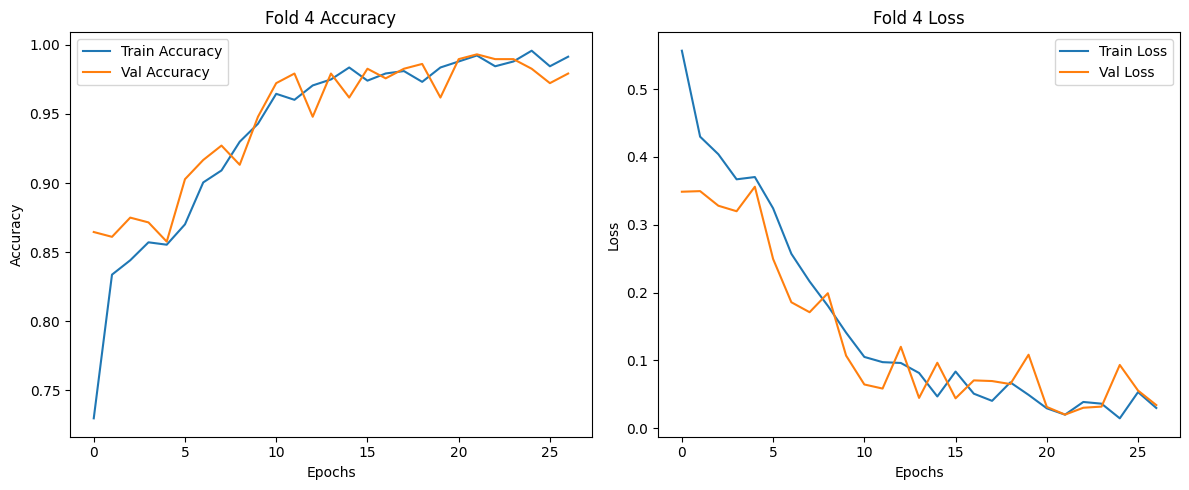

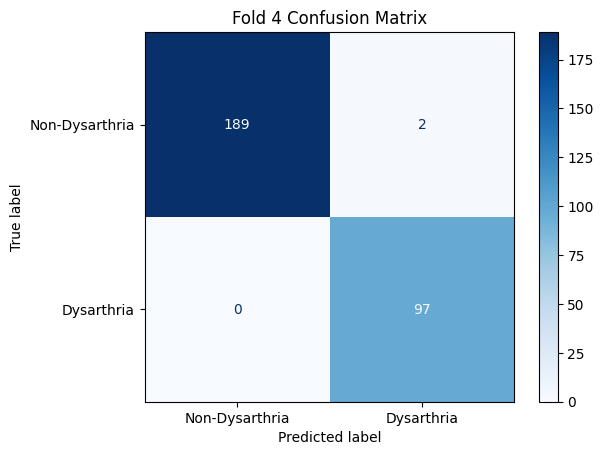

F1 Score for Fold 4: 0.9898

📊 Average Accuracy across folds: 98.27%
🏆 Using best fold: 4 (Accuracy: 99.31%)


ValueError: `inputs` argument cannot be empty. Received:
inputs=[[], []]
outputs=[<KerasTensor shape=(None, 32, 32, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_293>, <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_305>]

In [ ]:
# 📦 Imports
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
import kagglehub

# 🧠 STFT Feature Extraction
def extract_stft(path, shape=(128, 128)):
    try:
        y, sr = librosa.load(path, sr=22050)
        D = librosa.stft(y, n_fft=2048, hop_length=512)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        S_db = S_db[:shape[0], :shape[1]] if S_db.shape[1] >= shape[1] else np.pad(
            S_db, ((0, max(0, shape[0] - S_db.shape[0])), (0, shape[1] - S_db.shape[1])), mode='constant'
        )
        S_db = (S_db - S_db.min()) / (S_db.max() - S_db.min())  # normalize 0..1
        return np.stack([S_db] * 3, axis=-1)  # (128,128,3) for CNN
    except Exception as e:
        print(f"⚠️ Error processing {path}: {e}")
        return None

# 📂 Dataset path (no CSV read; assumes you already have `df`)
path = kagglehub.dataset_download("poojag718/dysarthria-and-nondysarthria-speech-dataset")

# ✅ Build arrays from your existing `df`
X_images, X_meta, y_labels = [], [], []
for _, row in tqdm(df.iterrows(), total=len(df)):
    local_path = row['Wav_path'].replace("/kaggle/input/dysarthria-and-nondysarthria-speech-dataset", path)
    if not os.path.exists(local_path):
        continue
    spec = extract_stft(local_path)
    if spec is not None and spec.shape == (128, 128, 3):
        X_images.append(spec)
        X_meta.append([row["Whisper_Similarity"] / 100.0, float(row["Was_Retry_Used"])])
        y_labels.append(row["Is_dysarthria"])

X_images = np.array(X_images, dtype=np.float32)
X_meta = np.array(X_meta, dtype=np.float32)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels).astype(np.int32)

# 🔀 K-Fold Setup
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
fold = 1
acc_per_fold = []

best_fold = 0
best_acc = 0.0
best_history = None
best_y_true = None
best_y_pred = None
best_X_img_val = None
best_X_meta_val = None
best_model = None

def build_model():
    # 🏗️ Custom CNN + Metadata Model (name last conv!)
    image_input = Input(shape=(128, 128, 3), name="stft_image")
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(image_input)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(128, 3, activation='relu', padding='same', name="last_conv")(x)  # 🔑
    x = layers.MaxPooling2D(2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    image_branch = x

    meta_input = Input(shape=(2,), name="meta_features")
    m = layers.Dense(32, activation='relu')(meta_input)
    m = layers.Dense(16, activation='relu')(m)
    m = layers.Dropout(0.3)(m)
    meta_branch = m

    combined = layers.Concatenate()([image_branch, meta_branch])
    z = layers.Dense(64, activation='relu')(combined)
    z = layers.Dropout(0.4)(z)
    z = layers.Dense(32, activation='relu')(z)
    output = layers.Dense(1, activation='sigmoid')(z)

    model = models.Model(inputs=[image_input, meta_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 🔁 K-Fold Training Loop
for train_idx, val_idx in kf.split(X_images, y):
    print(f"\n🔁 Fold {fold} / {k}")

    X_img_train, X_img_val = X_images[train_idx], X_images[val_idx]
    X_meta_train, X_meta_val = X_meta[train_idx], X_meta[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = build_model()
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        {"stft_image": X_img_train, "meta_features": X_meta_train},
        y_train,
        validation_data=({"stft_image": X_img_val, "meta_features": X_meta_val}, y_val),
        epochs=30,
        batch_size=8,
        callbacks=[early_stop],
        verbose=1
    )

    # 📊 Evaluate
    loss, acc = model.evaluate({"stft_image": X_img_val, "meta_features": X_meta_val}, y_val, verbose=0)
    print(f"✅ Fold {fold} Accuracy: {acc * 100:.2f}%")
    acc_per_fold.append(acc)

    y_val_pred = model.predict({"stft_image": X_img_val, "meta_features": X_meta_val}, verbose=0).reshape(-1)
    y_val_pred_label = (y_val_pred >= 0.5).astype(int)

    # 🏆 Track best fold + clone model so later folds don't overwrite
    if acc > best_acc:
        best_acc = acc
        best_fold = fold
        best_history = history
        best_y_true = y_val.copy()
        best_y_pred = y_val_pred_label.copy()
        best_X_img_val = X_img_val.copy()
        best_X_meta_val = X_meta_val.copy()
        best_model = tf.keras.models.clone_model(model)
        best_model.set_weights(model.get_weights())

    fold += 1

# ===========================
# 📈 Curves & Confusion Matrix for Best Fold
# ===========================
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'], label='Train Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Val Accuracy')
plt.title(f'Fold {best_fold} Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Val Loss')
plt.title(f'Fold {best_fold} Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()
plt.tight_layout(); plt.show()

cm = confusion_matrix(best_y_true, best_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Dysarthria", "Dysarthria"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Fold {best_fold} Confusion Matrix')
plt.show()

f1 = f1_score(best_y_true, best_y_pred)
print(f"F1 Score for Fold {best_fold}: {f1:.4f}")
print("\n📊 Average Accuracy across folds: {:.2f}%".format(np.mean(acc_per_fold) * 100))
print(f"🏆 Using best fold: {best_fold} (Accuracy: {best_acc*100:.2f}%)")

# ===========================
# 🔥 Grad-CAM (on best_model)
# ===========================
def make_gradcam_heatmap(img_batch, meta_batch, model, last_conv_layer_name="last_conv"):
    """
    img_batch: (B, 128, 128, 3)
    meta_batch: (B, 2)
    For binary sigmoid output, we take the score for class-1 (positive class).
    """
    # Model that maps inputs -> (last conv activations, predictions)
    grad_model = tf.keras.models.Model(
        inputs=[model.get_layer("stft_image").input, model.get_layer("meta_features").input],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output],
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model([img_batch, meta_batch], training=False)
        # For binary sigmoid, predicted score for class 1 is predictions[:, 0]
        class_channel = predictions[:, 0]

    # Gradients of the positive class wrt conv feature maps
    grads = tape.gradient(class_channel, conv_outputs)  # shape: (B, H, W, C)
    # Global-average pooling across H,W -> importance weights per channel
    pooled_grads = tf.reduce_mean(grads, axis=(1, 2))  # shape: (B, C)

    conv_outputs = conv_outputs.numpy()
    pooled_grads = pooled_grads.numpy()

    heatmaps = []
    for i in range(conv_outputs.shape[0]):
        conv_out = conv_outputs[i]           # (H, W, C)
        weights = pooled_grads[i]            # (C,)
        cam = np.dot(conv_out, weights)      # (H, W)
        cam = np.maximum(cam, 0)
        cam /= (cam.max() + 1e-8)
        heatmaps.append(cam)
    return np.array(heatmaps)  # (B, H, W)

def show_gradcam_overlay(img, heatmap, alpha=0.4):
    """
    img: (128,128,3) in [0,1]
    heatmap: (h,w) -> resized to (128,128)
    """
    h = np.uint8(255 * heatmap)[..., None]
    h = tf.image.resize(h, (img.shape[0], img.shape[1])).numpy().astype(np.uint8).squeeze()

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1); plt.title("Original Spectrogram"); plt.imshow(img); plt.axis("off")
    plt.subplot(1, 2, 2); plt.title("Grad-CAM (class=1)"); plt.imshow(img); plt.imshow(h, cmap="jet", alpha=alpha); plt.axis("off")
    plt.tight_layout(); plt.show()

# 🎯 Choose samples from best fold (misclassified first)
mis_idx = np.where(best_y_true != best_y_pred)[0]
sel_idx = mis_idx[:3] if len(mis_idx) > 0 else np.arange(min(3, len(best_y_true)))

if len(sel_idx) == 0:
    print("No validation samples available for Grad-CAM.")
else:
    img_batch = best_X_img_val[sel_idx]
    meta_batch = best_X_meta_val[sel_idx]
    heatmaps = make_gradcam_heatmap(img_batch, meta_batch, best_model, last_conv_layer_name="last_conv")

    for i, idx in enumerate(sel_idx):
        print(f"Sample idx {idx} | True: {best_y_true[idx]} | Pred: {best_y_pred[idx]}")
        show_gradcam_overlay(best_X_img_val[idx], heatmaps[i], alpha=0.45)


In [ ]:
def make_gradcam_heatmap(img_batch, meta_batch, model, last_conv_layer_name="conv2d_26"):
    """
    img_batch: (B, 128, 128, 3)
    meta_batch: (B, 2)
    For binary sigmoid output, we take the score for class-1 (positive class).
    """
    # Build a model that maps inputs -> (last conv outputs, predictions)
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output],
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model([img_batch, meta_batch], training=False)
        # For binary sigmoid, use predictions[:, 0] as "positive class" score
        class_channel = predictions[:, 0]

    # Gradient of class wrt conv feature maps
    grads = tape.gradient(class_channel, conv_outputs)  # shape: (B, H, W, C)
    pooled_grads = tf.reduce_mean(grads, axis=(1, 2))   # (B, C)

    conv_outputs = conv_outputs.numpy()
    pooled_grads = pooled_grads.numpy()

    heatmaps = []
    for i in range(conv_outputs.shape[0]):
        conv_out = conv_outputs[i]         # (H, W, C)
        weights = pooled_grads[i]          # (C,)
        cam = np.dot(conv_out, weights)    # (H, W)
        cam = np.maximum(cam, 0)
        cam /= (cam.max() + 1e-8)
        heatmaps.append(cam)

    return np.array(heatmaps)  # (B, H, W)


[True Positive] Sample idx 67 | True: 1 | Pred: 1


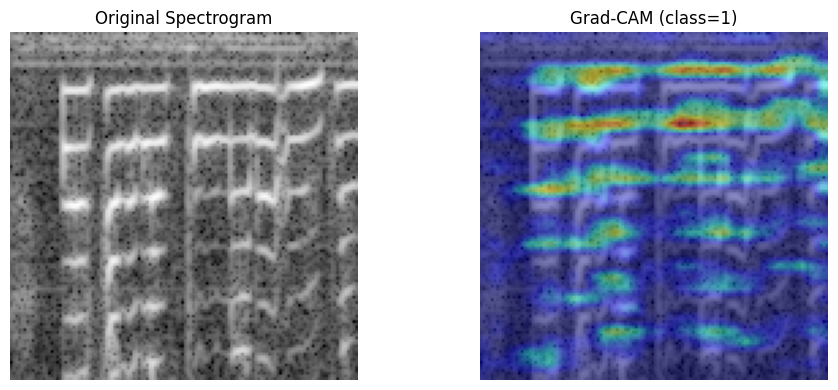

[True Positive] Sample idx 266 | True: 1 | Pred: 1


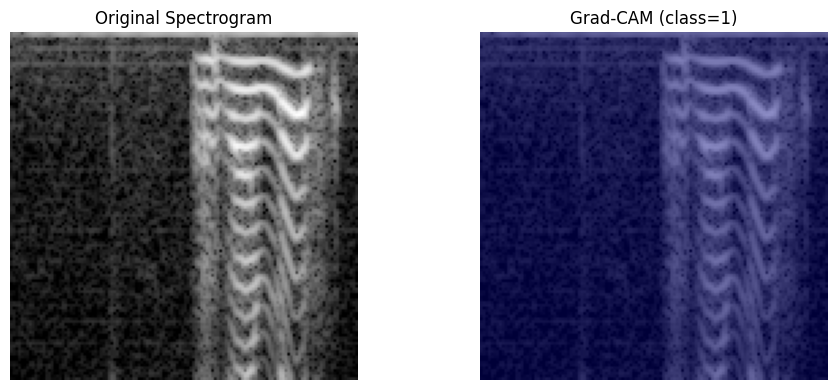

[False Positive] Sample idx 210 | True: 0 | Pred: 1


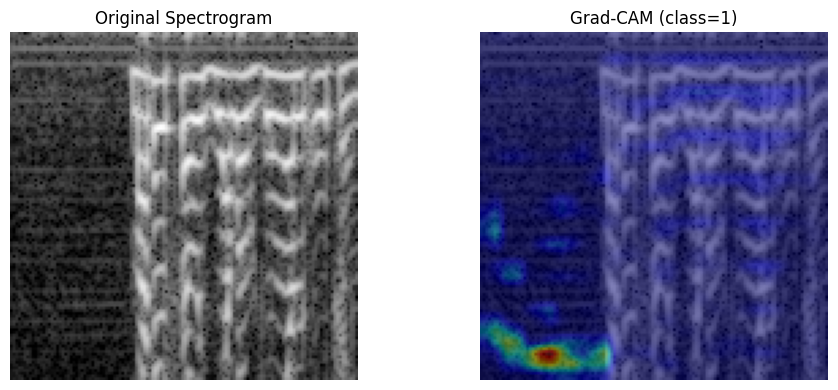

[False Positive] Sample idx 52 | True: 0 | Pred: 1


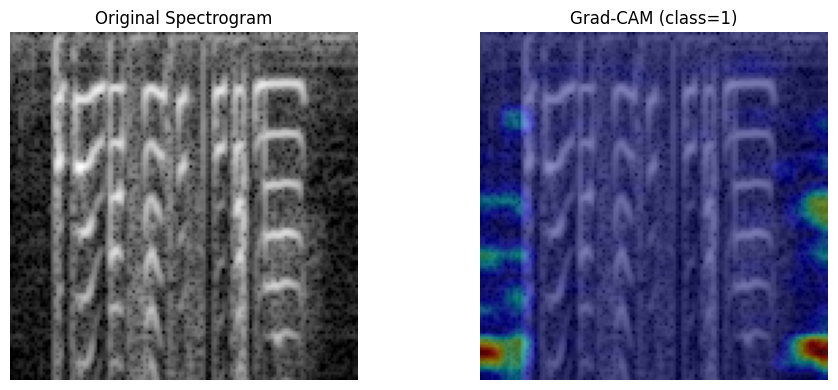

[True Negative] Sample idx 195 | True: 0 | Pred: 0


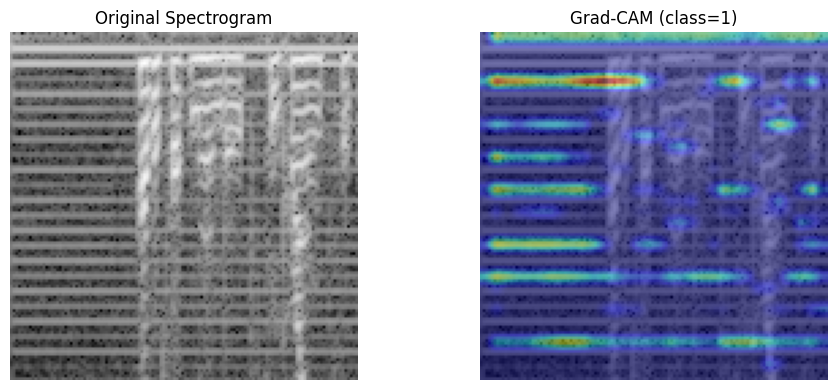

[True Negative] Sample idx 16 | True: 0 | Pred: 0


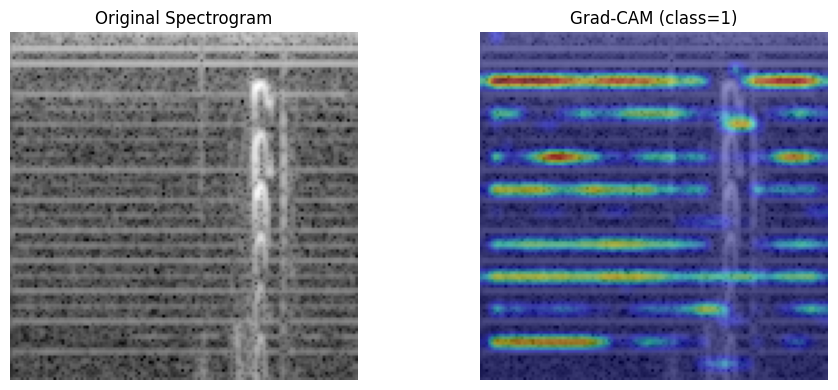

No samples for False Negative


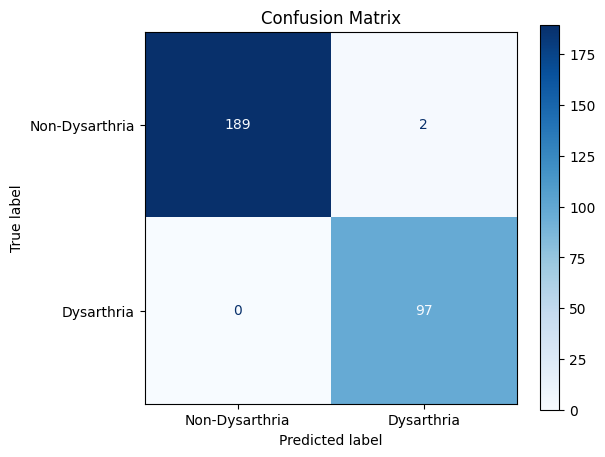

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ===========================
# 🎯 Select random samples by outcome type (TP, FP, TN, FN)
# ===========================
y_true = np.array(best_y_true)
y_pred = np.array(best_y_pred)

tp_idx = np.where((y_true == 1) & (y_pred == 1))[0]
fp_idx = np.where((y_true == 0) & (y_pred == 1))[0]
tn_idx = np.where((y_true == 0) & (y_pred == 0))[0]
fn_idx = np.where((y_true == 1) & (y_pred == 0))[0]

# Randomly pick up to N samples from each class
N = 2  # change to show more/less
rng = np.random.default_rng(seed=42)  # reproducible

sel_dict = {
    "True Positive": rng.choice(tp_idx, size=min(N, len(tp_idx)), replace=False) if len(tp_idx) > 0 else [],
    "False Positive": rng.choice(fp_idx, size=min(N, len(fp_idx)), replace=False) if len(fp_idx) > 0 else [],
    "True Negative": rng.choice(tn_idx, size=min(N, len(tn_idx)), replace=False) if len(tn_idx) > 0 else [],
    "False Negative": rng.choice(fn_idx, size=min(N, len(fn_idx)), replace=False) if len(fn_idx) > 0 else [],
}

# ===========================
# 🔥 Grad-CAM Visualization per Category
# ===========================
for label, idx_list in sel_dict.items():
    if len(idx_list) == 0:
        print(f"No samples for {label}")
        continue

    img_batch = best_X_img_val[idx_list]
    meta_batch = best_X_meta_val[idx_list]

    heatmaps = make_gradcam_heatmap(img_batch, meta_batch, best_model, last_conv_layer_name="last_conv")

    for i, idx in enumerate(idx_list):
        print(f"[{label}] Sample idx {idx} | True: {best_y_true[idx]} | Pred: {best_y_pred[idx]}")
        show_gradcam_overlay(best_X_img_val[idx], heatmaps[i], alpha=0.45)

# ===========================
# 📊 Confusion Matrix
# ===========================
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Dysarthria", "Dysarthria"])

fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap="Blues", colorbar=True, values_format="d")
plt.title("Confusion Matrix")
plt.show()


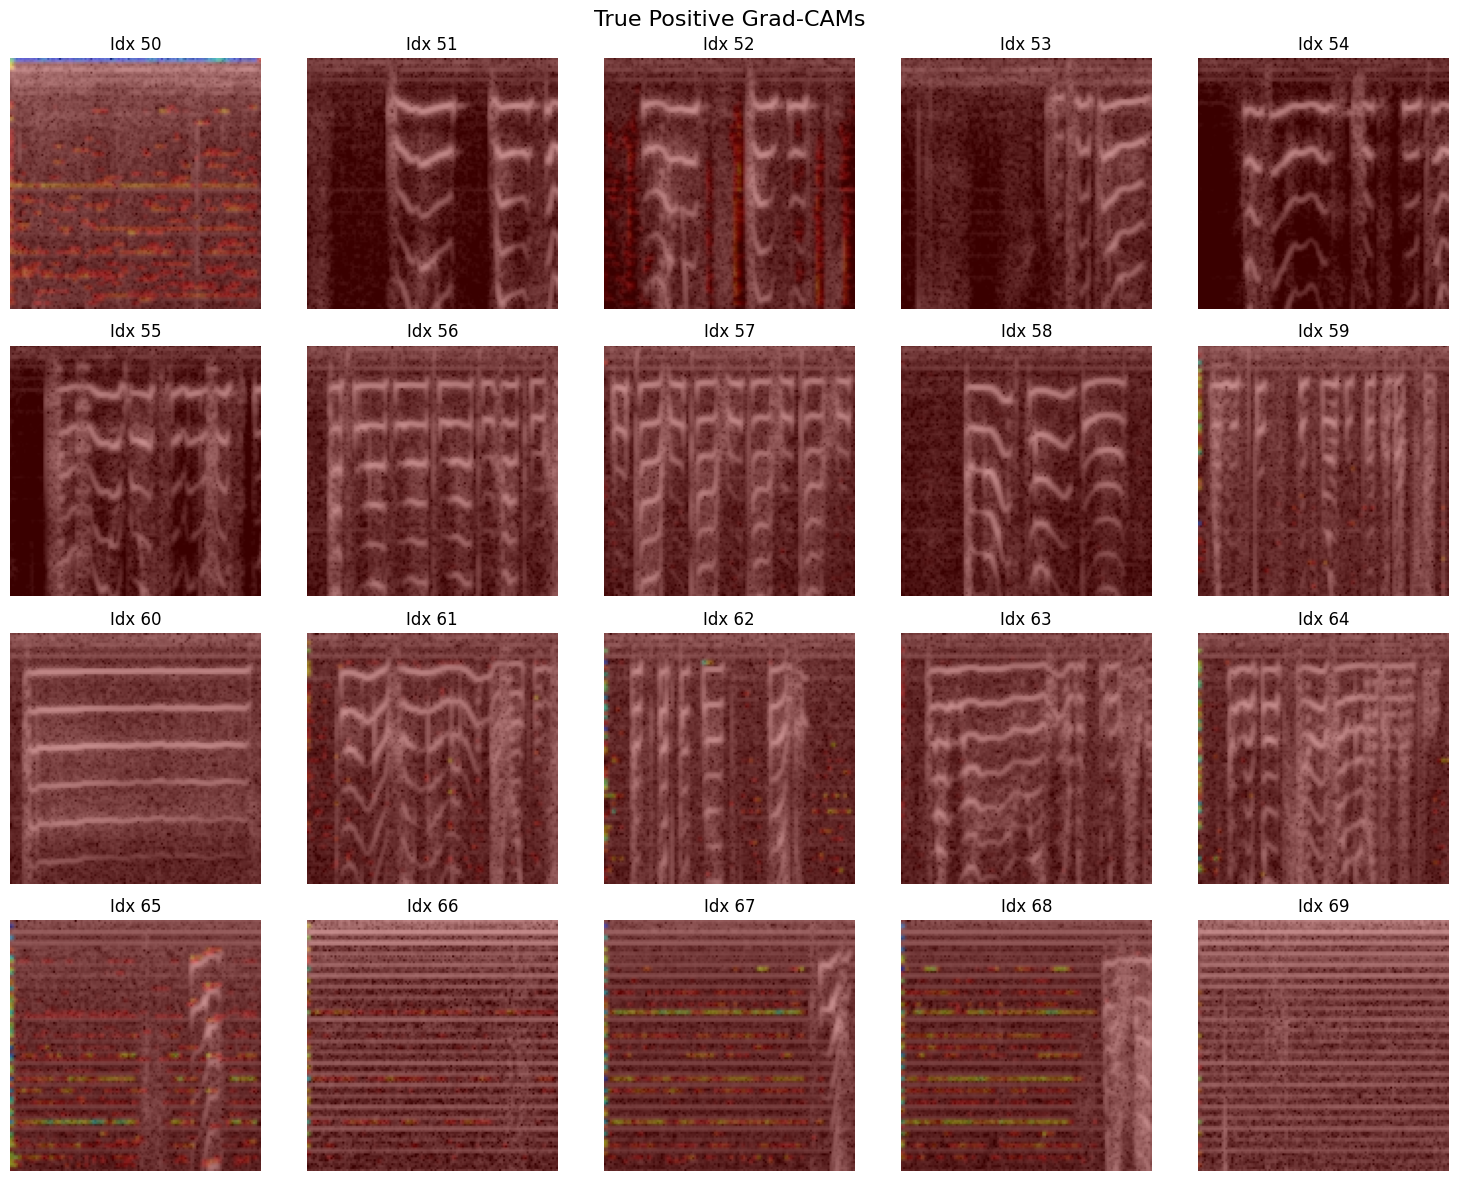

In [ ]:
# Suppose you already have these from validation:
# best_X_img_val, best_X_meta_val, best_y_true, best_y_pred, best_model

# Select 20 True Positives
tp_idx = np.where((best_y_true == 1) & (best_y_pred == 1))[0]
sel_tp_idx = tp_idx[:20]

plot_gradcam_grid(best_X_img_val, best_X_meta_val, best_model, sel_tp_idx,
                  title="True Positive Grad-CAMs", last_conv_layer_name="conv2d_19")


In [ ]:
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ stft_image          │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 128, 128,  │        896 │ stft_image[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_30    │ (None, 64, 64,    │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 64, 64,    │     18,496 │ max_pooling2d_30… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_31    │ (None, 32, 32,    │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ last_conv (Conv2D)  │ (None, 32, 32,    │     73,856 │ max_pooling2d_31… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_32    │ (None, 16, 16,    │          0 │ last_conv[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ meta_features       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 32768)     │          0 │ max_pooling2d_32… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_61 (Dense)    │ (None, 32)        │         96 │ meta_features[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_60 (Dense)    │ (None, 128)       │  4,194,432 │ flatten_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_62 (Dense)    │ (None, 16)        │        528 │ dense_61[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_30          │ (None, 128)       │          0 │ dense_60[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_31          │ (None, 16)        │          0 │ dense_62[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 144)       │          0 │ dropout_30[0][0], │
│ (Concatenate)       │                   │            │ dropout_31[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_63 (Dense)    │ (None, 64)        │      9,280 │ concatenate_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_32          │ (None, 64)        │          0 │ dense_63[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 32)        │      2,080 │ dropout_32[0][0]  │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 12,899,093 (49.21 MB)

 Trainable params: 4,299,697 (16.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,599,396 (32.80 MB)

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input
from tensorflow.keras.callbacks import EarlyStopping
import kagglehub

# 🧠 STFT Feature Extraction
def extract_stft(path, shape=(128, 128)):
    try:
        y, sr = librosa.load(path, sr=22050)
        D = librosa.stft(y, n_fft=2048, hop_length=512)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        S_db = S_db[:shape[0], :shape[1]] if S_db.shape[1] >= shape[1] else np.pad(
            S_db, ((0, max(0, shape[0] - S_db.shape[0])), (0, shape[1] - S_db.shape[1])), mode='constant')
        S_db = (S_db - S_db.min()) / (S_db.max() - S_db.min())  # normalize
        return np.stack([S_db] * 3, axis=-1)
    except Exception as e:
        print(f"⚠️ Error processing {path}: {e}")
        return None

# 📂 Dataset path
path = kagglehub.dataset_download("poojag718/dysarthria-and-nondysarthria-speech-dataset")


# 📊 Data Preparation
X_images, X_meta, y_labels = [], [], []
for _, row in tqdm(df.iterrows(), total=len(df)):
    local_path = row['Wav_path'].replace("/kaggle/input/dysarthria-and-nondysarthria-speech-dataset", path)
    if not os.path.exists(local_path):
        continue
    spec = extract_stft(local_path)
    if spec is not None and spec.shape == (128, 128, 3):
        X_images.append(spec)
        X_meta.append([
            row["Whisper_Similarity"] / 100.0,
            float(row["Was_Retry_Used"])
        ])
        y_labels.append(row["Is_dysarthria"])

X_images = np.array(X_images)
X_meta = np.array(X_meta)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)

# 🔀 K-Fold Setup
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
fold = 1
acc_per_fold = []

best_fold = 0
best_acc = 0
best_history = None
best_y_true = []
best_y_pred = []

# ⏱️ Optional: Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 🔍 Evaluate CNN-only and Metadata-only models
print("\n📌 Evaluating CNN-only and Metadata-only Models Separately...")

cnn_acc, cnn_f1 = [], []
meta_acc, meta_f1 = [], []

for train_idx, val_idx in kf.split(X_images, y):
    X_img_train, X_img_val = X_images[train_idx], X_images[val_idx]
    X_meta_train, X_meta_val = X_meta[train_idx], X_meta[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # -------- CNN Only --------
    cnn_input = Input(shape=(128, 128, 3))
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(cnn_input)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    out = layers.Dense(1, activation='sigmoid')(x)

    cnn_model = models.Model(inputs=cnn_input, outputs=out)
    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    cnn_model.fit(X_img_train, y_train, validation_data=(X_img_val, y_val),
                  epochs=30, batch_size=8, callbacks=[early_stop], verbose=0)
    y_pred_cnn = cnn_model.predict(X_img_val) >= 0.5
    cnn_acc.append(np.mean(y_pred_cnn.flatten() == y_val))
    cnn_f1.append(f1_score(y_val, y_pred_cnn.flatten()))

    # -------- Metadata Only --------
    meta_input = Input(shape=(2,))
    m = layers.Dense(32, activation='relu')(meta_input)
    m = layers.Dense(16, activation='relu')(m)
    m = layers.Dropout(0.3)(m)
    out = layers.Dense(1, activation='sigmoid')(m)

    meta_model = models.Model(inputs=meta_input, outputs=out)
    meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    meta_model.fit(X_meta_train, y_train, validation_data=(X_meta_val, y_val),
                   epochs=30, batch_size=8, callbacks=[early_stop], verbose=0)
    y_pred_meta = meta_model.predict(X_meta_val) >= 0.5
    meta_acc.append(np.mean(y_pred_meta.flatten() == y_val))
    meta_f1.append(f1_score(y_val, y_pred_meta.flatten()))

# 📊 Report Results
print("\n🧠 CNN-only Model:")
print(f"→ Accuracy: {np.mean(cnn_acc) * 100:.2f}%")
print(f"→ F1 Score: {np.mean(cnn_f1):.4f}")

print("\n📋 Metadata-only Model:")
print(f"→ Accuracy: {np.mean(meta_acc) * 100:.2f}%")
print(f"→ F1 Score: {np.mean(meta_f1):.4f}")

 26%|██▋       | 2169/8214 [00:06<00:19, 310.95it/s]/tmp/ipython-input-4-2370610875.py:18: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=22050)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


⚠️ Error processing /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0067.wav: 
⚠️ Error processing /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0068.wav: 


 99%|█████████▉| 8118/8214 [00:35<00:00, 171.82it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=946
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=207
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1317
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=215
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1295
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=214
  warnings.warn(
/usr/local/lib/p


📌 Evaluating CNN-only and Metadata-only Models Separately...
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

🧠 CNN-only Model:
→ Accuracy: 97.85%
→ F1 Score: 0.9680

📋 Metadata-only Model:
→ Accuracy: 72.76%
→ F1 Score: 0.5579


In [ ]:
# 📦 Imports
import os
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, Input

# 🎚️ Parameters
AUDIO_LEN = 8192
SR = 22050

# 📥 Load Raw Audio

def load_audio_raw(path, length=AUDIO_LEN):
    try:
        y, _ = librosa.load(path, sr=SR)
        if len(y) < length:
            y = np.pad(y, (0, length - len(y)))
        else:
            y = y[:length]
        return y
    except Exception as e:
        print(f"⚠️ Error loading {path}: {e}")
        return None

# 📂 Dataset path
path = kagglehub.dataset_download("poojag718/dysarthria-and-nondysarthria-speech-dataset")

# 🧱 Load Data
X_audio, X_meta, y_labels = [], [], []

for _, row in tqdm(df.iterrows(), total=len(df)):
    local_path = row['Wav_path'].replace("/kaggle/input/dysarthria-and-nondysarthria-speech-dataset", path)
    if not os.path.exists(local_path):
        continue
    y = load_audio_raw(local_path)
    if y is not None:
        X_audio.append(y)
        X_meta.append([
            row["Whisper_Similarity"] / 100.0,
            float(row["Was_Retry_Used"])
        ])
        y_labels.append(row["Is_dysarthria"])

# 🔢 Convert Arrays
X_audio = np.expand_dims(np.array(X_audio), -1)  # (N, 8192, 1)
X_meta = np.array(X_meta)
y = LabelEncoder().fit_transform(y_labels)

# 🔀 Split Data (60/20/20)
X_a_train, X_a_temp, X_m_train, X_m_temp, y_train, y_temp = train_test_split(
    X_audio, X_meta, y, test_size=0.4, stratify=y, random_state=42)
X_a_val, X_a_test, X_m_val, X_m_test, y_val, y_test = train_test_split(
    X_a_temp, X_m_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

def build_model():
    # Inputs
    raw_input = Input(shape=(AUDIO_LEN, 1), name='raw_audio')
    meta_input = Input(shape=(2,), name='meta_features')

    # Pre-emphasis
    pre_emph = layers.Conv1D(1, kernel_size=5, padding='same', use_bias=False, trainable=True)(raw_input)

    # STFT branch
    def stft_fn(x):
        stft = tf.signal.stft(tf.squeeze(x, -1), frame_length=1280, frame_step=380, fft_length=1280,
                              window_fn=tf.signal.hamming_window)
        mag = tf.math.log(tf.abs(stft) + 1e-6)
        return tf.expand_dims(mag, -1)

    stft_feat = layers.Lambda(stft_fn, name="stft_branch")(pre_emph)

    x1 = layers.Conv2D(12, 5, padding='same')(stft_feat)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.ReLU()(x1)
    x1 = layers.MaxPooling2D(pool_size=3, strides=2)(x1)

    x1 = layers.Conv2D(24, 3, padding='same')(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.ReLU()(x1)
    x1 = layers.MaxPooling2D(pool_size=3, strides=2)(x1)

    x1 = layers.Conv2D(48, 3, padding='same')(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.ReLU()(x1)
    x1 = layers.MaxPooling2D(pool_size=3, strides=2)(x1)
    x1 = layers.Flatten()(x1)

    # Mel branch
    def mel_fn(x):
        y = tf.squeeze(x, -1)
        stft = tf.signal.stft(y, frame_length=1280, frame_step=380, fft_length=1280,
                              window_fn=tf.signal.hamming_window)
        mag = tf.abs(stft)
        mel_matrix = tf.signal.linear_to_mel_weight_matrix(
            num_mel_bins=128, num_spectrogram_bins=641, sample_rate=SR,
            lower_edge_hertz=80.0, upper_edge_hertz=7600.0
        )
        mel_spec = tf.tensordot(mag, mel_matrix, axes=1)
        log_mel = tf.math.log(mel_spec + 1e-6)
        return tf.expand_dims(log_mel, -1)

    mel_feat = layers.Lambda(mel_fn, name="mel_branch")(pre_emph)

    x2 = layers.Conv2D(12, 5, padding='same')(mel_feat)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.ReLU()(x2)
    x2 = layers.MaxPooling2D(pool_size=3, strides=2)(x2)

    x2 = layers.Conv2D(24, 3, padding='same')(x2)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.ReLU()(x2)
    x2 = layers.MaxPooling2D(pool_size=3, strides=2)(x2)

    x2 = layers.Conv2D(48, 3, padding='same')(x2)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.ReLU()(x2)
    x2 = layers.MaxPooling2D(pool_size=3, strides=2)(x2)
    x2 = layers.Flatten()(x2)

    # Merge STFT + Mel features
    audio_feat = layers.Concatenate()([x1, x2])
    audio_feat = layers.Dense(128, activation='relu')(audio_feat)

    # Metadata branch
    m = layers.Dense(32, activation='relu')(meta_input)
    m = layers.Dense(16, activation='relu')(m)
    m = layers.Dropout(0.3)(m)

    # Merge all
    combined = layers.Concatenate()([audio_feat, m])
    z = layers.Dense(64, activation='relu')(combined)
    z = layers.Dropout(0.4)(z)
    z = layers.Dense(32, activation='relu')(z)
    output = layers.Dense(1, activation='sigmoid')(z)

    # Build model
    model = models.Model(inputs=[raw_input, meta_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# 🚀 Train Model
# model.fit(
#     {"raw_audio": X_a_train, "meta_features": X_m_train},
#     y_train,
#     validation_data=({"raw_audio": X_a_val, "meta_features": X_m_val}, y_val),
#     epochs=30,
#     batch_size=8,
#     verbose=1
# )

# # 📊 Evaluate
# loss, acc = model.evaluate(
#     {"raw_audio": X_a_test, "meta_features": X_m_test}, y_test
# )
# print(f"✅ Final Test Accuracy: {acc * 100:.2f}%")


 26%|██▋       | 2175/8214 [00:04<00:18, 322.02it/s]

⚠️ Error loading /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0067.wav: 
⚠️ Error loading /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0068.wav: 


100%|██████████| 8214/8214 [00:21<00:00, 378.53it/s]


In [ ]:
# prompt: how many file exist == true

# Count how many times os.path.exists(local_path) is True
file_exists_count = 0
for _, row in df.iterrows():
    local_path = row['Wav_path'].replace("/kaggle/input/dysarthria-and-nondysarthria-speech-dataset", path)
    if os.path.exists(local_path):
        file_exists_count += 1

print(f"Number of files that exist: {file_exists_count}")

Number of files that exist: 4316


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8214 entries, 0 to 8213
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              8214 non-null   object 
 1   Is_dysarthria       8214 non-null   object 
 2   Wav_path            8214 non-null   object 
 3   Txt_path            8214 non-null   object 
 4   Prompts             8214 non-null   object 
 5   corrected_wav_path  8214 non-null   object 
 6   file_exists         8214 non-null   bool   
 7   Transcription       8214 non-null   object 
 8   Predicted_Label     0 non-null      float64
 9   Prediction_Score    0 non-null      float64
 10  full_wav_path       8214 non-null   object 
 11  refine prompt       8214 non-null   object 
 12  mel_spectrogram     4314 non-null   object 
 13  Whisper_Transcript  8214 non-null   object 
 14  Whisper_Similarity  8214 non-null   int64  
 15  Was_Retry_Used      8214 non-null   bool   
dtypes: boo

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
best_model = None
best_acc = 0
best_X_a_val, best_X_m_val, best_y_val = None, None, None # Store validation data for the best fold

for fold, (train_idx, val_idx) in enumerate(kf.split(X_audio, y), 1):
    print(f"\n🔁 Fold {fold}")

    X_a_train, X_a_val = X_audio[train_idx], X_audio[val_idx]
    X_m_train, X_m_val = X_meta[train_idx], X_meta[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # 🏗️ Build new model per fold
    model = build_model()  # 👈 Call your build_model() here

    # 🧠 Train
    history = model.fit(
        {"raw_audio": X_a_train, "meta_features": X_m_train},
        y_train,
        validation_data=({"raw_audio": X_a_val, "meta_features": X_m_val}, y_val),
        epochs=30,
        batch_size=16,
        verbose=0
    )

    # 📊 Evaluate
    y_pred = model.predict({"raw_audio": X_a_val, "meta_features": X_m_val})
    y_pred_binary = (y_pred.flatten() > 0.5).astype(int)
    acc = accuracy_score(y_val, y_pred_binary)
    print(f"✅ Fold {fold} Accuracy: {acc * 100:.2f}%")
    fold_accuracies.append(acc)

    # 💾 Track Best Model and its validation data
    if acc > best_acc:
        best_acc = acc
        best_model = model  # Optional: save model weights too
        best_X_a_val, best_X_m_val, best_y_val = X_a_val, X_m_val, y_val


# 📉 Overall Result
print(f"\n📈 Average Accuracy: {np.mean(fold_accuracies) * 100:.2f}%")
print(f"🏆 Best Fold Accuracy: {best_acc * 100:.2f}%")

NameError: name 'X_audio' is not defined

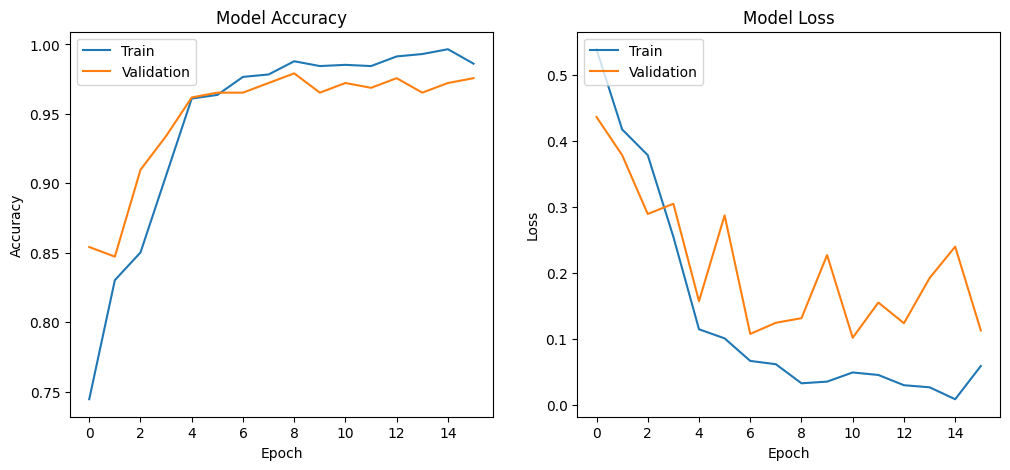

NameError: name 'X_a_val' is not defined

In [ ]:
# prompt: draw accuracy and loss curve and matrix of best score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict probabilities on the validation set from the last fold
y_pred_proba = model.predict({"raw_audio": X_a_val, "meta_features": X_m_val})
# Convert probabilities to binary predictions
y_pred = (y_pred_proba.flatten() > 0.5).astype("int32")

# Generate confusion matrix using validation data from the last fold
cm = confusion_matrix(y_val, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Last Fold Validation Data)')
plt.show()

# Find the best score (highest validation accuracy from the last fold's history)
best_val_accuracy_last_fold = max(history.history['val_accuracy'])
print(f"\n🏆 Best Validation Accuracy from the last fold: {best_val_accuracy_last_fold * 100:.2f}%")

# Report K-Fold cross-validation results
if 'acc_per_fold' in locals():
    print(f"📈 Mean K-Fold Validation Accuracy: {np.mean(acc_per_fold) * 100:.2f}%")
    print(f"🔝 Max K-Fold Validation Accuracy: {max(acc_per_fold) * 100:.2f}%")

In [ ]:
import pandas as pd
import os
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("poojag718/dysarthria-and-nondysarthria-speech-dataset")

# Load the metadata CSV
csv_path = os.path.join(path, "data_with_path.csv")
df = pd.read_csv(csv_path)
print("✅ Loaded metadata:", df.shape)


KeyboardInterrupt: 

In [ ]:
dataset_input_prefix = "/kaggle/input/dysarthria-and-nondysarthria-speech-dataset"
df = df[df['Wav_path'].notna()]
df['full_path'] = df['Wav_path'].apply(lambda x: x.replace(dataset_input_prefix, path))


In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Step 2: STFT feature generator
def extract_stft(path, shape=(128, 128)):
    try:
        y, sr = librosa.load(path, sr=22050)
        D = librosa.stft(y, n_fft=2048, hop_length=512)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        # Pad/crop to fixed shape
        S_db = S_db[:shape[0], :shape[1]] if S_db.shape[1] >= shape[1] else np.pad(
            S_db, ((0, max(0, shape[0]-S_db.shape[0])), (0, shape[1]-S_db.shape[1])), mode='constant')
        S_db = (S_db - S_db.min()) / (S_db.max() - S_db.min())  # Normalize
        return np.stack([S_db]*3, axis=-1)  # Convert to RGB
    except Exception as e:
        print(f"⚠️ Error processing {path}: {e}")
        return None

# Step 3: Build dataset
X = []
y = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    local_path = row['Wav_path'].replace("/kaggle/input/dysarthria-and-nondysarthria-speech-dataset", path)
    if not os.path.exists(local_path):
        continue  # skip missing
    spec = extract_stft(local_path)
    if spec is not None and spec.shape == (128, 128, 3):
        X.append(spec)
        y.append(row['Is_dysarthria'])


X = np.array(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Yes/No → 1/0

print("✅ Data shape:", X.shape, y.shape)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: STFT-CNN model
def build_stft_cnn(input_shape=(128, 128, 3)):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs, output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_stft_cnn()
model.summary()

# Step 6: Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32
)

# Step 7: Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Final Test Accuracy: {acc * 100:.2f}%")


 26%|██▋       | 2171/8214 [00:07<00:20, 291.00it/s]/tmp/ipython-input-7-2585161701.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=22050)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


⚠️ Error processing /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0067.wav: 
⚠️ Error processing /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0068.wav: 


 98%|█████████▊| 8026/8214 [00:37<00:00, 235.70it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=946
  warnings.warn(
 99%|█████████▉| 8134/8214 [00:39<00:00, 150.80it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=207
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1317
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=215
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1295
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input si

✅ Data shape: (1443, 128, 128, 3) (1443,)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,287,809 (16.36 MB)

 Trainable params: 4,287,809 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.6110 - loss: 0.6634 - val_accuracy: 0.8270 - val_loss: 0.4268
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8292 - loss: 0.4257 - val_accuracy: 0.8166 - val_loss: 0.4127
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8654 - loss: 0.3741 - val_accuracy: 0.8374 - val_loss: 0.3896
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9010 - loss: 0.2931 - val_accuracy: 0.8374 - val_loss: 0.3610
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8786 - loss: 0.2723 - val_accuracy: 0.8651 - val_loss: 0.3300
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8973 - loss: 0.2572 - val_accuracy: 0.8893 - val_loss: 0.2882
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9405 - loss: 0.1694 - val_accuracy: 0.9066 - val_loss: 0.2176
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9575 - loss: 0.1356 - val_accuracy: 0.8858 - 

In [ ]:
import os
import pandas as pd
from IPython.display import Audio, display
import kagglehub

# 🔽 Step 1: Download the dataset
path = kagglehub.dataset_download("poojag718/dysarthria-and-nondysarthria-speech-dataset")
print("✅ Dataset downloaded to:", path)

# 📄 Step 2: Load the metadata CSV
csv_path = os.path.join(path, "data_with_path.csv")
df = pd.read_csv(csv_path)
print("✅ CSV loaded:", df.shape)

# 🧹 Step 3: Fix path for the first audio file
dataset_input_prefix = "/kaggle/input/dysarthria-and-nondysarthria-speech-dataset"
original_path = df.loc[0, "Wav_path"]
corrected_path = original_path.replace(dataset_input_prefix, path)

# 🎧 Step 4: Play the first audio file
if os.path.exists(corrected_path):
    print("🎧 Playing audio from:", corrected_path)
    display(Audio(filename=corrected_path))
else:
    print(f"❌ File not found: {corrected_path}")


100%|██████████| 317M/317M [00:15<00:00, 21.3MB/s]

Extracting files...


✅ Dataset downloaded to: /root/.cache/kagglehub/datasets/poojag718/dysarthria-and-nondysarthria-speech-dataset/versions/3
✅ CSV loaded: (8214, 5)
🎧 Playing audio from: /root/.cache/kagglehub/datasets/poojag718/dysarthria-and-nondysarthria-speech-dataset/versions/3/Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC01/Session1/Wav/0001.wav


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from tqdm import tqdm
from scipy.signal import ricker
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import kagglehub

# 📦 Load dataset
path = kagglehub.dataset_download("poojag718/dysarthria-and-nondysarthria-speech-dataset")
df = pd.read_csv(os.path.join(path, "data_with_path.csv"))
prefix = "/kaggle/input/dysarthria-and-nondysarthria-speech-dataset"
df['full_path'] = df['Wav_path'].apply(lambda x: x.replace(prefix, path))

# 🎧 Extract CWT Spectrogram
def extract_cwt(path, shape=(128, 128)):
    try:
        y, sr = librosa.load(path, sr=22050)
        if len(y) < 512:
            return None
        widths = np.arange(1, shape[0] + 1)
        cwt_matrix = signal.cwt(y[:shape[1]*4], ricker, widths)
        cwt_matrix = (cwt_matrix - cwt_matrix.min()) / (cwt_matrix.max() - cwt_matrix.min())
        cwt_matrix = cwt_matrix[:, :shape[1]]
        if cwt_matrix.shape[1] < shape[1]:
            cwt_matrix = np.pad(cwt_matrix, ((0, 0), (0, shape[1] - cwt_matrix.shape[1])), mode='constant')
        return np.stack([cwt_matrix]*3, axis=-1)
    except Exception as e:
        print(f"⚠️ CWT error for {path}: {e}")
        return None

# 🧹 Build dataset
X, y = [], []
for _, row in tqdm(df.iterrows(), total=len(df)):
    p = row['full_path']
    if not os.path.exists(p): continue
    img = extract_cwt(p)
    if img is not None and img.shape == (128, 128, 3):
        X.append(img)
        y.append(row['Is_dysarthria'])

X = np.array(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print("✅ Data loaded:", X.shape, y.shape)

# ✂️ Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 🧠 CWT-CNN model
def build_cwt_cnn(input_shape=(128, 128, 3)):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs, output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 🚀 Train the model
model = build_cwt_cnn()
model.summary()
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
    ]
)

# 📊 Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Final Test Accuracy (CWT-CNN): {acc * 100:.2f}%")

 26%|██▌       | 2156/8214 [00:15<00:45, 132.09it/s]/tmp/ipython-input-1-796882449.py:22: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=22050)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


⚠️ CWT error for /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0067.wav: 
⚠️ CWT error for /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0068.wav: 


100%|██████████| 8214/8214 [01:13<00:00, 111.80it/s]


✅ Data loaded: (4294, 128, 128, 3) (4294,)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,889 (429.25 KB)

 Trainable params: 109,889 (429.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.6680 - loss: 0.6399 - val_accuracy: 0.6880 - val_loss: 0.6195 - learning_rate: 0.0010
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6856 - loss: 0.6263 - val_accuracy: 0.6880 - val_loss: 0.6216 - learning_rate: 0.0010
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6878 - loss: 0.6211 - val_accuracy: 0.6880 - val_loss: 0.6177 - learning_rate: 0.0010
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6932 - loss: 0.6179 - val_accuracy: 0.6880 - val_loss: 0.6186 - learning_rate: 0.0010
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6882 - loss: 0.6091 - val_accuracy: 0.6880 - val_loss: 0.6115 - learning_rate: 0.0010
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6980 - loss: 0.6026 - val_accuracy: 0.6880 - val_loss: 0.6103 - learning_rate: 0.0010
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6836 - loss: 0

In [ ]:
!pip install scipy==1.10.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 117.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
xarray-einstats 0.9.1 requires scipy>=1.11, but you have scipy 1.10.1 which is incompatible.
tsfresh 0.21.0 requir

In [ ]:
# 📦 Imports
import os
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 🧠 STFT Feature Extraction
def extract_stft(path, shape=(128, 128)):
    try:
        y, sr = librosa.load(path, sr=22050)
        D = librosa.stft(y, n_fft=2048, hop_length=512)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        S_db = S_db[:shape[0], :shape[1]] if S_db.shape[1] >= shape[1] else np.pad(
            S_db, ((0, max(0, shape[0] - S_db.shape[0])), (0, shape[1] - S_db.shape[1])), mode='constant')
        S_db = (S_db - S_db.min()) / (S_db.max() - S_db.min())  # normalize to [0, 1]
        return np.stack([S_db] * 3, axis=-1)
    except Exception as e:
        print(f"⚠️ Error processing {path}: {e}")
        return None

# 🧪 Load Dataset and Extract STFT + Metadata + Labels
X_images, X_meta, y_labels = [], [], []

for _, row in tqdm(df.iterrows(), total=len(df)):
    local_path = row['Wav_path'].replace("/kaggle/input/dysarthria-and-nondysarthria-speech-dataset", path)
    if not os.path.exists(local_path):
        continue
    spec = extract_stft(local_path)
    if spec is not None and spec.shape == (128, 128, 3):
        X_images.append(spec)
        X_meta.append([
            row["Whisper_Similarity"] / 100.0,
            float(row["Was_Retry_Used"])
        ])
        y_labels.append(row["Is_dysarthria"])

X_images = np.array(X_images)
X_meta = np.array(X_meta)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)

# 🧪 Train / Val / Test Split
X_img_temp, X_img_test, X_meta_temp, X_meta_test, y_temp, y_test = train_test_split(
    X_images, X_meta, y, test_size=0.2, random_state=42, stratify=y
)
X_img_train, X_img_val, X_meta_train, X_meta_val, y_train, y_val = train_test_split(
    X_img_temp, X_meta_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# 🧠 CNN for Feature Extraction (no final classifier layer)
image_input = Input(shape=(128, 128, 3), name="stft_image")
x = layers.Conv2D(32, 3, activation='relu', padding='same')(image_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)
cnn_model = models.Model(inputs=image_input, outputs=x)

# 📤 Extract CNN features
cnn_train = cnn_model.predict(X_img_train)
cnn_val = cnn_model.predict(X_img_val)
cnn_test = cnn_model.predict(X_img_test)

# 🔗 Combine CNN features + metadata
X_train_svm = np.concatenate([cnn_train, X_meta_train], axis=1)
X_val_svm = np.concatenate([cnn_val, X_meta_val], axis=1)
X_test_svm = np.concatenate([cnn_test, X_meta_test], axis=1)

# 🎯 Train SVM
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_svm, y_train)

# 📈 Evaluate
y_pred = svm.predict(X_test_svm)
print(f"✅ SVM Test Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


 26%|██▋       | 2166/8214 [00:11<00:24, 243.36it/s]

⚠️ Error processing /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0067.wav: 
⚠️ Error processing /kaggle/input/dysarthria-and-nondysarthria-speech-dataset/Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0068.wav: 


100%|██████████| 8214/8214 [00:49<00:00, 164.56it/s]


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
✅ SVM Test Accuracy: 86.16%

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       191
           1       0.94      0.63      0.76        98

    accuracy                           0.86       289
   macro avg       0.89      0.81      0.83       289
weighted avg       0.87      0.86      0.85       289



In [ ]:
# Uninstall potentially conflicting versions
!pip uninstall -y scipy numpy

# Reinstall scipy to get a compatible version
!pip install scipy

Found existing installation: scipy 1.15.3
Uninstalling scipy-1.15.3:
  Successfully uninstalled scipy-1.15.3
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 93.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.
plotnine 0.14.6 requires scipy<1.16.0,>=1.8.0, but you have scipy 1.16.0 which is incompatible.
numb

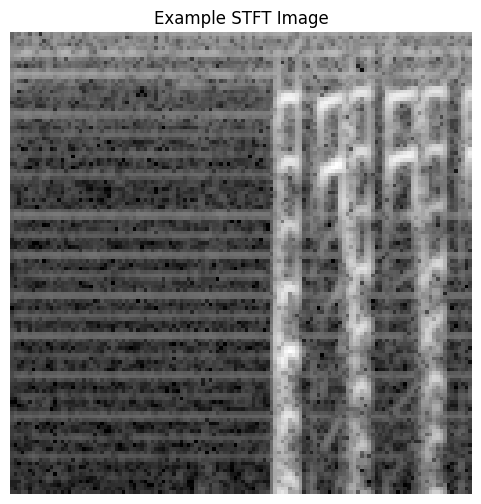

In [ ]:
import matplotlib.pyplot as plt

# Select the first image from the dataset
stft_image = X_images[1]

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(stft_image)
plt.title("Example STFT Image")
plt.axis('off') # Hide axes
plt.show()